In [1]:
!pip install diffusers transformers accelerate scipy safetensors torch pillow 
!git clone https://github.com/timojl/clipseg.git

import torch
from PIL import Image
import torch
import requests
import base64
from io import BytesIO

! wget https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download -O weights.zip
! unzip -d weights -j weights.zip

%cd /content/clipseg
!pip install git+https://github.com/openai/CLIP.git@d50d76daa670286dd6cacf3bcd80b5e4823fc8e1

# à ajouter au serveur
!pip install -q condacolab
import condacolab
condacolab.install()
# fin  à ajouter au serveur

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached diffusers-0.14.0-py3-none-any.whl (737 kB)
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)
  Using cached accelerate-0.18.0-py3-none-any.whl (215 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 39.9 MB/s eta 0:00:00
  Using cached safetensors-0.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.0/769.0 kB 64.4 MB/s eta 0:00:00
  Using cached huggingface_hub-0.13.3-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.5 MB/s eta 0:00:00
  Using cached tokenizers-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 k

fatal: destination path 'clipseg' already exists and is not an empty directory.
--2023-04-02 18:42:03--  https://owncloud.gwdg.de/index.php/s/ioHbRzFx6th32hn/download
Resolving owncloud.gwdg.de (owncloud.gwdg.de)... 134.76.23.45
Connecting to owncloud.gwdg.de (owncloud.gwdg.de)|134.76.23.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘weights.zip’

weights.zip             [           <=>      ]   9.68M  4.67MB/s    in 2.1s    

2023-04-02 18:42:07 (4.67 MB/s) - ‘weights.zip’ saved [10146905]

Archive:  weights.zip
replace weights/rd16-uni.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
/content/clipseg
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git (to revision d50d76daa670286dd6cacf3bcd80b5e4823fc8e1) to /tmp/pip-req-build-prv_umxa
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /t

✨🍰✨ Everything looks OK!


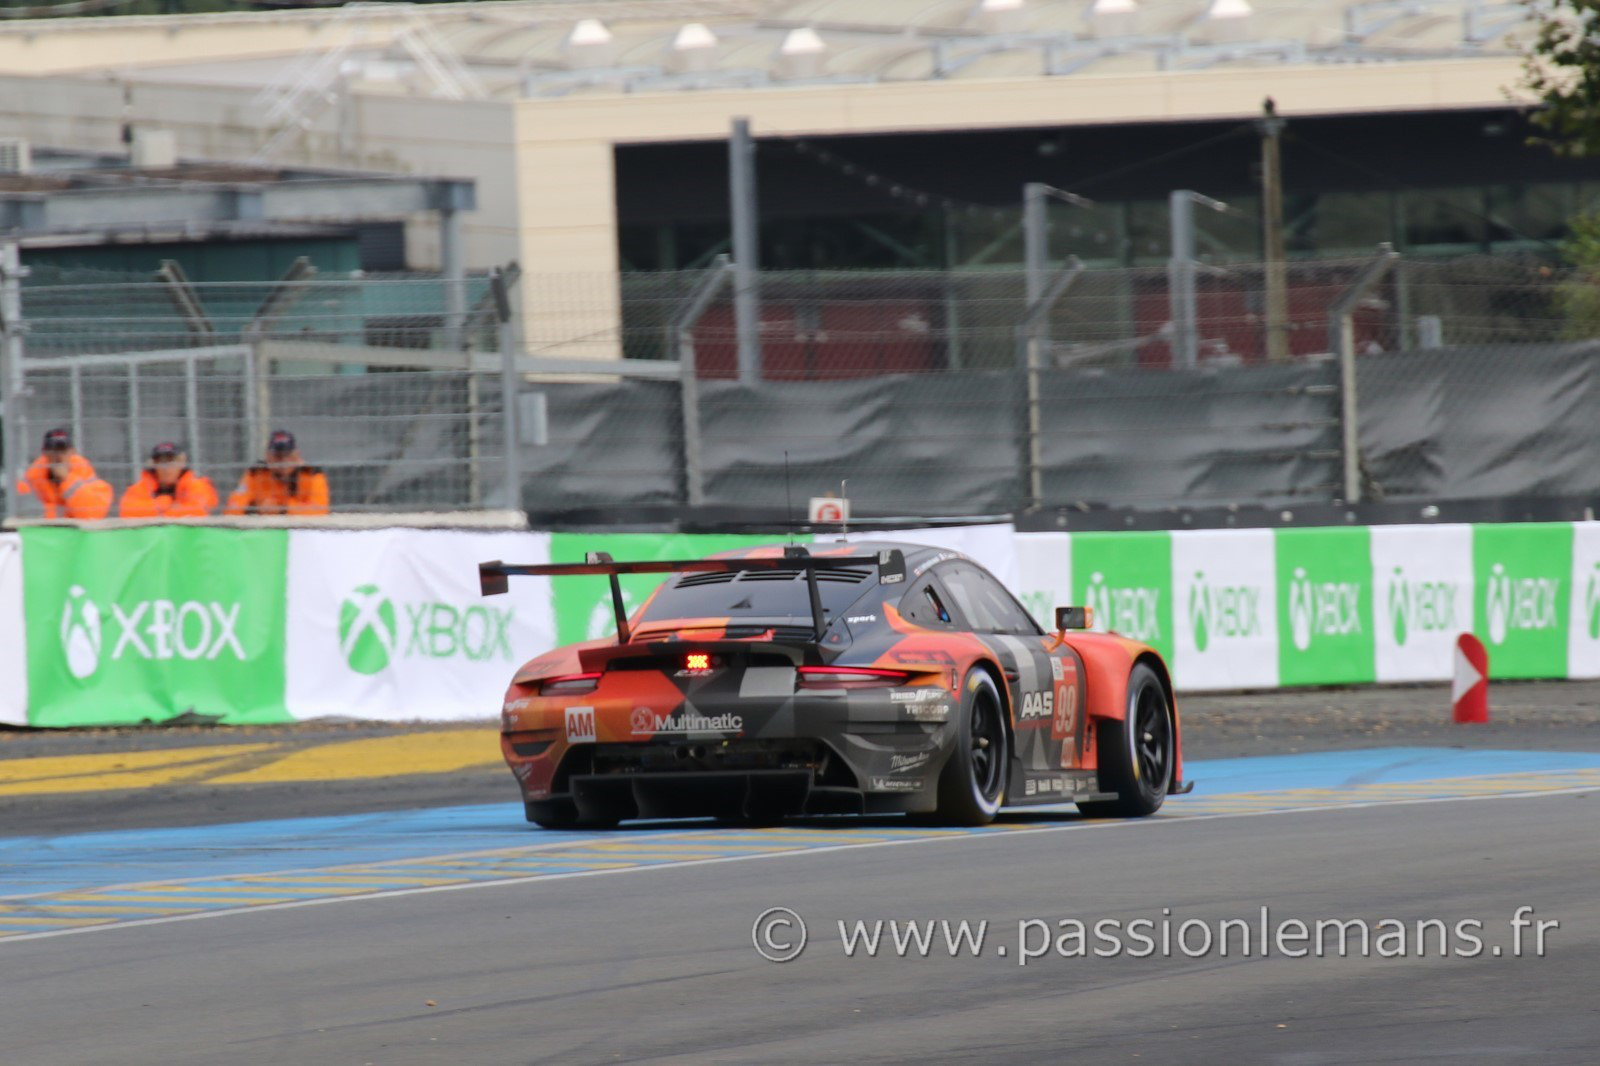

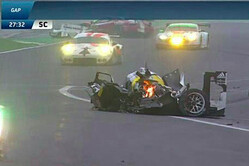

In [ ]:

# Définir la chaîne Base64 de l'image
image_url = "https://www.pitpass.com/images/drivers/800/webber/2014brazilcrash@@fes_width&5E250@@fes_height%5E166.jpg"
response = requests.get(image_url)
pil_image = Image.open(BytesIO(response.content))

base64_image_string = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wgARCAQqBkADASIAAhEBAxEB/8QAHAAAAQUBAQEAAAAAAAAAAAAAAgABAwQFBgcI/8QAHAEBAQEBAQEBAQEAAAAAAAAAAAECAwQFBgcI/9oADAMBAAIQAxAAAAHx3R6+9z58eHd5Obyw7QZ6Z+q1nWLs1OojxY9d03YMOhvPWy4GlzwAy2sq1TaZORfb0u05DS3bGLzz9Zb5uLbvTXzOf1C5ueV5vs9ZrxKX2c+l8VP3O7b87R/Rtma+ddL6Bv5fO8X0gWZ84d/61PvPnK9FhuvPH9IfN8uf02FPOqXrh2eG2PZauL5i/qBr5fod00vIh002pzdroLOdc6fStGDNqsuYtB1rR3EVxtopjeBa0kjRE8zFdWglqnONBIyDEDWKG2ZUIwJmqgugs45bMMjXIPASNNYuM1LE4oLykkRJKk7golAoxoUSgUlozFHTAFaWzHSk20ex4i7udy3FrG+vysUZBhstM0lcaKZWXK0V2pou44ra6uwHlY8a6rDzYMWi8zsxuQoAHDEiqwNa0+R1HbHQ26TzVzMkgw5yvczcJVA1ll6jy2FBJZKIirwvWhR5+l3xTltSJUj0jTLt2KGpbmxNLSwcVjlpnJYscJZW86J1X65uAJct5mb0oXPn+j0GBNdA2Xes827Lc1eN8K4L6a8q5Y4nK+iPKNXc1u8k3viYu8eODk7tVxVjrq64Rb0MuUWsBTnnQNiq0tufNNbhUiLEVSnpox158pjhmlnhJoUMzrE8x0A2jkyLN2Vck9NGQclbcltWbyUK22Jzy321MIehLjvnh6KTc5/Q0oLIqdtlyxsjFRtFJztTrA3nB0LjytaqA1qLIi1Nhsizc3FCeNMYSrbv7WhvnxuF6XyOdc+1u1z3nR7Clyx1QM0dFVQK3u3PMSd3GnCNr59tQbi0zw0guaEM1DUtWM102jxdUOxLGHFjQy9CfNsdO/JqXri5Mzp1y0sdMPPXbNUcqmbEeSs6v16yqa7Tn1JzqyS3Z6lqwijdJ2rFlKmeR2FqancgAlp2daM45UEVGWDibIoFXzVUKK2GxYsayF2mtNEaUks5VpFlYhzkEZ5sZyNILOCpDPUEN6K55/UoXvRzljOtRxhJK0VmDh0iKKPOpUV0qWbshm5m5lduWhNCt5kGGNZ652MXnM/rYOO+WOz5xy13HTeS93rfV51VdePGeVa2W4/S7dU3D2cpS6+hZmXtS4Yi3izrBboBjBW4jGLYVZD6qMtaiTNWky4Wf1AVnXLRSVyndYXmRCpmInkQBEhndCE3KY3G3lpIjqRxi1CCjDpsnjDz1rwZNPpnfrBqb54V+1BilXtJKTnEqAKubNUjTUZXLTNKzadIidUzyR1Ft4Ol1z2snItnp19TmWlajPHiCJRw0cysgU0PTNvtuZ3tNJZkON2OR3sUyjke5ByUApCsgadtS91lXWIKOpHjXAUO15szGvtZmjpuZQ7I2Yr66My+bLn5u9DWIOm28ZsmpKzkFvE1iaFtkaaqdTgUEFLWjW4Oa1mi+fZuYKmjHjdTUgnJiiOxDJXJDpBm6A5jFsq0u824IM3lvTLLuzVuUCsIme5kQSSyEgRxjgW5FHRzdKziFnps08aPeGVMe3PVs0b/AB7THWbnZIbEtU7VgoUsTZs4wNZDz+7hd+OuWJf6yyczefpk2KEnDrejtxaxxfDXfO+WfaeHP0XWlo6HlGlbqPM+j7cfptnXl9cTSuRm7idnEJMAnQzJhIGqRgjqdVwi21MF0FmimmsoNNhscDZbFatgchrNYct7NCOk9WDgm1koJB1mLQaYDPuyamMtGOypBq1JciVgS3rc6cvZUqmiU5q+dLr0mpRMGI0vQz8/KnQlzry9CGLaNYskE2K+e62ps+fS0UE6GQMSxjDE5iMkkcTK0MkGks+dLN3zjluBYXCYp8yJzGGZ41iaGt1nUycpYzvfjyUXKcEubKcqYjTwwcUFeamjrQ6WIGvRUm0JkwJrUHflpCoiSMFSr35Oe8SbVlxc49NS05JhrIeQ+/KQpK8TjWDS5Sd5cy1bn52JWizqsVk6yobNbtylluChIWlJ4INS1HkC100ecspa5zS1IdWvZRu09beY8foa2XPQ7EK59nToLCtWjZCNu1m4zXbsuCesGbTPQS0VpnljDuS1hB0UdnPT7ixrHDcfGsOp1AxzlTWz+evOz9my5y885yh53rPpvP8ALaXTKu5NZfuMuIfPp7h+IOO1bkBOuj48bewi5R7Okjw5q0oqFGzoXwNLWb8EZU6ckFE9ARvYDmVkalcheVyFTPZCpkRnI9O4HZHJKwMJRS2dLlZK2QyNDLTGV7K1bQopAEYTT6OdLjWhlaz3OLJcLTnqvV1ZOebdUvPrfRkXLFfSnV1gTJHeO5w9G7KQymqQ2gKjWxVlDWS5DUmsVSxSxqeevazq3LWPUZIQ5IXkmCAKsKBho8+fn1msV56sswsx2qoS6Q05kavLEsYSglezWuy2pKc2VpVaNDQCp359LFV0ojsyy8NxlKedRHKiKOdlhU8aZMckXbNytal6Yz5NWTjvOnuny3SK00tZ7KKxWHXHg3R3irHfGqEekxmSX1m03ttjVYbSlqFOwLk9MTEO4qIwnRGFhUATOsMhPJEZJQaR5InlVsQzgoqZ5IFO5XedLCpniuNmBOUzepx8KnW8P0e9FhdgbnxOD3XNZz47nVpN8fo8TXssKlFRcnRlI5XadlrvOirX02lyS0siWeelrxBJIOoxsqIoxJyqMt6TMUa5YzWbh4R1uTYt3U0Y6VI27GTKmmOGa6uaoStbzpsXdmwrHLWysw1vRViSOKWhWsdCyaF7Ps7xLSuVlBUpZY4LGbmzx17MsVLXpdMX5HbfNPWCatx17K0hvyYsRWCljaaJcu1BqdeVKW2+bWKdSwQW61QXa9mAU0s1Ui02MmDdEzn1HuefboWzcizfcpvbUtRWlLUa2EtZWHiKO2lyj0nxqhJbRVVpyA5FQmlkSF5SQoJmQmdUzGohawqrlK8QtOiFSojUj1G5qAckDHMAJsYDkhk6GdISdDJISilE7IdkhM6GToFEgXdDMSBd3Bd3gIp4VkdPYydQzp6atZystDOzdpcTgvWsLOfDPZszkre3Lw72bd6Hw3d5qcfP6ujkenz/AFwVd+nWwCAmeOSwyEkATBY0hlIhNFk7Drja7KCTKid0MiGwWIByEZZFTSXp6k2ls6bl+aCxqRULdGaijkhyl0seaUYUFkNmO3jSU6sgKV1jUisjIng3jarb0WJZKrpcjrouTZjy7jR3vP0FSK2EbKiGQ3zoEaGY1ANIiEpVZE0zywKdFd50QvKiJ5HIlIiNSIjc0AjQKJULukSSEBApHGcOmVO4OEzIdM4kkJJCSeGTqmSeGToFEgUSAd3BRIBE4KJAokMncEJQBkE5pk6pk6ZZJDoRJKNnBPOPSfmb2rtfT1UblLrURt0GzhTUWPGbawIV6V+SjOwXF1bO+Xm8Fent5ZFXq0PktRfaW8Uis9vbwyCz3kPn+HU+hIvnise3H4NKn0BN8/8AOS+6+KUxnDLsSUZiGad5aVPdDc+iotod9cotCOWoc53ISylZDWuVJqsiiLM1WVJ4w5qb6o+S2E1DySNt89rNJZyNAc5q0wqQRIeVJlvSZdnebtmiFurWygjehpTU0WnVlAzG5zo5WGtVbONWWdarEJMkkh0ziTKnTOM7JHZITs5r6Obo+Xu6T40yTjJ0MxIFyQKJAKREakZQRoBSJI3NKCNEedpcXvOtL5hr+jHp0leby9CTFDJ0rJ2E6SMEkbSOImTUYVO9US41MavPmtLprKGtdscU2n5+K3pH5iI6tcfAduuAgs9FXmcNeot5LBb7A3jFY9uHwmNPeW+fIK+iQ+c6up9Jh8y1z6eD5dis+pYfluM+pW+WYrPqWL5ZHU+oq3zCCfTFf5rCvpSt86SWe/VfFNVOisUwmOqo8LzGtetweUNXp1fzprO8q8aq6qHm2Z6CHGataPNSaA0UXRqJLIQPLK0SslaNBipistWGKzlFbe6HkdbjrpM2nL5FMKdntN3R5yHhdCPNg65+s3mbr0rx3a+bAcLWX5aElWK4RSzKqFaJ0Z4k8p9Q8y1dL0Pzj0hysPoTZ1nV9mouIpHKtfRqyxjMUZMWsZkHpwE1PQjzc/SKx0gwyZudaVmnekBUi1Ckp3t5r2Kh8+mk9dWWHqPV16hJZeoS2nrPZM8LpI8TrIgdHcXNfTydLzd5XgfnqZQss6hZJ3rJbQ1axprlszo7xeeVz0tvLYLPWB8jq17KPidaz3MfBorPfQ+fKx9C8j5D0fXmV2nz3o8/uxfNeX5vT9PB8uCfVVb5mBr6RrfOFTWfpZfMwH0lT+eAr6Db58az36r4UNz7hV8YY9ei8mavVIvL3T02t52juo+IVnZVuXazpY+dS70WMrnUDNdLrU1E4iqNMIkCCQodkh0zITMh0mHSZXSdBeRyORCTqs0tjRxrh10kMXHXN1JR6ZgRjqCnVMnQydKydIydDJ0MxIZJQmJqZO4rtFzoKeYkkidlT3d/jrk7GlUspWxEILd7myxsV8T6MPPm7662BQY3zoc1T7Y7e75zdTvJeEmmu4fkZTsJuBrS+lZfIzx0GxyvR5nR2KdrGirzVmssYZdQaOlSIJGlzYplLoEF9kqXGawolHnQVLMWLJfyL0glDHa13Lj3NWzjX8tQcQzSlwtE0iCXeQRKmcngEZFd5XIlMiBp1F7Xytfz9mc1z0Dkhk6pJIancg1PHvDvc/nX1c9CPPXbhcjronUCJWjQbCqJCon9Y8l9V3nosbV5neeY5vRyeWyTK0rNNZalKJxDcIzlKGoLOhJMOmQ7M4kkJnQyJhknGdIZJxk6Vp4DTpY8cZDqkFoomGTurM7ozEgUREalIiMgCUaHF2GTuCnQtHP0M3uMzXx/L14+OeD18WdKnZ3AUjEbkgUSBd0MxsookgOSBROAicByQKdwUSCONSnNWc6GpVDz66DX5KfmighHWfoMsA/Re8v8hsY1mwXoevKJxGpo4KUaOWqy5VDbBcfQnrnR73AFz16xY8jLn19Xx+AqrfWLLvHRngvNdDNyTS9ld4Aj0Wx5pFqepB5bPZ6a/mWUnsjeT3rn0mz5tPm+gtwto6luesmlYyJottAea88U8WLuVbTSCOPa2oBLpQSBoXCTMidkXtjG2OHWVnXLoydSMnehY1KEFqLTyj5s+m/mf08qyJd/OKdwXT0KJQKJarJ1kfqHmHp28dLzfT87rPnmVt4uOgO6yZOlZ0kkKFEsta2DWuwaV2tCQMSBRMMiYZEhmJSiiaxkSBTuCiSindBRIZOoF3VC5OA8jgOQjsLBC6BRMMiQzEwzpDJIs62TpY123P8AR875+nKwWIPVxZOqZO4JJCdlCY3qNGwzEgUSBRIZiQKNhk6GTuCncF3QydCToZ0hk6PV4bcHl9QnGjQVcEtTZEO17FZunKzdqX9c5r+dKtvOtLOoNKodkCkKUaWmpcu7fnly4dYbcOHZzJICjsqwbspgFrjZz1bpyuMO7dn1zorUkMFujCXAW+ZgP0xS81LvBWXavHFBakdZUUvPaalLJzzs7/J7Ws7HRed9rz315gXLbsmLu3g7nDrOhXHoSFBIUEzPSAwPNvmP6g+Y/TypIl6OAokCjWgolkKJtGRPk/pnmnpO89ZzfTc1rHC4W/h46AiWQOS0FElB3cB3UidlWs2c6oJNMxm2s9KrTCsaNkZEysnSC7oFEhk9gUvo2snjkHq/My8a+nWqsZAEwoSSGYkCiQKJAq3fMVa+eQIkCxojUiJNbGuZvoWFp1PL24ytfq+rhG5LQWkQDSoieREalcjeVEQzyRUa6KVHsktRXXKL3jkz20I6pvoIz1YiBee1FBaki45axyYr60NU1sDl6PVz8XprrL/Ca6dTX5/TLMPTT4nIt2Ss46Tq3rlpumOXl26kE55+kc51dGxz0uw1ZI68Zjtq1zD5/qsPU597s2po2NW1vOR0lXU56GSxJz3Ue09VpSeGaUiop4qRwyDjM8Vo5q1hV5K1UOZ6LnNTHA3s3N7n97rypdTznQcuvWFCfl9BIWLm7z29w62ky5bdxQSFBIWDBMef/MP1L8v+nGciXo8wox0SdDJ1msibRk6zH9D8977c7fmen5zeeHwej57Ggd1KyTqyJIDkwKdDJ1KzpUrVUi0VORLktWRabFKkEevTKatyFBWgIFYRXtK2ej2Kd6zlua6fkcrm5ylua2+b3pZeQHpc+5ylqPZltoCUX03jLPSlOp7Xmeo65xs6xzfOrn+h3s68zb2HhY5otNrnNluQS9KBB5/RgZ+jn+nzQgm2kvBfzahzPlHHbKKM87RHHZFIJnktijdhI4gzp2QpBOFn7GVUJQ2bmvFejp70FvOoXmhyOanZogkWSKS0nQY2nR9mFvY25cDoQXGtmevNz3MUE0OBRKiBrJXqOttqby2WjFCCILbIVp0gpX6Nudn6OeznyT2LNu5nTbzd0sGLG+ql4qzx6dlFyAL1UnE2zq5ODll7MeNWp1B8A8d+fnZL6FFw8MdvFzfQZsmT02dHNcz6Fzm80e6zes3ihfuzc+jSC2abAi1v850fDpaTvx6snYSdDJ0MJgcV8xfUvzB6cYidevzMnfIUSGQvY6SpJmyk7jg+33PQcLdxN54jnem5nFZoxmplCspmgHSyqyLD1llOolpIoVEzwqLBwPUqrzSTOyZukUk1BdqGJO8tiOWJIrMGovYzyB0nP8z1fP4znPK0rG5SiyGSSWCzpRrXKxKE4q1uvLl2PQ830ffPP8r1nJ4UjB+e96jRFb1SIEKnch03Alp8euPn6MPfhSsWa25blp2+dRi2abxOWFCSkBsjyRT1QmidZ6staQZa0mllQnLZrjAlyYdJM2G1UtK1RNbowPmNNVtpLaUnn1LG8ebsyaZ/RzUuvcqOeWeI692vNR2AYgUllK9STlDopeZ6GWaOWotmbE1hMghaPLlqdLRqYa6QcLVT0rV8r0D0U/M4K9Sj8zhl9TbzJz0ePztHcU+NiOpqc+BrwZYXN9UtG5jawNQKYZep9F869N8+7MF5Z3kc92XK9caexk7VwrIzcO4tIwBJWTdLzPS8d2nJ+HYGlcheVyBTuVguCcf8v/VHy16OXPih9fmN4yJyKRmiEsGrILJScSzF2/F9xqeiYuzj9M8NyvV8jz0yZ80mdaCLiGJORohHsVXL0TWs5pNoVbYUTShOMhI8ZSXkQ0UlY82ZRCW5Ib2T2a8NnoE9G92uNjanOc4JQPLo1XrJK0ektCxE5Hma+ShyQTy2ChNeu6nkut65w+d6LBznFi1qfPdRxFSB3QYbFbTpM++HHtRDRzOnDKZ7HVKabnUwqAYnGNSKJo0rlEGsVFVV3cCsFWI4oqtXMi1Lo13CKtqm2m2svSZSOPNQBXCKvcTZuYet4RWRqcdex2tx/q3zvQ8w5K799i8GaT3al4sx69T8vVnocPBJOnxaaS5exmNqvmuWbOc6Wo4UMMhWRhMRTbRe5z30STNfTJMtteGygWhIZr6hJlSajpmPqKyhNfss5c1yneqFgdCFmOj9N8y9K83bVBVcan5zbxOuNTbw9rXO1LXl495GZh0KuZuk5rouXTUQP5uxoEGgVEhQTM0c98u/VHzD2xxbE3s8rGxFqaKxMZ9e3U1ppIZqO1Yvs0OkzbKem5WnmdHDcf2HH40pobWLAEsYBDKqiu1UFnfSJ3Ic4xL8uVMlyvdlzmnJYiiuTEumnIpTNZmorNq5lXqT00ieQmu2087Q7ZweX6jmMq6R5oBYiQbEDqc8FtLOVcyixZrS51epSwV1PYcZ2fXOHyvV8pJTvV5OW3z9cUxS0RKNbVpVsx2qvHvmZe5U6cceTRXXEE1rRxrGPbUYo7rRjLbeyDWyNm64pusxWMCbat3POyb42Yse5CYz6zmJS6POun0YdBmKRV1vDnuh1YoZdm1zelwspzxebVy/ly8HucvH9f8AZeHcR71zG8+aR9GM589H0UC5J6E1zjDuCYq0mM4brFMpiK0ktktP2OBy7cvFv5PTlVKQrGeVMxlI5E8q0COwAEjz5yuixm5+jWxOuq6xzqtt088VpryUMnsuWnegDBPQQgRv+meQdVw6+lx8o/PfT4kMHTnvbmFs9OdqbDXHtvNgTVr0+Tz07TufDvYuW+lcX8/Z3Fx0KCQOGwsZPzP9K/OPXPA1tir6/HQKQrbNoL0zi0t19XI0davJV6mnuWauD1GlqwZ21m6efcZ6HyWLkTWjlpRazmNLptFWDYeMZbImOOySYK3kYT78hjy7kdmaGycnPFuwQ0tjZXm9nVsZmLndU0cgfXnbyJ9aJNckPtcDI6iHOeWm2qWNTUOhmrllrxzGWF8IxK29U1spJJc2tJO9bmpWj6JMnZgkwqeysbx7OhUlgikhQqN97bIaY8OmRS2cnpmFyLpkZ6TLqDmVY6McCaNuvUlLc8eWaedDbSkc0VkcVkSqTglpq7S22EVlKqCT1nho7Fa6tGruFjXM3Bn1ylsZe5xpxX382tLqi3/p443B0Ob6YpDfac863YKV69xtTOPQYovfCKEes5jy6UtY47sE1X1M3f5duSq9etY4F+tXTjyxdSScqXUGcq/VPJy0XXquUsdVHnpyWr01nHbDn2BYym1n6csrRkNNfm78s681D1oanJSdQKclP0RGC29GZGq8ku3dybk3h1LVa4DRo881Y0eV6vn0u+m8h2/Drsun8/dOJDi6GdnHZIyvFPbvH+meAnkf1eOuFthpIq9pS07ZLM9hmXXy7W6gwLGNd5C9XpMzJsY+JoR50ct8s8y3FDEm4+RFm7L4kd1vx4YWb78+69A+CRvQZI1rPkKNaHPKzY0efKOhHAONwscpdWPMZNIM1l667k6/TOdnXsmJL8Neaio1SxbhVlU7QJJqk9DQ5MkGtFZUlehSUrms2+b6TkpMizmyZ671bLjzdWhErlhlVnZvHb828Xm+o5fpX0s2XdevMKEUtgy7dp7hacMecx8zqZ01q6+Zr6zmUrMMhDOM1RU1TS09R4uFRIstA4VYzsisw2VZPLjdB9fQzjNuXo8s++oeXb0+/T1voeThef3uP1nQDPJLDUkXBrSMkQxkiAIkjKJRmrvbMMJRHKFfO+qx7F3O8SppZnTjIURb5EQSQKc6F5K80d+PV595JDUkNXQfpwojszGJPfmShpjNrmSda5RiYqwEKiJiAbvnrp6eZp49PP1LlHfmq42iPL0c/wB9wHbZ6930XO73He44SefunZ1Z0hMnHZ2KPjXs3kHTPnjJevyMJpYzlKq72rINkdbUkwLHP41HdztW67KPSffPkcDp+XzqJmebJGyMIpCjlUV2ne6rDZRVe2ZUa8lzjvGUItOBKE0sjNlaDsZ9hp86RG+UYzMQFM8bexly9ZlMRxHiyNz3DNKdVisDJWkllsHP2M6skLTPTXklOa6e1Wm6ea/zvSc4YJifL1lBLCrO095k00W/NvWa0nn618PXw3aYIS3tRkNy9iM7yfQC3eMVbWuY1xWZ2PObljc57fYxECytAompa1uGysQMsgiFRwR1tZsnTRcKoZpyY8+ddBbyZ/I3LuVJzXIYI869M6Tie/8Aq+fzzhvROO3nLfVUxkrUVZh6qTKHYjM1applBrguQekUmWtR6yA2mmuZ6OE+feuO/TuchtsO3lxz1CZyJNZpeck09Ln66ct6bNzXvv081QrM1lUbjLVsmaAUkFzMoI7ZxqtLO1NrboUI41Hyrc30Gjj2M9aWBNFJIEedjrQ3sjQT1LoOT6Pj06SSqfm9E6gJZRB6JxIcXYqeP+xePaz5k0T+zyyMnysSQ2dQ51Z2snLz8tLOsLn64tOndr0dCfbx81zHUc5z9FJpFz7wyFZ3xqteDXnpFYhx6GcnnYSShBI1yBuZG899MeDp8HXPON31y3Z4bM55zC01ZURZSKMgnE6vR19TcfM0cnFhlA8aF5A0ZkyHPVnZs59/PtpuLZ9xnGU101ilb6+LX5zosOzmVKXH3BDeiKtgp2Y49jN3w25xs8Jj8/1GE9FIrBa6VSnLWCsz3Onir0ug43l2mnyx1vezawa4ybuRt3lhR6NnLLfpAMQbSlyG0Atox6EaY0OqWpjrXqpSMprYZnbEu3sexzu7HXPiKOODOuq7nl9L6HPQoUZtYzI3ivOcIoy89ZFhV7JCjmqqF2SMwrr1QV6FK43GKtTQhzuaOtu47ZZnY6eemrIb5Hde7x9VHO16c6RFMWuESmr6w9nI0ZqcoiuVZrHcz4mnnzeHHZWe9EbCIAvRLXVmwU9y3YZ14oq9ZNknxcyvpVIv6za2l/ewdrh16eWtL5vRMomWUq7pYUERbbLBb3kPpnlm8+WK/F6/LXeR0l1KGzLU2KWnuYmPrZPL1wvYknerNJNZ3FiCX0fPy6djL594VCufolGCe8wiuVt8KUG/Vx3zWvNnpTe2NV2syJWazHWntctbc+jyIwvPmYtU9857Zzznzo6cc1C9pZV5pjipabS3ILEhrDi7mPFInGWRQhFp6z1YnommlTKvUSgLPtsbuX1Osnn3sfXm2cW3StwGEePunjOEkeBF+Gq15dOdG9z41Kr5l6S28t9ddBqBWbl/D3+ni3/NfXvLfN6cMTr9d2jibXDT2MHcvGHb5nZOhlp3+mOHr2q3n3EUJKcU4W58pqpIjKMqS5DYnZkG2N7AFNFxrRzjNehbGV1Xu489yXoHAbjRSROckE9apyjUC8U4DxyNOLJBGzFNRw3plyX2Zo5ifoLBxWt0WpnXDF312zzYPTDueJPucXPTCn09bnrjm7MNZ40eyE49dk9nE0++jOQv9AW+XP4/bU18tl7gMdeDXa115YelrWZM2jJJrlbdgKmnk71NZw+h5awM7bybnpNvF3NUtbK1uXTpp4383oMIlKcN+QxrWg5RO45n+Uew+X6ni0ccXr8k71ns0trn9qWx0fKdtrWFzfV8Xz9dhU2na9NmTnfWqOt3+dzmLs81jsb0Fz9d3RwWTosvOG8utpYRTroNnOuiNJy4qMVzorPKLqphVwKcd5WnzX3w6bQw9xxzWqSTV14RzLJU5FlvZelvOnqNrzXO5O/T1OdHdDNxC62KXlF07S85Y2a+sxyPXWennVM+m/ZxHb62KCzvyadeWrrOUqt3l7Txe45tnARDj0syDfLqrtHS5efJwOm5rPeFxPr2E3kuLu/hbnX5/ceYen8D5vRgDe67tfNG67kXKbpuc6PXLM0KtnOehv4Rds5mZshx3iLQBc1aMSZD7CtxIugKzAm2iXnl0ZyZMupbjJl2JJc/Rrw29l0OHu65w8n6JBt5/H38a8TP1yTmz35pMY7MYBDCWjzUbUtTDOlk4mtm96uBVvelwfUF+DnMRrtm4TdmNeKnGl6ahqXdWcMrjvTl4vobjTPLKzSkyzk0TyqbXQty2prOs2dXNkeTs56dG/PEbrYRmw+ZPZcAHoozUU93F26CO+28UKmnmW6NiG7lbt5Sx025OfUvRlzb5vSly7y9Q/MudH55v1q+f6v0CPbz/PY/QQWeEbvrDy+T9vr07rJ839K865+6u7tz9CkCXTvdXF3fT8vm+Z6bl8dqScuPvFGGUcMw74E5POyTOrJ0giQMsSkSNpYwYzj1zgY36eXZ2sHoHHBdSZO5pUjbMDSz7+3SbGNuZ3y+dq4m8a1rPnz0niyq8atTPBJo2OSWtci1MVrjZ91V7L566WlVudfFo5tuPXLnNSa7jvFbU+uebz3U4fPrjjcJq5oZM+eU9EiWrsx3Nr7xc5ee1V5jZufR+D77k+W+btkuuatfQC5pFZcgUgCZxlZ1JYLpIJOw5MQ6UiiRCE8YJYjqiskJXjNsa9Q7bc57ZubnBd3xV1lBohlUh1okbquf3rOVmJlFpijMfTBN3muko1gjstLlFqwmf2XNb1lLnelylztFPJLXsR1d28XXlgzNPOxrG38eXXPXkwyZ2T5913s2slh2KMnTlfypgri5ukPn35KXfiModKvA3qkSdeHPxL0lPn6zXVbHF9dk4Z1TU3r/ADfSak1jKjxrrDxp+PW6NZy1JUnWQCKyGK46Z8Wly+ppLzyh0x6m/kkh6uvMZK9DxOV34Dh/ROTz6MJbM+e3Pl0kdl/XoaXbx4WB02BnplPYHl640bRBFbbXOI5zm6qtPZTWhMzljtza54NnaJnFDVisyYtONnOfRa4htxPcCjUFZqOt+OvJZGJ1zYu1Oi59OPhmDpzA0mpbmcKbw4Y1PXN4hGwNVWsqWq9oRSxKrcueKbVjmUbNaGZllJItd5YxmGMnaqCXAY2gqzQyU71G9Nep8p1nMcN4oGu2IHMahCciB5jKx27JnRW4gBkchM0gvLIsL2JEqq465o6TmZPq3Sko8VZB0Y063awdCzV5mStbkUtStmx179Jmx2vGdnc8OF+CbozSklKnerp2eVsZ1Z42VLC1gCj13KdUlbmeq5y6ovYGQs3Yzja6zmupSDM06/Htx0ksnblTkmKopDGplDXjQq1q1XIa5kE8RIUtWQljRh17EUs4z0ZY680RrdXxnU4tF+fXTO/v8N22s1szTsrzcXY3DzsdKjNPKMkS2s2ubgczRl6qjzz2b8OZLcjWvIyqW7QXG73ie7zehy9fnlsPgVdTp63NkmxPhMnSxZNxZ3VpIitJaytuUWviUntwgjXpF+lSJGg1YSkZpETmRuYDMyGCRgCJxphlWKrbqGr03J9Zy6cjFPD15xhMBGjJBaRERIVkYUG0bJIIjK7OVV2sFmwGy1JpoDJmjeHBR06gsZq0spLZ0cSwnQwc1BG3l51hr1znOmwuO+cCQO/MFMaQSWJlgK3aWrHeqJQiv1YBze2MjJBkmlIZpZlhknMqzy1h8VXTN2Z6FNmSPJ6DQ0M/cqZWzRzaMOjHJnVdyMy+65Pqk5avfC2kdkox4NGsdhVsQpQVlLXiu19XL63jurzh+Z6zmWqEjpJsnWpLq9jxvVklOZ+PTlZ45O3OIhdQgOCxq12KgG6BGkUlSeCwQm1krq2y1Hty5taHaisx4tOoS9FzPT41zlm1T6ZbpuT63Ug1cbVSXbxNpPP8PZ5zPSYIAQ4VJEB6shlg8NkxQktgoXFSs55F1XGddL1fH9pysuOZwazK0Fgd04popEmsVp1sSRyKRsdjBNCtapaZKEutdTLll5hdHMrzRMcM6IikthCwJCMkciEnUEbI8iksq1rNGas7+F3XLfFhOHbEQzPJWVs6pFdSUlbYqvOywNOyQBaErHYSwNYdK1o761C0XXPV90y1qOuW2oEmXLoWbaFfapGLV26LPNvJHjfsmJuUOe+UmvSdc1SsOkM0swMhEtKWfNZojK6unnsjmOaUJZJFhkMgXIitT0YLK8j0LI6cl3NqjdjS9r85u3N+iB3VQmbKSGhka3u9Dwvd5xjRvHbKYFFevPmnVAYXIMDzRV5AqlqUJk08Ho+VtGSmeV6oOZb0fRcb1swcZBz6Zyortm07OjBIwhKOCZhqR4oCV840unlyLow58kaUgnK0UufqPRrUM3c3uL73F4vUtt0zT6Xm+k1mpq5eitnaw9hnjec7HFm8VtmZMjVvopYNiktZWXZrlZkWu18DMyugyVxul53eXu+X6fAywpblrUpHdYpjfZKctmQrWJ5WojsEkRTEQtZcrFNFQ4qpyUrO7fMKru5RSllmR5muLRj0GXNfQAox3Y0ptaZI5J5DHzN7Hlfu+B73l15YbRdeVYrUlU1dGWBWTrPG/GlILoRVVh1rK0iq9lVA9h4hvwWC0oyHNwtKGOnF1sco2n5iWXooqjaS1LWbJDmwhl6yiqY3n1aV3rkrRTAyOQjZFeGwKVasiUpYpklmimWWSJyVC44iIq0WUliGCY0FUIljcCPq+N7HWBJSzWbzfS8K6Zm5yFbPs7j0Hyr1N5M2var6xMbSJBQ0syzeKvZkrC1Ju+OXWejQWTI8vY8x0nORSkjmJcvRx2tLqOP7KZkzdLmsduYu89L19XRdR5n6NfHOgaYMEJIIgSQOCQDalTHbQq21NTOvYuo8a3IsvQz4zw0c4n6/gep56hatL0km5z3QXMF2pUre2+M3AcixRzqeSoJbxIa40ihuUccuRzRzaGMwLWytPDihrYOnL6JmaccuOcr6kKsutV7CsikkKAkIqRsQnFiRQsPmXYUr6MLpZrZeOuxXz7cXLFO4GUsqwHI1RhLHEUM8VkLSlkMpzW5WPs4aP0/J+k894A226YrPckXOHUMyJNZkzGvRVUCyCwNOkiexIVZLMpVO6ZQO8JVadqFpiiiOgBSa5EVrcALpR5OYmrz0YTOfFMM36xUuR8emLer1+2bxULaTvVq1qxctkx2NHmrlbstazIclciw9RltyQyE70cxNXJy4ic5JqjksTxHLDCWGdyDtuL7PWHGahNQ8z2E3y/0vlwdBZvO12Ib/AM/6PE0ux5L7HwXkoL1/MnoJjamrWWcPie74Ll7L0Uunz9Fq30GJeHQ4O1jd/FnywWGnyNaiD2PL9DJY5uStw9vDh0d7Hrh6qHWyz2nk9/yKxWzSm11yqF2BKwqEgqS2ZYNGWWqo22rPbUSc/kddly4XfYe3yuOWi/WZurHYSOjq1lrEcYQlHSiCGQGlhWCO9MZ81yQrTTGQR3QMXL6jPOKtKovp0Ss4tSd5NxSR1S4GNKmgMEg7ONVrVWRJlVhNB8WmvS1+Xrp0OVROCke4hSCy2buOjoZ+SBevq81KbMNGVLEkVkeQpFaRGVuZ6vlYzPRvN/TeW8WxZDrlFWp2aUeHUOjHlyOmjyJE0Gomtx68kTyVzqwdWGNGHIr1r0qcMhx04l1iyGTXgzIpdR8eVrRiz9JIpBz03hyVLqUaLS+pwWI+WuR08i50aOFDm6ydKdgSjY27VPq6zrtgEgUxEUxgqpVs2LFGbaMm1rBVOzLGkVW7fXLvX6yRVZRJOlvVdYv19PM+f948S1zH5n98HY+Demfe/EdleG78D9OsHcW5wJKn+v8A59aWe/TjsamH0vD2cHHb5b5X6n0fR5/Tz54MOj2fL2W8roMX6/5vOKpJ6vmSUp81m1hdRz/y/wBBnSX63m+hfu8Fo+35vSc5g9Tm5d7X3PH7Mp9XlfrfA1KLQ+rxXYBmSO5Fbi3r0LDVgqNa50q2XQN2pmuXc25BKHccT0eKZwl0k9vM0LJ6s2MXq2XRNDPiKH0YrdkhxySzHE5K9dLZKqiy1dqPPlzkxqsudL6o1d8ggyMrV3MrMlZmUbJOdIVvjRROdGVZxCZkSNSs6l1FKDk5wokUYDxgEOyYllgnJ54rFsliKdSN3hkmpsPVwpKnR8l6Hy3z9aCr0xYiErBeSaqyujEcqmsKcZ2lKciwyTSJVh0zjKsaGVYHPGJXOzIlV75mY+pMuTY1rBRkv4a5cFy+mfLsUE5utZhzr1OKXQ49PLtjn21NihVPeGiunbTK3eMDR2aptWc7V1UiqZyObetrz+rqy2wTyBEUU4pCmrVoBkRRoQVbg8shnUVeI7fS9nTD+e/eZEUlP532+Xs9HUxjurOFqfQ+NrnWk+Z7ZOU6KuedHPa/W/in6OCT8f8AvqPF9x5R29koYEP3fxvrXR8p0P5j970VOQvneTiMvsuZ/bfja8xdR7/hHz3V8x+a/b5lDWDw/Twcbsc/6Pz/AD30jiu39fy+g6nj+o/Ifqo/M/VvOP0/5DPradT9T+PjlOSw9SpczqenQraj51qVKMuiiuGnGlavp1pqt23Lddz1iWKur0xHqPY1Ied6ThZZFQlS9YzZzdt8zIvRNz7rujjSGoedOt16cSXliZx1dXmCK3PbWJL6a9eeOSq3J9Zpy2xSA5ZSoOjIZL6zmJPdsrmlosUB0LmdYfQUbJkvcHea7zNJXitiUxuOUXtqobJW5Y7EjLIVGialSjdSvW0c1KkFyOXP9F839I59OWg1q3TlUK3JVSWzKtIb7JRO45BOcopHNpGLkpRAUsPRvGYWrUjNKw9kM0ksscwVTRl560a2KsSOosY9VdTF0KsZLqovqFqnqc75Hp1Eawvjamuse1uX58u4u7ZxdGrMrmkMhqxpY3JiqBLebJz438rAoF8KhpoW8+8ulZx2TbjwaB0nW8X2esUp4p50hx9+T5/6Ln8HvcD4H7G9u8xu+belNUs/N72CgzPoeDnumwd76/ypwdflP08NLSH1Yj5Dqi9E5zW1Hz6Hs1RvnrcvsZn2/wAy/R5Orw9EXCdLx/K7O/k63o4YdHosrHpceum8Hv5jqSPj0DzX0vl/sfmuWr9fJ+m/IcY/Wzy8rS7xo8/udhBZzFnoGTFh3GlyR2Ds5+Hqaxz/AGNGbGpdjL194ZpL22LxPonBS5KiiSw1MC0q0Et982Ct+bn7EdA+BImlUgjttlnwG5Jgzkmdcil7vU4IperrciGp1EXPEnQHhTRtPjPWyeGRq2Ofsxr955f7XNW458jy/QtZd7Y1z8ghs0fT45GFXKYWCEmBROPKEiR17ckZ1q2VoR18JL1KI5WiKBF0GTrc+gx5lTpjoHwK51y5Pps7gPnIt57K3y2uaxc/Im8UBkgx1i2w5curLg6FXI6dVNWXnrsuuFbmV6utzclnU2Mh01auTUOgrYSNmvnpAdBnXQ2+EGWKRS1o6WGZ0TYJWbQY1qr9fua+XFrFHU1YKAmi+fOtmNoor1zisISEZxIlsV7ao08tar1fLs+l9hndfx3xkvX1+c5mzp53P0SZs0Xl+pk6E+rx9tK/0s3l9nIZPodT3fM4PX3A6ccttet8/wClUJo+nmlKnfvIbFIcripj0tZp4fqfG0Syr/m92fT62x38vJ6PQwzWHU6gSjcjLz+szrzY2UViT1eOJrzejy0X0DSi07FOd4aks0DLUlCnLfWINdK+S0aR5dkt28ayl+1hWF2/Ouu5bU+es/dyu3GhFoGmYOujNk0rNZV2/OtCe5dkxm15K56v1AJzEvRyy4UfQc3LK2ZZSw0cdth8ol2CxJ41BznsutQjXSlwyN36D+c93GvXdrwKbh9HvO48Q389YMzOD1/G2CyWretYM1bjYMEnSwYYnTXPPD079+Qsr18vMbBONyzZz+jo6EvCcn6X5xm2qrIMwspezOnwpclTjcwqYbAdNNy26l1mu0bihlhFJAl3smWBJDFUNqvflggvV1ieVFcpVJ6HzuQOGcdo9YqK/NGS23MzNz3S05OOl6jV3vh5vQLmunnJ+l2TyK/6cVYWV2suXisfuMmp4S3u8cz4ZL6kfm8flkfqDZnkUXsclz48fsZR4k/tJyeL3fYppPIh946j1e/ybzD6/HXXwzU9qdrzkuz5r5X5uiOgXl+ZlBsV5nIqbMKwX4dHXorw6a6ejDLVhxxzJLazxOyMugVrEExTpXoPP5obitasY2i7enKq9AW94ly619Navpkzh1uhimNG7q6P3v1POP00u98Y/atbw1nsHjh9HqHjlLXQumZNcgqjT2g05Wj3Ry8RD3g2cLF3pHl1f1spfF5/YXk8kvenI8spevR2+DQ+9Rs+A8z9G8X835PlMnqC8fzPM5fR31rztvRnuvOX9IkPOZPRS1rzmH087fJ39TrZeSc19BPl80Q/Scbn85zfQij53L6IfWvnE/oqFrwV/epdb8BH6Fj328Nr+4Henjq9ysbvg0309F7/AKvzd1HpmdnXmU3vFfpPHtn0OQ84u9zPXHT9naTldLoZLMabTbShLbEpqZg5BMJnUc15j7csPDj9xHN8VsewsvkOZ7jnY5+Gl20XxfznJLq1jnyUfXkclJ1DM8yXSMYM2w5c0bPVfb/ScXb6pdvRhHtMZcl9zPkusVpTYi4vt+M8Pzs1VB+J+auqg7F9UlF5qAporOOL/Yef9f8AQ+v1iqv9r9HaUDEwwonKsRYGECxXaDOeKpSVPzH4yUa4cvLaVY6nEI4laAYsKEzU77hO5/Q/rZFGXu+ncyujqy89idNzPy/z4BMHh+QIoMYhhlGYlt17GkyZ+nqCOYVrq3FctXjLlzniKvMRAY8+DyxztyyRl06O7vYcU467iTPdBHI1vaXalz9F+tKSMtblcXp3Yskkw5ICNMOqhilJFBMjs7AOmDkhIlcFBtGSIXbVADA5jke44v4f5mJyXzfhsTc9293QtzPDev7Xsb850ni+CmIZwSFZli5FF39RDVixxvwFX10lest/ZsDWj9f0rrULfX2XDpwcftao4tHr04SnzFP1fF9Q9L+ZPTtT1NcBNz9fdTedhy9XpdPzdd/F6HH5/wAl083tmVY8kxfUtrwP2Hc2I6smpq6eBuLqbnD5016WXF9R0zoOJayTM5FXuVcUhIco0TDZ+jn8+fBV7EH5b8OCJZ5PIJtRiQspO46TtdN1fLdX+l/Zomf1exmJgSSHdIBjci43teN8Xz+fjlD89+RFGkZOkBnOIpHVD2PH9h9H7XROa+7+mFJwU5gIkAxICvcrZz57VuVPy34mIZX58IjJAhIDMakQDkxt9txXbfpP2TqQfX777xS5uTyfYch834bs68Pxoq9mrjnCmLPGzNFLvcqZb9KJlaOXLHy4ziSmZKF+jMoU/Pi80R3pOUUvXoZxSJIkW+4JJuJNNXZ269j9F+uJ2fepHEx3Z4d2eHhkipBJFbHHLWLMJkPLSlJhNkbOv5C+N8n5FW8fp9o9P+U+h7+f6RXgcfTPvlLw8fL7vWeY4qLzcuyh5exxxu0IJ8+oub6Vr1yLeFa347YT6GeGKPTTc+/JxdpLXmzemTer0eXF6Ti59PINsVZ1x6e9U7eDLf0rA6+fljvTY6ZlLpDs5RutHp5uVH1zgjnJeorxm3ZJ9JrwadlQt3oaq8LHpcbmew+fb/WdT1dHDuuu5PnukkCxeCXOi6eqbvceEa+3sctW325wQTBkAmOKDogc/RoY5+fQzw/lvxLq5a6dMlybh5QdJWdJGJnXqOs47sP037ImWR29eu1C/aSZarpnHcEFxvX8l4/BzaU/wPygx9tx/p9ldnXj+cBiySiL2ro+d2PZ9HvVG/6H9dFJzmzy5XCFdezpOgsTDwzx5nndLTzvzP4uxo19v2/Q5MbMPz/kxDIOOQuRWxDLGm72nJdj+j/ZR4O9U6enZkF+nahxfZcV834ZvCXz/hKrPWziOWbrfT7OUlt1efGRxJXq2MqI5mflwllhk1sqF/PzgJIpMcDlimvSUXLfVjheYtS17PbuAyROkMkFiu4s15/0X68iF9aeSGQkdmg1jZHm8vVPw/UVoRHH6fUISAtXQpCXK9sUhsVhW1VnVfEWf0fN+D6Nv37wD3Xp5fb05ezzRtKoxON7zifk/Eqol8n88JMTJOx76fO3rnnfSfR/R+pvLF4/gpkHKjkWKX0/1oeTdli+/wBXBN6bpyePSe2nqeMdr2IVh8t6ENnAl3SOFLt2rieqtRpzXm/tfi2Ndu+7q7nD1vQWTzK16DGNXkWs7Wtwl7l1t5lytEmvBzi9SflXpub3b4nXVkjbppQpazLjex+P1NPcQEunMBKLnSZiFR0KOceewWR/Mfi9XRq1Pp/ZyX04fn/Jz22ArLW9RKD263Lh0PX8l2H6D9aFGxT7+me5j3yyq2VLvvm0U31Tm30n5Tq+W8/k5a5U6j4/53Ljv6fs+lxz6l/zeLng7av278o3UZnPhjbuDt4x3ET0PvfqbUOdV48eoGlF063z5e1z5bM3NXdb3hqF17cZk3M385+P6qjt430vs2snbzccpJCfXRq1mS3HzNXD+Z8Tq+x43q/ufp6sVG5d9Knbt6c/iO34j5vw2SXzvgjWnhksdJn5/v8AqXq2xe1vmynj83ipZ+5n4zHHLuW4c2tpej18znelcvrXNFb6rz+Hj5Ow57fem+5WkyyW3y82ZMJXSilhm6lyjcs7mxXsfov16TjrTuLFmOhznm8fZ5klze8zQl5uXYscJ2eec41x7+qesNKTT0OHtcuPVx1rfbvGMNOTzif0W26cf1N1tw1HJY7pGfx/Y8X8349RiH4v5hOiH0hu/Q+t5By/ZeJ+37/2hzklny/IzRPC836MIgj+7qQIotcpwgCpgiawwbMNGnxdnN7co33l2BqcEAfk/qnmvPXUdHxHYakoxD1xNEGjjSjGIluaun5PZy9a1D04WopHxfKO5veUc+vr3oHBH05+l5duigShTst8/v1YwfY/EZk9izrpcfIrmdc3vSpV6O+/KSZ1389+Z7XOu4n1fr3I5c/n5tksouvbUr420ZmJs4vy/h7/AGXGdl9j9BSzbceutXTq2EAI7dtWYb5m6OXs63JzPT8zjlyvW8l1vzPi5O9kavt+niWqmzz55hX8itCsUUxg7eJueD5fZ5erm/e/Ux1J4+Hn0M7UqdOlivmauclU0YNb0QkDr34Cnbg/Pfkurw91/rfeq1Z63Pi8uk/TtzujkbHDy4uXeo/M+J2HSYW/+h/W8/bixvP5/RUl7vo0eH73h/n/AB4E7/L/ADscT2NdOk57d536H1Oz3OO672fT4zOPK+X8TtsSToPZ9LmOhk57eqXS8h2Pm8larar+n2NBd5XzeTodjiez10y9jA1uvfG27mNOeVLBP8z4jQTwRS0c/R1ruJoZf0f68xGS6Bp2OYwd3D+L+dvdZka30PqHxPW5rXL9hyXReH5Oxl7WF9P7cjwaOOeFZsaa8f02ZBz5Sw6mrq8jpE8khZZa10dqjd9HqJOtarcd2fJeP5+IMgfA/JNYg0OvfpbjP+g/XeafKH2H8meC/WOh5n0mPuFkWS9ChFrydfPz4dObtyTdfZxeFb0I+N84qen8/wB/Nx66dvX4ueDo1ZzY9Mjm4umbTmeF9g4fDj97H7jnoSOPtzuL1MM78qk9K58p9pwXYfA/YcZX9A5Dr8zInrl9H5DeZek8trWtscZ2XXz9TscF33DdcqtqqNgKGi5PpRqP2P5e9exnuZHLPL4k1Iuz5+7K6zn9zz9/XdOvuvLl0LdGfA3Hpzej14WpQ1/P5MTL3ML5/wAjf7Tiu3+x+hy6Ovzut2dHnelmYMPXu3eTuZt/e6Otia91PzPUc3jnyHU8r0fy/g7dXYyfq/ewd7DteXx38d7NUbLyY5cxtY+r4fmd1SvV/wBB+s5uSm/zvkdNUvVPb9JAzZzaqk9uoKbr38/gnq/nfyXZX6Wl979Ry0tSXxfOityn064e4EEzjZupmfK+B3W7h7P6D9dlch1vF/N+R64mf6/34+J7bivF8qoBxfI/NVdXI0t9NrTpdL9v9Jy2qVeM3H6Dnvn/ACF03N9dvqPD99yno9lvqfP+nzjZwLuX6PYXL9XynzfiP1XL9hGREr/b1dFyHWc76PVl2a8/yfzyqzVcq+vkbHXr2sgH+i/XCxs0ycTkczSP5Pweh53R4jp23ez817zGMK1o0e3bocjWwPX75adiTh5sG7Le58cu7SsXV7Xy73r92enbHPE3MLb58brkPr90stUifmeiwfN5OaAh/Pfjn2sXd9f0elybeD9P9K3zB9J/Nni+l2Xf+Bd/4f1vp+T4rYX0zO5PaYs6+Z0XP1UK2nU+f9CnXvx71zfFdFy/6D8VIMt/2fMoRdJ0PD6fEZ/oXlu/Nfly39Hy9epRKtjW5LvTbqlf7QrWTrawFqxbzqtrVofP6+gPnt34/wCqoZHZtwvntf0hevwedR+it24ebaXbDuc0+jS9XxqkOjcTnLW1z+plcF6VSX1HrvBul8vp8r6DV7vwfe8vueos8+n0fDyenEiyouPj6RPd7/FoWrmZvyV8HXy/mfE1O54bu/q/bh4/t+Jlq9lw/e8+Oc2nl+r3MVmDOXuyS9ux4PRYmMcHr5Wh8P8AMd1jbuL9z9NgWsV/k/C7KDnIe3o6fJy4+XnK5Qu8PJ6AEj/ov2HCDPB8b872UV4/sfoOQ1NcufPntW2GugxeScB5fu+vU8Dd+J/P+808TX/Q/d4muNP4X5joauM6dBk1Bxm1ABzh32pn6P6b9vg8h3nKfP8Ak+lJ19P7QcZ2fG+P5tCvJW+N+WhlrhMeg7vPdB+j/ZSY2pV31xcLRz/jfm9S/Y5v0+897jdrnyy9wq3Xps4fV876PZf4/otPj5+S608W6q70OBLN0vn/AF3n8mQ+nmcvGGdayfH4LOxh9B6PT2Zif6L9iydrUzgYU9jP8/l57IlL8/8Akp9ek++vW1otb7n6aTLtw9O0EjwY5TaPLnnF2Gl0Gc1dPmdDWwkpWkrz38+tkmk9PtBpKkpc+GD8/wBckQyfO6tY8r4vf2voXP8AnXPnX3bx/Aj6+foX5pp06fOx6Xbw9Ba49uvzegixZnbZtjY8P6KvHWxfR8rfXOv3+X1EvLAd0fGnG9QqS64qPSksydbHoWd73PlHS713F7jOr64vadWDfPUWLFpuS5uj4vu7E3PS/M/WbawQx16Fc3LcdA+FexvTPGZy3KObb7fCi3ubw/qfnPYqPI9QxzGf0HILvRc9p/L+5h3rOU9XR3fLOz8P6bok8rbWaUCdG/M3/L8vUzPMuB7/AJr6Ebzv0DP4DZ73zzvPvfTtcl01X0+zifQcbZ5cJWjXr90rA4ajAmyNHK48eIlgi/Nfi/S8Pm6/0PsOoy+Z8EhaNDeE0lt0rnf1ehTV5v037fKq75c+KZN19Cdkio3s/OvnHkPcPFvjfvrXpvlfVeLz+o3sEn8VNkuPhFiZBYmmXkjm7ej0G9Uufp/3LDItW8zpqPjuy43yfOyas1b4f5IInkzy6vsfNPRvv/rZYZaPs+jyMcUn578foZkoTVWroUuXnmmx5da6LNCO9C1ccpy06IM3dzWbMVqofPjt5tWLr1Ubrh45ul5noPb9DtyE/wBF+zZiamAhWPlOtyuHn4O8c/wPyLwzBvtqdRi7X3P00Rku/pEJ3TPbQbOYTd9azqe8ufPLnvPqw0tRrqBR+Y8fV0nLZ7fO+/dKpZ59rd2u/Pfj3mfu/iDvVi0s/fHLrWoPX+fgawVxTa+Zmvdj1yh26HV8PrfaO142f4/3+Z+Ue1eOfpc88tij9P8AMxV73VazwQ+pmeVL1kk8t73ay8defw+/k8/6jheq0rnXJ9Tm3/X45HALxta/Pr5/0PRK/DT/ABPva2hgWPR83Xelcwz7l6DpnmNKGt6+evzu35pi8hPqcD9H839E5fk/pPm9Ov7B81+0+z5nXcH0XOxndnwvQ1r8312N879L59n9Dx3L2+lb3C7fzP0vT1QXfyVea6HzPfi8tzffeJ+/+A8++jvm7s/E+qe25DtPR85iJez2ixsApBEnYZjQGRt5HHjwUcrfmfw8amUzEjGQUR2xBaiQbtK529Xok8Nj9N+2hJ1andwAmBVnaeZlzHlvqtDz+/592NPM+N++9RsV7Hj/AM/ISjviTs6OLoGeCXp29Hu0r36j9yKIdbus7A8Z2nH+Xwc9VsVvg/jorEZuUXXc1B09fcYNI+vpkuhPz8kYShekVa7BnGQFqHHmsSRTXbORzIqRN1obleWIxLPJhJrYXJ881vYW56/f3cgn+k/apiG2MCSi5SJBU1g588UrkekFpx10nTpXJEgtIA0cqI3YxiclZj5/OvPsfivPPj/f94xvnypef0CPi/b5+j6IXG296t8d1kd68fDb2PB9vMLRXi9+cV95M59EbMvlO9g9PycTS52n9j8R3s3LE6b3JhT35YIbYa4P7X576nVYrMiVpLJyBwvovk93i9753f4/W7bMwpm+t7Dy/enTrq2HVz0v8Zr1HbkR6zOz15rnus1OfLhuh9Fv/M7ct3IdV5vVzNbpM76Xnw+j5f0Lv8ff81yR+x8X5/8AX+cDwfR0fQvMfQO3DusyxnXhk3cCnnr7dwBh8j9djcv1XH9ePW63Nbvy/wBb1F7G3O3kyOC7jh/pfm7HOHyX0/yJ8x1PLZ39i+pfOnv+Od5qzepOVRi8FES++QJslgRx0eXm4/PnlBytL85+R7lvPQt9DDzrLa9ZfxuO69mDyN9b9Yn8fl69vpy585D9n9L9GB80R3X02HzBJZ9Lr5flzr6Wo/PnUN+nQy09Zr+T6/G/J/ZdxJ5ob+cejxcNG4d8HFyV2dbCrL0FnlW3v3HR8Gm9/wBb3Sp46cv1Wzj6cLkOu4vzeLnoZW+B+Lad7VkM1ibp2hsSH17RtK0Qx22KrWykwMzqcLHnqaeLr8+Girg9/bUa2paNbVhTIU8Pn8ouRakTkeeYb2V0Pt+p1hmvv/sYhnVsDzuQlIoCtYj0q2ZyiGtaioSIhiN8gaVFZWI6BSuARvkHjvsfz95vp4vCesL5f6XxDJ90fhw8wu+gSenHnEfpMfPv5u/oNXz+rl7+zN4fvYA9Is9ecXQ1OmMkdSPpjODQi3wzOa7Oh7/z+FS0630/yFJ7x3OctN66jtvLJU9QPyppfVl5Q1nrnD51U7yvwimu/t+apr1GPgOhSlN1L28ufSsYHX5e7mUJte7LkdHFlRbqYFPOo6x53l+5lBFz3r+Hy1XNh3x9l8x6jh7v1PRKn5+/bP2OdvjxZ9Hi8/Tq28i14PtYnA9rw3XG30PN7vzf2PRdBy+9GVxnWUvu/ifMeH6TnPT+fulS046z0rx303z+vUr15d8o47Fgyq/QmcpmeiSZvmF30NtTgYfRIk4Z+/aPPJe5M4eH0CKTgbnZCvMR9WVmDNrAZq05Kxg2xrHmtsU3uGtToMrZu+s8hl4bx/qL+hl7fl/Ua5Xn+p/L887QXnCNlkiaYliineq5TwhISPqCKYPXzq8N3Pnnk8FLRh1/j/k60sr9OidLR3BMkzDIbwqZIq9STUg5jfly6mnx85d1neU5Ht/Re96fhm5nn6uvMNDHDuc59Lj8/HlvT540pp2un0c4+/r72Xldn6v6jRfFx9ersX86hX0sfPL1nZLn7tmq1M1kjN9BlqCX3x7sXFWUlpqtI1WxA1egfnKWWl5Ht+I+f3+mvxuf8n7HYHyEfzfb0rcWO/Z6Hv8An+x9H5HWtxkXbzS59TD+P+i6MOeWOu2OZoevz38eeP0cqI6ka8hLlehfU/IZ3Ieq42/N56t2eucXcxxxS2ebLSquzav0dGrmRey1Y6hS3Zs4zVmx5DuJ+ely31iHprvjlKfonkcse587y9jj12ut4rWlucFJW9HGny+9zG889n9RzsaEMG7HWa+NteX3ez1eDzenn7jCxaHL19jLkx+T6WZxXSct2zu7vmtjyfoPXN3yDt+XqtaWB0f2vx3zjVTdvinuwQrc9v8AIPYfD9GBQP6fFK0IRO9O0pKGewETiUcdkyjQaUubHLUazTqxWZXevaK4COs25K0U1YlzrNkoxRxdkpGslGxjY9fIRFF8/wDf6G3g6mfZ3axLX1P5deOhFeOiqIlpVg3LrNDlKESqw0ql5vqPM6+Ne4YfkEzj7Zs/Pmnw+d7fL4q2M+u0/Mju/RFwOk300HPM6a6x4Df5+WPesLoie9OYpd3fvXzix2hXrz1Lsos54zrbk852NDNr8OGyeLJF1sg+ubJx0r12RoHvvYqNHvtLNVn1lp6IbzapzxluCtYs1NTmpMb2Ias3LQ24ZsWUWk56jj0H5dMyPYOMQOhbF5TgO88d9zt63KR8fodvX4xuTo4+es9b2tvm7/TnuRQDuWcTRzPl++Iogz67t/J6H1eavHdp9+PThyEfu/O6/Qci2uHcwUIFvWsQCefkqC2eI6jlmnsQ39cpjhUT0LFNoHB4kQvDNNoalNtSktdrEhSbRFnBWg61N/M3M2GHro5amlRi1IOc28XciwLtKSHvuC7mXQ1eE7XzfQtBWmdKljJ0+fbvRwoPP6sXFtQd/Pj8z3PEdOas17Hq+T2frfjHr/V89bVLuOc43Jt0Ds/WPHPV/L9KFGPTwi6LUPPstEJXmoXBJCpIt5YJWzTnqtLNCzWTS1HJZKDSzRlZWd1SxplK/XnGBEC8kFFXshneNZ0WnqzJLyugYpdeFCTswqR7RROkUrpXFxSMZ1ZuwZknn721Ui6c7s2dOk6rxlqON0sKuFrTV5IaCwkNGGdCVqWKD25Zc9akvPWKe7Ny1zz9Jaxrjj6+XN4suzHN5SPrKOmKtKj3xXa4+8U4t6/w6coXZ2PN14iz2J+ffKWOhfh1xJdYuOs+W0ueqsrlzoETSjFMUCTqopHIZnaXjPH/AG/y77XoxAz4fq/OvR04+nnt3pJvP627zz3l9cfZh8FH2eD1zD4SfzentK/KPnt1Nfnw1ehzapdODG79vFO9eidcObiS9UGFel2Ob3cbnYxsPtEpoLmM2ZXGBRKIiaO7w2hW/eCvXo58JtS0s7tgOMfoYUxWsEtU7Bxr7HIwB1qUSagVh3NvHDDxqr0mbu9M4noXnnoOLS1cLpM6wppK2el/vfOuu8v0eNrWAu7HmHsfkE7RTwTe/wDP73s3h/tfaeFeh8fa5Obbbzq2/S+A77z/AFXCw/b5cIWWqN5iyrKyyQX670Ec8dkcsk8sdSw1Qjaa5plbKyu1t9SmVktZqPfPWMtbDXOO22JjFrO1kBs1ozXs2c6zVpkua+ixQHQUuc9xS1XtstZTvFdrSarKwinL6EX5v6XAQ+lly351c7tcdcQXavjXIzdMXLXNroyxefn2I83MdpNJlZr4HJTg20hxKnXPTrk10z01LJm3LEbn15tG1LpJArL1c3d72FS7r3Pm+mhdN/n9oZxHG5VC8SCylJk0hJNRMzQ5CrSQlCSEIVFuSvlV/Tz3W5iv6OfReTdfyf0tZ2JqB7ulCxFk9GznVyxjK5yaD1/HZxk3zmkhgi8qrrdCAU1YoG0lkqFm2aFgV2cGSOLrRhUxQBZZGBBlAs23RnDUqS6c8Yct21neDb0a9zU7nzrUs7Ga7WleYBG0srVFR6K5m83bscrLSrmJWqVj1nW1MPQ3NXExrtl/XztY5Dteb2c6l63C7DN57I7XkpS6bN6/y/T87t6Fz5/6JeG/Q3z36PNUkhP635HS9p8N9XmuG3FxWc+q8Dezuk6D0DgfT+H18t+mP6/5fly6c9c+WXVnvHKB176zy0nTLeObfpFcc/JurWcWXVbWM87zazUK09zTV1VSK46UlchljQDnpIBSEJyJY1OVzWKdWRPKiJSNKKJ6jUjxCpRaiaZZ1G0zpCrLrpDhL+T/AL/dLIfLWHHRqtQIniaTWYI9GQwpNeW3nV0iOYDqxObt7ERXlDF3ndXNVvVy6KlkW/RiGt0GgcpP1C4b57XnDluaanDw3qDmNJqSYAanQx8+GnTR85FvPXtyK1OtHj4Oue2bi4dTt4OGfvjsYOUDtjqh5du3Pp4udPbWrZsXXGieVJ2zonkwpvBgqa5m0eH01HmSR8fprL1uV15qxBvdvm40twRVp2LElFpdIM+SyUYGLKqtV1qSNFs5jSPJRrLHY2VjSxpliObSxWN6PGaXYuc7uk/ORxji6s6buvIPRc61YL+wcsHX49VaV+vlhBsxZ1Syui5EoT1pt5v9Xx/dazwNynv2jr8/0VZGtS0cXS0Tkmmz+gfN5t+2fOuAW/SnXM8x9u8Y3yoED9eFjsuJv8999ye1zuVHYxu87Zp+ueI+xc/q9m9Ev0/4O28b75m4oZJ5pkb1EpURKVRGpHIlKoiKQbQGKLl3nEZ+fSCW1LvNV7Ts1WuFnVFXpOXbNfRfh0zlolnrmloDm0nsrlus9kcbiGZ86hVpqqPbHeaxWH49Y1OvN3qycjF+a+n2q4eGzvR8/Hpn0IeAj3O/fz1t59Ai4NdJ29fiS6Y61uSbrnrI+KHrnq8rHXfnprOj6Z2jxhs3ZOfZdweekjfhyFZtrFO3QGirm01VtJ3hYsHASmmUhvCdC5OoxymkA2DSo1tiJ5UAQgSDCC2o4CskjIh3YqbgO/5PO8s9KHj7sjjesxt+bH3YJd+fNr6FGI2cR0KD0M3VM8LEAKTDoUEhVEhUEhVPNBPELJgkwhoUT9FzpGrNz6OnLmEdLq8RpS9x1PiCj6Ay/Fzj2BvKNKXtKOddmpOC9C87K5xlc2u74Doe06GD2Hxrco6vWYHl65U1hdceilh08a9L5jkBk9Hk4DTlsY+pMYXlvpGfrPli9OzOmOFnrnZ183PbE1J32L123i/q2zudefBenLS9nhieSXpxrK4Xn60lfXPpRe2ONwPM25ERycOsJTBx6QsSmoYrb9MUJ7R46hKy4dCYAidoFZYaBqsqk3TF4aj2Wnqnx62FWi57vLMjudRswu2dFqSzb6zIsa2hwYemekDmKfXn2UXKy1ydWrJnVoYwsmeMIsDANTBGFTFXJJAF7RGWRKhXTKJ3Him9xLTO0xBITkISRojYwSJUzs4aByRRsTKAlkeJXMwDJqA1mbWc9tc94xm21Zhv0E2s8q/Y2OnLiJO8l7ceFm7Mt44+bqC3z5mXoi3jnrG0W8YvEeo8bz6+G52tm/C+7Ths1UaWBZu5QsxlEJogGJhr9GY0KOhTK4SxgpISSBJnGZ0GTSldnESdDPIVFXvQld9CMpPrMmVY2ILKRaky5M2rPc52lYw866G1yT8encec38WUijLUmt0ZpfozU8C919vPe8H7ahwZVu2GoFqsVmla59ax1dzjFmyeUejeOct3IaqtnGJ7DKItSzfzNWXufZPP/SM6vRxFMkcS6ZsyZ8mNXnrFy6TMDJKoGWdqkG86DZRbmks8Y0Sxoprffmws6luWbU6itz6s2gx1NbD4w5bQZD1px57rcjrq5keFTUiidmRgdo2FBIUySFNEydGTpWROnDohsFplUTyIEgEkFyoTckge09lU7R2UloFrOa+oWs5K2i1jDLdPU55ukk1jmF1snTnyJ9jLvnxk3Xv058pN0rdOWBLutrOTLoLeakkzawJBGTHTjmtCOkcs8TPK8kYliWgOsaj443Oy+CmtmXnhjpG5sZelXMDNdSPLgdRkZMOd+b8r7RyXzvp+eV9+Dy+nFWqEtcbKKAaLRndFSvbx0U3NN35dMHNGm9FlHZbasWdXI4pAef6V8b4ZvQT49vOy9Cfnvzhej2eWvL39ZsS+TF6rW68/M39Fgs4Me3ry8iPYTJxA+gzanm7emlvHl7eolHlberNXlS9TdfK39Sls8oL1k9Z8lk9Vll8x2PRdrj08Dr/ScvPfzSf03b4dfl+z9Myenl82TfR0Xo5fPNn6Cazwm37SPDr5NY9Tfh380m9Dh6c+El68O/Pn72gKDPGsasvUeW+Weq0I6auZhjUpCkiYkMia1kSGYnBcmlFEhmNEZESRtMlic0AjTII00KJhkkjuLSmgcNAgkzDsSGTsJJQ7MjCLsA+38Xln6eM5wOjizvEsb1npx5+fXbryoyWmuITNaCTNEygYnes1zZVZVZeo0tpqylnaBs2wqw22WqDnVwqb5tlQPnckDusbTskJGmnQDcyoXoUZJGM5lR7h1nleVlVraKpWVFZ7Cmqr2ElYbjrSK2edUQ1TzvAj6cuPTlF1q5duObs349OLLsQ4duYvbI5ZT34+/OvJI+8Abrnt2ZcupsmzWYQZNRl052FCiQQUqIVjROKlNBETsJ2MRnnddrcmNUFeDeakVxuuKRWoZRkgixvRWRHy6b658bN6DIbtjXbJfedF8xprSiotlaCFVIIuOgYNwSkwOhIEpoHHQky6SaTOgSd2Qcylic2VkTDOkidlKSBBoWDeNBoHCQMG4OOyYTs4kKCQqUxFISBqlaNiVQvLIo1UjAgnFBC6BckM6RacS+/8AkIakrRNrEjxLOpmiex2cc6QOM0zGWbXa4NRNIOdRKZ7IVOUVynfOqSuHLnPpmuU2w5jDuNrGVLoqqL3VVd7DJVlka5jlZlJC2dSJjzpKeTG6ivHx65a1C5dMotYOfSkVkCM4g1Lr500l18uLz+jXipqZljkbpio1s1pzyyEQzhAyM/LcwxLOiZNqOUS3mV4VjUzRzY6RvOa1WsRbxCJD35MUYS25MyLn03C5uPnvp4+abeehfnW3noocNk1alVEoA6uo0hlG4SjTUjRokYGskYVBMhR0zjOnBJJpMaQUaWNSoBG8Rk7gETDJyAdNBOCDYRDcEGwoJxcScRJ0MnaCYVBPEiVQDbYeAbLAwusjAgkzokzSkhexM5REpmqNpVLGTwpOoSiV4FbK8LRMoFUwxjEygVTqBouPKf3fi1lbfWa6uK5pnaKyq9lZ1C8jxG5FKLSJQRuAjaaEkUC0sjVd7ZJSbQfGs8rc3PeaWofLpkDsCmWekC0XstrNZraxqvJIHn9BEC49JbFN5qeEG6cpBZ+3IAmFIkTKwmwNW6RUOxHqA0jY1WkMeXWR2nljjun250Stj151ikDOmdLh2klz6/DrvFzMS9RX5wOmegXPt0x0MeCpdivnsXI4BJWjZJHhV1K0YsytGllYHkTszTpOyKcrQRKQSFx2TjIk1G8hJC8ikFSM0ClYFOkZ0yu4sGgQTg0SMKCQMSizjiTDO7DOzjJMO4INRqJXiVGo3DQtmmgWjoEhMmVIhhOLU6F0JMh0yDQqV1GJYauKWmrOTqupZmhVTNAidoUTNG6mwtEgxtZKgGJBFqNmGpWieOmawX3fiUyvFjVJaBY1nq8HPpTVluPWuN08dM+e4XXnBM46yckE3m7GmbzdkzPEbWY/T54mNvR54jSGaQcajCwXLtAcj5sIWFZE8pZsTWFjdZWQxuEiDn0N4B1LLQzdcM0hdcVxmDn0rykuHZ3hrS6KyIemdtufHpjoz5h66ceYS7tbKdLsNdiUY0pqNIajSyKFJIha2QQZk3B4cU4knuhRPAonoEamQUjtRKR0iI3iNSMou7wzs1O4sEhaJFGiRRIkeJiRAg0JCF0MiYBySpJQxC1hPGokYGo0KUkLjpMjOziSQnF1dC4klCdNImdrSYWgnjbQ1EsyVoVUqhGp1Alneu0TNCiZQolUT1I0SiVo2sNhEkULE6qvVkYSg0D07OURuTULSuRKVoFIaNwYlUaOxjt0uWmeofp89ggmZkmjPh0kER5dJTqvc2WquW1VdLL1G1Lr0HLqojZfVFdM3nzYa1lhnvO0s0ue770X59bY1iyMEukjFV+2L8uJEdAGAOd7x828vRQYrGrFnMlkYESiKUkDIbxq6JRqCUbEijG5mUTVI8SJGFKSZ4F3UjO5UzIoZ0TTOyCcWCcFBoWDeNVIoWidoWJlCiVRlRjNWg2uUxM7CdmHQsG4INRsTKJEwwuSKFEzRPEoxqw2FKTMwaAhOnBJ0MJFEaMiInQydgmFocomqVQomGPQKLQyjNIUtd7DJEpmIlKyxKW9ZmtarjJMOhQ7MhxEaNROEwlQIyIWsHFUrCIXMCQgSzKJomGFyQGENhupUbq+eKjkgSIliORQDm50KmfXGAbbFCLWS5Ut982g9sc6rDckM59FtKEWgXflmtqDrOfJbix0dVq/PpqPiKzoX5tzo4cJq0YKiSYYkSCKomZsiQM1Io21JHiUhoEG8TEog6kyQzE9gsZERGyg8jAu5ZAxsrRWGGJ0MyeEkhJNRMzBoFBIUEhQTMIYE8CicBE4DpxndhCkWKGjiEOprZq1dvMjRPoUQHNiNr98wxl72vPXj6g5sR7Q5BQdVm84t3FsiLosQhW1iBP3nnJaW/y5beFlnGHqo5p9EbM1dVxJaK3IuWPW48mWj6u3lg1NLLmxodzXNRaWpZzLU+5XhrlPVSs/U5hiN2HFBj00icyOv0NvC7vP9AUaGhSIpeuxzHfuOOiB+jlOZHV6JeLk0WTKbq+LWU96tLkB12NrOQB+hnnM+vqHJS72HCl6jJXKfquPiZ5ilrdxyXpVnid/qeYW2XaZsnNnezA2JqZO0dGF4dYqDah6Zezm1tTaDCjzroFz6zrdhyHLteJkcXa1xdSM4tobCJKwsEgZZUDIbgh2SEzGCicBydqN5WkieRAo3WNyUC7pEyNRY3SNGoAnZUnYZ2YJRuE8aDQMSMDiEkJiaEQKnTPDOho0LhIHg2BK7Jh3FgmTI7EwwkxZuVxKEujjk6rNWxny0pbSgKpOo5TrpOd6DM5M3ekpucN3fMaK0d+POTe5zcrlfNgmOswOgy5dTnOf7WtDznuOWJWkaB7TjezrzrRqXzquQ63jiTX6Pho6sOV6isHsOEuD0ek1jhe/wDPbcklLo9muA7riO2Xz/v/AD/0Q8y1szQOkxtHKOj5LqOWQ+34Hul4PpeU6ZKt+hsGfW080069TKXreV67lge44TuU87v1b69v5p6f5sWdjqeHjpm5rqK5LuOP7GPPNGtYl6/ker5LU73jo9eMFdxw0TtGlPteI7ZPNtPL0l7ny/0jgLLU0QxKohqZVxNsY1vMrRCk6hSyqNKTJmUnYTOzQtIwKdIJJrScXkdnSM0jtRKQkic2lZ04zpxJ0CieAaRUCJwUbQzoROKUmBkNAwajQTJ1ETQLukFycFiQDm4DulQuhJlCZmHTDRCI2E8L1OgWRuDBuCCFyUAmcrvYayu1touZVi6CxiuVrNgh6dCzEwxNE2/zJV0nK1rh2XP0ssvszR6n5DoZhs+i+XtqZunFJL0kvM0yTuOOmS3m07ttjQx6llntuE7iOXREdT5m2kdzxkl1bFzjTi7oY2jVfs+W5pD6jndQg7LmueC9C87vlLqOQuL0+FbmTo/MbFtes5eXOSz3HE2jL6flr5ciybVd3xj65n1dDEl7Lm582r/bcXPlm3aF+O18028yu/46eytmzyMkh9nyDLStDMdTyMb2bubLKdJ59Ax0ixqcanb+dHVS9jWT0bzmSlZphUZbDQuSKJ7OkTOMicB2VGwjEgi9y4kTUbm6RKVQBO9M7qVndQklTM6hJ2EziJ0JI8KJXhYnVdiy1UiZomJEDjpnGd0qZ0JxQTIQnBklUIlhVmWyq4lpqxpIDOM5PLG0zpXVpqrPZFYXNJGifRSM+KmJpWTsiIWo2hjLKpouNVRZUSgxZFULjGdopBPGlJmZDFkrJNSRPJGacB5G0FGs0HSRIW0dkhhNkBzao+i5+MhmaODUQ1YCEg2EhASGEmBTuIhNRc5EgVgivLKwmIliey8VSssQSStDOlKQpgkzRI8aJwiYmeuxYelGXwoqrrUWLaoxppBmhWkOcFaMdAizHG4md7AJKCYntFzaBd2EQmMxMm80q0heVEZOQyMYZicFO8MkhJMO4CSqJEqhckUSJHjYlYGDYUECaiF2h0zKSSR0zEjwssqrpLAxIlBnGGVyJpnWurCICmciaV4hkJxmljGdkEzIJCwTCqJhQbRR2TqqtLJVRyuxQyZrRymVhuIqFOAJg8EwipszCToZjYAXVgo3oGncgKZ4qyzKgUiyiIloKdZC0jKEZhqCQihlG1piI2FG6GUhRWjtsV3nFYmdwHM0hOUpYjmcjeYys9woqHYEgkkaUCdxnFokUao0LDoBSRQCtoaSS41QKuDTZLrUHW2NcKstVAsPVSWWhajYRDZHKwyOMQOEycZOAQxmM7MicFbI8UgzsUgu4juLHUMLUaBg0CgxZqdMwmdCTsOycZEAShkgkBKnFkNhAkTOJOhk7DsmEJMM6kI1OyxPIgEagU7wkyUmSomFI7jHnUzIQxS3lkIJK1cKuNRRdakZYjGQAZniFTDURugiibNmaJSyKNg2BIbM6oowSZA1psnpEzyOhcJmakmajcVBsApK0bLIohJAZDtG4aBDsDiZmQ3jYkaJqsDBLKwzSFOS8ZQbRaKL3nqmryimVoiCQ1KLuoSYalULEwAxKMUZZGs6WWrR1cGqicazkigGrUcAJKMT0bMZG5MOKZUKaQnTK5CwbCyEmemdzljkSHZMEEiAToZIgCFkRAaibGAwoKN0O7I6RArCQsEwkJxcdJghFSkmYdk8gulTMTiTpWdOjMShkaWN5BGd3hkkjRyBqiQIlSUOJIBSOAxjYLjGTNAxaGsxYCOQhawa1CtKKkkqWMnSO4KUmjMTO1JicBjaBZ0iTPaBJWMLvAlKqiKREbmRCpUROYDHE5IoYyw0CiZgYdC1SKIcpVCNTADVKomBUhVFJI6VgukUSvutNXTKb3Fm1TnchMlAumCcBJ2iIMUhCApI8YrO1dE4Qx1PHEFkzMkcSAdkKuwihjG1swxjJM0SoigEnVcSw9cC0ML1K8LRKIPDiSoSJgyBBnCiyqzRbOk1tpVEls6AxeVR6naFyRmQbAqlBngmTgo2qOOyx0JC2Ti6Vk7wKSkZiWqkbQDk4Dk9ApHkiI2VOKEmQ7sh2SHA2UXTI4pgxGIkKE7JVE8SwE6ixojcnE6SpMpDYRDUZKYlFBJm0dCkJ40hMLUQsISYgVIawHIgEalFxjslUcgnSh3EKlUKJWgUSA0YYxx1aVMS41aMtjC46TkKsSVVKzNFI7hFQ7TleSR4jcyI1IMou4hPGqleFRMEbErQxllV2smGs5O8ARZGqFWxieCaBakwA0SPAFtp6JaloK7pOAipRk48UoywvKRXaQLEnANRkOmcGxC0unms8CxvZG0jULE4Kd6F0ZCUigCciN5EA6KmclDOTAp3BTkMiQzOhJlTuLWSMKzELs10TJ80UTwDyKo3kQLohk7wDm0A7uA7jRIGg2Bx3Zh0mh2Q0QsqSZBFG8KMmoZWUEgSmo0jszBJhCjNUDkZAZojUhETThESmao3NAObQLkhkaBd0op4amGqFlmGMiR43SVQlNJoBsstVSWwrMSxPJUY2ZFrNdIorRKM47zlU5ylgORwSZoJ421JGjaJWEKlaNZsihSTNGKzNWcnCIEsquFWgrRpaGq1tgYiDaMSZQiWBrtZZVUSyqTlmOIwVI9RGbDIigWljpk6BSaCZKhTiOyAJwcNArCZFKyMqiVgmaqtA1AUr1E8iI0ayZpHqEzeI0bpG5lZEpHtiU6iJp2qF52ImnRApQkjGSFXZ2BEnWJpXjp3T86yNwHYhmIR2FghAalEDlTgySMwEiACVgWkjCMSCI1ImIZIQnjOExtEbkh0xAOLokJKmJK4yEsTE9C7KZSZlJM8O4oIXehcgQkMdSqEoIEA0NefcE5JpYCmiyZV4dS9WqusxK1VY7KISmUNIUmdxvI8RuUTJxtHUzVm1LEcKskGGWVC8ZKhfITieiFTVC1iGHAVSZCqYI6mjAZJGArHcigBElROITQtZMNdVI0ZjupCM5I0YxUpuIRIwvRCwhgopZmFrCdKijQDvE4TxKSR41dSCLoRCY81axU51juZ2gYkCGJZ2ikHSKUHd4BjeIjkbQFI0ApEjOwrIlESJIdMoaNxpPFKJnGjFGRI2EnbL//EADYQAAIBBAEDAwMEAgICAgIDAQABAgMEERITBRAhBhQiFSAxIzAyMxZBJEAHQiU1FzQmNkNQ/9oACAEBAAEFAlRnmFORG1qzUrOcRW1QlaVWUum1pOn0aZS6TBErG3gqkaEGqqRO4PdRFdRZ7llWrKbgYyVKZURr8Y/FwfjJk3H5JwKUZIk5FWrKJ7ion9QnEXUmfUYk75MV35jdFO7ePdSxz15ELe8ualn6ejGC9OW59Bon+N28h+lbeQ/RtA/w63P8NtWV/Q1GR/gTzH0Ngj6LoH+FWhD0dYJr0r05EOhWdNS9P2UiHRrKmR6Xbn06iRsKSPaxQqLHRYqUjhZwM4R0jiQ6SI04nHFnDA44mEeDwIyKRsZkSybSRvIUpCqDlkiNZHEaE8DqH5IwFTFA/BjJj78dsfZju2bFCKc7epGMeeI7lDuS4r7ElluJocZxihgcTBSjvO1pqEdkbolUiXeslKlhpY7vtkybFvT5J0aescDRcUNlUho+/g8dsGB9nIdQbMvKiaDo5I0cCWOyhsaGhr2YzKQqqOUlWZV2kVKNRr6fXlUp0IwlTpqMZ1I639CpcX9OhNUeuWUkqXzlXtK1KCuJUyFwyFVsdRpVqjHXOUjcJCvII99HFS+8VbqUmqkmT3kayzRjMjQqteyuJtdPukRsLkqdLumvol63DoN41/jV5Ij6bvUQ9M3bI+lLlkfSFY/xCoQ9IIj6UoIfpagyXo+jIj6Kt2f4TYlL0h02kP010wXQunwI9LtIkbKgiNtTRxUyNFCp4FHA5M2k2pSNmSNyEkOMJHHAkoIjxjlTOSI5wHWjmNWIpRZEwaDpnEOBoYwY7YyaHGcZgwYMdtcmqNRvB+T8CeTCHqfEcjkRzoVcVTJJjIxyQpCjg/B+RQ/dwZGyUyVQ3yRIywRuGj3MjmkzdmcmMmpjtjsyTKUtXC61Xvh3o7xkrhyPya92OQ6mDlIyyWbjFKuke5R7tE7rxcVdu+TP2Z7MmOfyprKcBLtlDkkVK2D3HmnceOXIqiN0bIqywcvyXlKDNGcZxIcUirVjBTrxlNXmpGKrKnaRjJU446hZxqUrfojjfztKLo9Y6ZQpEfSVVOl6XaH6Yyf4rTZ/iVuR9KWiP8UsyHp2xgfQ7Qj0m0gfSrRn0u0RCzoI9pRRGnBGEJedTWRhjTMMlFmprEUEeEbwOSA6tMVSBzQI1IE6kUc/nlWOU5Wc8kK5Oacim5GZMlKQ9mKMhxkxU2cbOFkYNEYDp5J0DVRG49mVISZirEpymRqNEarFVFURzIdWJyo5TkRuKoUqMqorIrWrSlUcG6rYtjEjWRiRozRnGxUmOjkVBnCxwMGpgcTVjk4nMcpGsK5PcHPkjVHcI50cyFVRyo5Ubo5EbmxsbZMjlgdQchsbEtnGODImRfdds/bIaF9n47IyNjkSmTqGXIhEisEazie5kc8jlkbN/Zg1NTHb8mDBOPhx+VNeGZHI2ZjJKmcZnByHI2LLIlXOIL5QNsG5yDqkptlzRnVVDprg7ujgo3itofX4Orb328XcbFZqK6l1biOo39StJ6EZ00OcCMoG0BTiOaOQ5EchzHNIVZjqyOSZyTFUmbzE6hmZOUkOs8qLmKhI9u2K3Pb5PantT2h7UVsK2PbHtD2yPantyrRZCg80rcVI4jgOA4RUThHSQqRxpFSagc+ST2JQyaCgYOLI6COBHGjCRvg5hzkxbMUWKLNTUpQ2nb0Eo6InRUlfdPy4UMChE1RhHgbRkz2trbKVAqW2VcWzg8GpgwNFWMmcEzgmcUyNKbdPp1aSh0uSK1u6ansbSORjrNHuGe4Yrk9yz3DFcs9y2Qk2TrOI7lnuD3JzJnIiFVHOjkTMkGZMm2DkE+2RyNsmSbFLyhdpCYmOQ2MkaZIUTTB+DJntkT+zH2MTMGhOHip4lS/EmOR+RIySmOWT8kaTZCiKmalVeP8A2j+GPskYHgcki9rwjG8u3OVn091izoqkpvDr+aXV1JXTt5oduxWzJUnEe2acHIVA9ue1PbHtT2p7Y9ue3PbHtj257Y9ucBVtxWvyp24qJxI4zjRoaGpqamDBjtgaJU8kaOBRwYMdsmRdmyVfAp5KlNsVNwcImhJGvdywSqkqps2KLZGkKkKBjtgkyxpkMJbo5EVZRauEs/bhmC1pbzo09Y4MFekpK5hxPkZs++pqjRDiWVrs4UElxouLdSVxa6PiOE4D257Y9oj2iPaI9oiNskJYVWLY6LOKRxyRiQoSYqUzimRhIhGQl3eDKORI5kc46mTbxVqYHcEKuXCeTY2G2YZ57YHEnEpxJTUTmQ5pifZdkbGwjJsboySZETHUSKlbxVu2pK+I3HIJCiYJQbOJioNkaWBQx3bK0/HukqkLmOHWTM5MYU7l5pVG03k1ydUt3inKCryq0adCp1quqvR+S4p9RqRo0o2XPdVbWM4cSOJFSjk9r5p0cCpmhqampgwYMGDBjvgccnGJf9DKMo5IimmbonWSHcHOe4Y7hkrgc23QeRLZSgfxE8jRIZKRJ5GKkRpCp4FHs2a9pPB+SlW0PfHvWe7ke4kxvPfJqYGMtJKArpJO8Q7wld5K73OI07atmpgwRjvO0paxMjaLmMGpww/swY+zI8DcSUkQWw6OSFM0RojRGUh1UQqZJSPyYHEl4EeSPklTTOFCoiWDInkfgcsHIczOdnMzfJBlXLWszWoUoyNWas0NDQikjKHNG6HJG3idfDVwO7JXY6+xOKmKiilFRFNIdQVRCmhSQpG6NzcdRI5Eyq1InbJy49SlTIxwT/FRuE+bUoy3V1W4YdW629qtzKU+j9Oq9RVDottbGY29PrnUZTqU7+pRdv11KPZxNBL/AKuTKN0ciOWJzo9we4PcDrs52czFUOQlVISc3FjnqpyZ5MM0ZOODd5VQjX1KV0pHJsqnkVRoVYlMlPA6mTOSKEjJsbG2RY7ZJH4E/ubMZMY7ORJmSNVxFWkzZsyZ7ZMNmpgx2lIp1NXC9wnfnvR3hUusm+T8mhql2yOQ5jqEqpzZFtIVIq08FBGDwjY2NiWxxyZCkzjFTFAwViksnGRWO2TYq1cDrPNOqzfJjJxpnCidNIist08lOGDQ4kcaNcDqJCrIi4snJEpnIcjHORCtlrLMeK1N542Ok2Rtzjwa9ss2Y5M2HUFVFWOdnuDnHWIzbHORyHLIjXaPcs9wxyUipghdcKqV/dHVOj1K9WPp18VvdR6bHqHqWfJD1S6kLqUpydTMqlKlKn+5kybI3RyI5kc6Oc9wc7OdnMx1DkOQ5Dc2NmeT5GGaHGKkaDQoZIwwfgxse28Ojg0ONlSjJjtZHt5I4JkIVKbpTZrsV4+IzZtkq/iVTV84rg9wz3LFdM53IhIdbU9ye6PcCqZEzIu2SU8CmjcczYyMfaJHszAod89pEhsUhPsxkIZEsdskpDmOQxyyRouRChgVM1K8Sk8PJkyYyRiamiFE17tFWPmiSY5DZk/JxZFbioYOM0NTUuCj+cePwbm5yEqpPaRCMyMpIbYmLtUjlQt/lGOESgyrFlOMk5eFmWY09lWi0UYbErXx7aeyssk7FkbKR7FnsGKwPYI+noVkkezieygezge0ge1ge3gjhiOhAuqVLFrb6ThTjJX8tYdcsrrPyZShLaVXxO3ljM0c6OZHKjkRuh1Uj3ET3KHdDuh3THcMdc9ycuRTHIc2bM8nkwzU1MGDBgwYMGDBgwKIl21yY7Mt/wAylHEpohhmg6ZwonSFBEoRI/FwZOOyqURRJUtlUtcntUe1PantT2hG31FHCqQbOKRpI+RFyKbYsiyeTDJQbI0zUweO03g5DbJEjI2HI3wKqbDZk3HIc0PtHtLtGRubEqg5H5H4MZIUckYJdsD8F1WSKFfaXKmnLJGIoiRg1Mds967wUpZGxs/IoCiKJj7q0GylSaejHTZxSHRke3kK2PbHtj257Y9uKgcJxIVOJrExExEcIs44oxE0QiUckVgz2yPz92DBgwYNTU1NCVPKvLGWfdSpxsb5ynGnGqrzpcLmNP0paU0/T9rSd90K0pxuNHOpGNJe4ke6me8kK9Yr1jvGO5kznkc7OUVQ5B1ESrKBSuYsVYVXJubI2RsjZGUZR474MGDBgx2S7ZF2Y2OWB19XzuRsygxTRujdFWY6htntTlgiyUMjhgQ0mSj2wYMIkjcayKkcSFROAVPB+DIksPs3glMlIjUyZJptcHmNJkYCiampqYwb4HVOTJ5J/hyxJVMi8kTI328kUYHEcRRKmIkKiyqyOZCqolcJE7jJWi6hChNOlGRGmKBozRips0ZozjZxM4iVJlazcyl09wPaEbVCoRRxxFGJiJ8T4mYmYmyNkNmxubMyzyeTLPPfBgwYMGDBgwamDUwamDBqampqampgx+3KsoF3V2hRoxxOpRt7ihexxC65CpW1jOc5nUHKVOt+jfXji6ehoaGhqampoampg8jROnsRp6kqjiQqtm8hVJCrSOZnOznZ7hnuT3R7oV0e6R7lHuT3BziqnKOsiNTYUjdI3HJFWsORS8kYi8GzN2bsk8klgU/KeTBTYiSJfEUiRI3HUOYlNsTblTXjXtuchKqSqsjORGo8bMUmTl4dT5Y2SpmpqaI1SHUUTnWY1FhzTMowhocTzlJscGyVtkVuyNAVFnEzhZwM4GcDOKRws9uRtydsmeyiK1gK2gcMDigcMBQiaREkZMmxsbM2ZszLMvvg1RqjC+7BgwYMGBxEjU1NTUwYMGDBj/rP9mpWVMhUU1cVCdRQj1bq0qKt6dz1K4tIRtqEr+MJ0rl3FS6qxpUOq9bny3VWVSpyyayZ/dwXT1Lb5GpqaGhoaGhoaGhoampjtCAlkl+MTbjlDnqnXeY1WOWxKi2S8OFTU90K5FcHMcxyE55X+4yIzISQqiN0yob4cZZJk2xQbI0h0vGuJU/xJjY2eWKmcIrc4TiOJk6TwrWe0KLxxHCcTOIdHI7XIrSIqEUKlE0iYiYRhGsTwjZGTJk2ZszZmWZ7NGDHfwY747YZhmDBg1MGDBqampgx2x+7kbF+5yRz/wBy5o7FKpOnKOsydtGZe9NpyirW3tl1XrPGrXq8o3Vr1KlKh1frqT5KNanfa7xa/wChdU9i2jgRkz92ftRCPbcj8jjRL4EmM2IVMS5PjU8tjXmCMd8mzMmzFNnMznZ7kdzlOqKtg5jZCkhTFhriiRUcNRNYmELBk2NjY3ZszLMGWefux2weTBgwzBqampqYNTU1MGDA0JGDH/8AxWhL9u5rKlC+9R+3vOmdQV5S/fyZNhzRyROWJzROeB7iB7mB7qB7yJK8i1XlFz9xqqV/qn1GMjq11CdK7pfKpmDj1CtCM5ym6dw4lb5EKW0uRG6NkbCZn7X9uiZrHuvtfdjkKQhM2EnJw8G+CfkawSeTBgSwpvAnntD7cGDU1NTU1NTU1MGOy/NFGpqampqaGpqampqampqamDHbH7uf2WL/AP47F+xk3RyROpyjKj1KlJX3pqrGnb+5ge6ge7ie7ie9ie9iPqET6nEfU4j6tFD6zAfW6aH1ymS6/SRL1FSH6koIfqegh+qKBL1VRH6rpD9WwR/l8B+rokvV4/V8h+rpj9XTH6tqMl6pqMpeo6lR3HXasYS65Wk5dTqyIVpVHcMhg4txWMiVHCjR1HSONiTRhnkTkKUjZmzJVsDuBXIq4qyOU9wcyOVHIiM0ZM/dIkRI91hG6S5RTypfIlTceyiMqkBkP+kih/18GDAyrc8Z78pXvI4vK/aaF/18myNkbo5InNE54HuIHuIHuYnu4jvInvoj6hE+pRPqkCXVYi6tEfWIIfWoH1uBLr9NEvUNEfqSiP1PQR/k9Al6poofqqmVvUcKsbqtGrOz6tUtSXqicU/V0x+r5kvV1RkvVVZj9UViXqWsyXqCsx9drM+s1R9XqsfU6rPqFQd9UZ7yY7uZ7qZ7mZzyOWRys3ZuzZmxkyIwRm4N13ULG0jrXhFDqalSrlxZb1oxHcwxUr7TlcJLBqhxGjUURQNCURwySpConGKmThhXV5wu3uOYUTViQvxlm7ORnKznYqxUuB3BG4RC4Qq6N0SrajuckavnlyU6vmU/GOzKn5isDIf9Oh9+DBgwYMfvS/HUW4lWuzpNVylS/jkz+xlDkhTRvE5YnPA9xA91A93A95A97E97E99E+oRPqCH1BD6kj6rE+qxH1eI+swH12mh+oKQ/UdFD9S0SXqaiS9UUUP1ZRJerqSH6wgP1ih+sUS9YyH6xmP1jUJ+rarH6qrMl6mrsfqOuP1DcD69XPrtwfW6w+r1WfVKp9TqD6jVY76ox3dRnuZirVGbzKdR5g8lJRaqaxLupFxb85M/9aFPY9qyVDXsxPBTvpQjG73dXDjJ+aZjBJmSXk2NjYbNhTIyMkmZGxdkVf49Yq61Oi1NlTimvb5Pao9uidHA4mo4DiRiTpjpHExRaFnMM4q5KVKTI0hInLBTqyZuzlHWN9nkciExSNjJkz+6ih/0MmTZG8Tlic0Dnge5ge6gO7iTvo4v7hVFcHSbninS6lFRfVIk+rxRHrMD6xEn12miXqGih+paJ/ktA/wAmoE/VVuiXq2if5bSP8tpkvV0R+r0S9Xj9Xsfq2pl+rKg/VlQ/yqqP1VUJeqKrH6krj9R1h+oKzH1usPrNVn1aqPqlQfUqjPfTPeTPdTPczPczPcSFUkzdmzNmbGf38CiZwbm5TrFrWRdTWtV5bj/2KNTQ90VK2w33wLwcjx/uM8J1RPIhmYDlFEUpFSGO8GNmRjMsUhMq516tZ1Kk+iW84FFkPx2qrxL8oZIiMwamhjzF+NctLtKWCcsugiUfD/LXiH8tSSIISMGO+TLNmbM2Zubm5sbGxkyUJG5yHIchuzdm7NpGWNslUaK/UFSH12kiXqCiP1JQQ/U9Afqugh+rKJL1ZTJeroIl6vP8waJesB+sGS9WzZ/k85yt7x3Ea38ak3TLjqlekPrVYfVqjF1Wqj6vNj6hOZO5qDu5nupnupnuJnNI5ZHIzkZszJkz2yZM/vKk2cOBRH/0MGp+DY2M97dbSp0NVd+IOXly7Y/7dtSU5ShSiqlOBw5HSwKBG3bI22I1PDIXMnOrcTzZScoX1XRfUUm+poh1RC6gmleRFcwZzRYpRYsCaPDLijGSoRUSm/NP8dqhOPnUkibIvtlmTJJkPInns5EpEilPzKp4/wByl4T+XKbbEDZEppHIhPIkampqYNTU1NTU1MGDBboUTU1NTU1NTU1NUVYfH1NVdGlPqNRnv6g7yoz3VQ55M5ZHLI5GbsyZMmSm/n0l/pVPxUaidRnszBjtSlqTnsM1Gsf9qmsulCGKyglIl+7g1MIyZ++z/s/Ebtfpz/P2Y/7MZajqNm7Kc8OnCM1WSi7OOSaio10t9Sn/ADqnTn8OqL4VFPaUJkadVEeY3rCnWI1Zo9y0VOo6C6vgj1bJLqDlGyq7lJ+aX47Vp6qV1HMa8GOpEnqJIwjUUTU4cnGfjtKJqSiQXywYGPKbbITYp+HXeXVylU80qmSL/eoC/H7NX+PqqOaEvz+5T/l0h/pVn4uJMvH8jJntk2MlPBNIaGv+wngVdodXJn9vBqYwZM/tWf8AbJfC4eYT/P3YMf8AahVcVKezp3Gg7xtSnl7kF8650x/G7p7qdp59oK0R7VHtEh0YolCJWwVUmOmiMERUSzqxpqldxzTvoHv4j6jEvOoZjWvZ70+pSQupSPfsjenviF95jfCvj38T3qY7tCuEO7gK5gx1osjKOd0eBocDjHDDS8aGpoU/By4Kc89s9s/s0CP4z+zP8epV+hU/n+5H89H/AK6q8XMfF5/L71LA557Rp7E6WDUx/wB/Bg1MGTP7kIlnBclVfp1/41Pz+xgx/wB5XmHK+yWXUcEuoRZK6THcRQ7hHISmsOrAdSJLDHS2PbSY6M4knKIqzOeqhX1Q99UPd1GTrykZyRSFqOUTkRynPg90z3bJXchXsxX8yfU5KL6nWbp9Sqi6hMjfyPqDI9SI9SF1Ej1E9+K+PeIV3E54sjJDwylNIdRYU0OqhVEKaNkbGftokPx+zNePUkf0Kv8AZ+5H+XR/65/xuPxer5ftU54JTT7aZJU2v+5g17ZM/vxLST5anmlVj8av8v28f9zRDihfE52mrhjuJCuj3aLi/wDDviF3sRrkK7I1WTm8SyUzKxVUW4U4EqFIlbQIWak1YDsR2cyVnUPa1RWtQ9pUPY1D2FQVmz2uCpaZFZpEKFOJGnTFGkhqmaQMQR4Mm8jkqCr1UK6rCuqwrqoe5mxXMyd/KBHqbKvVsH1rDp9ayLqrF1Us7nlF+O9H8w/H7Mvx6iWaFf8At+zH7Efz0f8AhU/jcF6vP7iKEklVlkaNTBj9+FtUmeyrE6E4GO+DXvn/AKUGWk/1KnmjUXxrL5fu4/ZwYMGDBgwampoaGhxmgqeTiOElTmazRJTI0ZM4ZjpTHRkOjMlazk/ZMhaCtoo4oCjAxA+AsI5cHJkVXB7g5mUqw6+D3Hl1idYqXLPdYKV5khcePcDr7jp7Htcns0e0FaCtBWZ7M9mz2jFZs9mezHZnsUKzR7VCtUO3RcUFiUdHV8jh5tKGXK28cPnpkcKP470fzD8fsy/HqGOaFysVv3I/noz+E/43LLz8/uqWDbJkt6UZFakjjNMGP3KEczsLVaToRRVowLmxoVCVlJOVPTtn9unbzqi6VXJdNrRJ0pQ+3Bjtb+KiqfpS8xuI/PBgwYMGpqamDU1NGaiiaHEcRxnEcRxHEcJxGgoIcSS7QWRQFE0NBUydMhHzoak7qSHdsjdyI3J7g59yVLY9se0PZntsHAK2ye2Pbit2e3Z7ZntWe1YrY9se2JW2T2o7YrW6K1HBKmUaOZU7bx7ZlC3alTorCoo4UcSONCghQNDQ0NTBg1Ne+Sciq8q48OUiJZrzJeMeen/iP470fzT/AB+y/wAdf/puf7v3F+ejvxL+N1+bxf8ARp1dR1djJThu6lJIaNTQx+xb/wBljLFOtULqvOBO8cnSreaWtQuLGhJVLOcRwcTBgwYMGpqYFHz0e3Uh0IqNSnFOrTjIr9HpSKnT6tIdJo4ziOI4ijHE/wD0/wBV4fJxGZI+RUzQUDjHSFTFTNBwIwNDA0Y74MCQ4lTwRkZJGCnE1MYEzJEmiCGRjkuKTRKLRSUm405Y0mWlJtwo+FRRwo4Ee3RwpGiNDjOMVI0RqajRjs12nIqyKqyTRbx+VGPjQhHzD8Iwamv2tdsifbBIfaZULkaFgtZYecrHmx8EX470n5pvxn9lnXY5o3kdbj9xfno78f8ArdLzerz/ANLJTnqTqZ7QXlpYcTU4B0jjZxs4zjKVP5WNP4VKZe0vEqPniKM50xXGwsMrU8nAjgFQJ0sEYHGcYqYqXnpSwpv43DKlecHG8LWqqrq9Os60byxVCehgaI/zX9f/AK15fKTGJZKNMx9uO2SRAkOXbBITFIyJn5VeJFCiOBqQEMaM4IsZFmmSMSuyaKEfko+NC3WHF+EzJkyPvkybGTJkf2TJE2TRNFv/ACovxki/MWbIjJG6JVEcqFNHNE5kOrkciVVIVVM5hVcmR4G0Y2Hb5VW0TKtooxrQcXY0pTlRtcr2SKVvoRWPspfml+P2WdZ/r6iv+V+zgwYEjo5/63SLxDX3ZMmTJkybGxsbGxntntjtDyaEV5/00KJGjlSp4NSjD5WaxCqXS8Tj5wJGBGe6RWRAwZERR05eJ/xuSt+WinOVNrqtXWVXdtkkNH/vH+tPxcfyYo5FHBGRsZM9l2aMDKZPsu02bCZgUsCqE/JTpmuBjQhMyMZAcSjTJrBHyVGNFL8w/CRSXmP4ERHgyjZDqI5UcqOWJzRIzyOokOscxzEW5KaJRKkB0pSPZyZTs3FwjqjbBK5lEjdyb960LqJLqIr/AOT6hhPqXn6nhR6n5n1PCn1Qj1Xw+qoj1hI+swJdZgW9+qpRqG/ipPzVa1rUlKdlQUSmsJfdSfmj+P2WdXX6XVFi6M9sme2TYyZMmwpHRpC/jdF6SY2ZMmRsyZMmTPbH3ZMke9P8N9k+6mSee1pDMqCWtUrrJUpjia932RErEO2DAng6ayX4uCv+Rdsm2DYyf+0P65TKyy1SyaakpEEYMGO+TJkf4pomvDYpGSRgTFMzkY5YKFdD1kprA2ZNhTNjYpSWXgpzZURTlqTU2ULZzPbqLhE8EZJHOkSukiN2j36iSv0yNymc6J3iQrvJ7k9wydy8UrttOvI5ZM3kOo0UK2Y1KhOtgqXUc+6giF1BtVUkqqY6yRyJm8W8RR8ZDhEcYk4pEmiaiSUR4RKZueTyeTz26TDLo0vHH4lRKtLEZx+dshMixZPJlmzNmUp/KjLxszZmZGZHyPJ5MGo4nVV+l1jxeZMmTIjBIyZMme/Rfyv4XRfEn5z9j7YMd0yLNUx08fchdoPw2Ltk2ExLJGmU5aytKm0apUeCtPJkXk4vDWO2vaJX/CkcgpCkJnTSX8a5Xp5HFx7ZM/Zn5Q80nHzw5JrRVJ5IQyKnj7H9iH+IvDqz8OoKY6hyHIOoKoRkZJm7RTunEVxsNme2RzHUIVGUK2RsdQSTXtkRSgKLm42VRi6fUF06Q+l5H0dMXSYRH06mhWVJHDTiq3HFV6yToVIydOVIcqZWrUoxo16eVcUj3NId3SLm+iW/UoIl1GJddTRVvst3rKN9hvqksLqrJdUln6rLC6pLP1aQurM+sSH1Zj6oz6jI9+x3rZ7rJzZIyy4o8fZ0mWJUH8V2q/xqL525EUTBg1NTBSXyoLxqampgwYRgx2aOqr9Lraxed0RME++DHaMcnR46uP8AG6L8l+fsf3pkZieR08koY7pGO9NeJxF9kFkj4JVBSzKx/jWLj8VH5yKeHz+JVMuMvKUdZ+HBlSLkpU/OgoGBHTB/xuCrIa2J0hrH2YMfKj/Xjy5pFaWRxIeDYyZ7Y+1/j/dT8SEPsx9oSFImNGCBBZHSPKGOMmcUinRYvi6UdiVusJSi6FtyFTpqUXeRtqserxH1qmh9cpD69RRP1FQJepLcl6kosl6jpj9SRZW63uTvnNwvpQF1iaH1qoS6rUkRv6kX9Vqj6lWZ7+syVzUkc1Q9xUHUnIwzU1ZqzRnGcZocZxHEcRxHCcJwioitxUcCTXfPbpb+du/CY5kp5jU/nbkBfdD+Vv8Aj9rqazT9QLF73RDtPtkQlkjRyaqJ0ufyp/xui+JfleTQx3SMds/apYI1DOxKmatEYNjhjvR/FVCRgUSFvscSgpsZH89P/hW/Fz+Kj+X2J4FVeMtkEN6xqSWUU1s50/B038v+NwV3hqqQexOjklTwYMGB/wAqH9bK8iUjYUiLyamhocZocbONltbU2VrS3VKa1nKm5J2sm49Pmz6bIj0xn00fTD6aexwSttRx829tGSVjAVpBCpQiYgaQZVoQElEpKDdSnHHtckYumUqmXUhGSVvGhKs80/UO0bveZ8j5GGamhxnGcZxnGcZoaHGcZxmhoaGhoKBoaGhoaGhoOIompqaGhqajiQiKJKI/t6X/ADt/wTH/ABqfztyIhfbD8278ftdQX6fqOH/L7ogY8VB9oRyUqJGjKoT6Rd46bTlSq0v4XRfk/wAxM+H3gNeJCGY75MkZkJ5MJmMEpGe1D8VUJEY5KdEyoKpVyfkwRXmwXxrFx+KsfIqcqjlQnAwY7IgVX4/3qRerc/Hk6ZnP/rclxFtxtZNRg4HkdLI6Bws4iUMOgv05fmpS3HantUe3SKdEjSTOI40jRDjFCijVGMu3obq66OkcbgIUx1MHOO5PcI58mWyUG1Kgyh8RTHUy6lXBCWSbaHUY5tkZNOE5MjWwnPZwgSqYW+0px+HqOi/caCoZOLy6JqaHGOBqampgaEjBgjHLpWEKinYRiTpaPA0JGDBgwYMdmhIwU4bOhKFMuvmsGBoghRJx8TfnJsbGx02prO2qJpSJMb+NT+VuQ7L7K9yqKtr9VZ2zyl+1f/1+oF/ypwwMyJlPtV7QpORGCgKW0rTFJbqrSpW04XFL+F0X6J/yQhj7RMjRj7MGDAkRWDYTySRqYLb8VEQp5KVDCn4JZZxyYqUjhkRoSzZRajWXipDYqWrb9kynHjfCq8Z9Nw/YHsT2aHR1KyKVPLVJHFE4URopu1oRppz8TgplWxY04Evz+Cn5JJdnBsnbvNvRag7ZuU6DgOEm5RkxUGcbRGmaGsRYHqhYJVPMBVtCpcuZKnscJws4mSpM4yFE0jE8Ls8EMM8EvBIhLJ+SUVmUTOHCrgVVSFATwv5Ppd+pp3CcLqxjdzv+lU6UdFEcUx04nt1I9uRoYJW+x7YdvLLoNLjeZUsEYZHDBoyla1KhZWDhRu1KjVrU9464GiKMGO2DBgwNCRGGTOihmUre3jKNzbQiaDpshBkaTZ9MrVI3lpVt5KEpEoSRpI4psoqdJ23UJIj1Fjvj3nxVXkdsbaqV5q/fn1EndPio9Vcp313Kq7KTpVOm1uSCZn7MmTJkyX7/AE/UFNu602dW3aHRaIUmylSbOCRWtJlHp02KzaHaSk7fpujhbZKEVRSrKXa5p5V7bSaqWbRG0mz2s8uzmKwqNfT5isZ59hUPYTJWUko2E8Kxk37B5lYNC6eyPT2xdOeX01j6bIj06WF0+THYSzUs5IoW0kRtU1C1SFTQ6SZ7dHAhUEcOTh80aeFVhk4yUComK3lJ0FwleupDbMslk1yVLdMVCKaSRGKGkimlvTlmMpeYPBVnEbTOKlMlZxw/0R1zmRCuh3CboPMHP5VqmB10nzrLnklWaFctDvGl7uR7qRCs5DqZKcMn8VVuEiEtngZsKROQ6niMzYciL8SFIlPy6mDbYi1lxSjb0I1HXs1EqUcy4PjGl5pfBRkmYRbTlRre7qa1OrcTuuo+4JeWMovA5jmbZNsCkSkfknLBHA8MUUO44i36s27iCuKVPw61LVyIowYMGDBgwSRBZG9EszdOngpxmPyYQ8Mjqi3qJS97HW6fNLiUR0jgyKhhOnlxoNGjOJioTboUGihBoq/xrxqN8dZnFVHewpUpVIOrFZKMHOdhDSnH8Z8tjZnwj/Yz/Vysx6+vnB4PySjk1wQyh1CUsuKHBsp0cEZFLxGtWKE8zj+Kr8VcE4Qb0ik4xRmJhE0koYISjjeJvDLnFHLGI66z7iLPcRR7lCuEe4THcRPcIddHMscqZRmKuO6SPdZPc5FXHXHcDrnMW1TKn+JsnNi+TSUVXr+VUNzc2NxzZKbRzHuMJ3OSlcYnb1Mwb8p+L2rgdyyjeyTlfnut3KqN+XNpqo9rN5pS/ld5UdnlSeYy+NTtThsTppCgsxxEpw2aWFXq6qpNylaj/EpYH+USMikbGUJoymMaNRt5XxI1XI53F1LttKWFHM3SRmI2m1LRUbNKrwRUerUc1Pb1D2lVns6orKoz2VRHs5ispM9jg9me0R7eJ7WB7WiK2oHtaA6FBL2tsz2donbyt4Qq0bbbFpVVSnZRaVkf8I/4RtZm9qb2py2hyWpz2h7m1go3drNxrW6Fc0T3cD3lM91TPeUz3lM93AV5AVVM5MjmchynIzmZzSHWbOZojWk3Sk5OpF61JYexuXz80X5ofNWlvoW38Y/gfb/SP9sZ/q4/j1yHy8Ckboc0cg5tmfMJlOWzlIoUitPVVq/myr/OEsxrySVaoSreeY5JM5WKqxyYm87scmOUjZm3byZEzJyG+Tc5DkFMVRnMzkNhM2ZlmWbGSz8p/iq8D+UoLBcVtVKTk0ZM9o+RorIZLLNWU4Paz/h/7f6v4/LTzGJOJjxt4TyYIr5Wkvh/u8WU151MSOOTOJlODQ4ZOLCjSy8KmpVis9jRZtYoqR+M8Ch518aIlSHTZqyMWayy1I8n4PLbWDSUyNPVRhs/bkLfJG21XCiVHJG1wTpSzT2k+OR1KfDJ3Wx7nxzyHVqZ5Ko6lRinUHKobTZmZ5HsxpmnbA4k4MpVJQIpV6SpujOvRyRiamDBgSGhRFSJU93RtcCoGupN5NGzjHAVPxGiRpYKa8D7Y7f7l3h+aL8z8xrfknV1Lj5qH56VBSSWC1/ET/bH+F+Ef7Z/pFwvj6g/k2Nj7JHgcUYyRWkaMd25ccbi4wTnuWcsSpSlKNSmyutVOXnkORGTY5PHIcg5pN1DkylUORJuZtkUhSM+STMiZB+YRJRIkRMyZH2RZkn8bipl0olWsoqc92kY7sh5NfFSLHFmjOJkaMtrWL0cfOvxvKTZweY0SVE4UOihUVl0YipxLeKUW0iu8pvzsbmxuKTE8GXJ044TWSdBlaGDJaPzL+NSWJJmTYbJdsmcjl43wOox1mRqHucHM5FOuOvl07hxUK7ZCpu/wnUJ1C3eVh46x4fLg9wc5zZOVkaxztHNk5sm5tkZjI0zWRiRrIxJklKJZVsF3S3jq5QdKak6UxUZnDI4ZHDI4JEaLKim3b28zWSIRbJU2K3Z7dkLTY9kj2+oqZoRRgaMDRgcTU1NSEfNPwN/GvHzLwShtKrRWn4l0eoJ+LV+IMyNmfCZny2NmfCZcPx6gjk1WdYjUTESKiaxEokYRQsTcYqnGvcFWqpPwWcVvQitKsfF1BFWis8QqSFGJKERwRxIVNDoxPbo9uj257c9sh0YoVGJxRFSgcMB0YIdOJxxIU45o00VKJxIUI4UYnxMRMRy1EikWrjivcJKKUnOooKc9mmjc3NzkOQhMcvFWY55NhSIz820/i5/KLzG9k03NsUiUnhMyQJEf5Ufwyv+JPzkyeMeCKPyUqeDBGMCNCnJXVmmVbfQtnhy/hVfyiZPwLyVEfgfZk/Dl5EeTAvwpeVLzHyqby4/AdbKUiXl2U8xj/HrJojjicaHFIxFmkTCPBhdvBnA5G4pm46hsVH4jNqVrV5I180p/wAlk2NhSNjJVuMOjluM8GzYpNGzFJiYqjQ5sjJsj2Q+2RsyNsyZMsjnNM/9bnJNVG4U2irFyVWOk+lVdakJZjafiIxn+k0beW0bLGyNkV5ePUb+O7NmeRMjk8kEN7FvS1K9TxcT84yJFn4qW38Kv4uWyq8PLPI8kfJgwPY2kbM2aNmbs2fZNnk8nyHkbY28xlLNtJsqtocmJs8nkz9kazjFZqNfGNaTkKBr9qID/FT7EWr+L/NP+F9+W/OR/jtBkpeKcvNHzGRW/E/z3jE43ilSP4lWo0e6miHUNT3u6r19ih/LOY1vzHs/BAqeRxwYz2fgnHY1OPA0IwakEhYKNRIczI5EpnR6u0VKOnV6HK3ZSPYTY7GcT2M2KxnE9jI9lJnsZHsZCspH09nsJDsWewZ7I9keyPYNnsSXT2ijazjKrZ8kKdpJErRnsz2uT2bPZkrZxjHp+0qdrGK9vgVJDoxOOIoxNICUB6C0Noo2Rzxi5XdM97TJXsD38T6hHMupRR9TSX1Vt/VWUryVR09pEoySuq81KEpTVRuIqjlK5g0dNpbzprEbL8RQ0aiiKJr5cTXwomhXh8fUcPEvyfkSREjHLl8Vb09nVnpGtWJfnBgtf7LZ/CqXCKi8484HHJThlSgyMCccGDBgwajRgSEkKnlwt9iVsoxqLz/stSsMTQmZ+xEVlwjqpvxU/KkKZnI/sgP8VfsX5tvClkpL43sHJulIVJnEcRwlKjFyqUKeqpLahHEZYKqWJRWcI8I2RGXmLTVGG7rWusKssTchyIyNsuj+cLWdLLpWG4um4KnTtY6YckjjRxnFglRySpkaBK3yTotEabT42zRmHE8spZEjBJi8HS6klKDlipTbdd8cfdSRK4bOd4Vw88zFUY6kjaWN5jqTN6htUFOZvM2mbyOSZvMc5Y5pQdG6ci5lUiUq7knOQpSN5MipspQcncRwop9lkwz8CabSFElHxFGpgupYOcdfBzpudVEZ5XMs7CyzWbLOMil4Luq4xUZVHrqVk2RpfL20aytbKNBw/FkR7o/2+yEf7uGlHr81KMo/LGDyJSZCnIhReI0XKWFRjWqbE4yb45GjNGiinvaf11SUIsrUaWNIoWG5vBEqCRU/P34EWzRGaRLWSr0Ia1o4ml5tUV14kmKDFBmjFBnGzjeeBlOlhKOSUPFWHnQ1R4NkfE8Hgg0jZFRmcsXktbXYlSUIuZSn8byfl1fPIOr45GKpJkas4t12ZltQqfF1UOomcUajqQUJQhDE1gRFpK2ztUTdK8SVXwZQnESRSgsqOY4w7bCNvM/MLiL5MM8tvKMMllknggzbJMa8xMHgz5gj8Cnkxg/k6Nrw1qtSSUaktqlRyg6LHbyOBnt2nwEaTHSeVH4xpvM6fiFPJO3yKikcCOKJwxQ6KFRiOlAqW8ZqlaqEnShUp0bONOU6ETiihQppqMWqbjArqMz4IUqYp0znpFepTcaTpxIXFNCu45d7TPdRYrrI7rBXuPHuh3XhXbcqt1gp3D193Jt15FGo5OFPKhDDSKyFA0ZUgJZnQgheCD8Wj8oYvwmN+Wzbxyodz55ZN14uUOs+FOWFthRkKayqizCS0pSTnK2clc0+NuSzssKaFURTmt7WfwqyKlXUqXWR3DZzsdQp/InTaNk2rVTU6EaZxxOOLOOJxxOKIqcUawZKMSPgjPUV1gqXKmm8vCRQksVZeBPzkbF+Cn/I8YhgqMqfnAx9kxSMmT/Uvwl5VPLoU8SpV4xVWvspMp5LmLZLxLOWx+DOBMyZbdtHKlTK1PApyg5Tc2pM2yRl8slh/OrBcN7H9XXzPwR/jBvaMnmOeNye1vIR/wCl1LFaT8RY6nnfwqhUq4I1PCreZVUeGf7nIh5OJNxSSwhNZqYap08GNy3tk1fUFBTk01I5PMpEanlzM+N/PJhKsmOqKqh3OTmOXJKt45MjmKrgdTy6iUYVvnyeI1MtvDzkx5gnrJ4IRdQdi2lYSTlZSPp7JWLZGzkj2kk5UJIlCSdKDwqY4F14U5Yb/hSeXVl8oT8OpgUvjbzbnB/HYjInMoVYMm4ldmXvayyv9RnqWdVbKomuRYVRY5oo9xFurXkzMpEPCX5z5rTbj19NxqflvxnCgQ+Tg/jTnrOFw8XjUo6RbaRhCiolOK2tHmNXOK5NJCweGNooXEaaq3SxCa3V5BqtXU26hyYFM38uoSqing3OTzKsOqcuq5hV8u3rbOo8KVXBGRnJschuRn5UslvR5m7bjU6WSrbnCzhZwNuVtI9uzgwRtmQt8NUIs9rFnFTgVZJHNqUrjJGe5Ly6K+NxEnaxZG1pxHQilWjhjH+IvBZ/xmisslR+TJ+CLIfjp6+c/wCm/wBpVvbvHsZTJxdNv4q28ySzGtHUsheT/wBLmH6jWXJaij4flzWEouQ4slCSUFNnyNHqqcmOnJEItKEG3qxWjZSssnsklSj4tF8epL4ThlqnhOjkdL4qh8p0vEKfh0vlw/GNPzUokKeTgefaPCtmh2cmQ6ZVkvo9Zi6LVZ/j1YXQKklH015h0GKI9Epwf0mjhdOpRPZU0/bQLu3w6MMCXjU1RqjRHGjjWFSTPbxOBHEjhTJ2cZE+kU3KfR4SiuixiS6ImR6M4k+jScqnSamLfplSm6du0vbvPEXVJ4tLOUpe31Vel5nD5WkNY/6jAtY4dPXXI4Ske0I26SVJCprPGsumjRYlBY9SxxReUL8/lspeCkvjRX6tOkpQ6lQxTfxEf7fki/PT18Kq8VkV/wCTP9I/3Pyf6XhI/LYz8JH+/wAtn4SP9y8uaPwrJYJ/xqeZI/CIn5F+V4XTS5xjdIqSi22RfmOdZUxUojprMtUcsYnP4nc4UrpsdVybeXs07dvVlu3i6ep7j5Ua/mNbML9bGjNcGDGXZ/xn5VVeKscSEsmrkRpPOMFi/n//AJX3ipTlyTpRhGnf28ZLSTlCLi6bxCfydGpoe6wK+yVau72WMZcjXwo5bhg4zjycSQqKOPJxJEaIqXlU0iMEjliid1qe8bKccK2/F7Tc4uwqNysZoVnM9lMXTpn0rZQ6S8/SIC6RTZ9Eoi6PTPpNJEemqJ7U9vFCpQRrBGaaHOmc9NEJqRVuIwPfRRPqMR33h3XmpdMoV5Tld+FQWxUqqmRuozOU5EKaN0KSMo8C89sDRg1MGpoaGiNDU0NCdFMppRnCmpJ2sWeyhmpbxgilDMVDBCrqKuhXKFdI90j3KPcI50KtE5Y5qTjjrdN1oXHTrnkqWNxGKtasYxoTIU5bU4PWnH9S3jiHUF+lNZm/J/peCkvlY/xqLxc+CshLJjLkhrCx4isv8tmMJIS8/lsl4UVgSMZbH+PwsGMu18uqvhNYKaPy/wAmPH4UPDj5On+XcrxU8DqFKO64R4iOvAld4J3Xh1xVMtPJVeSbw847RZayyfkofi//ABChsU7RopWssysFMqWCSr0XGTg8KngtfinNDcZFS3jUPaxiW1rRko2VDHt7eBX4UrTHLH+rqEM1VDQhWmVJym3TwRpmGOPiMT8uXgj5P9/gS7PwJZ7YwJZ7JYEZNsHISrslN4hGUjiwU/42pLBmA500c1I5qQ7mkhXkCVfCfUkj6gPqQ+oM+pPP1GWyuXKFbqMlKd7Nnuqrbr1DmmQnOTs38OoeZzyU03NLwhot/FS6WypfFX7zG22Ul+F3yNsqVnEp3jbjVOUqXfGo9ahn6xTR9YpD6zSSj1mlMXVqbf1GBG+hI50zmQq0RzRFZqU/HZFb8Mt/4/dkybs3ZyM5GSjsO1gx2kGeygfT6Z9Npn06BLptOI46l+s0aiw0jHnGReH07+M18a6LhfJiWEkflzMYSWFFH5lIf4xhRQ1ln+sYSRjLmskkJYVmsN+Y1Y5kkYwoxFEccmryvC6a9HcTjJVcZqx+VvU1VWv4c2fI4226eTjFDAlhSiiVNN6RZqjCRb+FnBRmVvk1+VUaUKw7jBOvlVVl65NckY4GPJTg0KGSlHBKXi4k9pSebGeKlLzSvY/PGR9vySPwv9yYvwvLYl4Q2I/IxH57JdmzJs22RptlO2bHTVNSkU38bbyXbcY3HUKkZe+qs99Uz7iphV55t6jc6n9NS41nG4evLJk6khzlmFZqdLzSuM8j2xGTJSaFLJCq4ysZbQ6i8SqVXEp1JN8sxVW1OrItM5rv4UstXkJNW1GeVFpKDNGa4NWOJcUnJUrZpwhg0Lug5wfSKm30qbS6RLap0pzKXSdF9Kw42RQt4QcdUpVIEakUTrwzRvqNKSv9lLqWp9YSF1F1mnmMK2ip3Dm0pDhPGtQSqiVQ0qEoVDSZ+ojaockyV1qfUInvonvEe6Pds90yrcvDqNu5k3Cok5vUwsLCIJbWTypt4rsqpCSziLb1MRSxESWcJjxjwlhGE34baQ44UKTZG1nIdnNk7ZxHS1SpHDmTp+YfE5MIRjJGCY6cUtUho2Lb9R3MZ0ouozYUjORLIooUKZONNKce2RsZqaiiRlg5GxVWjkZCZyxJy87NmWxxyaGuDHbwcmB1zkkOpInLwWGeaj/Vfv5t4S8jY/Ah/lkYmDU4+2MJI/3jAlkwYwKOTBqajRoU7dycLfBUmqSlWdV6sp/xtpMucunVlBS3gxuByROSOaM47zeacqiUlWQq5zHPE93TzQq7Qq1op8kTeBvE5EjnWbKbavp6vlQqyHXRGqSuYlvVy6q+EMouarT91qe7FfMd6e6bPcMjWkzdt5FJjk+0mk3NJchKo0Ks2VK3nk+MarTVw2Orl1LtwHcNx6ZHnq1aeinFsnTkW6acf4yeCnc8Tj1mET65SF1yiLrtA+uURdaon1iifVKTPqFJnvabPdUzqM+QlbyiNzi/eTT+qSQusapdcSPrvIW1ZVo1oKUKtl8o9PI9KTPpESXSsFtR4U/Kq08la22crUVrhRtZHtZNzs5M9lJKNm0o2h7TLdse2I2orbIrdGkYnNGCdyh1Nh/IcTQ4xUxQ8uPlrx+BSNmxeSaH4XS/7L5ZhJeWu2UjfByHK2cjN+2DB+fs/Bk2OQdZ53eYy7IRkbHMcjYXkhTGPySJlm8VaCzRvVif5bMGBrJoKDY0RhkjSwVWJGBiRjLEjGTUUTTI4CpZI0DxBVrrUbnXlC341Io+YWuIl3PMXablanpLPn/TkW7fJJfoV21Uy8ZeXnDbFnexX6V0v1P9R/MhEm9um+Y9UJoQ15/9av5sFh1H8KPyL6l5lHy4+FE0IU/Lh5X4THPC5/NS5YriWHVlnd4jJt1MkIslRy1S8SpvKpYjGl5rUMtUG10pcdW5n8VMc0QqJyp/xrT1OVMflunkcDjI0hUhQEciiO4USV8kTv8AL93sVJZJUzhHSyVKY1qdJzx48TXnZHOokrxRTvx3rbhfZHW2MHHk48viOLAqRxDpHGcIqJxjSJzUSdfA6jZht4MYEJGOzPwu2MtoSEsJkjpsv1b7+p9/yPyYEvGMC7ZGZ+zI2NmGaCiRXbI5GxkRrl+Mw49a1ZRLWFKceKkhqkitxlLHPav9LqP833ZFd1AhEqzHEz2XbAo5NRQFTyaHGcQoYJzUFVqym4W0qjpUFSVaoPObX+rl41K5kz3eCb3eiPGJfmh/POaNxDM1HxxrMoolFEYLayead3FKeVj4jweCWNunfx6iTwJxJNZWNZ6ynZat1F8Ld6l7LxLGVjHgbFIczfxy+albCVYciLJS8uWIwl5lMhUy5VTkxGm95VJarmy61UhPx0vNS4vlrTdd5nUli123pP4OKm6dpAjbwyrOLjeQ46qkchynPgd0SumyVzJtykzGFHwKWT8jQ14mvGPl0vzT/Ebmrq5Vh1GzLk8GMJLBCTFMUyMhMzkz9mSVVInXwSrPGZTaoSm1b6lRKJgSNTBjxgwYy2jGDAkJGCZJeOmfGtdzjKnJeWjB4R4Mo2TG0No2wbGxsb5HIchPsl2cnnyJM1YqZxjgOI4sjHxKmRi0Khu9JU06ksyqSJzZav8AVsvNHqC8/lsUBU8nGKkRpCpk/io0tnW8CRr5aFEUciiKBoJCRg/BUqaknOrKnQwL4qvcGciJUVTVREo+Ki8pEzGVKmymnF0fNvcr5xyY8zjlOJhbdPfwvF89fCiyUWaMqReemeIdTjknHwo+XDLxmNSGH0/w5z+FDyXkRx8qHjTy4eEiY84wzibUKPynTFTeOJ54spUvlOl4p0sDpeXDKhHQnDZU7fzWoJvhWLBxt6l1VjWhG3W0oQRGUNqP8M/OL8Qfyh/DqnitsbG+SUiRqRpGqPDbPwLtIqFRJLo/8Z/i4/m1k0SPCPB4Y0fgiITMmwmZyZJMlPA3kxs1buZC20HKNJVbpM32exkyZM5GzY2wZNsmxsJiJMbyUHmdSjJU/wAd35MGDQUDUwYMDiYNTGTBgwYFAhTycRoaDiaCpnEaGuRUiNLBUQ6ZOnhTXm1817L+nqTedSFM0NcCiKJGJgcXJy/TjL5SwJeFHJqKAoGokamDGCQ6eRQUe1auKLkKA0TqKaqGNlOIkSgKmSghJZor9G4xyRxjxmXhS1RtHaxXxuG9vOPIyUipV+XTZbR6h+Jvxv5dXzTlkrz82EsupH9O2lgu38W/Kfj/AHKTxlksii8f+z/CY221syUpJ7NQhs3iTI05sqUqhSt6p7So37eWHbzK1rUZG0qxVv0+pKtO2SjOjgnZyqKlZOlOivhL+dP+MF8ofx6qnzPI8jTNWQpORC1ZUpaqoYwJMWX2ZLwp+CWW+kS8fmN3S+WMDNXJ8ZpgURQyaiiRiKJqamuDQlDI6LZ7Zsp22ooqJWrJKvXc5aNip4FEjHJxnGOmcZoOOTQ0NDQUBwKkfH4XT4/8i4X6U4+dTQUBUzQ1HE1NTU1MGBo1NTU1FAUCEDQ4zjOI4zjHE0I0iMDGCUMjgVoldalr/bYeaN9Ty40TXBgxkSEu+MFabk3FoSF5MCiJCRqYMGDA0M/BXrEIbNQwPwsHS6rq0JLJRUUq9NbaYNEaJEoROOGab/SqKOUkJIeCUYMUKWbd/GpjOUeBtDwydOObSWpdPZSUDjpt8FMUIIqUqbLaMaZybU6bRXkfEwkYR+DI2hND1Y9RyRtFHIcyORM5Uc+BVx3OXGZubs3KtZodzktbr9a8q6Uo1pTnyy1jUy6D+NT+dH+K/lTfjqsf1NDQ48kbfJTt9So1TVapkxl65NTUUTUkslZeanhdE8OX4um93ltUhU8Ghpk0NcCiKIkJCRgwYHEUDQfguLnzNyqFGzbXtcEqfnUjHBGHjjNBwOM4TjNRxNSMMGhUgTiWfivWf6LXlRNTU1NSMTU1GhoaMCRg1NTU1NSMCnE1MGpqYG0eGeM7RHUih1I43jIfglglThMVOKrWH9VySnqb5FliiKJgwYKjIUiaMCQkISMdsGO8iUtSpUyRhs0sIfk/B0SW1tV8FHMnVWGN6lS+pwUuoqbVbJafK3uPjOLENEojyp2fmNaPnHaQolb8WT+d1/CZt5csCkytKWbebxTWadL+VzglXiincwmLyNGDUx2aFElEwSR+IxfmRkjT804eNSSJ1UndVsKk9iyTld1qO9NW0Yk4pKC+VD+NX+dJ/FfypPx1COajpHEQoEKeCb0VxX3ljJ+BIURQyaDgSh4rQwNZOl/zX4u4fKFIUDU1NTQ0yaCgKmaGpqamDHac9C4ruRTtpVHSs0jjwqvhTIxycZFGBxNDQcBwHA1FEjEcSrHxNYLNf8irJOi4edRRFA1NTCMIaRhGEYMGDHbBgx3jLByCfZsdRlRtichtonVmnT5KoreTPbSi+Flw9VUqyKMm59O80b+Wps5uECMMGPtx5lPBOWRC7IRk2NsmTI54J3SROvs9zkwRqZNsm2DJ0F/oVFlUI+bhGDq9aUKdnRlVKfToEaWtSz8UrmOZRiJGo4lWCzZvEa357NGC4/Fn4deO9OpTNPPGa/GrT820MFH+EX8uoT1hxSrSp2U4ltcONbGVgaMGpgwNGo4IcfGEicvFLDcJIiMn+JLzXjsR+MbOahWq3EdPc5cqmSMvND8Vf505eIvMqSL3G3gWDZIlVSLivsRj2f57RYu0i4SKkVjpWFU/1Xh5xjvkznsl9mTJsbGxsSqYJt1HGiQwjkwTulEncbG2WpIjI2FVOQ3NjYcsjkORsRkZKs/E6mSFTE6dObg6Zg1NTDNGKDFBmpqYGjUwamhocYqRwnCcRxmpgcB0hUTgQ7fJ7REKKiYJeCtXUVVnuTXml/b0/wDp6gtilQFHBnvkySrKJUvIjrbEfPdM3OTByZFMUsHIVbnUqXbN5SbbIkU214Mm/lyOgf1VF4oeHcGTrlXDpV3GPvqqna1pVHZPNC5WJQF2ZcMsHlXD+WUVLqMG6s5Du5UnO53LSp86n9NRmfLlhKTxXn5tpNlL+ql+et1vEr+VuUuq1JRtZbXMJfHI2JmTJklkjk0OPw6OXVokKeCnDAl2q/jVydaGsYxbcaUqlZ2uKSotDh4hB5ofir+eZop12nC/SVxX5ZGRt4qzk2oNjWB5MMihRFA1GsFR4VeTHJs6c3zU/wAVkaipnDk4DgOI1NRIx9mTJnJKOT8CQ5KKq1ydRyaixQIUyNLIqJwI4UcRoNDQ4mgqeSNM4/FxTyp09C2WbhJcMn5wKJoaCiaDgOI19qQkYEu2DA/BkyjZGUZRvFDrRQ7iKPdRPeRJdRiVOo7OVZzbkVCl/LprzRvPi+ZIlc5I5ExzSKl1CmVOoybrV51CGyVNyzAx2z21bIwMYJVSvc4HVcjVtqHiFLJGkYUBzNnJqng1PT39c/xTLho/JfWKnOVjDFPpSmdP6aqcaFGVNXS+a8G2DdYlVRW+RYeC88E66UKl7GFf6thK+9zK2suYpw4ar/rrGPOD/VZJO0xmD+CZfLaV9TTnQoLHTrOOe6MGpqamp+DdIqXCiVK5bfMx2bHHc1wV4vEpNFnP/kz80nF5cfEYlFFSJp50NTBqalQ0yPwM086CgKAoGpKBOlsV6PivDSPSf7UT8iiKIomo4GpqamDBSnKbwzVmmTQ1Hgc4xKl2VLhyH5IUyEDBEi8CkKSHJEqo6hsfkSyaiiKJgnAvI+bfxWX9GmZRiY7N4HVSHcxR7pSOVMczYz3XfJvgdwokrsle5J3Us+8ke8ePeSQ7uWPczZzSk25Ep4OTJJJFKMJPhiaROKmyrTjGfS88XVG9YZmUKGCpUUSvf6Du5yJTnN5wqX5jR3I0HEpRfb8H5EsiWBsqVSpUNORxtyNFIjSNcEng+U3G2bI26iNEkdB8U5FGJfRaLO2k1eU4uEqEs2NOpvQjh05l5ZKqpUZQcqcx054VKRVpPHTlJF9BtRsuSFx0pq5XTpONl0eanRoypKtCTrpS4alNs0alqzjkyrbTkW9tKBtpTl1HjlKq7gr2MqrtOnuMYWsoCt8xdLD4cionCcZxGqJLBKnk4B2W0vYqRTtlSOI4x0URpxQ1BFRQkcNLalRoxm5/HkRuhyyUySGjJns5qJOujfYyNZOMVMURRNTUwNDRVgXXl2ctK1F5jKIl2c8E7lQH1AjfJiuos54nNE54kbmO3u4jvYod+kPqCH1JtzvZycq0pCfiKIoRtgyb4OYldNDu5EbmQqjYp5NiLEJC71PxcrzQX/IpNOi0k3JIlWSJXBK4bJVG3JtkXgjPwpikKRsbGwpm+B1SdVjk5GrJfAlUNjY2HIk8kW0Obwozm6Noy4iRzF8shubHOcSEm30n+rquFCjN7VK88TU2cPmUDXCx5fgs7nQpVI1VKGDU1NRRJPBWr4HJyIW86kqdpqlQHTFHCYqTk6dHUxglMbPydNteFYKdB6uO0nLVXV3xQt+pRuKlvCLU/g1U8bZjdw1TuRXCx7rzO58Wlbklc/GnX6u6BZdUjdyg4shFF91JWkbS+ld1E3xynklXiK4RK4JXuCF25F31ipTqfU6utp1Rp/VEULzYu+qOhGp1251pdauZP6zXToX85RfVJZl1KZ9TqtvqFSEY3lWZ7qrmFeo42+wmZz2csDrEqyRz7OrJjbLLPO2nDsimSHJDkkTrJFS6HVcxZbgZERaMoyjY3RyI3Q5olNFeqsXCRY017iMfjKphO5SJXiRUvETr7tvJ+BTwo1TnJVhVMPc2yN5GhRSEkKKNTCQvHbPlyJSRlYyZNhSIvBFikKocuDlwczOWRKpJlzMVXWdOpUVOV6x3jZK5bHWZyGRCYmZEISEjBqOI6eSNsK3USq4wVSe70y+M4jjOIVEVDIrYpW2pWahGo8igQoEqeFW/Mc79KX6PWIOVG2qcb3ROeScuzWXqKjklSadCo6ZQqckRRGVKuCpNyIW0qjp2SRCgomozA4CpmEiVQnWM5EsmpC2jCk/5Up4p1KyTlVydUcnSta1SjcdN6psUWqi4dhxwVKKdK6tJQkoPGrJxbVj4lWhvTvOmqUbek7avSlk5NI3NKfUbmxso0IThJKpbNqVLEtfHHlVKTzbWnwvOnbV/ZJR9rguaNSMrecoQuXOpUs7JVKS6OtrXoNMu+nKjGdLzx/FUlmUEylBDpxKUCEcDZuolS5UT3amVKmXtmNNpOpJYWGQwpw/j/vImUip+J/mcmSzJumKkQtyNuzhZozVmGYZhmGas1ZxsnTaJU2XDZSquNa1qbU68cxnlFSoxuTNWkos1bGmSTRhiixJuerNGKDQoM0bNWKDFFoUWYZhmGjBq2OORxNCMCNMVPIoCpipipmqHhHNGJO5iV5bFP+5RTt68flpgVMUBU8mg4GooiiRiJGDAkJCRqfguLnBVqSqNU/GgoigaHGKmRpkYozhXEstQyQoHHhV5KKrSy6f8ukyzSvsaXsP1lUeuzZGnKTdFnFgjT8wpntsp2vmhHQSGybbFQciFukKKiJdmYHEdTUdykSu8jq5I+SKEu1O5jKlLy4P43VMlLVS/UjdWSz0e1zOglGPL5UMpRjEnGE1eWUUNtSeWrGhUzU8RnHK6nik6fUtU+tSnOyklChUyRnkrQyrmEqc51WiFV4ot1avFx06/5qfxX5uKew6UkqlSUavT5ZpU5eaL+N8t6VbKnn45eWvFJD/NCHh1NSrcYPcbyuKkmUE8a+VF4X5qfxiW0XKu1pTdTypZIRKaJ/itWw5TyIRDy4YNTB4Moz2RgwY7OOSpHxex1KHyr0FincVNIVq7ZGOSMDXJqaHGceTjyOkcXzVIVI4xxNBQKkorpuhoaGhgaGjU1NcigKBGmKkKB4RKsokq5u2SJeSZDxOl5t60f1NTU1NRQNTU1MGCIhd0ZwXNfQ1lVlC2wOmOJqJCQkJdkT/FTG1KnHG0UVp4KicjhzKVJJ9JWKXUc8VeXmypwlGdvCL2hE5Ym6ZsinIhNM1QodtcmvZIwfjsyVVIrXmpUuHN7tkERhkjAisGSVVI6bXk5/638SnmNUi8Sr0do2q45Rq7Kj8VGZL5HHkqUvjXh+rb0HJx8DeSp4j1rmrVF0y50oWVSnXo/wBdrH4xeB/IuKeStSWaVBSdpbRplaa1uEs4ycKJalWK1q2ydezxCnRlmVKfis/07mMVUwsJLaeClKKEo5VaCVW4i5VZZUMZnTUijGMVNRzFpx8E8YTiWzXNPzT/APalSFTIIr/xuXie5sKZyanu9D6iLqGx7vz7kVcjWyKqc6JXaiVb9RU+ovEeqTQup7u5uOUzx1LGptSuobQ4HtxM1wYwJCXbBqaGn6uhqanGK12UqepL+jsxmDQ0NRxNCMSMezngnXwOrJkacqjjbE4aqYvBNZMfq23m3rU/loKAoGhqSiamgoCgKPbx2yKZOosSXJKnCMU5IkzAkKJgbwSr6juJZjVkypVqYTqzqZnGKdRy1bVSJWloRqtvo0s0r5Jwu4rkpLA/lTVKezoVG+CeIW9TPDIpQkiDZEx28GyRyo50O4iid4id/wCJXbkVKuwpLEJI5EiNZJK4JXRK68Ou27GEYTf8f9qJOlsVqU4tTlxzrShOxqbRUsikbEHqVprjn8q1GCjDUdIdHJ9OpqfFFRvrDlrRoOEaKaIeR/FVHl3i+VkstReKr1jc9Q/VoSczhWlzSjEhDc+mKUXaTjGzoSi4R8VP4Xkc1nF6qnLNSEsWlKUp3GYlOE5HBPbgclChLLovEKLxOk8qk8cMs1E0oUZTLa3mq+r0pUMyhTwmiKLj+N2vnr2yZH5P9YwovApNmzNh1WiVWRmUzicm6Z7dSPYxSqW+hGnmpaLFLxrLRDcR4H5MC75MjfzRk6V0ync0/oFsfSbaA/T9vULjoVOJXoqlU1NTUx9vg2QqiQ6uBy2NNiFJITUCdzGKqXGw5ZH5HI2SdvVnxyq5fIchyop/MqPiPcoVxFkZ7C+7DNWziyKjg4h0cnAcArcdHUaiPU4oSatonCkOCxxwQ9BumjkiVZo4lWlXsqUF0y8VGN91FSp1MydF4KcyFSIqsR14nuYnuEe6He6j6m0fU5MfUpH1CZ76bPdyPcSZOtIlVkOo2bMybM3YpMUmbMySkSkyyf6n/r425EjmQpRZUisVLeLdFqmUppqLR4NkXVX409doTWN0chuiVXC50yMMmInxQpJFWp4q1khyjN2+sB3EcXd/SgnO1qVLSrRPcwZVlSkoV7fkpSi46ojGKM4JyWtaNLf9OI5wS5oEZQz8GKMczpxZpFCSGNmsmsOImcTqEoTpunyuU1WKFKtlW1Y9rVkU7KaV1azSvqc6U3XRK4RzpjuEj3MYkr2CHfrHvSN2K4yc5yZHM5MDrtHuGe6kK7kOvsZKd7KClfSY7qZ7mR7iR7hiuGK5PdHuxXYrwld/L3hG7Ogv/j3t98527ZRvfb1K1Td31dK55onNE5Im6Mo8Mxk0OMVI4cntz2+BUMGiRWkkVPk9DTCykN7OFlsK4VGFSu3KVWRT2mVd4OheTpS9zGtSrRxNbFvV0Pe+JXrZRu/KuI454nuood9FEbyDjV6hrKPUSN+sO/Hfsd/Ituo/K8vtoO5qM55ka8k6V7hTvjmqVCVaafLJmzMsYnqVKs5mJGX2SEZEY7W9Hml03oFOZ1zoVG2pOJgaNRISEiY+77YERQ4iWSPSeSjVhpLp9J1ZOynrKyqKSspnsZ5VpOJ7abKnTqsnU6VdZo2ddKNCohW08SozKvT61Vw6VXUlY1D6fUPp9U+nTZ9MkR6Xg+nzRHptRv6bhfTGfTfFXouzh0RIh0inFPo8C59M0bgp+k6ESPpmkpr03TkS9L0pKHpKhRlT6PGJ9KifTEfTYj6ZCSp9IhB/RqEiXSaLF0i3R9HoC6ZSJdMpsXRqLH0ihJLo9BH0qgS6TQZ7GEVLpFKo10ighWUIkrOEj2MD2ccRtVlUUjhTKdJFejGUOs2q9tWeJSmOqzlkbvshIiQYhJ9mSQ12QqMmsfejP2ZH5GmiCbl0T42ctn1Cuoyhc06nuYt8d/0+6qXH067F028Ppt4R6VeSI9Eu2fRblH0muj6dWHZ3WYdPvJEem3Z9NuhdOuCPTqo+kTY+hbN+m4o+j0oOj0yzR1W3t6aSw+dpP5CiaFGynKNem4y1Px2x3hBzc6DpmxsxtjNmiC5J1LRRgZMjKFvylSlxvH2I6Q6So9b43P7dSypw4+oUoqoIwRQkNeGWlXhnT65xrqHV53UGYMGOyjkRMl2pxKsEYMEUQQvwl8rOnta9Sp6XXQ7i3pUvqFBnPBk7pRJ3+CXVpEutSiv8gkL1CWvWIVXCUJL4jaJyHWghXlND6hTRLqUT6lMqdSuEqd/dSbuLnH1C4iPrUoi6y5D6tMfV2k+sywutFDq8GfUaYuoUz3tNH1all9XpH1alI+rUcy6tTQuqRYurU2fUoH1BEb+m176m37qArqDTvKZ76I7+J9Qmm+p6n1iB9ZpEvUFFFT1DTzD1BTb+t05KPXKZ9co5XV6TS6xTbl1Skl9XpIo9WpTKvVEdWvoTo3ttis7WTHZSIWhKybPYSI2E2R6bNi6ZM+mzRGxke0evsGfTmPpp9MI9LTPpaiVYqlTnXWXX8xqrHLEncYHcSPcSPcTFOpjkmOVQfKPmHKsjkrt0aN7NU+uX9jH67cub6/czF1qqiPVrt2cvUdwn9frzPrdxhdcrkfUFdC9Q1yXX7hn1mvIj1GtIleVkT63e03DrXVKjjd9amKPXqhTsevSKXSuuzI9A61I/xjq8xeib6ZT9DzR1b037KljHdCKF6qdO6qcs8Gpr9lKpxyq3PIl3a7JuLd1KUcZMGDBQnoqr3epozjZwzOKRDlgTpVajVpVZ7KuKxrs+m3LPpNyR6Pckel3cSp0W7qOPpy7bp+jr+aj6JvWR9D3RH0Pcn+DVj/A6jP8AA5I/waZH0K2f4BAXoCkf/j+iVvQVGEf8TpRf+LUD/FqZ/i1Ji9JW5/idoL0rZofpazZ/i1mL0xZIXpyyQugWSLPoXT5yj6Z6Yil0y2oqp0q0qlL0NdpQ9D3KKfTJ2cPbnt0e3ie2ge2gStIM9nCLg5IjGRwuRK0yeyie0gidpCRC2iiNKKFTiOKGTSZKnFkaaIU0cEWO0gyXToM+lQIdJgLp1NDsosfT6ZLptJn0uk50Oj29SH0SgR6Fbn+PW6PoEcvoFNC6BByfQKOP8dI9Bo6/QaRDotvEh06lTPawJ2VNn02kVvT1tWP8Uttv8Xs036Xtmf47TplT05CUZemWS9NyRL07VTj0GpJU/TdRkfTWrqenJxdf01OpCfo9sl6NlArej56T9M14uPQK6Po1ZEek1cfTqsT6bXPYVR9Lrn0m5F0m5F0q5H0q5JdJuj6XdRPZXBW6XcViv6dvIj6DeH0S8zHod5l9CvBdBvW5dDvYH0u7iKxuiPT7kdjc5VhdM9lclLo1evTqdLuaTt6d/GL6Jf3Mv8X6iL0p1DFL0t1HNPol3GivRFzWk/QVWKo+g9iH/j23Y/8Ax5RKXoG0yvQfTkR9EdPiU/S9lTIdEtoi6ZRiexpoVrAVtAlRiiMEJGO/VOnu+pP0FWcv8Bri9AVRf+P5C9AM/wACZceiZ0j/ABUXpQ/xSJ/icB+k4H+JRF6TpH+KUT/FaR/i1Ej6YtxembPNr6Q6bVj/AIR0wXojpqKfpDp0Bemuno/x2wQug2KF0azR9Gsz6Vao+n26FZ0UVLSi43dpSp1OOmYpn6Z+mfpm0DeByROSJyRFWSOn19obo3OQ5DkOQ5BVDkOQ5CrP4XNRqpys5WcrOVnIzkZyM5WchyGzLGT5Yy+Oxk50hXSL3E45NjwzUkiQ0QRHsx9mIj5G8JPJIkMhES7qRsOTN2Z7M/8Aa0jin2X7MmZffHd/ZqaI1RjtgcRxyOJeNKm35z9uEIybG6N0bIlg4snEkaJkqaONHFE4Ys4oo0iOlBnt4Ht4EbamjigOlBlVQp07dU6tNQhFW3HyRq2yjKtbnUOpe1KXV606yvKGJdTpI+rwR9bpn1qkR6vQZHqduyN5RkKpB/a5DeRfa3g5TkOU5TlOUu6n6c6729wz3DPcM52czOVnKzlZys5GcjOl1GbGxsZNjJkz2yZG/HUf5tmTJnvkyZ79M/h+3V/hc/2j+1/b09ZqJeO0LcvovNRNUjB+DYbH2iR7swaigzOicskWTH2yJMXbAjHZdmR/nbfw7L9l9mZ/ffbqK8P7XLBuu2e+Tcp5mZ1UpCmSRju2ZPJqyNvNntme1KkNYVPUtVj9T14xsfV86pTpbR4jgZ7Zs4FFvjiSqRNok6tOC5qbLrqttaSsuqW1/LiiP9MV9Vi4dVvIlPrtWJS67RmU69GusYF9sl995/XP891+x0v9xnUf5v8Ab6Z/DH7df+Ff+wZgx9uO/TF813k8LXJfLEOz7MYhC+1Iqz1UfPZDfl9kKRnPddn3ZS81KH8f2m+zM+fys4E/uz33T+x9uoxzCS89+iVOS66+v0ad1NPpF/7qODHdRIYipzQ5o5IojXg1O5pRfuaR7iie9toj6nao+rWZDrPTYEvUvTYn+U9NJerumFX1h01xq3FGnUqXNHSlVoYsPWdC1tl66tj/ADi2Z/mtmf5tZD9Z2Gf806cP1v09F/6m+pEFrHrNxz3tjcO1uYVqteKoxOSEShGdd0LeGc2kKlXqNvRqUOs080LuFdd0iX33n9c/yY7L7cd+lfj9t/jqX832x92O/S38cft1/wCFx/Z2wY+zH2dM/mu8nll8vh2wMkMiJC+2c9U5btdv9S/OeyIrsu6+yRR/sofw/afeSIvA/KzgUvt6jdOys7n1/cSVx6vu6p0v1RVoXMP/ACDbY/8AyFYI/wDyJ04l/wCROnkv/JNmi5/8i29VT9bRZ/mbP8xqsfq64LX1DO3lV9TVqkVeVOSn1utbSfq69x/l16x+pr9n1++Z9cvWfWb0fU7qY+oXbOe6kZrmKpiZiRUjJGzNmbnIchspKX57vPaJGhORDp1xMh0C7kR9M3bI+lrgq+n6ljCr6qlKlWrSrTLG8zZKc687PpkYQu+s07UrXNe8mrTIrOJPp6ZCvc2B0r1BTuFGSmhEh/dd/wBdT+XbH7PSv3GdTXyfbR/avs6XUw0zJKtGLTz2yZ+2t/C5X6hQoc0q3T3Tg1j9jpi+fa8upU3H8l5/D/fZkhkRC+xsrTyRXbA/xIXZGRPuhfZItVmpT/H7L7vtMpyySifgjIzkx26vT5em3EpxrbyKcmWllWvD/H74fQr2J9IuRdFupEui3UT6XWPpVcj0i5F0m6F0a5kfQLofp27kXVtxToeluoXdOPojqBD0VfMXoi7F6IuD/CKwvRUx+jHEp+llrP0/Qpla26bQJzsyXJIdvdSPYTb6d6VhGnf0elRnx2QoWJpZihaHHblC3o1qnUOgW1h0qhCnKLtLRjs7M4rVEGolOvdIp3nVYlDqnVN+qrbp0I7Kn0u7qk+g3tGh01/8XptWgra76nVumqc7V281KMYuRKnUjVVAnQLi0jv0nrdTp1ShVjXg/wAEvuu/66n8ihQdZ1rKVJd8mTPfpb85Ml1d8JbXHNH7s9up/llBJz4ocVdJT+/pq/UX4Zd0JyqW0XGH31F8bxfqlpU4517tTpzXnvgwY7dMXlLxJ6k6MaxHtd/wl+cmRj7REL7KksJeWLs/w/sXZdkxPs+0i3/nS/j+xnA5oQx9pH8XF7KUT8CkJ5GXEd6N9QjTvFTinHB/47a4dUao0RxxL2lHWcFnVGDBgx29Qx4Otela/P0rH2TlqnWc3cXMben1Pqk7mo41Jm3Gc8JChGoR6dOR0XoUDqceo1X9H6pJ/ReqM+hdSZ/j9+f49en+P3h0uy9jS6x0u6uo2raVPp3VJw9j1mI6HWESj1Anksel21/K2owsqV9LNrYTtKNk7+3hU6r1H3MbOm6NBZryjFU4uO8baSpSgto4ZnA/JXoKsrm0Uo9M6rU6PWpXMLqkiXZ/Zd/11P5FhWVOV7dpwf574+zpa84PwVbeNcpU1RX3Y7dTQylQc1zTKls1HUVNyHRlFQpOQ6TRozB01fKP4qy0VOSqKVXWe3jdI9xDMqiio3EZG4pE34v/AO3JRoKVGlD9a7oqMXS8ULNVC4sFCNvZxlCraqA6aUXLz0t+VIvKusLSrtBdrz+uX5MjJFvS5JxsYOFxbcUuyJFWWXFY7R7P8S/PZC7syR7sky0/tp/x+xdm8Fa6cXWupEbublbVXOP2SRCeCMtlKI4ieBTySWV6jo8PWUmQif8Ajv8An9l1HenUWH9qWT11b+36n6Dq8sZQ17tlap26hZ3t5KPpVSIemLCJS6TZURU4QMo2OQ3OQ3NjY2HI2JvMYLSv0yttZ7nIchyGw6nnTCVGKIxUUTlvKnFQj1jqrs10Hrut7UR0q/yfkrx7Mf4uaCnHpfU59HuaFWNenLs5pCkmZXa6/rq/ypx2lWttKVrR5pXNvpN20kU7CUyrZSpEOnbU52zgcHxOl/lFeWIWtXYua2s1P4ur4q37hKNztTjeNzjVyoTz26n26fHMK1PFxcR/RjFONsooqqnOFvThTK8YsaUYSfnpsvmn4vJ4p2U2416jVxt8ZyzH20t5ZqQhTdI5PFN/Gb8dQl+pDzKh8aFGebm//hSW0FU4xV3VHVdJye6uXqjpa7X7LSGKXa7/AIS/PZkii3Tcb/4VKsqz/wBiK0sKKy+yFFslF4kvIjAu7IoSEMZIs2lUp/j7EzJyRY6akXFoplGyjEwqajcRk+7GiE8Cew0amDODqnof6t1Kj/46sYFv6O6XblrZULJfZc/GNd7P7aMI4/8AJdGPtP8Ax9eKh1y4UdZdqjVKDll5NjYybDkbGxkcsHPmUfwZMme95Dj6p0ap+nkyZMmXUcIKmpMiiNKUivRdKnRhxxh5Lq2p1D1L0n2Fz0TqP1Gzc3QnYXar0prMcjZTqYKsNS7t1Vh0brtTo11VuFVpUbhtV5SlUoSeF5kXX9dX+Vt5q1o/odPxt1D4yjU3jTrcROsq4rlQKq3K3xgzpb+SZdyxT6ei+WJ0ntS2FSUjXVuilFSwUfwdS7WPilXqZuanm3t/lKS0dOT3r1HEpveN2tInTP5l9/CyjiF3H9Rf1R+UksRprMq0Sl5nFeJ/xvv7aKzObxQt6bjWv/6rP+DTk6MHArTzVpMvZZmdMXxLr5VFV412u/4S/l2Z/tUP0Y/myo8jubPKlTwJebi0zFQ1MZdtZKSuqdOBY0ouMqMC/tVFUaDrSo9PpwjVsYSVW2dJ2ttGpG6tuISy4Wi43+UMkSLVfOl/H7bitrCNy4yt7reOcmcK+usFCu4TpT3jVnoUqm5XqaxhVcoTvnCdPqqiU7yFVFSsoHvYMhXUhVUJ7DeCMs/ZdrNOqsPukW9vvKtQweuKTqdF6Lde06lCrKsSt2o5SK9blk2NmxsbGxnvdX9O2VfqdW6lb1+KrF5jkyZMmTJ1ladU6VU1r7GTIv1HDEIyqGTplGFWFSi6RdT5K6WReDlRdUo3dr065n0jqbaqRsLl2taFTeNX4yxus4dKrkrU9H1CzjXp+nOuy6fXm0Rp5j/Aosl1K1puv1azlCre0N+n1YVqlxP9Gxk41epfxtVlTfi3Ksv1qfyL7x26Yvki+/hYLWF8tlbeaXnli0h+ZyXwkvlTXxOpn+7XxQlb7S//AMLV4rVKfI1aaF5+beXi+llHTf5ovF4U+OFX5qn5pLEB3r3t3kqlJfJFT+N5/bb/ANj+SqUtS9f6VpH9Oi4RKuJJ+a0IeLpYmjpi+BVX6lzWxPtdfwl/LtLwqa2njWh/vp+ON/xvaqhUdVMtEqlK9occrOjvOo1Rp1KvLLp/9d7VlTbk6tK0hxlzfva1vntWgqkaM+GpXhy06dH9a4lpSyIYyX5sv7Ifx7YMduoTwqfkpNudLxGflXsXyR8FlLMK0do0P05VpcjdPWnQt+SdTp8GTou3dtX3pXEZVansmowTpzf4t6mCrX80fKx3q/i6j8n3prLtaaUZU1j1RaKr01fGXpzF1068uVUd1XyOQ5DkNmTJkyZHLI6UGcVNGsDc3OQ3I5mbGx19fr0k5Ozsq1vVyQjydpMp051ZunKEumS1qQkpq8hx3jnpSs7uN5RX5rx+N0ndX/SqsowmdMuto1vKpzw60djJGqpRmlIvrDen6c6+5FL+urHJKOLSvs7qjYVYkINv08pwv6MZxmqfHO/807R/GjbKanR4yt/dTZffyOl/yReRzHbipKfLTtf4T/lWjWc6DY/4N4cP4nU/x/u1/pjTzTaxC3j/AMidTjFebu/RaPLvofE6b/Z/q4WVdS1jQlvTh/XD88UWUfjOsUv5lT+N5/bb/wBlHy60fjdvMbfxTqeC3eYY/Xi8K8/kvz03+srrBWe1XtXWYVY4mZwSnktI7VLp60/LOnVHGUn8eqwe9GkW1fjlUpq4hToqhG/uNiBYfwv4tuK0pzetB+XB4drPeld/p1bSvvFUMSvZ/IQyTP8Adkv1YfgyJ9mjqEfPIizo/GU9FCqqheUdlJYOny+LLr4u1+breI2r7X3mNBunTtY8g4lzD5JbU9uNwg5VKctRS71EXa+T720cypR1VWeq6l/yac7WTq+kb2rHo9appFW9Sa9jVZ9MqMXSWfSYj6bTYuk0hdIoi6Vbo+mWxLp9pCNWlbSlwWpw2pxWpx2ppbnHQJRoxSo0scVI9V28PYWuNbi9trejRSmoVNLq3+j5+r9Mo1/8gt6VTq3UKfUK1J6Tg9lO3hdQuun1bcpRVAcx1S56VVqXbnczv5soVeGpTkqtN/GUH4rU8DZsVFmPVaEqUvSXqKHUrao/Oc2zS+pVq8ZQpzjA6HXT6nb/AKlavD43j/Ss345pU1QrOqq6xXoxOoR7dM/mvxcLKu5Yp2csxoeIyqfqx/NVYnn4NZdF/E6mviyzlmNP+Fz8Sj/OU9nD+27jtC0oaxuPlFrz09/qr+NVZV8yxkfiD8EKiztidSakRRH8VP43n9tJ4lZ+VV/jXeailg9vyEaXCOzzKrLQuvwvz07xT2L2WIJ7Ve1T+Nz/AGEiR0/+d183b2a461P2srerKpHqMfKPw7Go5Ru5NQqPMrG2UlThGKnGLLqOXcf0f7R0/wDjf/2Wcv1Nv0q88zQh+SosdrD+2P2bDmdRqPa0p71YPSF9eFhcPZR2jfUdJdOfgvcKFphQvLjBRvHTPqPijU9xOvFKFp8Y/lXS8U18KqzWowwYMikKRP8AF4sj7ItI/KP4u6hC35Ff0/adc9NXcaVW1zcSqdStqBV9T9PpE/WthEl66oH+Y1biUOqdTcH1LrGH1HrMh3PW2cvWZHVH1PgcL4dC8HQukQtbuSqwu6c307qFIcrpHPdo99fRF1TqCL7qd3XoWbzQt7ejfC8KvBzhbT5qTSSSyRpkaZRuo0Iq9iz3rarU6VYqWJO1kh0mU6cYqdPy1gsr+VrKr1KM3HqcIlLrtNOXU7eo53sYx9/SrUrqUahVlLo150PrEOr28PlDr3Qq3S+odO9LXt3Zz9N3sH0roV5bXvTqHHKosxvriEFauGtT+Np4K0Nqjeka/wA4HTf7F+KnlXzLOWJx/hx+eZU26iqnuElSWSl4Z1JfCRYy+UP43/iNJ+Lf5y4IRVPWo69RUlGpsVViVj/bD+M146h/Owf6jXxnTbhO3rOft3x0reWePwvipzi43f8AbH82C/TqL43Etazr/Kn1LRVr5zk+o/Cddzc6myivlYx/TwdR/ror9XtU/jcLFUkTOny+eu1WKxG7pbxsng6kuyWzt4cVNyjVV7b8cqVxKJY1nIvpNQpvcul+iR/NnHWnfPNSwoG8ZF5b6Sj2fgqMRYf2x/HfA0dSgdPoF5W0pzls6DxKzrbwv6e8LGGva8/ULRYV1RThb2kWSsoslQ4JznmNt8o/gr/J/wAYT8VKMvsTNi+/i+yLTwpXEErirFyndtQ9T/p9d6RWnW6l1Pq8ahxWU3Gnaop0WU6M6MbK4jCq+qRgS6k5p3bZzMlXcV1WvXujgvZEendQqEOh9RkU/T16WHp505eqqkI0/gYieDJNuELapKULWkrWjOlKFGhhwoy4riFJyI0iMBxHQTIW8U6NJJfBHwMQNKY6FJnt4IdFEqNGqqvS6cR9LpTVL03Y1hejLVFb0soxl0V0j6Yy79Pe6p9L6FU6WUp17U6vL3Ve04qVv+izSmaozMubFXRRsZ25QrYKtSmlTlCULmosRmuOX56d/bFeHHx1FYnbf2wjmHH4rWDqlvZ8MZ2OalOjqKnh4OoL9OX5sP7YL49SXw3wRrOA7ybUa8oOrWcxTG8lm8Vaf8ZHUY4nYLNWP4Gu85aR9R+oqlvOl6ku4Ssuqq8EzptXMa89YXEtqn2LtD+Vn/WXdLkhQtJqt2l/G7/sJMkW0sVLT5CY1lTjxVb6WYllS3ne1uONC51nOKuKdajwz6eXq+FOWqwqtKrDSdtR5JyxRpU6fuK1SSoU6N1+tUSrUpR1kMqy8wZZ/wA4/j7GXsN3SXHTvazlMpxKFZ03OXJStItOTwnDaf8ACdfzC0fgusZdL4WtRYk/Eqq5ZyyqtPxayF9kvBdzJMyLyJ4UqsEVeoW9JXXXrdHWqkL276ZcUunP38FKXV5KL63cH1q62uPUV5cn1OuO/qyF1CuhdUuMPqdwPqVdn1CqfUKwuq3ESPWLly9/XPqF0VqlauOFQfIjdkaurp9U46fRlbxn7ONQ9nUZTtNVC3TrJYNsHIcpTzUcIqmtzY3NzY3Nzc/kR+Kq0vEaxa32BSTVxbxrKtS0bloULmMi7caBClKvU9zO0KF1SuIHyN5IVdkLvBGtGY9WP8TyjYydPeKsH8cnU6ZaLarS8RMme2TY2L9/py/NCppO3rKdPqdcz2ybDkJmS2l+rSl8Ml5b80bG0dJmfsvJYpeoKU/dFtWlSl0+756dvcujKv1F1I5z99L+dr/X20XeX8bv+1skxkZaz6bLaAmXCLqeRLJbU+Kld1N6ha3WC6pKrGx+M2lNX6VMsrhSU7SFUjRhQV1X5ZUaSo07y53kpYfT7jeF5RwyrVwSls4Fgszj+PtqxyXNbjp1JbyhEisDZaz2hTjgrvxQiyvTJZ0jdOkO/clCE68+L9OeaNT3C0180/nKrTzCCw4eV2q3FOiq/Vck60qjEjrnWrmzvKnXbuRU6jWqEq7kOobmxubom0bm5uQezp9JuJpdHucXltVspuqc4qo54I1cS96hXyPfRFewKdRVBxTLqKpvYsKm0KNxUpC6vURZSq1YuqojuB3A67LahOu3W4iFapUN6xKdVDrziRupyJ16qVG73OQdbB7pIfVYQI3tOoXUo0x9TVM6X1XmNzqFtz0owlh70pqamTlkq1CpN2dWzvVUUaqZ+SUR+CNXR+4WvXPVMLJ0/WtzGp0j1RSv5p5Vg/1Yvxkr0OaNvYKjL9i+/rl+SndzpqpUdRr7V2tf7aS+PbHbHZdrxfp9X6erihVpulUgdLr6VIvK+3Hej/O1X6f2y/jef2SJdpHR5+O1X+Nd/qR8N3UtZeSXg2afvZ4o3Lg3ezK1aVRwm4EOoTiVb2dRRqOMp30pRbz2o1nRlUv+VTuCUtu0Dp38l9zR1PJjJTj2kWD8/wCpQy1HA45HTyO2iK2jmNJRMFe25D2Xn2/ilR0HDK4cOCwqlSNON51kqXO75kjmINyM4XrOi4XOc9pPClWY60jlbNmZ+yP5sfjc9IuPf2HHE/8AIdepc3/HHWcfMEYMeX9lGq6U6MPcUup0tJ6lvJ0qrqHT7TV7s+TNJHFItbByIx1VWgqhmrbThcTkueW1RbrjlGTqZVWvrKjc8kF5OrdSp2NO69Q3FWdn6muaMrDqkOpWk5rNnX4a1OW0Gy+/SuHPK6Tw1LPqVCEYNIvFpU6XXcHb3JTq7GckibOrdT9jZ1aNe5nKLg6FaVCp6b6quo2fTo/NLx+3f/1y/Jgx9mDXva/20f4fZgwf7wXv8JR2j1/pXmKLP+2h/D9ij/O1/r7LvL8X39kiRnzJZXTa/HVhPMclzWUISltNd2iaGRZFkvsa+5rvE6f/ADj+PuvLbmjK3lTcYkvBGjKo7ejxCefuwfj7cdsFzcQtaV71WV1PG5iOYpIhT8rx29U0FcdO4jRFx/Dhbj7aoe0qHtKh7Kqewqk7SdM4mUrWdWdj0a9hVtPWl5Wi/WV1F+qY3PqKtUsZ0pSttY6ampY+n/dUf8VgL0rSP8Voi9K0Bek7cvrCfS6r6fRuT6FbMXp6gyHQIJ0rC4ppR6hA9z1eB9X6vTP8j6lA/wApukR9YSif5taoj616cxer+lyI+pOmTI9Vsagri2kTqUZKs4pWdWNUr1Vb0a1jLqdSt6WrSjcW87ap0LqUrG76rUnTlS6n8+l37qWbuZHUHtI6JWxUmlOk4251qEIzg9LqhUKVXBGeVJlQ6pB39/C1owpdU6MpE4OnL0t1D2fUOmeWl4x+zgwdQ/rl+TBgf2yXa3eKlDzAf3ZLx/D/AFXoqrHq3S3b1LP+6g/hkyZ7ZMmTJS/naP8AT+2X4v8A+yTG+0WSzCVl1NaVepqJWupVnDyLuyaJoRBj+1of3o6c/wBSP47vukOhGZKwgx2MEKmo9qf247NfezrV/K/uo0CVWlSK/WLKi5eqrKmQ9U8jj1erIn1iki96ta16c5WMXO7tqZQtFKp7dHCjiRwnEcZUt1UjcWjoy6X1Ol00n15VJWfW+GEOtzhUu+rTuCtX8zk5PBb0OetRoqlS0FA0FTKdLMvWMjo1ClUqx6dZNSsLGMXaWrdjY2cqn0ewH0ixJ9Ksyv0uileSlar6tcRPrFQn1FMrzVWdCwq1ih0KrMtfTZY9HhblW3yW9vrC/k6k+j2CqxhGlQh6v9NU+pWn8X03qEq3RavW1Jen7x3FHcvpfDkOh3H/AMpOOIyzm/8A65FKRSkUHlY8XHxjSX6tarpGd98urW6qRoT46npW791ZR/H2v7r7+uf5ybGxkybG5yIdVHKilWjva3EeP3ER3ED3cD3lM99TPqFM+o0h9TpFe+p1V/pl3ShUp11C1uodapRiut05E+t04i65TH1ymhddhJy6yoD6/AfqOmi39RUnO19SUNP8joD9R0Cfqal9nUf5yGYF4GthRcHF7CgU4YMd8EkTRqR7JGDBgaGvtwY7dOWakfx2ffAl2kTYo5HSI+H9rQhr7uuXXtbDqN9dWau+t9QqupXrVG9s0G82PT+ZfTbaMo2dnAatokq9BFevC5u1DVampqampqNFSiqkbm0dGSiUo4hKWpUqORg1NT09b8l7qYFE1Ein8X6pupS6jSprKUxRkKmUqGSjZ05KVjTgSs6JO0tj2dqSsqDK1jRxPp8pll0mlRKSowFdQiUrzzQrRlG+WsbahJWNf5Vun1Y06PqLrkq1T0/6ilCr6y6V9N6t6XrZrzsKVOt0Gp4yXvmjKWFZTauYctZ6TlPqCcacn4oT8UmW8xYa6g8UnLV3dXd1r6O1GspqrDiq/wDj28TsKdeOvPE9xE54nuYI95Ad7TPqFND6lSH1Wkj6xRH1qiXvXqPHV63DaXXMEuvn15sqdblFS9TND9UTb/yOoxdbqSPq1SQ7+sU76tFw9Q1oKfqWsj/J67c/UNyz/ILjMurXEl9Xri6pXFf15HRas6lb/wBa1aNKPU+supKrmoewmyFhKDlZORGwZ9P2KfT9HK1Ul9PiS6dCYumwQrRRFboVFHHH7OpfmXZIURQOPJCikaGDBgaEiVMqwaHIhPzBbCpeNTU1HElH7MdsGDpkfnH8dsGDBgx2mzXJCOCRjz9mOzQjBgwY7eoL/wBzd3FNTjd2SyunHtl7uja0orMYDqM2kx7sVpOoUbGFKWhoaGhoaGhoOBUockalo4VJfFSg5HCcB7c9qenLTWKpmiNUfEzEzEr9Hje9TVjaQXsLNuPT7IVjZIVtZourW3nQVnk9keyQrNCo6lrYyvrN+mK2Y+l55svTyjdvpNpThDpEJO5tIW8LmvKrNUVQLiXn6lOFK/vnOrb3b26vUXWvTPSq/t+odQp63PSavDJTuZ03a3F+un9Jn1Ivejrpk7GfFSb0qdbfhvxQfiiyiyD+HUH8VB1TqlXgtfyqU9S+Wx6Sv5Wyj6lqxj/k9Ul6nrZl6muD/Iq7JdfuCXXLln1e4ZcdRvG4Xl7IjXupDldSOK5k/Z1mezqjsptrplQ+l1JL6GR6C8y6JFEemR1h0lbLpiF05I+nRPp0D6bBD6fE9hAVpBL2tM9tA4YnSqeKlxXjQp9W6zK4qReShHaXF4VM4ziOI40caOJGiHTQoHHgSNF2yP8AHUX8mYFEjAUBREjH2Y71IZVahgfgtKmWYMGpqSpk4YMGMd8EYnTY/NRNTUwampr2ZqKJgZjtgwYMGDU17YMGCXiFaFStXh0/kh9LgydnTUvYUmStKcSNrTJW8Tgie1y523yVqezPZo9rE9vFDSMLsxtDaRlXM61J0pHjtlGyKV3KkvfzPeyPds90e5LeSK1wuTnRy02foyOOmUaVJOjKhEUqWNqZtTHKmbwLO847f6v5XUckOq0qSvutwlTqdenIne1a0Z1ckq+Ss/ldz0pT/l/F9DvP0/66t1JVun2BGCjYdIlxWVjTqQOpq6g6L/4tWT161L4IpeCiUWRfwv3+n02l/wADr9Xa5gsk3hxjz2vph5v3ZRI2UEe0pis6RC0pM9nRFZQFZQPaQFaRPaxRwIdPyoeHBDpRPCPA54FIk8i7Opg5mKpI3Nh+RtrtjJjHazqxoHXur8zTIFp/Nd/J5Gsi+z8DrRRyo5DA0TeI39XNRLJCicYoGv35NjbtOCkV7Uofpz5sFx1CMC0uFUjld5QUiVLV/kjSbFQFRFTRayVOcHlfc0amvdjQkamDBj7MfZ1q59r020v4Tpz6pHb6knT9xE91FE76IuoRxZ1Y3lX6fAVlTQ7OiXl0re4fUh9QZ79kr14pOU1x5hWlOlL3DOfxc37k+m1W61zDnhU2pS5WcjOVnIzkOQ5DkOQoo5GVaj35GcjFVFWFXZG4ZC6equme6Z7lnuDnKtf59PvaUulVqdPiunGMrajGqqVrS4fUFO3oxT81pHVJYoXNPSbR06ppVvI6XNKpydG6PT5Krt/+RK3pQhUoXCr9Y3KEdraXzXXKnmLKbKLKTIS+PUXinZQ19P8AU5b3tJfGtT+PQ1vddE/43XKyxU8GUbI5Ebkq7RG4bHVmxVakRVpyNpHI0cjZyM3Zls3IPzOKZJVKYquRyz2aIeBtDmhTQ5o5IsjgbwcqRd1v06rzJFMtXrKlWg1OcGRcDKQ5IlVjjKN4pKUWNRRmJ7elN+3gh0/GUxlVZjew1rUIbGMGO2e2TJkybGyMorXUKEaXX7erVVxGSq31KBedbt6buvUFWoc9aqWt7XpC6zXR9dqFHqde4VpviWGKMUZRsbm6FNFtfqAr2kVOqUaaqeo6ECr6lixeoZkevSzT69FkOs0mR6nRkRvKUj3NJnJA5IHuqadS+pwjR6lTqv3dM9zDCuISJXMYk7yJ9RjEl1KDPqtNFXrMYv1Hfe46dbuUq1ahx041Wcg6uDlOU6JWxdU+p1PqFbqNWHUry+qLqPUnm62NjYpfKcq0eWtUlQUX7qn1Hp6tEumKt012db3Fj0WMYux1jc9Cq3ELnoFzbU4+m7lwj0BR6ffdHdzeX3R5WlHJntSjkybFb+ZkyZNhSIT+Kmbm5sbFaf6kLypGlaX9etSzUbtuSBKpVp0a1zKtOLKsjqbzPqdPBUXm2eKvWrfirdGp8/Seh3EbW+d7UjcdTvXeTfqS5HfVr2vY3T2p3Tlc9Zl+pD5FS8q0alLrdSBQ9SRTset21ZdRrKpTh8PTNd710tnVilQ6fV4L2+h7b1Pdz0kp5HOKUa8ZDjklRlEjphThndG6ZL4pVYjkmKrCK2jM2SNHKKpsfgjU8yq+ItTeeNTqxymmRlHEooUI5Wo8MeqIs5EybSLqXxqflFMpPzTx2Xhzr4lsmsRbk0bGIYkjRYjJEXkk9Sh/5Mu4Ft/5PpSF/wCRbOUbj1ra1523qi0xH1NZyP8AJbNn1+2ZW9S21M/yqgP1XSP8mjIl6mUR+pFMl6hSf+Q5X+Q4V31X3oocUl1qdKnc9QqVXDeotqkCMq0hRrU4O5rNxuq3JR6tc0FQ9RVcy6+4qHW5VB9YqJPrtRC65Jr63WbXWKp9Uq4jf15lS4mKrsK4lB+9qH1GoU7uVQuLipFxuKxHqVXEb+4jKHWLlOPW6yX1Grmr1OrVKV9Uov6tU3+s1mPqtZH1SvId7Wa99WHd1D3M8zrTkVrjWiquted1KocmHuTmOocx0itrd8mC7+V3UrKpPqUl7mZsbFOesnBck6kbqnS/49K6cbkjVUSdrUl6gm3CdNSU+Rrqdv8AOap63d3b1KlpdSjXpXNi7HpnaEci8GTJVfyM98GjOKoaVTSsa1zWuONdD5GfqEalZEad0463sRV77azhOMXLBUfm/wDnd3895VP5R8S62ubpfpyr/wAOD0N2z+RsWnyqa8ckkjqs9525N+5JfyRTeH0+o3Rrz09KKH6lla6ly/MZ/q9alnqV1+rDjkhwmzjcRSZN5iqUs8chKcSlsVZyZxsUWiUcizEUmyE5EpyPJkbcltq93MqQaIwnNwpToutODHkyyLwSk8xqtG+ZVJZJx2j7PLjZxge3QqSiKXjLKdTDqfN4Ms/1COw6coySYpOIpZHVcXJzkR9K5J+l5Uz/AB+Wf8cqEfTkih6fwP05Bi9OYPoMaYulqQujcRbdNRc9OjULbpkaZeWFFFOFNJW8JCsoRlK3Uh2cGqdjTJSUY6xk3CKORSjToQ2VGEakpJEK8UTxUdJRi6rQoJijFPjhidMpeBjjk0wYN0k8EcRMobSFq3FR7KDYqTI2cz2U5Eemn08VgKwR7JI9vEVpFt2kT2kT1BP2Nu+qS3+oVm3dXEj3FwZrSOKZTpFm+OvC1lXjb1OWtCjL2nUP5ZJIyQw5b2qUKtrFV6lmyV9ayrK+sozj1q2hGHVLOpUd9RZ7u33V5bone0JxrdUo0JvrNDN31KFzRZCOwvBkyZKj85M90inZ1Jk41KZK41Pco50c6HUytGzRmjLG4dAVaNyo26S3w3WzJyy+qPWpKoSez/DnU5vTXRa7p10xz1Vit4z+M7Pwql/KpSd/LhvZZlbR2jbWmlvP+aIljLFOs9vSKpbFx0S+t+ny8ijip1J5p05/8Vtm42fkmmQk0bjlkjVw5yOXByDnk2NzkNjbBnJljpzzJMgnNuHEcjkpRy4fElhmpqSppGBI1NDU0NGODI0zjwamhqYMYMM1MDTEjAq2FKWwmok5qRHwbo5MHKOpkyjmOfUld+VXypS2NUQ/GxsZNj8mDAlgyZH2yYyasVKbJxlEjSm04SRKEkRTYzyatjt2xWrI2UmLp5HpyF06mRsYIVtA0UVFJ90xsjkTM9kZMnqWO9vVs0pJQQ5UyVSB7iCHdplJScac9alO5owj9UtKZ9ds0dS6vbV39RpH1KkPqNJH1OmPqUD6lErXvK+YhPd6NEHpL6pIfU5H1KR9TmnTp3XUKGzRySZlinJJ1Z4VeZyzOWRvI2ZyNFK71fDGtD8FrcyoVKF3TuI17CncRr9MqUXrgx3ybC8lnVUI1tadCpW1KdTzt8r/AF4+iWdperrvRqfTKslgoZfTOl+LyX5rvx09Yo3UcV6FTWNOpyVlRt6Uer493a006FKhm2qLFRES1l8aP6npCc5Rqv1jVpWkZurKPmp1KOLSjLFnkUcuSwZE2S2ZqzXJx+eT4ygpHEcYkb/HjRxjpnhCiatnGcJxigcaOM0RqjU1RqjVGDHdGDHbAzBqampqaI1RqjCN2LyMyzJBJmqNRIZgeDVHgTXZSwo5bjTkx29RnsqjFYVRdOqC6YxdLPpkRdNifToxI2MUe1gcNKJ+ih16SKlzAd14dRt5ckreUin05sj05IjZxR7dCoo4zQ1FEwampjAkYNTU1NTBqYMGDrlPNrXjlVFrMZgs7PEak8vZQV1fzrSc2zYiYMGEOKZxkaKZwo1RxJFRccOXy7Vwt3U8pZVGju5zq29FxwamuBIlTFEY5Ge0h/m3uZ2804XkIxcZRbRQ6lVpEOq05qp7ese2pMqWkFHjOJHHE3SKt3FRjevhk9mqn6sZfO+jO4cbG5saTrTuq93S0KEP/j7DxclSW0rSOtC+h84+I2Pm8lI6j5qUPjaUYf8AGuP70It5HQP+T6eoTUb/AK9Yvl6Fae6qVafHf9Yji0t1m0x2/JgXf8GTPbZ5I01JNLPfBqzjZxTPb1Ge1me1YrU9qj2iPaJntEezR7M9mSspM9lNNW57c9qz20j28z28zgmOhMVCZwyOFnC0cZoaGhoKlk45IVvUZKyuGU+nVpC6XVPpVQXSZkekH0dC6REfSKZHpNJC6ZSPptJEbOGfa0xUII4onEjiURvAsHxJV4RJX1OJLqUT6lI93UknUqSNmnUxIxE+JFxIQ2KdvFCjFJeHujY2NjP247475Mme2RM2Ni6SrUFSW9309VF9MmR6YU7ehblS45F+X1GuPsvzGWpzI3OTzuKqKfhzOQVUqS5aSptv3+bXjeV8YuvOBzVJrYyZNjYZN9k+yfj8urT0jbXMrapScLymvAiP5ZktLT3TrdJUF9Krup9HnEvKNvyVmtypU0VOXyT+dOaU6XVqdSVxQjQu+pxwU1jpttmNSN0q0MFFYpX0PhLxHp6fOk2ruG0OmrFGcPhdeLhCKMvPoqpvR6pb+26pY9SVZ9Hso2NzeLPWuurFtaRz05Ix2wzRnFIVCbPaVMq1mezkeyZ7JishWYrRHtkK3RwYOM0NTU1MGhoaGphGUZ7YNTRCSPBkybGTPfBqamiNUaROOJxRFRpo0gJRPA+2eyyY7YMpDmkVb/R0LrlHUij3UEO+pkuowRLqWR3dSTlVrSFC4kKyqTF0sVlCJilTJV4olceZTyLyKg6hT6dKRSsoUzWKNTU0NEYx+x57YH4MZNTUx2lUhAnfRiPqCJ35K+kO4lI6lRlGUK1XEFUrTuM0xyNidXipVJbS7Q/lWWJiRqaM42RfhvtkykbjNsCnkYp4HM3NjY2NyMeSVC1jOc7SMYwpRlOdrCKpWy5L5/IsbyVpVxC6puDREfaycYKleU6inWuSpKMo160GYy5+CpU3lB+U/NxB8N5DSrQm69frHirU+HT7BZjTjiaolKj+ncWu9OrTafRuON1V9vGLhCUenW64a8MU77xdCKb8+iq+t76shx9UqZcJdWnEoT9x1L1C/wBLpVNTtPaQPaxPbROCJxI40caNDQ1NTQ1NTU1NTBqamphGEYQ8IckObPmxQZxmjNGampgwYMGpqYML7PJhmGYZgwYNRxFEx33SHWih3UEO+gj6hFEuo5PdVJvavIdKuxW1cna1xWEmKyRGwiRtYROGCNIjcYkqxVuJIlXmz5TI282Lp9SRHpbKNjCmKCiZPyYEu2TbznJ/sbNsmUbHIke4gSuoRPqEB9SiPqR9SH1QfUmO+qTJVHIzk8GUKcInLAqVoVKeXRqurku/hLtfVRmkmcUiFGW1zQk6qt5FO3wTpZNZONSlKpKVrKR7OR7Nns2ezPZntj2sT2sUe3ge3pnBSOGijjo41omKJ+iLhRyUkOtTOWmNLgtJ0lTqS3n26Rf8M3iQ44NDQdSnTdt1iVu7rqVe6bEhRL2ekURYmRp8vS61TePSo7Vuqy3vr7xadOXxx5hS3jCVWmnVqE7fklHpjqEum1IntMEacqZWqPS5/u7RZ6fuvb9S9V/q1rOMZ2MXmj0eG1z16e1bpifHqYMGDBg8GTPbyeTDMMwaGhoampg8GTJjIqZqjBgwYMGDU1NDjZxM4mcLOFnCcKNImkDWCMwNomxujdGUSvnMjdSiK5rMc68h067FbVGeyPYxYrKmhWsM8EEcMDjhFpoYjJ+Twc0CdxFFWu8+5mh1pSE5NxoORStKSIwoxOSkj3FMd3TPeUx31M+oUz6nTH1SmPqsD6vEfVUz6skS6vg+rMfVJH1KTHftjvWe7kyVeUjbD5cjkjkHVOU5Ucg6xKsyNSRynKSrIVU5jqUOWHuv0W8mD+KrS2mR+NJ3R7tnu2e6Z7qR7qR7iROrJHuJHuJHPI5pHNI5WcjN2bs3NjYybfDJk2Mm3ZPzVeLbb7E8OzuOShSnsqlFyhc2c6Vap0y7cn0y6S9nWjCnaVapqzU6hLNdCIs6P+rbXVLiq9Eo/PPuL7qC/wCNYx1pss+m+4o1OmShc0+iT3o9KU7v6WrWNSy3jCy5KtaylSjK1t1Sv46XPZFGppKrUd7SinSa8P09abPqlTfqXSLxVHXvIW8aNx7in8jyeTU0MGDBjtgwYMGDHZk5NnkSFDIqRxnEcZxmiNYmiNUfEyjJhjjI4pHCziZwnCcWDUwYMsyzyeTLFQgjiiYijMTaKN4m8TlgcsD3FMd3TQ76mj39I+o00Pqaz9TPqbH1OZV6nPHupHu2e4bNmxGxzk7nUjc7DrnP5VdNzrRR7k52OqxTbJ1WiNTJuKZKoKqc2TlHW87nKx1JCnJp5ZqzEjVnGKmas4x0zA0aHDkVFHCOjmNWnpW42z21Qu4unCXZf0TQ/tTKi8P7c/sL+P3Q/lKUHDioEaNtIVnbM+nW7H0iDLe3drTo1kl0/qNOhC56rQqt9TPqUqk53nKo3NWma47XbzcCIs9Mzzd+pel8F9OPsbDp1v8APqCcaFCOtJnR6U3ZXz4L6pfUElf0afUpXltWp81JUaN1Tp311fc7zT06tDW5wY7QZ02p8FFKUOmOVSwUbWju61305u1nfXk+oXVnQ9vbYMGDBg1NTRnGzjZxnEcRwjhg1GODZxshTYoiwZMozEzE2RtEzE2RsjMTaJtE2ibxN4m8TkgcsDmpnNA5Is2yYbNKhw1GcMkYghzoxPqkmfVJjvqkh3sx3dQ91UZ7iZzSOZsdU3OQdXyqpykqyJXEjlkzlYp5HqOqoCuPHI2czOVksyabNu34EzPbGTGD8mBI1MZNBU0jCPBhGpgx2yZRujkSOZHOOucpyM2ZszZmzMs8l7DS4jdKKq3fivWUxypo5aaFWUyTwP7ofOnJfuvxH7qa+U6mXsbG5yMVaSLe8ntKctlUkbyFKRDYp02ynDAkRRdf/sdonSbj2951vp66p0vSVSfROm+5uPUrUOoU6EnT9vUbtb+8tre4dW7l7dHFAtqtO3nLqUJFOyp1o+woor1VTq1HTmfpJX0qTthMtq/FKnW82lOMo2vTVflP0XaQdPoNrAodPtrZ4ifESiaxMRPBgcWccjjOM4hRx2eTZm7MtmrZqLwZMmWeTLNmchyMdWRy1DasfrH6otx+DMRypm9E5LY57ZHvKET6lEfUWPqFQd7VY7qox15kq1VkW+3OSrvbmY6hltKRuchyMdQ5TkZynKxzZszLPIo5NGaM4ziRoKJr22PyYMGpgwamvbJk2Njc3OQVQcsm7MzPkfI1ZoOOBR2OJnt5MVpMVjNi6fMXT5MXTWfTRdPQrCB7GmepbZUYVZzJTmNtmTJTnrKUcqURr7bafyqRGv24/mT+9fGH3U/5SXlISEiBAhIjIpsuf7+yKcsP0n1dXNv1L0vC5q2drHpFr1OncXnUKNvdKn7K7kLpd7Ih0O7kL05csj6Xqsj6WIemKMT1RTuuiUJ9dvJkr6tM9xUZyyNmZ7RZSqOL6dWjBdMpKlb/AAHCDFCAo0xKmYgYifEzEyjMTMT4nxMxMxMxZhGpxmmBRNUccBqjEdaih3NM91TPexPqGD6jIfUKg76qe8qsdxUY6smbs2NjY2NjY2NjJkyZ7576s1MGDPjtk2M9tTTBqaCpHGampg8Hg8GyMm5k0TF4MmTJsZ7ZMkmRyYPJhmkmKhJitpitJisZs9iz2R7MVmiNtg9psRs4oVtFHGcTONnEKkcKOJHHE1RrE9UQi7CqSQ0PvRnmnMf20f5zGP8Aaj+akHH7dGhU5MdKWqoTk1YVxWlSRHpdxIXTa8nHod1IdhWoVfYVW102qLplQj0yQul4K9fgqrqDR9SZ9Vnhy2fZMizpt7OzrWPq2jKl1b1jS9y/Xdof59bofr+mL/yAj/P0f56f52f54j/Ool96to39rNYl90cst7apWfQumU7QjeRPdI9wc57hHvIiuxXDZytnIzkHUOemiVzRHWtznoI97BH1FofUqg7+qz3VRjrzZySZsZMmTJsZGzJkyZ/dwYMGDH2Z74NTQ1RiJ8T4mUJxNjImZ7eTBgwaiMHj7FFnFMVvNis6jF0+YunSF00XTRdNQunxFYUxWVNHtaaPb0zggKMENwRvFDqjmyLkzDEIyZM9tVnweDKNkbo5EciOSJ1Okry0uOlXVMnLDcx91UUU6g5Ge3Tejz6gl6ViiPp63pD6Nan0zpyHZ9JiOj0dJw6QhVOkRPd9KR7/AKdEfVrRF1c068vHdzbXdHK2KvJDrzYq80e5qHuJnuah7iZzzOaRyyORm7N2bMz92TIpFOpgjcqEa7nXnwzOGZ7aYrOqyPS68iPQ7qQvT90L07dkfTN0yPpWsyHpPJH0hSI+j7cXpC2F6Qtj/DqJD0bSRH0nQRT9PUaZHpVGArG3icVtA2oRPcwR7499Md5Vkc1RnJM2Z5+zPbJkz9uO2O+PuwYMGDBgx92TJkyZ+3U1kYNWaM0HFig2cRxHCKkKkcMj28mK1ke0ke0kezkKxkfT2fTmfTGLpgumIXT0KxiK2QqBxGhqYPJk2NjY3Nx1TlOaRtNmJM1MdtjkOU5z3B7g9wzmkzlqHJVN6xmsfrH6pmoNzHOY60ydzMv7L3RPo1zl9IuUfTLhH064Pp1c+nVz6fXPp9c+mXBC1voR9l1CR9MvpH0e9YuhXrF6evWf45eH+NXh/jN2f4veMXpS8Z/iN6L0hes/wu8F6Lu2P0XdH+FXQvRN2yPoasR9CyF6DJehsD9FVB+iqxL0bdIfpC7Q/Sl4L0neMXpG6F6NuGL0bVF6Mkf4VM/wqR/hMj/B5H+EyR/hMmf4PM/weoR9DSP8GF6Hif4OiPoqkin6QtoFHodrSF062iK0oIjaUiNhGR9MF06SH0+R9Pgj2tujhs0f8NG9uj3MUe+Y72oSu6rHVqM2kzyYNTBgx9/kx2wYMfs4MGDUwY+7JkyZ+/Bgx9mTJkz29uxWrPZyPZs9qe3FaNkensj07J9ORGxSPZxFZxPawPbxRwQOKBxRPijMTZGyNjJsZMmTJkyjKNkbRN4nJDHLEdZHOmciOQ5Dc3Nzc3N0bxHOJtFmyNjZibNpGzNmKRsZfbyYkzVmpoOlkdsx2mT2R7GJ9PgfTYs+mH05kbCZGwmfTpC6cewge0ooVvQOOhExSNYmGOMjjZwI9tEVuhUInCjjQ6aNDRmjOI42cTHSOJnEcRozSRpI1kYkh1cHOj3AqmRObNapx1TRo2wOdMzQOS3Q7ikj3SR76aHfVT3dRjuJs5ZG2fuyZM/uZ+zBg1NTUwYPB4PBkyZMmf8AqZMmTJkybGTPbPbjij4oyfklhG8UU6sWbodTAqhyG7NmZZl9smTY3Rujc5Dc2Z5PkfI+RrMxMxMUZHHIVE4EcEThQqY4YMGO2DjbOBnAz257c9ucKOI4zjOM4zjNEao8Hg8GV21bFRmz20z2sj2Z7amjioo/QRyUUcsRyyfIxNnHUHQmcEzgke2ZwNHDI4ZHFI4mcch0pHHM45nFM45mkzjmcczSZpM1qGtQ+aOZoU5M/UYqdZit657eqcTRrTHOgjntke7oIfUIn1Fnv6g72ox15M3ZszP7OfsyZMmTP34MGpqamDBjvkz2z+znv5/YybGTJk2NjJsbGxt28mO2DBqYMLtkybPu0mao1iaoybGRs2G0OZynKbZMsUmeTTJxHFE0iaxR+B4z47KTH8jQ4ckbfIrVHARoJHAs8aOJHt4s4ljiRqY+zBg8GRtCMGjOGTPayFaHtEK3po46aP00bxORkrhodxUZJ1mNVmKhVZ7SoRt5I4ZHDMUaiM1DeobVDNQzUE6h+ofqHzMzNpGZmZm0zaZyNHOcxyG0xczFCucczSI1bm9rE95RifVMD6rUZK/qyJV5yN2zL74+7JlGxuZZl9sfZn7MGDBjtj78GDH2Z/Yz9mO2DHbwbGxsbGxn78me2DBoamv2ZMmTJn78mWZZtI/UP1DFQ1qGKhrM0kODMGprI0mazNZGkjjkccziqHHI45HFIdtsK3FRwcZoampoamDH2ZNjY3RubHyYqc2K3mz2jFao9tTOKjETpo5Ec0jaqPmNarHCa7JE5SQnWkJVBRkas1fbdi2MzNpG8hSkbyOSZyTN5nLJHOc57g58iqTYlWZx1zjmNRQ3RRyWqPc28T38UPqMx39Vju6rHWmxzZsZ7ZMmTJsbGw5GxkyZ+7P72O2PtyZMme2TJkyN/ZgwYMfZkyZMmWbGxn7cfdqamDHfJsSyyLaNjY2M98mTY3Nzc2OQdTJsZFKRtM+Z8zDYoMwzBgwIweTyZZubmxl/Z5PPfHfBoxUpHt5M9nIdpI9oz2qPb00cVMUIowJHzQ+UxVNag4zMMwzWR80ckxuqSlcNxlWMVJChJEp1Im1UU5nJI52j3EhzkzZnIzkOQ50j3CFWkxOqxRrGlYlBkoUj/iROe2ie/hEfUpD6jUY72qx3E2ObMme2TJkybGTJsbGxnt5+3Jntkz9+DBqYMGDH25Mme+fvwYMGDH2ZNjYz9mTJkz+zj7smxsZMmxkz9uTc3NmZZ5MP7MmTLFQOE4hUsGhr+7g1RqaCpSOCZ7eZ7aR7U9vBGKKFGiKFM4oGmDEh7n6hrM45nDI4WcbONnGzjkcczjqHHUOOocdQ46hxTHSqHHUHTqGkzikaM1Y5OJ7k90e6wO9PcyFOtIULhitrhns5Hs6ZwWqH7SJ7i3ie/hE+qD6lUY76qx3VRnNI3ZszJntntkz2yZMmTJ5PPfBjvj7sGDU1NTVGDH35M/bkz2z9uPuybGTJn7l92DUwY75Ms89/wbGxsZMjZlmxsbG5sbGWZZ5M99jc5DkOQ2NzY2Mme2TY8nk8mrNTU0MHgfkVNsjbTZGyZ7JHtYo4KaNKZ8EcmB15HJVN6jP1GYkasUB0UeYkt2fqilVN5nNI5ZnJI5ZHLI5GcjORnIzkZyM3ZucuDnPcHuke8SPfRz7yLFVnI/5DOG7kexrsfTz2NsjisoHNZwPf0Ij6oiXVJsd/VY7qox1ZMcmbMz+xkyZMmfvx92pqYMGDU1MGDHfH7OTJnu/2fBlGTJkz9uDBgx9y/YyZMnnvkyZMmxntk2NjP2YXbJk3NjY3NjYyZMjffDMGDUx30OFnBIVvI9tI4RwijCONnC2Kia4FKSN6hmZ8jWRnApodVHOK4PdjuD3BzZOY50e4OZCrI5kcqN0ciN4m6FUSOaJzxPcRPdQPeQHeQPdxOarIjG6mewuJi6UfTaER0bOmctpE97QgfVEh9Wqj6nWY76qyVxUkbs2MmTIzJk2RsjYyZNjJn7cmUZ+7Bg1NTH7eTJkyZMmTYyZ+/H35MmTJn7sfb5PJ5PJ5PP25NjY2MmTY2NjY3Nzc2ZlmWeftyZ+zY2HNGxsbGc9sMwzU1NTU0Ne+TJ5PJjtg+ouI+qzR9Umz3s5HM2KQmRnBHLTPcRQrmJ7uJ7uJ7lHOj3ERV4nNE5onLE5IG0DaBtA/TP0z9MxTNaZpTNKZx0xqmj9IlUoxOaDMykKhXkRsqzPYntKCOOzicltA9/TiPqzQ+rVB9SrSJXlSQ60mcjN2zYyZMmcGxubm5sbGe2TYyZNjJsZMmfswYXbH7GcGe+UZMmTY2NjJkz2yZ/ZyZMmTY2NjJk2Nu2TYz2yZNjJn7MmTJsZM9smTY3Nzc2M9sM1ZozQ1NEY+7JsZMmTYz9mGYNDjNBUzQx28GTJsbmTPbHbPbGTQ1ME4QZOMUboRGoonPBinFmsDjpnHTOGmcVM4YHFA0gccTSJojQ0OM4ziOMaSJSSOQUqjFTryPa1mexkz2kIip20TltoHvaMT6kiXUpjv6kh3EmOo2bGTb7MdsmTJkz2yZMmTJnP3YMGDU1NTBjthmDH3ee2Tz9mfsx2pwlVlWhStT3NgyNpywx+3n9vBj7NTUwYMGhqaGuDB4MmyN0ciOQ2Z8jDLTp1S8EtpcaOOJqjwZNjJntksaEbq66jBWfUcmTJnv47YMGDUwYRhGDwZRsjZGTY3NzYz2w+9pZzvK07Dp1o+o+3t65+TBgwYMGD21U9vVPb1UcNYdtWPb1kaVon6pyTRtJn6h+qfrGKp80cuDnOU5JC5hRuGe0ryPYyFZ0kcdrA9xbQHf0kS6iyV9UY7iox1GzOe2f2M/ZkybGTJsZM98GDBjtjvt8sC/eybGTJn7cd8d6FB3FW96lLelYwicHiK0nTkuoLLz3yZz2z2/BnJuu2TOe2TGD8mp4MGEjwzCMHgdRI5ImXjmRyZHVMVCUpQM5NcmpwyPGTbBrMc8PI69ekW1J0jInlyjJLKNjbBuLaS3Njorz1Dr/8A96ZFTm1jDwYPAoNnxPiKDayjYczWZLMTJucgnlunKKEjwjjkZw9jPbwdGp6WFGhzzjaUt/ieEbLtsbG3bmZzs5znOY5TkOUdeJ7mIq+RSqM/5DHb1pHske3toG1pAd5RiPqSH1GZK9qyHXqs3k++f2smTJtkyZ+/Bg1NTBgwYMGPs8nn9vJkyZx2wY+zBhmPvz2yXdV2HR7K244Xdej0OnDrXUWdQ6pzW8ZOJ1TCF3tcRufUFHguP9Q6ZF9Noybj0W3VavXrc3VemUoXNhb7OPSLeFxcdftva3f5XXdLDo9jPWt6gp8FxsQ6bGXTaM5Y6LQ569es63VfPbwdCowqxurvp3SK9v6onJ3lrS6hbQe6s7626fB+qZzlZdXp38urWq6fcLM3WqWvQLePqitMfU7K9pWtV1aKp2/SLNeqalQp9XtLtUZ8lToVGNSMHmva2zu699fWfQY0vU05u6sqPULePk6FSjUuOo/T+lV6XqeTlcW9Hq1jBqS6L/8AYdf/APvUtm6Np0a2h6qnJ06lr1unWTt63QoRq3HUZ9P6VXp+qZbVLej1m0q3Fj0Z0PVEpS6paQvLOmty2qUOl0X6qlKdl1mn1GXVrH2FxqWdnSrdKqdYs+nSsvUHuZ9asvaVPJGnb9Hs4+qKtQp9WtLtUJ8lTHaE1SqWN5CvZP1NayauXc3VCxV10lrp3SV1fq1lcdPh5jj7HRijWmjVM4ZsVlVFYTa9gke3t4GbSJ72jAfU0h9SmSvqrHXmzZme2TODYyZ7ZM/Zk2NjJkz9ngz9uDHbH/RyZMmTYyZ75MmftyZM9sme2TJnvntL8dfjmp0qClfdR/W65473b/8A4/CXxyZHLB1vFz0Xp657mHW//nepw9n1PpdVW/TbCpKUeg12ri6g6HU43D6b0S5k+rdCsY89f1TV5Lzwl1vFx0awjz3MOtP651Kn7TqfS6it+m2LlOOGas1PT38IQjK8PT8/nWSo9Q05ZU+kXM1R6DUVX1ataFrUVKv1npn1OE7arRHrJU9aB1Gzj1np87OtQH5KdNUz09/Cn/8AsdDgoWtH/lXGDoVTS76nTVr1X0//APs9SgqnWz06/wBKm/8AkdFf/wAh194670SnzXvW+m3l71JdPukdOs7qne+p48XUfTv/AOz1Kly9bVM9OLFNU4yvN4o6RLbpNlKTo6OrKl0a5lGj0Coqvq2OtBU/jNY9N2VCEaLjheoX/wDBU5anUbKPWenztK1BeJFOnGn2yM6T/wDVWH9HhHNKj6ftbaMk4QZsbGTLMs5ramfUaUR9VH1Oox39VjuakhzbM/Zn7smTJkyZMme+DH3YNTU1RgwYMGPtx2wYMGPtyPtkz/0sfvfldV/WtbK4VvddYteK95IjqeOQ6vN0ejQU1HWRozhLGPuuk9Dpq3s7Fby65FV7XrNT2Pp+3/To2dfhuuuUNuq+pai36FVSn0O2lDqN5W931pIsf+V0noceCzsXtLri57TrNT2Pp+3XHSz28Hp7+FL/APZPT8f17itGp1ai6fR+mvrPUb2dq7iN16s823+qHUbqyKfqdk7e26tbRnko3txZkPU9ROn7TrdF7Uqvp7+FN/8AJ6NLbptpmNPY6I27/r1VS676dlm5v2/rW7PTeeOKfuehx/8AkOvxf13088XXVOtX1v1D691M+v8AUy6urrqFz6ef/Jvp4605yPTi/Tp0trrhSOkRx0qwh/x6SpdH6Z9X6jeztfcQuvVj/wCPnxV//rdp/RJ+PUP/ANBB/Cle17Mh6omnT9p1qj8qdXv0r/6uw/oKv/8AWrXHBkyZNhzOQwYMfdk2NjZmTyeTyYMGDBr2x9mTyYZoYMGPuz3wY74Mfbnvnt5PP2YMGO+DBgwYMGPuz9/hGyNjcdQ2Z8jDNZFm1Upu2dGdHqNS2h9Vsk77qdfqVOytuaVzdPqvUPA2u2TolbW69U1Y2nTqKVOn0Zwu7b1VWdS+WcMteO4t6lb3vVLevwXFd07S1sZNx2OhVtbr1TVjZ9Oox46fRnC7tvVVblvki3pc1x1uzh0yGx6d8xrdNr2lxTt61WVSrT6B0yz2lTr0/rHRFb1qRY9Nq1avq5Yt6FPmq1+m3FucM5HT6X0qwsm7idfpNxROKodFtJWkfde76h6d/rh/+z0e89rcdS6TKhVVtWqStKEOi2lGpK8ufTv/AOzf/wD3SZ6cf6dN/wDJ6N/9h1//AO9tbh2tx1Ow+pRlQqwdGxr3DuqErW79O08XN7TT62oQR6fxpSf/ACHI6U//AIqxf/Hr0vrHRfb1aRY9Oq1avq6OLfHir/8A1q0/okvHqH/6ClHYr9Kr0TimdHtZWkVde7v7Girq66zRj0653Oky/wDirGf6LmVJf/xq1q/o8iNzcz2ybmxlmX9uDP3ZNjJsZZ57YMGDBjszP/Q2Njc3NjP7WfuyZNjYz2yZNkbG6NjcUmfJmGas1NTUwY+7A0K6jVTs2z2VYdGlbK56nU6hGhTjQp7GTz2hOVGdzO56hdFO5rWksV7i87Sv7yjQtKXBT/1e3t7cW1Knx02inKdGdzO56hdFK5q2r/WuLzYVV05X13edSEenf4Lr93C5qep7txqqvf11iKt7ypZSqeprlp3d5dXN/e3fUHyYKXqC7tlP1Vc63V1d9TcGoQodcvLYfqquXXUL7qRRhGjCj1K4slbxmmUOr3VopeqLnW5q3fVaihGCo3dazceWtc6FK7ubKNvSlF07iVrOpWuLy8zJlCvcWj/yO5gV/UN/VUKVadxC5uLR0lcVbnUp3dzZq1ozi9T3t1b0rSi6NGhdVLOVX1LdNO4vbq4vri96i1Ar3l47WhDjpN+L+9vLyhnEaPWby2H6nuC7v7/qRQpqhCF1Utp3V3ddQuOQXVLq2pW9OVOn5K3Urv2lJOnTyZPI13yZ+3H2bGTJ5NTUwvsx+xjvkz92TJsbGTJn7l+3sbGw5G5ubmzMs+RhmrNTU1RqjCMCMGDBgx38dvH2ZRnt7dbO3qsh06kiMIxRnvn9jBqmaGDDEu+O2fsydK6jTsYqm1W1+zJntntgwzDFE1NDU+J4MiyxQNMGImyPJibOI4YihFGPvyZM/Z8TaJtA5YnMh1kc2TkHM5DkRuh1B1TkM5MmRd8fteBsybm5szyamv24MfuZM98mxsbm5k8iH+z4MmTYbNzc5DkOQ2YpMeWKLOM0NDjNTBgwY+zPZL7Mme2TZHKkOvE58m02fM0kanhGTY2NjY2M98mTJt+zkybGxkyZMmTZDkjZHIh1B1Dc2NjLEeTz3yZNmZkLY0Zxo+KNjM2azZxCjFGP38myN8HIOSMr7H2cjP2YNTBg1RgwJfZgwJMwYMDMnkwzQUTXtgf7mTP2ZM/djvjtgwYMd8mxubGxsZZlnk1NGampqYEv3M98me2TdDqxQ66OVm9QxWZxSOJHFFHgyZNjZmW++TbBsOTNmbMyzJkyxffk89mzJkRkcsGw2OQpGxlnkwzDHg8HgyjKMmRI1NEYieBJmjOIVKJr9mP2WzY2HPByHKOoOZyM3HM5Dc5DbJk2ZszyzQ1MGqNUY7cmDkNh9s9sjMnj7cGDH7eTJkyZMmfvx+3kyZNjJntg1NTU1RgwY7YMGPtyPvn78m6Q6yOQ3Z82cUmKgjgiapHgyjZGRsyZ+/UcTVH474NTVGpgweDPfB47tmUbxN0bmyMnlmrNTUwZRlG455MZMM0kaMSNomWfMUGcaFFL9/Jshme7aMoeDJkzg2MjZn7Mdku+TY3NjJ+R9kZM90amDX9rJkyZMmTPbPfH7Ge2TP25+7BgwYNTUwYMffjtkyNmTL75MmTKOWJzo58m8mYkzQ40ao8GTJkyZMme2ez8iMHgwjC+7H25MmxsZNjlSOU3kbM2/Z2wbs5Gbs2efJqzRmpqeT5GJM4xU0Y7Y7Y77GTP257ZHIyzJk2HM3Mm3bODP3eO/wCBv7cCQ8GqNTBj7PB4Mo2NvOxlmT89sGEZMmftwYMH4EzP2t4SqG2e2TPfBgwYMfbgx2SMGPsz92TJkye5q0m58hjvtg5IjrI5jebNZM4mzhOFHGkYX7GTP2Y+xZMGDBgweTz3x21z9uB90h9snn7sjkbGe2rNEKERUjjZqampgSNTBjtkyZNzc2MsybDng5UcpyHI2bzZtI3ZyHIzZmcmR98DeTHbPfwZR8TKN0jKHJHgwjB8TMDeI6qN0/2GLBlGUzPjJsbGTP7+TPfBgwY7YMGDx38moomv7Gfsz+xk3SHWie4OaTM1JDpSYqBxI44mqNe+PtwYMGDBj7cM8mDU1NTH3Y75NjYyzL75GzYzki/NScZHlH57szg/JqYihJMUTiFSRxxNEfj7cmTJkyzP2Y7OWDc5DkybHntg/BubmTY2PB4GZPz22Rk2NjYTNsGyNkh1EbmRZPyaswYNDRGInxR47JI8Hgyu2TBg8GyNkZMme7Mft57Z+zH34MGPtwY7ZMj7LtqampgwPwbRHURynKzaTMTZw5OGKOOIor7sme/n7smTz96+xRZoamO+xsbGTaRln4FI2NjY3NjJnz2/BjJqceRUzjNBUziONHGhRNTBj7MmTY2NkZR4HhGyOQ3HUNxyfZxyOBqJIyb4NzPbwZRkyZMmTYlNG6RuzZnyNJGGYMGpg8fZgweDJubGxuchubm0jM5GkjBgS7YMGMfs4/awYMfbh/Zj7Md89vPfBgfb8G6FVWZycDeR8mYZqaxNUePtz22+zJlGUZMme2TJkz28mGzDNWaGv35NsG5ubm5tIzIybGw6hsbMcmPJ5PJhmGJM45MVJmgomDBg1MGDBgx3z92TY27ZY5M2Nzc5DlNzdjkbG5yDqG45nKcqFcJDqNm0j5MxI1ZoaGqPijx3o1XSlXvZXEWbGfOcGxkyeTyeTyaM0OM1XfBoa98Lv4+3Bj7fwN98GO+O+e3kwzBj78mfvx32SNzcbkeTAomq+3HfJkyZM918nOnKn9uTPZ9sGhqKJr9zZs2YYl28GUZ75MmTJuOobimOR5YomDBgUTQ4xQZoamO2TP2ZMmxsbGxsbmw5nKbm7NmbGzN2OTNmZb7MyjY2N2OcjaRlnnt4NTRGhgxjt8cNmxsZkeTBj7NTXvnt5MGMfdgx+4vt89sMweTHfHbPbyYNTBj7/P2ZMme2TP2eWaHGapHjs32S+zJkyZ+yUsCbZ5PJ5GmYZ5PJ57YMGDBj9pzMti7ZMm5uZNjc5GbNmZHk8nk17KJo2KlI4WcRxRNImDBgx3yZMmfs8GTI5IyjPbKHNHIh1EcqPcROc5WzZmZGWeTIzweCUkbpHIbiZkyeTJn7H3wY7Z+3Jlme/kx9uDC/Yz9mDBqYMGDU1Zgx2yZNjY5DbJntj7sffk2M939mDwbI2NjY2M9smRvvn7c9/PbC+3Bg0MGDHbBg/HbH25ORDqMeWamO6yxqUR/nt5fZsSbFTkzikcTOI44igamDBjtk2Njc2MmTJsjJujc3T7szgyjJnBtkyz8mmTSKPgLBlI3RujkN2bs3Zsxv7MdsfZGLm5RcO2e+TYzk898/Z5MM0ZocbOI4zjNTCMIwYRgwI8d/B4MI8Hg2gbI2RyG5sbm5sbmyPB4z4MIwjCNTC7Y7YMfbkyjc2NjYyZMmxsbGxkyZ7ZNjJkz3b7474+zHZJtuEkY/Yz9mTJkyZMmw6iQ6hlsSPJgybIyh1Ecxy5E5M1mzhFSRxxQku+DB4N/PIcw6xzHMchyHIbsybm5yHKbm5ueWamDaCOSKOVHIzkkbyMyZhmDAkjU/BnyzIzJk1ZqaGuDBjvkzns2ZMmfsZntn7X3yJiaNjbs2OQ5o3RsbGTLMs8mJGGampxiiaGpjt5+xv7ceX2ybGGYf2MR/oQ/2H9j+xi7v9z/f2Rflyb/d/wB/bMZEj9kvyNiIIXZfYhCGPs/tf5X2P8d0MkM/12f2rt/pdv8AT7Pt/ruvtRLv/v8A2/uf3If2LtHsj/bJD/6T+1jF9q+3/8QAOhEAAgECBAQEBQMDBAICAwAAAAECAxEEEBIhEyAxUQUUIkEwMkBSYRUjM0JQcQZDU4FgYiRwNGOD/9oACAEDAQE/AbCiaEOPYsakhyvyWNJYsWZ6kbm5ublmWZZmg4ZoNBoNBoRpRpRZFkWRYsiy5r8ty/wrD2EiyLovm2LctlfO2Vi3LbJyZdssyxY0lhlzUy7LyfUsy21hbM1bmk0mk0Gg0Gg0Gg0jVixpNKLIsiyLFh5WLiGdcrlxsvysvkuS5qLmo1Fy5cvz25Xncvz3G7iRcvzPLUK7NJbNl0ajqJMWyNrEki+TQl9FbKxYZfmvnc6liyLly4xIsNZ2zsWLFi2Vsrl2XZdm5uWz1Gouy7NzfJM1GpGo1Go1CdxjFI25LZNmm4oWybsXsXsS3Gr/ABrl0XRqRqHI1GpsuXLlzbmtlb4Fvg35LcjE0aixpLFixZG2VixYaErmg0mk0lsmK5vnubl2bm5uaWJMsyxa5w7Gpocr5XRcuXRqNRqLl2XZdl/hWGixYUS3LvlqNRqZdl2bm+SZrNRqLl2asrly6Lo1I1cjNIlyuJoYoFixYsaDQcMULGksWLFkWRZFkWNjb4K2OpoHEvzXLiY5Fy5cuXNjYeds7cvXNZMRtlYsWHE0Gg0mg0GlmhnDZw2aGcM0HDRoRoLFiyLI2Njbnv8AVsvZCd1dEn2+puXLly5cvnZM0o0o25r8l/7CyMr7P4d0akakakKQ5olv0Fsbli/wrFixYtnb46+K9hTv9JsXRddzVE1xNcTXE4iOIaziHEHUFO3Q4kjiM1s1s1Muy5fK/MjbLUX+B7Cyt8Bc1src0fg3RdGpGpEpoTszWjiI4iOIcU4pxTiM4jOIziSOJI1yNTNTL53+Np+gsW5LkRs1GouXL5LK5fk689i3LcuXIsvyzL8z+kt8VfTbiuNMszSaTSaGJWEixY0lixpNI9jUXLly5qLl+ePNPpzvJfXr6axbLYlYuXFKxe5c1Gpmtms1HENY5X5Lly5qLmo1nEFK+ceafTnf9hRa/wAS5cuX5tRqNRqL5357ibFv8J5x65x5p9Od5L6JMvncuXLjIls0IfPbmfKs2L4NixYsaRIsaTSaSxZFkWRZGke2WnOPNPpzs6i+nXIsr53H8S3MkWLGk0li2VixYsaRotlYt8JFyREuXNiPJcuT6ZvkeS5+hfkvnc6/ClknytHT4rNi+d7lxtI1RNSNaNSNRrNZrNZrNZrNZrNZrNbNTNTHJkHfOOUhckeaXTN5tlsl8CxfluWzXKs2Itc6Zok7Fy5fOwy7LsuzcVxpljSWLZ+5Ld7Z35lC6Grc8Y9yayZSvnHKQuSL5p/KXyfMua5cuXz6DYmai+aGjc3EizNJY0lixpRYQ0WLcr3LFi2Vs7Gh2uWEWZfcb5rFhIRJXLMszSzSWYom5K7LGk1WNaNZrOIKV8nMjLVlHml057ZWNJYsaTSaTSjSiyLItnYsW+ExCRYayRpuaDSWGIsPntkpNK2as8mb5blnks1k0kbGxsRV8m7Gq4rjbJSfLDKV2yK05R5pdOZLNclixYsWLFvgW5UhRNJLqQ6mksSWSI5McrHU6DY/iLKTLlzfK75FsJ3Jq6LZJNi22G7DuyzFdDTNLOHI0SOHI4bFBxyStnDmebySuKBpGQVzSTWUEaSw0JD2Ooz35kbckRFifUgt82rmk6EMpIZCI0SHlf4jLly+VizNzc3Itlyd/Y9RFWOhK7NDHT7HDY4MjDfluIsXyjzPlpxtkyXUp5SRpIq2bENXLNDHy25kIlOwyD9XJLKN2WY1se5TGSHk/hskro0ssWNJpNJYtlcuN5LKxYtk4tiTWW2aEMTyjzPK+dPdFixPZlLc0mk0q4oGksOIolhoY+Rs9i3KhRucNE9mR6m6RBu++Ux9Snkz3KfUk7F7jysLK/wGXz3N87FkWRsbD2LieWo1Gs1Ic0hTT53nc1s1nEOIcQ4g8uuVHpnPqUc5LcWchDGSHyM9uZEHsXKnUjsxzZrZCfclMckKdh1Lms9y7RqZf43sLZF2XPfkWbzsLbJxNJpNJKnd3I0rO+W+aXKjSjQaDSaDSjbkpyUTiI4i7k+uxTduprj3NUe5Jq/U1x7nEj3OLEdVHFOKziGouXL5rplfl1M1su8r535LiH9At+T3Hms3mhfDSOnLcvyXyv8AEv8AF9voFbLbJ/QLleazeW4ua3MuZ5P6q5cvkun0aHzW+FERYUWx52Fm+W3wbcizfw3nb6JdB8lsrcluS2W2SH9AhEVcp1ZxVkVE29THnESu7Dw8ktQxckVc4sNGmxLv8NZMsW+jv8RdOS/x0P4V+ZC3MH4fKcdUth0Yxla5DAxrU+pi8FPD7vpminTcjRt1KlJRQuShFSe46MCdKOn0j25brK/11/gL4+xtyP6CO54ZhI1an7h5WlGNiUIupJIwcFSp+oxcaUqTUipTcHvlg6HmKqgyfhHBezuhYWKIeEqvHVJ2RU8OqqbUY3ROLi7MRhvDuLDULw2CVxwhF7op01iKmmOxU8JcnaJisLLDT0vkfwbZ7fSXzvyouXLl/jrLr8eDsyNbCKkmnZmErwxEUVMJQhU4jRUqyxtTh0dokcMo2TKmGpVY2kQwrqV+FEwnh9LC7pbmKxEKUGpe4qla9nEho4aiJWZ41hOHLiR9yjh6lT1QR4dGcYfuItGxiKEJQvYwFPRVbaLpnjcFtIeVi5cvmvpLZRi5dC1uvxF8SxYtla5Y2yYhr4txdS54Ri5Uqqg+hisZTp7SXUw3CUfSh2MRJUoOTPCrVHKfueolvvJdCfydLkKl4brcqvT6jxTGU60VSh1MC+DBLSYrxNUnpSI41s/UEvS0LEx29I8TvtE8Yq8SK2LFsrFixpLMsxxZYsWLZbli2Vi3LbkiiFHa8nYq0XT3fQfwL5JZ2LFs9zcszfK2VsrFi3O3b4cYkpQXuYfEwoTU7mJ8V8xZ7bFLxycNrIfjur2MX4lPEx02sjBeIywaaj7j8eqfgn4/OStdC/1FKmrNof8AqGcntJD8dqSVtSHW1S133F4hWj0kVa0qrvJkcTOPRnmJt3bFj63c/Ua/crYidb5nyWLfAf0MSddScfwYnFqvTUEuh6jc3NyzLMsyzLPuJfn6G9hzRricSK9ziw7nEh9xGUZdHybZNpDxVNHnaXc87SPPUzz1M8/TKdSNRakN3LsxsNM8vUcSUfchjK3c81VfuSq1H7nEm+rLjJSIOQqkkKtP7jzM+5x5v3FWqX6lNvSbl2XZd8m/Jc3LvLGYidG2k/UKgvEp9j9Sn2P1GfY/UZ9j9QmfqFT2R+o1Ox+pzXsfqc+wvE59j9Tl2F4jN/0ixtV/0nm6tvkIYqrKVtJfK5ubm/Ojc3J6tOxLGzTtc87Pueeqdzz1Tueeqdzzs+5Qm6kFI35cZtC5x5HGkcVnFZxGzw+Tcrc0uhXb4jNTLs1M1MuzAfxZ4/5kPKREWVkSZ7DI5rKO8kQ+X6DxL5llhMN5mem5+j36SK1GdCbhI3EpCTSPVcVGU36UUPBq1XeWwvBqNP55XKPh2Hb2RTwWGguhKjhkStfYjFTdugqVJdZEY4WPUrSjJ2gti2dxbmkcbc1T5WVPmfKjC/xLmxv8b5vDX63zS6Fb52W5cD/Es/EeqeTGRFlJjJdMo5xyp71ER6fDXU0tdCd11RFp9URpQfuTwVCp87QvDsEurRTwmCpbwkkOOGTvrRiaeGj6pWKfkfexfw9djiYBuysU8Ph5PcthIHGw6K06bd4CqP2FXkipV4i6c17ZMcdri2yuWT6ctT5Sr8zFh5yjrS2OmaMH/EiUlFXYnfdcmN/iZCOuWkr4bhK9+TAtqqsozbk01yPoV1+4ylSpOneXUnGz5MErUkVE5K0cvEvYuMo4WVZXRUpSpSsxE3YWU8ojL2IDKW9REenJUxCgUq6q9Ob3OJ7WKsm1nj79Ryfc1MTbKsHVwq/A4uPUpwlVkox6lPw+OFScneRexfK5cuXLidy5cuf5NSY3fm68k/lJx1VLEdcIqkTw89TPK1Er2JYWolexKnKHUwf8SJNN6WRkuhKaj1HUii9zF/xMwtJVJnAc09RDB6nuzyEdXXYng1F9TBfyknZXHPZMchVH7ojU7nsV969h0o+lFShGU7HBpabWHRpuNrGJioOyMJtSQm3N5eJdFl1NU8Mlb3OBOtHiMjHexVpTi9ylRlWdkLCevTcrYG0bplHBzq7+xPBTp79R4SahrIUJVHsJaXYZQ/kRHpnWxCpOzI6KqHooxuUMQqpq3sOaTscaHcUlLoOaXU4t/ccr9c8d0GLcoUGlraKNTXT6FVPEP0IwOBWCp8ap8z6EpOTu+W3JEl1ytlLC1IwU7bMSyUPTflktSGm/SRfsSi7EMPVdfaJUWiokycrVbGt9BT13iYv57GC/iQ96hFWkzr1FFEDFfxMwHzNkL+q5BakS1U47lSX7bZg/5UVPlNrWGRkpuxb1D6Et8QOGqz7En+6KCXqKbbk2V3eruUNqaJ1OHdvLxBXisqcdU0jF+yRhpKcEYr0VtiOnEU9PuKKw1O7MLJzqOTJatb7GIquhBKBg67rLTIjNKTpslBUINojuyRh/5ELpni3eoYaGiN2YmHEpuxgnpqaSpt6iPqWohTi0JaJ7CpKp6mRjodjW2rC2WWMV4EihHVNIjFRiYNcRyjEwHh2l6pqyRiI1K09lsLB1X7CwFVn6fU92fp0+5WwvCW7LFixYityV/YSyseGTVWjw37GMwcqc3KPQ6Dk1TaKepxWrqMebjd3I/MVrqWxg9qyZjk5VXJk3+8hOPQpr1sxatUMC70kVnovIoy1+olDWQVtiD3MT/GzAv1NE1ZXKctKKjdSDNL4VpGE2rIkroU/3dAzbqdXcfQk7Yi5FekT9bZGLvcUXTvcrr90pfIjGPdRyx/8AHlhn+4iEdcm2KHCnt7mM2qGBUtVzGU3ON0YWrDaKRVmr2Mf7Hh8fVccXPEbGLi5U9iJJmF/kQumdSm54kxmI4MdKMFiNa0yOForakVXaBu6exCFbT1ItpNS6lP5T3KVtTzxCvAl1MFG8yVOpKPpRgMNKh65FOeuH4LL2RKWhamYWccRC6aFhG+x5Je8jxNfu2huinh60+iKPhtSTvUaSMbTpUZKNPNk4OD3ySMPWlQlqiYfFLE7OJUwkJ+xLw1ex+nO/Ul4fZXTGtOzNs6GF4s+tifhkpx/JDwyrTlqUir4bVqPVJkvB1p1X3KmDqU3doklTuzFWlaRgP4kY3amzAu8CSkvlLT6kY2K6vBmGdqxW+QjiYxe48bTvsVMYm9ig/wB5M9izWKNIqKRGCiUfC6lanrTMdhauFr/uKxTknTuVa8lN6R42paxPFzl1Izc5q5T+VGJpSnVTWWO/jGyErSuYd3hcmroxUtVQvwKP5MNiL+iYqfDq3XQrK3rKlJYqC0lKksNH8jkqMXN9TDYjitxkVqfDnYqSMHvUQs5JReoxNTi1GUpcPdFP9y0iW7sPa6I1lFWZH9xt2IVLelibkadEr5JN9D9PnXW+xS8Dw9Pee5DA0KS2SQ4wiT0tnmHGKiuhiK1R7xZxKj2bKCm3piRweMS6mJeIou0pMdWfc8xUXucap3G77vKxoT3uS36l0ajB4F1PXU2iUlThG0Vsaoo4kGrojpmtiUImKwkZ7w6kouDs86Fak4+vqih4nONTfoUqqrR1RL90OnTn7FagomMwuFrembszxDATwclveL9zw/8AjK9PiwcTC0XRjZ8lX5GKbhPUirj4zpWXUvnh/wCRC6HBjr15x6nhuIjVp6ex41gIYvDt23Q8RUpXpj3zo/OiPTPHfxjeWAnqhYk7IqTvUbROpKa3Ht0Fial+pUxFSS6lOvUp/Kx4ipN3bKlac/mIycHdFStKo7sk7mBdqiFnXhrptI4UouzFTlN2Rh6bpwsyxY0ItYdOLFBIcblCi6j/AAQpworYUpSP8mnWrlWm4RuNV5dzg1n7M8vWf9LJQlB2kjATjGqnIngK85Nxsl/k8RnFxhHsh8lODqSUUR/09iZK6aJf6dxfdEv9P4y/sPwDG/aYPwSvTlrrQJRnBWcB6odJWNc3tqIRqR6SIupTqW1dTFYhUIb9TzlRy1Jla2Ip8WPX3yYjAShw7SjcwdXhYrSujKkUxbGOqKnSbJSu7slBYik6Mv8AowsdENPNW+RkupbKxYw/8iF05EYXEPDz1I40a+Hcl2MX/NL/ADyUfnRDpnjVekxiKWInRldFXG1aqsRjkxntkhrkwn8qFySpxl1RGnGPT4EY6nZCw3Diroc1D2IYnDwXq3P1KhHpTuR8dcPkpIw1eePgpVUtjhR7HDQ4IxuBhiI/knCWHnpkLEMnPVyx6l6tlaQnXX+4xSxH/IxVcTH/AHWRxuLh/usXi+Mj/WVMZWxq0VJKxTo4SkvVO4q2HfpgV4LXCxif3Kzv7DVmYOS1aX0ZVknJ7WypQ1zUTC0o4S6bJSXm4yRe5NWZ4zUtFQyi7O40lUfNUV4ksLVctonk6z9jyNfsLw+v2F4bWZT8NqRkm2RhZGksaRQuKN3sYDC1KdGTm9mYjw2E6knc/S4dz9Lp9z9MpkfDqcXcSSLLLGfxMZFGgUUsmJJlSHuiL9maUaRxGrZ4JfuL42CinPVL2PO0/lKsOOuxDB/k8jf3KWApt+plKNKjHTEdWBxU+g5jmeJRpSjd9fgKTXucSXc1S7mqRqee4r9TA4uN7VP+ipUetvKlLTNMrq1R5Uf5IlV3mxfzQIvYqdDxl/uIWU4+iMjYvlcuXLly5dl8t+SN2eHYDT+5PqVlajIn83wMb/CyMbmyGzUNmqxu3sS1R+ZCoTqO8UYfA2V5lTByT9I8POK3J2IxXuelFKel3RRq8RG5Zln8GzKMY29RClSauhNEZoxVas6jVN2SRF4lteso1W4K45k60lsiFaa9TexUxsI09ZWryrSu/jXExs6clf8ApZZmHi+IionqZF/vxQsbCMrSFiqVTZM8Wletkuolqw/+GWYkaRItla5pLW6li2VrZWywqvVRSKivTaKytN81jhMqUOLHS0fpkO4/CYv3F4VSS3Z+mUj9OpI8hRI4OlB3RLDUp9SNKEehoiSpwHRpy2kSwOG7HkMPboLA4fseTow6IhTpx6F4l4icRuJqFbsadXscOXYVJ9jhM4JwSUVBIhVjGOyHiPwLESfsSl6rsU1HYoz9IpFWVmcTSt1sVJ6tl05ZQaV39Cq0dtS6CxEV7FCtxKlhwkJ//J/wYttwUu4pNE5N9c6G+Hmai/YbvlcuJmqxe5c1WybS6Fy7yU3HcWNrJfMefxFrahyb3Lly5cuXOLK1jXIuy7z3LM0sVNipTOFMVCQqEjy7OB3ZwYr3HFGgVGTFhxYdCoxRw49jSi3MoqUCWL0O1iWKlL2KeprVIr6X1LohipQVkeemjz9Qq4qpUVm87ZbD3+Mi6sPOE3B3RTnOr8zKUP3n/g8QhpoQyfQTywn/AOPUzvyJjZdGtDqR7nGgvc8xDueZgeZgeYh3OPDucSPsziRXucWPc4ke5rRqRcusvK/kWFR5eJ5eJwIHBgcKJpii0Uaoo1xOJ+DVJ9D1e5f8jdxQb6EaXcULfC6HEQ6yKeISZPgz3aIxpLeKKkvcnLU78q+Eo3LW+KssO9rGHoxU9f4PGN6ccoLU7DVnbLBu2HqseMgedXY87+Dzsux5yZ5qZ5qfcdeb9ziSZrZrZqFdml+5si6LmouXWV2XZeRqkapnERrNT7F5HrLTND7nDOGjTFDlGI6qNbZpb6sUI+7LU0cSC9ziw7nHj3PMRPMQPMxPMo8yh4keIkceRx5DqSZrZrZxGQepi2RXlZWzuX5bl/hWysWHk+ZNroKtNdGVKs5/M75Qdncm027ZYWpCGGqqT3aHSl1NDNJpNJYsWLGkjSucOw4yfRHDn2FQm/YWEmxYKXc8j+TyQsHH3PK017Hl6fYdCCOFFEIxXsWRx4HmYnmUeaPNHmmeZkceZx5jqyZqZc1GpmouX+LfOLscTYqz1fR3yvm8mstPpvlcuXLjd+Ruw6sGrFW9RKMFZCws2LAy7iwL+48jY8p+COEp+55aivY8tR7HAh/SKnYWw2xtmr8GtdhTv7CZc1s1yNbNf4NX4Op05L/QXNRrRxY9zjwXueYgeZiPFxR51dh41+x5uY8XPuPEzfuUK89auy/0Vy5qRdGpCkmIefymuVrI9R6i8sk+W9ug7vqaUhWNiyOg/wAZf9G3YshpM0rK/wBFc1I4kV7nFh3ONT7nmKfc81T7nm4DxkfYeM/A8bL2R5uoeaqdx16r9ziVH7l6jNMn1ZosbI1G7NDZw2cM4T7nB/JwfyRp6XdMhV+41x7mpdy67l0Sl2Zv9xdfcao/caofcejuR0oW5YUGOm0WfYs+xb8Fn2Ht7Gr8Gr8Gr8Gs4hxkceC6ka9J+4nSfRnDi/ccOzGproxaxN+5rj2G0/YcUxRR0Lsv9V5uXY8xM48iWIqHmKjOJNl5m5b8GhnD/BwxUjho4aOEaEaIlo9jbsWuafwaRxRZG3J/0f8ARpfY4c5dELD1H7Cw0xYafcWEfcWE7jwiHhV9pwbf0Chb/bN/+M//AJjk/wDjHb7GWX2M2+1ia+1l49mOUV3NUfybP3ZoT/qZoX3McX7SLS+4Wpe5rZqY/V1FFL+z2Zv7G5dljcsy8kXZuXkeouy5qscRnFOJI4kjXJmqReZ6xRqM4NSQsNPuLCy7nlu5wUvY0xX9JxIL+kVRfaOquzOJ3iziR7M1xfsy8PyKa9rmq/uy9vdnEj9zFNPpJnX+ot/7D/Ei0/uLS7ibXuapGp/3PUy5fLVI1M1yRrkzVIuzctPsaJv2FSmxYeozylT2PJz9zyzicH/1OE/sI0v/AEEmv6Df7RqT9hxl2Zol2Yof5LNdxP8AyOVurYnHuz5ujOG/vHCf3mmt9wo1PuFqXVmtmtjdy398Tkz1/aKFV+wqFZ+wsLU9zy3cdOnDrcUqPZkZ0BVaCONQ7k50pdJMap/ezTTf+4xQpr/cYnT/AORl4f8AIen/AJRW/wCUsv8AlFH/APYcKXtM4c/vHGftMSq/cJz+4jOSOIzVIvf/AMHdNroyUZ+zNFb7hRxH3I04j7kWxHdFsR3Rav8Ag/f7I1V/tRet9qL1ftQ5T94IU39iOvWCIqHvE00vtNEOw6cH7CpxXsW/8QtRf9Roo/caaP3Gin3OFF9JHBiv6jhx7jh2Zo/IkXdi/wDa7ZW+uat8Zxh2HCD9jhx7Fl9Nb++3/wDr22Vv/pS5FJj22/slv/Gr81v/AAa/9yWw3fr/AG7qW+isWzvlb+03+va+isWyexcv9Dfmv9Fb4v8A/8QANREAAgIABAUCBAUFAQADAQAAAAECEQMQEiEEEyAxQTBRFCIyQAVCUFJhFSMzQ1OBJGNxYv/aAAgBAgEBPwEsvLYoRJloUhTQ5Iss1Cf8Cn/Br/g1/wADkamf/psWWWNv0bLZeVFZ10V6VZWRVjZeVZWRVj2yqyuhKsmiis7yUEfKi0J5ORqI7lGlFIpIbQtju6NDj3yrLY2Ni0WjUahOxujWazUazUajUJryWORuNsVs3KyoW3Q6LFuUdhyLZbNymaWKDZyzllFFFFGkooooaKKzWTs0lCdF3m84uhyv0EJGgemI5F5WRGmzR7jaQ3Y8RojJsTLvuWJ0OV/YpDEi8o+lRVF5VlQh56jUahMeV0ai8ti8tJSKRSK6KNBpNJSKRSKHE0mlmk0HLOWONFCiaaHJlMrOiCo10SxLE77lCV5xr0qKKNJpNJpNBoFA0ihRRRXTRRRRRXS87rrtIvovosiOLZpruOdGtmpmpiZbKY2kcw1msUhzo1FmpGpGostGxsbFmxsbFxLRqRzEhzTNSHJGuy9JF6slTNJpNJpNJoNBpRRpNJRRRRWVdF0aiyxyL6NjYSNJpNJRSKRsUOJoNJpNKNKNCKKKNJoZoNNFFFEdh4g5X0xmjmRRLFsssssU6OYc2h4jZqLNRqNTLZbLZbLZbLfoJV2PBSGRjXTRRRQlnubm5ZYhvK+tiVDLzix2JMfyms1ima0cw5hrRzEcxHMRzEc05iOacw5pzWcxnMbNRZZqeW5v11lX27O40yyn5F7i3Xr3leTOxedFZUV0UN0ama2W/wBMaVbFFFGk0s0mhmhmhnLZy2cpnJZyTlUcs5cVvlaLrsUVnub5bllllllllljlk/Vl39WKslh0r9GiimUUzSaTSaGaGaGctnLZymcpnKZyjlHKOUjlo5aOWjlo0UaUaUaUV6k0/Bple446UKrKRXRea6XlRWSSQ2Ky3nZZZZfTLv0XlpZoZy2ctnKZymcpkMMatUco5QsM5SOUjlo0RNETSjSjSjSil9lWWq/sJYii6LTGky4rtmiijSaTSaTtnQ0ysqZVDGLK8tQnfTRRRNblFFZ4XWv0FnkXr0UaXY4s0MooWeo1Gsedmoss1GoSs0mg0Gk0Gg0FMrqn1YXWsn9+zyL7SyyzcWdCVFIo0mg0Gk0GkWxZfoUaCUazn1YXWsn+gPYXbrsvKyyy87LLNRRpK6qK6Kyokq9REs59WF1rJ/a2XlZeUmWaiyxke2TZZZfWs3m80NerZLcbossvLc3NxyaNRFltGp5z6sLv1rJ+nedl5v0F2JZ0IaI5P1XnKZr2LNVGs1IvKzUajUajUWWWX6UkURGVluTvLfKijD61k/spegiXSxZPrororKh7GJHyJX2KGiiisqKKKK6aKKKyrpn3ygPon1YffrWT+wR4Jeguw+lkcn0V0WXlfROx2zddhb+lqFv1yYnnZZZLKA8qyn1Yff0X02WWX6Tye3VY30sjlRRRWVUWWWWWWWNmveh/MSjRXp0LbqbyS6KKKNJVZUdsp9UO+V9b6qKKKKKKKz2yZ2yssXQ+mRAssvJsQ/RpDmkakx75P0Xkuh5dys0vQbGS6od+psXp2Xk+vv0LKxDzWUiPQ9skP0WhpDV9hC9NoW3QymJZVnZZZZebrKRZfRHvmsm6LyRIsWT60PqfSs0PtnZqJEclld5IeVdFl5McDtkvTaKZHNiyTLL9C8kT6o5rJ5pks0x9aH0LJ9aWT7dMhVkjx0Mj6LZ36LL9GijfKy8rLLLLyvJdEexLqWa7jHmiXpofREfcfXYh5NZIkR6PIlZ2GIZpKKKKKKHFGhGlC9CzUai8rzrcorOmaX1rvnRoRy0co5RyhYRWVZSziTzXWhD6Ij7j6UPJD7CRSGhDiKJRWSW/2dddddFFFCLKKRSK6NxErLkapGqRrZrkKUjfoqzSzSxbEkUymJFM0s0s0mk0mkoooorJ98qzrKivUXf7Rep59NDPOSyr0l9q+/2G5ub5fm/QPPq1vkhD9Jfavv8Aaef0C9/RbFn5yXqL7V9/Tvpt9Hn7BZvT5LXjqvq8mne7H19+jzkvs69Z/aeRZ36iyxuLUXpRzG42T4t4U1sYHELGXQ8TSc1kMRzfTO4nMkRxHq36mLoa39ZehZfpskL19zc3KH3Ey/X4vGlDDuJDHxZPccpKKOKxZznUDhJY6xCMryxcTlx1C4vmR/kePJkuO5NR8kOJg0rYneWJxihLSfGNui5NbE5vBhchfiUIK5HD48eIhqj0L9HY/tGL1+6NGPzH+04nBnhN0Q4jFnh6CGHHhYa8Tdk+MnJ1EwOIxYYm5LFUcPWziuNxcXZdjhMOWJUjRD3MfDk25EXiRds/D8fmwpk8WEdpM46WG5LlstpmDiyjKjjJasOkzGhJI/BZPQ4+i+/2zko9y79R+vZeW+TGhP7DjMJShZw/DynbOLjiye7HhSs4TDlLEpn4hcIJIlGTOG1r5NRhp4c95GLd7Mwlr+Rs4DhpYNykcZCGM38xwvAWtUmPhtz4Vvezlyt6pE+GhifmPwrB5Nq7yvOyyyx0KSLRf2TJSvsRlYn6bFk9vST6qGiiqz7em5nMSMSSxI6bMDAjhJpMnwUMTyf0uPucPwkOH3RxHDx4n6j+mYBDgMCDsxOCwJu2R4LhkR4Lh09SFVUPhsJ90QhGCqI8OD7iw4pUh8HhvwfA4XsYeDHC+lZ7lMp5UzSyiihfZPcWHVkMLQ7FWW2exsf+FfwaX7FV3+x8mpGpe5rj7muPuJqXYplMpmg0jVDx4nPgfEQPiIHxMD4mJCpq0aN7NMTHgoyKKo1EZy9zUxsvJuxkTUajmGtmp2Q7FIpFIpdFLKikUikUjSjicR4b2PipC4uR8XI+KkfFSPiWPiJ+D4iR8TI+KkfFSPimLiJHOn7HNxPYhObdM0oaiVE+U+U2zvoaRsbE+2w+Kkj4uR8XI+KkfFSPipGFPXBPK87OJdQs5sjmyOZI5kjmSODm3LqfYxH8zLy3z4T6M+J7roWdEneTI9Md2R7fYcWvmywsPmMfDL3JR0uijcWyNzS32I4Lfcjw8R4cMNdjW/CFOQrPpNcvYcsRkLX1M1Gpid56xSTzec/pJd+rh/8AGuri/wDH1cF9fVLsYn1Pq4X/ABrPie6yfS5XsMYyOSzgvmRHt0rrv3MNJ9mOEl5HOaJtP6kXBeBYldkc41J7yJOKNaFL2GpJfSVM0zIKXk0+5oRGOnJqstjYq8omo7981Ku+Tzn2JdxYMnHVXTw/+NEpKKtidq+jivoZFanRjYHLV30cK6xFlGTbprofYxF87IQw3DfuNV0cNthoxE5Kk8uL8ZMwuHeIrJYbw3TETdIjtk8o5IQzD+tC7dE8VRMPFU+uUdyGzz4xZI7jg3hpDjWXD4f5mNNmk0mk0mhGlGlIkqFFGg5ZXhDw68iWkboTvoToec+w1cqE5xXLJYM02jkTq6Hw814JQce5w3+NEmm9LFJdhziu48RFnE/Qzh8NTlucrUnqI8Nb7nwivuS4ZR8nDf5CTpDnsmOQpy8oU35PBib4o4K4k8OLmcvDqqHhwaqjFSTpGB/jQncsuM8Z3LBWxypYkdTEqMTDku5h4bm6QuH+bTZicLpVpmHw0sQnwsoD4d6dRh4bmdhmD9aF2zxMVYboWnEQ9OEjBxuYXvQ570c6IpKXYc0u58r3Ns+L7DEYeE0tRCdoxP7v0mHhOc6EqVLoui76MTsQ7ZNnY58HPRe43lfzdP8AA03sR9iUlQlWJuOS1ok2sWhSd0RlrtHEP56OF+hD+sSqTO/cSIHEf42cJ3ZFP5rILUiVxjuTl/bs4X/Iif0nihkZKT2Gtzwf7hxt37D/AMho8kLbZib4hhKoIlPl75cUrjlBapJHEeEjBlqiY9rEojWNCiKWBAwG5TtjvWzHm8KKUThsVzWmRGVScGOPKi8mYP1ro4h3iGBHRG2Y0eZDY4b5Z0T2+YW6shCLR9EtiOEp7sUdOxqb2FlxKuI0YUbkRVIUkpMnOlpiYOjCj3PiMNeT4mA+Lw0Pj8NGFxKxuyLRqNRqJu0QossuzjsL5tSOG4hOOmffKFKabMTTqentn3ySyw/pOIiuW7OHglDYk/7opR7EF8zOIVYhw30IxHptmHLVTJRUyO2xDuY/+NnCupMkqVkHpRK5xZp/t0zh9sREuwp/3NIzbud2PsXWKJfKJ/M2KLTsScLsxP8AIYf0o4nuo5cT9GWC6xERjqbZp0S2OJ+s4VPVZxEHNWjAxI/SkTlvRxfg4RXKxpyxtjiIuUNhEmYH1oWcsNyxjicblrSjhcXUtLNGnEtGI/lKbhsQw8Su4rSqRDseTD+rPG+kfc4b6jEnSJNSVIlFxZTYo6npRxOHiYapCt9xL+DhI6YbjnFdyWPH8qMNylvLOKFJSEORiQWIqZjcPp8kJ4kOwuJn5R8R/AsdMqynlROejcwuKUrS7Em5Km9jDxIwjpSHL5tTE4vdMdR3MfemcL9BxW0DhHcSSkl8pUqsSoxlcGYDrERi/QRx4qj4qF7InxKbMJ/3E8t+eULCSFFRRLiEtiUrnZF/JZPFkpOh8RiV3JY85eSLcpbkOxj4beInlxP0FkXTswt42SVox3cxvlYRw+N+WRy9GJaMSP5icFjx2IQWBH+RtYUdT7nD42tuMjEholRNnD7yQs38tyMWWudkHo3IfPUiW7oe2xHFUVQvntkJ1szuVpeTddzGxotUhQR27GmyPyqjTvZBRNEU7SJNeR4uEQ5ct0jSjQvY0r2FsWWxYjWxGXsU2aDFxUnpj3J238zNLZoY7j3NRDHeG6fYUrRZdmLh4il8nZj4SMY/L3JJwdMsv3J3HcjHHxI2kVJbSOD/AMZiw5kaOHwnhxp9GJ9LFLTKyfFqUKXRg/WsuXHVqzl2MWGlmJHaxY01HSn0Yf1IXbPifoz4SeqFDdInK5tolKUu+XNn7ksST8kcSUOzHiSlu2TxJT7kW07RLFlLvlwz+ddGLHVFo5bi9xRctkYMNEaeelZOCYopDVmJiaESk5dzYbLE7YtKNUTXH3E77GKm4tIfCY+pyODhKEKl0y2VixkLGQuIhHwfFR9jiOMk/lgjViJ3Rz2+8DnqL+k+KjLwSlGUexh4bxHsT4VRW6MN8qehncQzGvV3MWOvDsi6yw8PmvSKCiqRxGHrjfk4ZVDqxPpZ5K6ML60LoZiw1oxFp2Yu3Rh/Uhds+I+jOGLLDdxJ8RiYgl1Ia6OH+tdLgpdxQUe3oN1uSxJSlsJN+TlyYsD+TkL3Mf8At7RNbNbNRg4zgxNTVo0CVdL7G3sbew//AMNvY0r2OXFjSwvmSMTF4ib+WA8PiF80zBlcB4nJiq8kJ8xbmOq3Xgj275SdKyc3PeiO+G1lE4NbtjHuYOyrOyy0YjWkcJX2OXP2OVP2ORMWBJkMCSYsSjmGo5gpWPYxpLEdIXCx9z4WPufCxPhoi4eCdmtmt5cR9DyQolFFFEoi7lFDiVWfDr50WWWWIvOyyyyzGb00h4Uu5HE5ct2fEo+LiT42tiePrdsU0RqRpFE4dyTr0KKy2NizUajVZPC2uI8OMoqxbGKtSMF3Esm9iK2F9LGI4FfK3ndSaLzrpooqsqyrJbOzGxdWyI/UJFdfE/QRiVleV5WVb2IYa8jhvsONDSYo+5SIOnZGSllsbF5WN5VnsYjf5TFxMRDTY4swMOCgnJWOOD+0xYLW6NBgwQ4p7CwpOVEYKCpes0MR3z8GDtayn2YuwvoZyZNDwpROE2w3k1tQ3WIi0MtZbZWai77Fs7dNk/pGJ7i6LLLOZHwyUtSps0JeSl7mlGlFKjSvYUV7DjfdHbsi2LX5JLULCb8HL3o5RGJpktkKMxKY4yEpeTSSv3HjKHeQ+JgvzD4yHufGx9z4+KPjoswsTmxtEsNye58P/I8JLyYa+WkON7mMqm8sFe5V+RdKd9vR2yZSyefLabryaCcdMbLK/tmF3aKI/S88WP8AdTNJXuJUbsrfKjSJUaTSdhRb7lGlIpM0HKicqJRpXcoo0lFCwYp2aIlRKXsbGxsWjXEeJFeTnYa8j4rCXkfG4Q+Owx/iEfY+O9okeKnL8pHEm+6ObXdkuNhHyS/El4H+IvwPjsSXkfF4nuPGlLuzVZaLRaLRZwk/koWDe9nJROlsjC1LsWyeAsR2xcLAWBBEcOMd10rVbv1kMqViyY0pKmTSh2HL5EYErm8obpjjayxfrWddKiUzRI5cvY5M/Y5EzkTPh5HIkcmZypHLl7HLl7HLl7GlmlmllMpj/FF4Q/xR+EP8Un7H9TxB/iGK/J8bi+58Xiy8nNxquzXiy7ChjMXD4ku58L7yFhYMfqYuSuysjD2QlRLFjHuzE4z9pLGcu5aZtlZed5JN9iPDYkvAuCmzA4d4SabMPmLYal5ZoIrSul107dLkXfoLpYjF7jm3HScJ9TylPRFsw5XFM7sxFqxIo+EkfCfyfCL3PhInwsD4aByIewsKK8GhGhGk0lJZUyjSaSiiikUikaYmmB8PM5L8s5MF3Zowvc/sIWJgrwPHh+WJ8S/Y+Kl4Hj4kuxDDxcRi4ST7sXDxh3HjKH0xHxGK/piOfEy8Hw+NLej4PF/afAYr8H9PxfYX4fi+x/TcQX4ZL3P6Y/LF+GR8sj+HYZ8Bh+wuBwl4I8PCPZHLRykcmI9hkVnRXqMrO+hZR3F0WhtFR8kFFdspx1RaMGDhBRYinLFixTj2LLL63M1WaoruzmQ9x40F5JcVCI+Oh7Hx8fY+OQ+O9mPjJvsz4rE9xcTNnPkzEm35FKn3PgMd92f0zEfdi/C37i/C/wCT+mR9xfhsBfh2EhcDhLwLgsJeCPD4ceyOWl4NJoRy0aEaEaSiiiivQrNooivtKKNPRhP5iWzJYlTUMqNJpKQti81Fy2FgyXkwnHCtydslxUEPj4LwP8RS/KL8RTPjU+xLjMT8p8XjvyfFcQfEz/MPGcvA7kKKfcUIrycv+RYMn5HhNeSUGjQ/IsFM5UPc5S9zk/yLDryLY7lFFFFFFG2dl+hRpZy2cqT8HIn7Hw8j4aQuEYuD/kXCRPhYC4aHsLAh7GLhR0Pb7KimUzS0UzSyUWhiWXYjPVuiUYa9cu5qh7GqHsao+xq9hx8srodPuJpdjXJktZ8/lGqRuxR9zT7Mo39zcTaLeVfZUzSzly9jkz9jkYnsfDT9j4WZ8JMXBvyxcGvcXCQPhYHw+H7HKgvBph7Hyo1Itm5pRsakajWa/wCDmfwcz+BzvaieCn9Jyp+xy5exol7GiXsRg090U/2FS/aacT9poxfYrE9iSn5HGh7DxYx7ixoPyKUH+Y1R/cao+5qXuJxf5jSv3FR/cjSn+ZGj+Ucv+Ucn+UfDyfYnw+LHsh85flObNPeBHEvvEjKD7ofLGk+zOXL9woteSM2hzbLsorrvO/Uvo+GgcjDRyYEcDDOTho0xR8psX/Jq/k1ms1ms1jma37mp+5b9z/0/9NX8movLfOz/ANP/AEte5rivI+Igh8Thj4uA+NS8D4+IuPT8keMv858Sn/sHiJ/7RtP/AGm3/US9sU3/AOqLn/1Rpf8A0Q4S/ejTP9yFhYj7UcrFX7TRNeEfMvyIUn5ihaH9UDThftHDDf5Tkw9hYUfYitPY1M3yr9E2NjYpZbD0nylIqJsUjSjSaLOUjlxOXE0RNEfY0xGoHyDeGjnYUR8Thj4yCPjF4FxGrycxv844Tf5yUJfvI4UvMjQ/EkaMT3RpxPdFYnbYeG33UTlV+WJpf7Ucqf7EPCn+xFNfkRv+xCS/ahcv9p/b/aOEX4OVH2FBLxnX6hoRSNKy0xNMTRE0RNMTTEpFxXk1wXkeNhofE4aHx2F5Pj8LwfGRl5PiY/vHxMf+hLHT7Yg5p/7C1+8jOK/MjmR90c1e6OYvdGz76RqP/wDIoX2SJRxP2oprvBGpeYEXh/sLwf2jeD+0ksN9onJgcmHsRgo9i3nXrXnf6Q1E+T3NeEvI+IwV5HxmF4FxSfYWJOfaisXw0SjxHhjw+KOXxXsjDXEL6oI1Yy/1o5mP/wA0OeO/9SHzX/qR/c/4ouXnBG5f8TU/+A5f/ScyPnCFOD/1EVB/VAccD9o4YP7SWDhy8CwYewsOK8C27FvKivVvK/0qivRjjwl4YpwXgeJg+YsnPhn3ixPhP2srg34Z/wDEXhl8K/c08K/LNHC/uYocP4mzTg/9GRwsN9sRjwf/ALGcuv8AYyUcT8s2JYv7xa13kxTkvJzJst50V+g199fqWXxK/Kc3iv2nM4n9hzMb9hz8RflOdiP8opzfeKIzX5kjmL2G0/BpXeivTor7+yzV6d9FenfQnfrKWIvzCxJe5zJGp/YWWWX6N/bbfoPb72/t19xX2NFZ30X6dehZfqV9hfQ3+i2WWX6Nfo1ll9FFFFFZ7Z31V6dG2Vll9Vll+lX6LfVRK0rRHdWbehqL9WvWsssvrr9MrPbPfPYssv0a9Siiumy/Tr7aivvbL6qK/R6Ky2K6qsUUv0mum/Uvrsss3+xoor1KKK+zv7devRZZfRRQ9uivXv8AQbP/xABGEAABAwIDBAgDBgQEBgICAwAAAQIxESEDEDISIDBBBCIzQFFhcZETUIEjNEJgkqEUUmJzcoKi4QUkNUODsXDBRNGTsuL/2gAIAQEABj8C0qQpoU0qaTSQdZ6IdbEL1d9Tq4ZZMruLceScoILtNC+5BBBoOzUtgOX6KI1OjuTz2RPisdiOKrg0Pu1j7rX6n3T/AFHYL+s7Nfc7Nf1HUqz6n3n/AEl+lfsdbpDl9C+NiH/cd9Ts19yjcJU+p1sLa9Tq9GZ7H3bD/SfdsL9J92w0/wApbBYn0NKbkkkkk7sGk0kEEbs5z8zt8gjj2Uq5bFHFiRuylUKUQV3wl9SnM2lb1S2c5SSaictJFMuZCmlfY7N3sWwX+x2D/Y7B/sWwH+x93edi47Oh2f7kIhrah2qex2yHWxvY7Zx2zjtlT6F8Zxdz/c0bX+I+7MUt0VnsW6O32LdHZ7HZNT0Q7JCzDSRnyJQkkknOCCMrJuz3adyc7fIZJ/INii5VpkqUFereqbLmoKrOqfeEPvP7H3hfYv0hx2rzW9fqfjX6nZV9Ts0Q7M+7t9j7sz2LYCIdk32OzaaSE3PAk1Go1Go1Grc55wQQQRlYvx4ILJlfgQRlB4Elii8eCCOJPzGSSe72J4lVUsql3GzUqmVaCpU570ZQQaSCCCN2e9xlHfKoX4McKdzkhd2UEb0kkk70fktUQ2o9VKLiVOq4Wp1blXtt5/kiu7bu1e4z3OSflEcWm5WpR9CrVuUYI7FFQ+J8RPQRPyxPCp8mjjQR3Cc5JykngwV2UNBGcEZq1CtT7R7kYJRL+J5Gy1cuutO+TwJJJ7jfv88WSeNbiTxoI7jCkEd9gjKiJU6mGXw7mwtqH2a2NlUubf8A95WW/wAinvk/MrfLJygjejKDSppLNUu1SCLZWTg8jluQRlVK0IFRqDsTZVG5QbJU5/LJ4leJOcfkqCM47nGUEEdz2kU2Uko7LZVLHZIdmguI1ibQrELpw5zv+VZ3I48EEEcLVQ1qaieDBBBBG7JJPyXq3KvSiklqqRlA5FdQciutUs6vcZJ4kkk/kGCCN+TUaid6DSQQQQRvSST89sXQ6lRFV9EERyi7Kl7FajmobSk/Kq5ySTx7fIIIIII3ZJJJ+a0r32pRbFyDTUr8JtRWsWgm26wi1NlFQq5qbQtPldu+QQQQQRuySTvR+RlETkIqdzkkkkkkncrf3z5CptIgtHVyoj1QqqlK9yuWT/4LkkdcdzSo1Kk73I5EoakNSHaIdododp+52iGtDWaiScue5KGo1ms1FnuOtVS6btF/+BZJJJJJJ3eRKEoShqQ1odoazWdp+52hrNZqJKG1QojVNK+5/uciUNZrNZ2jjWpqd7kqSSSSSSSSSSSTwKG0pbcv8pv82UkniySSSTwORKEoa0NaGs1ms7RPc7RPc7RPc1oa0NROUZRlyJQ1Gs1naKa1O0U1qSvuSpJJJJJJJJPfY3aF+8J3K6/MJJJJJJ3FyuShqQ1odohrQviodqdododoayc4IIP9zkShKGolDUdoprU1qa3GtxqU1KSSSSSST+R44qqX+ZQQRwLuodoh2iHaGs1E52Tc/wBySqrlY1ONTiVJJynKSSSSSVJ+ZJ8gutDkuVtyM5yvw5zt88cqZSSSSSSTvIJ+QkE+VcznmtuBOUk8CSfmj+MgmS8G/wA3T5Xz4c5SSTvWIIyk1GonOd2SSSfkrxeMn5CT5b4E5zldTUasoNBoIysSSai7id+cp3JyjOSSdyCN+SSe6PHcZMl/ICZL8yjKSSScoNKGihBp/c5lqkk5QaSCDSRlqQ1IakNX7EnMhTSpo/csw0mkg5HI5bkk5SSSau5OHcZPktmqpoUu1U72nyvSQQppUhSNyUJQ1GoknKxBpNCGhDQhGcmo1GokncgggggggjuSdxcO+RXLcdBMrtRxVn2alut6F04vVSppNJdKcBMl+VTnCEJlJzzgggjuM/LXDvmSCZWUuSfaMR6eZ1G7CkVL8JM9l7EVCuG6i+BG8nyucpJJL/kdw/1+ZJvSXJ41nF0PFC+FR3iinUun5fkncgjuzh/GT55VFoUW/wAtjjSSSTvwRvSTxJJJJJNRJOVu9OH/ADK/5FtlJfLrKW3ZJyniTuSSTweWckkmrhxvTw5JJzUf+b78STmWQgjKSSSc5JLqTvQUKHI5bkkmo1Ekk70EfIlH9xX8xwQXyuWzqbNaGtDWh2hrNZqysQpZM43ZNRdSTUXX5mo7uK/k7roq/U6uF/q3p43juTVMoLCi3NSk/Lk70ovDuUY2pXZRE83FHft3+/DslTrIqdwrTu9FdT1NpMZPTZ4MZ34E5XzkmuSr3KXFlXuEoW4qcWeIovDoJYpsldn5DBBBHdqpRSlKb0HMggggsXORJJOUEHLKxqNRbOCO41zuuV21LYaJlBG5OUb9kLrc8ivcOsdVNyCzTrNIIIIypwqoKilBFE4airy34VfoXShyJQrlcsqbmlTSppU0qRnBpNCmlSKHPKc+ZzIU0qaV9iF9jmRvwRucsuXuXoWplyJQlCSVOanPe8MrpcspehNCT/8Ae547sZSSeBOdN6SeFQk6xVqkknPKEyXZOZRUU59w0mypVDZXuHgTvf8A7LIhehBBZMvEg0GlSMrZ7LirEoXEQThqeBKqXJoeBzOak1zqp4b/AI52QuQQQQRuySeG9zy55ySSTwbHju+B4IWJLE1JzUtbOa5SeJdSN6ScrJl5l+6VzpnBGa2IOqhpU0KacuRKEoazUaiTUpLiXe5Lvc5+5f8A/sf/AOjZ/wDs2lT9zT+5dqe5oT3NDTQ39zs2nZsOzYdm07Np2bPY0M9js2+xob7Fmp7Gn9iE9jl7EJ7HL2OXsf7H+x/sR+x/sf7Zczmczmcznvpxr8KiFV37ZXytncupNiy5Xz8VyueRbO/e/DevffjehSCC9iUJ3ZJykkkkkks41E5SSSShKEociUORy3p4EqSpOckkkkk5cjzKVK1JJJJJJJJK7ROV8pJynule4ySTTj+BY8cvDKxY8y55Fjxy8CxY8d3xyvv+Bbh3zjKN7kShKEmqpJJKnPctTK3B8O433Y3kyr3S9TaQoRlC71EQjekkn5JqJL1OdCxBFSuzfdgvuXUk5nM5qXPA8Cykmr9iSyoXU5qXqczmcyVJUmhZSSSSVOZZCP3IqQQQUK0TON6dyCCN2e423NRZe703UyVFzjOCEyjgRuUXg071ZDSX3E4s5WPHK+XkUTfTKxNy67nmTVS6nkWyvlbO5OVsrqTuTlcnvNu6wXRe8W3W3zhSNyNz/clPc5e5y9zl7nI5HI/D7n4fc/Cfh9y9CnV9z8J+E/CfhPwn4Sqq01IakNSGo1EkqczmcyCCDkcjkQhZCE9i6GmxZMpJUp3NScvDdqvD8crkEU4fiRVS6Fi2/bvkUORKGpDUXXKd3kct2vAgvYkruTwIIIXKN2hqJqc+LJJJJJJJJTaK1sSSSSai+Ukk5zwIoWQ8y5FELIaa/QuxfY0W9DTTK1yriSSTxLcZyIeK5QRRCKb0EFxOQmVzSaKFmIQhfieCZXILJQtuwQQRn4bk7sEEGlCEIQhCEQtsl/8A0WQnKCN+ty67sJ9SWmompYuLY5nM5k5WJPHNdyN2CCODU6p1jUWVCUJQlDUhJqNRqJJQ1Go1mo1Go1Gs1HafsU2jtDWajUSSSpK5SST+5z3ILIQR+xH7EfsWb+xpv6F0NKoWQggje5cSS2bqrQ1EkknPcjcknclDUhqRCULXLlLZRnJNCSqqc8rE5cjkS0kklTmc+JKEkkkkqc8uZC8LnwJJ313Z3l4PLOMue/dCxJJJJJJJOU7kk5yvBQhdyf2JJz0mk0qaSCMpJJKVJJLqTuyWynd5kKQuVrlmkKaTSaSBaoU34LpuxuQhCEIcilkOSlaIeBam9yyngyXXhShKE7k5XUlSCNyNy7j8Slk4NOBZDwKybPAXgwRwk49iFIUs1TQQQciiqhdxeqlaF2oaUITuEGkpQ5kqaiSiKX3LFVrmk7sljVT0Oa+vAdQWu9cQtup8ouhpNO5GUcSKlkacq8OM0yUouSqkkZX3uXcbbsGk0qaS6E5XOZzysm7OU7tuPPc4II40jkbcWmE47J/sXY72LtX2IXNBd2/yu7u53Q5ZQRlJJbK7TR+5pb9SyN3LfIL79d6xXckk1E5TwdXEptGo1ZWKbsk9wkknK5BBBBCEIV2UKC8Bdy/dK8Sd6d2CCCCOFXgSaiy5J8koimpTUc96M6b8bt0ysXzsXTKOCqVQ1MNaF8RPY7Wn0O1X2K/HX9J2zvY7Z6kqSuX+5F/Us00kL7HPOFNKmlTSaDQaTSaTQaFNCl0ply31gghCEIILZ3IIKUIIIIIIIQhCEIQgu00oQhyOVS9D8Jy9uHb5OnyO+XIjNLZQRnBH7cCxeu7JbO5C++XMggjeknKSSSV3713L51LqaiUJQlDkcjllKEoWOeUKQ4hS7VKXK71uDYn57fdTv99yxVU3UyXdniSSSJ3OCCCCN2m5KbscCeFf8kSSSTlQvc0tIYfh+glOJbuFi+VskykpupuyTuRxEp8gvlcggj57VeNBGcd1TiV7lTO3ATJe4xmndZJJ3JJ3Ld2jjx32ifJ0E75RNy3CXiSJx4II3YIzghSzVLtUggj9y1PcvT3Kuc2nqShrQs9EL4lfp8vt3NF+ToJw6dwtuoq8GxdCCCC7TSWORCZ8iGlkTKCC6EZWTufPLnu8jkbJXvV+7UTKq9zT5FJJyORc6onyBN26k1KJ3dNySle7VyuR3evd7FV7qi/J0qJ8gTdo067kK/FKItcl7uoqoqlTYcvGrv0L8eeNHymyl1+TIJwbqW4s8a2UiLw6FjrcSiFClSvHvuQRlT8jJ8nQTO2d1JLFi/e6qhYgg0237Z1kqiVOsnseRThXzqvGrwEr3mmV+K9F5LwLd2Tv0kk53JQlDkdUQtlVcuqTnfic+NYq4gXql2rQSxBWCmUEEEUyXaFpVSmyVVChWmS7kEZKisX1KohpLoW4Ekmo1GonKSSd2rUSvDnuFhN2dyc3d9UThT3eq71xMvItlctnYvwLcZMql8lKbu0mcZ1yi5GVyqNtlcgjKCDZ2SuydZhSmUnVLiJUqq50rldSSS670k51XgTnJPGW4lxNyScpUlSSVJFuc+4QRxLSVrlJPfI30EFoUdPAtwL8ZLbq0FspRSuVBUNNt5bECEmz+FBERCKlY3q5LQqhdSS5Yq5KnVSicKSSSfkCCcRd+1V7tUTJe507mhcq2ONfuCXzqmanWysXyvQVWZWKuSiFEy2iTZNrc8s6byiCZqLw5+QKIJ3PBY1KOrVy93TJfkfMgSggotTrJUqnfKLwLbqi7imyhpUTbETepvrvLu13I+RoJXube7oJ3SO5pkpZePO5O9OUkkbti6ZIu6q721SqkCK229bNTZzrlWlyyF8lFLEKQQWOZGUcC7e7XznJIEL5STwEzq9qOOzaU6qFf/SitvRPMVvduR5F85LKXJJ771irVf8AUoKiC5wR3pN2CCC27TgVXctu9YrzOrlcpXeggjKCCM4IINCl0ysypbDVPoWYaFLpQgggg6yU3bnj3tM0U+G2Sq4qoI1X1FX+kcSSSSSSTx9py/Q2c9VCy1L3TK2V8771t7rFt7qtVfQvb13bF1LV4ND7Sjzaw02V9e57VxUOqlcoIUhTSaSCrWVOsyhGUEHLKTkSXXKS+Ul1Jz1Kdapdu0VSqIcznT1NpE98pzuRUr8NpoaaENKFKIWQuhRWoaUNKGlCCrmoaELIQUoRuQXQxKpVEF7lWlu4QonoeR4+g3Ya6lTz2Rzmssdmpo/c0fuaUT6n4UNTTW01oWRF/wAx+BP85rw/1GvC/UXxMP3L4rT7w0v0hCv8QXxi7lU+y3qoUdwp3a71N651eBbgVLXKbOzxLcBxdyVLKWSppIOyU7J52L/Y7J/sUVu7dxqNRaqlsNVLYK/Qj3ORdp1mKWapocpoWvoaTwOsuclNok1IajUWVF4El7FrlPhO9jrNVv0OZJqQs4ksXtnJOWooK3xFpHEkkng23OW9CqVZhPd6Hw1ZT/EbWylTrN9lOzX9Q7E+C6vJC+D+52aJ9TQ00oaUIIy1UNafU6uwvo06qe2GWwX/AEwVPu+L/wDxnZPT/FRD8DfVS+LhIX6Zhp/lU63TvZh1ulYi+iCuR7neu9Qrv136lODCmlfYhTq7Seh1mvX6HZu9jsn+x2T/AGOxcdkp2ZZv7nZ/uaW+5VPh/qLuw0+pfFw/3O2w/ZT7w39B95/0H3n/AEH3n/QdbpC/Rp2+J7Idti/sdti/sVTFxPrQu5xLvc1vNby7ne5+L9RDv1EO/UaV/UaP9R2SHZNKOwMN3qVTouF+ko3Danoh1sJjvVqHb0PvK+wjXLteeUEEGkgqiZyTnGUEEZwQQQQQaULkZQaRKoJXDT2LNREOzQs0vdCyFVr9Czb+JrUvVV8a5aaqWahBBCKaEK0KphN9jQh9mlDzympYui5Uks9VQp8RTrIqr4lqqV26fQs5FLkFaGk0kFkIQhPchPchPc0p7mlPcu39yiNK7CL9TsjsXHZKh2f7nZfudiq+hfAf7HYu9jsVOyU7Fx2LvYVabHqWw1d5oUb0dVQquGjfqdj+5VWU+pDU+ouEqIrneZ1ntb+5bFr9DrYjkL4mL7lsTE+p1tt3ltHZL9Xqdgiluj4f6TsmfpNKexBBpII3Vai0F/5hP0H3hv6C/SU/Qfef9B95d+g+8r+g7aqf4TtV9jtV9jtXHaP/AGO0edq47R5rf7mt/ua3+5dXL9S7f9RfC/1qdj/qU7L/AFKdg36n3fD9j7vh+x2GH+k7Jn6TsMP9J2LP0nZt9jSnsQQm5BBBBBBBBBBHDXuVfkSd4jgL3GCCCCCCDSQQQQQO9BrqShWheiGpCUG/w+CmMMXE6OjfQ1FkVTQaVIUk1lsRCzk7mvAn5WvcLibCF/kKfIV357pJIuyPauGi8jZRqIiDMDHaiM5OQRUum4l9yrrHibOJZRWsW+XabP1OpivUlF9T7TDr6HWRWnVenGX5kovyK/cU73KcPp6OdXZxPYbi4b1SlrHaLU2HL1278kmpDWhrb7naNO0b7nat9ztme594Z7lV6Qz3PvDPc7dp2qCoj5H7LtqqyO/mWFOs5ajMJ3W2eZNDtKfQ7VfYu93sTiL9DTjex2OMomE1isTaMKnJR3V2aWGYiclEVOo1SrlqWOq36jsLFSj5Rwu25EEXCd7HVxEXyLcRfmSi/M07xiYyJVWJWh1NlhfHX6HxHYqqngqnWRC6HM/EWw3KUTBUthnZlsM0HSHfCquK5HKKiYSIor1SqqVYiNU1t9jtDtTt1PvDj708+8v9zt3+52z/AHO2d7nau9ztHe5rd7mpSeLZqqWwlNByQuqIfHV6ORiwUw8LYXxNp11ywvGhstExMVfobOCm04q53sXysp1V2meBsvWi+ZVLpwlF75HBpxVyoV4lk+edIb4tHpVZyg+ywX4lP5UPueL+k+6Y36C/RcVP8in3bF/SX6NiJ/lOxf7HYP8AY7B3sdi47Fx2SnZDsNdaSg3EZhpsLFXEMT/MX2P1Es9zWw7Rh2yexVcb9jrY1PodfpKIh1umex9n8bF9GH2fQ8T/ADF8FmH/AInoXxcBv+YXG6c/qckYKmF0nZp5VPvOI70wyekO/wAh2XSXfQ+6dJX3PuPSTY/gukKqrYxcRrV+LSt+R10XZ8j7v0pPof8A5Lf8pbpeMz1adT/iit9UPs/+KYTv8RbFwMX/ADCNd0RHV5opiVmglLnV6PiL/lHYz8LZY3zGiovVel6i4eFZn8wqqu00RUybzapOVuo8+Fj3wxHsWqLwVFysV7wlclpw7F+CuVSifMU7u9PIxmryeufSW+aEEEEIRYgjex/O4zxbbesbT3WPsnY+z4NsVcxv/lxKnb9Hwv8AC0v0rHxP7bC3R+mY3rU6v/CnL/ccfG6T0TCwnJpahs9H+EjP6yvxOjNX/Afe8JPRhfp7U9GH/Uf9J/1Jf0n/AFFf0itdirivX8bh7m9Moymiknmgjm9NZRfI+8YTvoXTBedf/h+DifRD7X/gyf5UF/5XF6LTntHw8KtPMxE5q06Ht7GlKU8Ta/iKt/lagrMBr1aqLWo1qybKWZzUseKCNEVu54KnMvc2X1dgL+wj8NatXgKLlconFpw6obBtZWQuhZCN+mdKleBTO5Yv3GC0fIrZ34vSm/159J+m6vAwcTk9pj4Xh1t2mVG47cHD8kPtelYr/Sx1sNcT/E5VOp0fDT6FmonEVDFb4OGeVt7ZbdReaqWQjLYb9SiCNa2qrK+A7BxHKuG9eqqn/o2Vyruox616O79hHtWqLnO4oohVC5RNyuVd5NyvDvuLuLu7SKbO8m9QpvU4VTz4cd6jKnExOkL0j4bXckQ6+Jiv+pbozXL/AFXKYOG3DT+lN6u9c6HiN5OoNY6MRqtFzqs8SicDGTzHN8N3Zb7lM4K1vyPPJj1Yjtha0Ub0jASmDiXSnJRKr9oyynxEjmee5RYPIUTAxl2sB0KvIR+Gu0ily24oomSiLubO8ooiiFMqFeCqcNF4KiZVzUvvoU4dS2dUzqpYjKqFC6FjyLlsq9yohXdrlcnK5PBXf6o7+hyKdGxf5XCXkqbSwV4V1v4IUaitaNRUW/Ar/MhTxTc/p8S2a11EHk3Og/or4W7VKO012XIVTS4opVNzZU8hT+E6StWLpcI5sLuUd0hifUt0nD9ztWnUci0Lbii8SeDtZLlXJN9FyUpvKIIgmdy3EXieW7YuKpRpRcqZUKcdETdTJUU2clVUNJVBCibtOL0ln9OWBjeLEPhs0obKcO7UNKEJnOS05Z4L/oURdmvM2nY7nt8Fyr+H/wB57LU2lWEQo5KKnIVCjjEaK6lachMRvsKVQxEROsovRsXWyPQ80Nhc6plRwqcjzTSp/CdIWj22uJli+Oyo+qq5anWZZeZQ2UWlUFRy1EXO5biWOtwVTOnDXKm6omdOAm+u/TKpVSmezuX3qFd9OBRCq513KlV3KJlXKuUleLiN8UHon4Vofw/Ni0+mVdkglC7y7iTmQaTs0KrhtLMaaWmhpoYaGGlpoaWY00NNCDXtREVrhqjI2nQVdp5eYjHdm6PIw02Gf1KqC7PRm+qNML4eAjWotXUQR2G3YQRRFKOS/iLarfEWjaV8M/4jBxUY5t78zo+J8OlLPyRSpTLaTOh8fDtiM8BMJ7vtU/fLE/wqXjaERuTeVhN2/Bpw6ZKKu5XfpnJXdXcoImVDaKcJd1GkFU3rZVcWLiU4C9woilFyru0zv3OmXTMLltGK1y2pUXFxOqz8KKdbFan1O3aWcrvRDq4T1+hs4PRXuUr/AAXu4t0Vjf8AMWZhJ9TXgtPvOEn0F2umIvk1KHbu9zt3e527vcqmOvuMZ8ZznOsiIovxMRzPqfeHH3hx252wuHiqitUaLt9bZUTwLSl0Gu3aOWx1S6VNB1TSaTrMVSyLTJUVFVpXZycmJB1HFUkR1aO8CwzpGC7ZTaEdX7RJQc2soKi0cjroqDMduJgsa7k6TXhKJivdh08jac7adlRVKoudd+mdS5Y2d6m7UoUQWvC8y+V1LOQXJM65VKFc0zTcXdTPZXOmVCqEly2/tKbJXi1K513qbtd5OFU1FUUo2w9f5kqYbG/UXCTH+ExPAq52LiqdToeI76HV/wCH0/xG1jdFZhopTZRqFEchKEklymGxyIhpeWw3l2qn1LvVPQ+K9VV7fEw7q2vNDtHHauO2U7YVFX4jnQgmGzUojEnmI7auvIuYmG2F6yF9y6lqnWIIINJpLGlqmy5iEW8SSjttHf4ircTET6nUxHL6lKms2XYlvQ6nSXmr47fBy3EtTyGMpCZyWxFOv1jqKtCmIh1VKkl95M5yruLv0J3Ezrv1Ph4S3Lv2kLzlTJd9BMlI4Nd6pRC++udeWU76b6ZLu3375UypxZLuQviNKJiofEa7kPdqe5KVK7CKp1WohqEX4i2E28SDtFNalsRTtFO1U7VTWp2ilsVRE+M73PvD/c+8v9zrYyu9TxIyrRBzfhM63OlzaXquXmVR5rrlteCU3bHnwqShtM9sqOumXgpRZPIRqyK6t/A23pRC/wBph/ugjmOqhO/Z1Ca71ROCuSLlTgIJnfeUc9YyRUzpwEE4iZ1KZVFyoVyuWKKVy2W5UyoV7tbK6ZVdBTOudtzrOoUYhfN2Gx1EO2U62K5fqXVd2Sd1tMJ/WjqyV+DiUrSuysmzi4bsNfByU3akEZ2IEplTmhZx4m1irsp/Lu1WzTZSx1SM7ZUdOckm01fobaQuWwq+mVW6kLuLLY2nptOz+Phafxs/+xq1su8qmwi7T/BCuzVvgbK9VfBd6vBXOiKX4CcN1ritXllThIJvLvU3FypuUzuWzqUzqhfvEEcLactENnCt5nWdXdZipDk3LEk77Fm/Mwcdej/BdSzFQ2aJRLwL8XB+Fs2RPLJeBVBHNGpkilj4j5zhTSptPjwy8xURti7aFNnKqLQueh55XUXY6iCba7TRaKXGqIqc8nJl1mbTmrQR7G0IHJyUfhfyrbeetetyHYiorlXmXEc1aKhfW3jLxE4nxGJk3hIJxKblfkF0z8u4q96k/QupY8V3FX+XOiXIWppU0qaVNJpLpkjWJtOUa9uHpuYap0RNhtnXn0G4fwWLibVRHbDcNWpS4rF5F80xHOVtTWprU1KS4lxh4eG9zWLzUridJqp26+526lU6Sp1Ome7Tq9Jwl9cMs7o7/wDIdj0dx1uh4S/4XF+gr9FPtOhYn0Ovg4rfoX209UO1p6oW6Qwtj4a/UrtsX6llQVaGnZUVyi4uLWn4WiuY0Vj0oqDb9RZEfhM22uubOI1WjPLJFy6Qz+mo6aeZI1WDXeNt5GfgZJs7KCuwyijUVeq+xXirxE4ioor2pYThIJxKoUUt8iundFaxfsmWLqdbERPqdbHadWr18j7Po7vqdZWYf1Ot0lvuLhuxtpq+B1cNzvoW6OvsOxFSeRBG7RTyKpgI9/NymhUTwRSmHhUTzFfsJtKW6noeK5sYnNRrU5bqGDhJ6isxm1U7I7L9yzVT6lHtVU/xFkX9ZL09MQtj4qf+Q6nTHt9XC/8ANbakIpfDap1sBp1W7PkRl1nu9yqVX1HcjBejpQTDrY+I5Lci9EHdI6OifHZe34str8eFIlmr9B1rZJlSsoqDr8sqiL4LuqOdzValzyPjM+o1ySimDieXFXhyJcS5JJqJNRqNRJRFzXaOrBJKEpnYvmlxOuhrQ1E/kB9NS2Q+yai+ZfEVvodZ7nfXKiFcTFonghfreqmhhZGEtEZyTg0U8uBtfypv7H4UQq19ztFNamo1qXx3p/mL4rv1F8T/AFE/ucjQWY5PoUaxfVTaxOs40FsNS7KZKqeB0d7rVQUanJBWYLtnDb+LxEwcd20x1qjnMT7HG67TEwHacRotUrRR7YRNxFKNWpsU6wqOkUTcXKnIokCtWFFaK2t2uJJJJJJJNRqQ1GpDUL1hdytcozk1FdopXOTUpXbUu9xqUuqnWVcqqorGLbKd6NyVJUlfyD8NNLBai2KqhRYILIaFNKmlTTT1NqlXePCop5b+I7OUNSGpDUg/FxXp8Pw8SiIxD8PuS33Pwe5+Ads0ryoXqQppNJAvUb6idZhfEZ7FMWmJh0rbmOd8JvlUdo9iqoy3gbNNlg5yOW/KuSsr9RaQgniNxZxujf8AowX/ANQ5eSi+Z8ZML7H+apifCVqMb4mJXE2EYtDCcj9qviPd5mI/yK+KDhN19OR/ViLkg15jonqXysSSSpKkuOqri6vPxH4i9cr5SXXKCClNyCCCCMoIIyq5RWsXq/k9V8jEdRVvJtPt5GhSzTs0NCGlDShHG2UKLuyUa+h2inaL7naL7mtTWpVz1F6xqJJLPUu9ROuajUaiSRWNxGMSvM62NhfQT7VoquftOURrCiOJ6qFVkoKYjvpni4LtOI2h6KYOJ4ogvkfA5/DGK7/uPU/4izCWmJ8Tq1MBOkOa70PVw8QUTd6TiqIzkxKZu/pubH8zShBBpIORCEIQhCEJnGUZwRx6qfDYtuPO9TuVySSfk2O/yLrSgtDzJJz2a0NakqcxzEhN2rlohtVt47lEWwpTmUXhVyXfTf8AiLhp1V2Km0rUSBaMr5CN2JlRKtSniM+E1GLzRM2p4qJ55IOOj+Vhrf5nIh8Xa/Ds7Jgtc6nw1qlzpL+j4iNV1LKdFbirXE50GU/mqO/xb6mIviY3qVEcJhL/ANxFaYbV5O2Rd+2d9+S51SNyeEou5ehyORGVNzkcjkWLZqLxZKuU2EelStS7kLOQphe5V71LPsciDqtOuu/JRymo1EnUIILl1NaGpDWhqQk1FdpClTUShJJOUkkjmtfJsbVEFcjiclzX0FYq/ZiM2upWBrUd1KmJuIg1hNW1sX8Rrmwo7Fvt8j4Oz9p4GAtKOcnXMRKVXkQm0ba0d5NK7TEd/KbTtlMZFutSmG1uDhoxFVT4rcRMVnindfho+jFvQXbxKobVbi9alSu2Kr1queC0w3Jkhhryc0VP5XCPxEVWt8BOkq5yptdnXkLjqmyqaW1Oq1qCOxlrQTD/AAyOw0hVFyWhyOuhTbRPUs5F9BDE9RGINbzQwXeDkUtC4iOG+aZciiodWxqQupy37ZWL53LFyScpJJ4tjrWJL52JJynLr4bVPtcNzV8jtF9izztWnbM9ztW+52jfc7RDtENRZxqLKXcWVTmbNVNq9TmKvWKoxVNBpK0IoUpUSmCdfCoaVNKkGnd1qhrVc9JdKEnVcV2lKbalsRRNpyqSV2ihVFuVW5TkWVTUa1NROb6+BVCixvJeUPi80xBzk/lRx8XltoLSF3EU+KsCoiRzErKqL0ZVu5tUH4Df+01DCxWtX4dNR0f/ABKhjbXilClbUOktVRtMLaSl8VVOk4Sa/ibSXHdHR6NxHsSlxyY2L11XqsRbcWTUprU7RTtHGtTWpqU1Ka1QqmM47d3uUTHfQriPVzvPPCTyGs/lz6Fj+VDHaWyXPbpbZGPpCZKvgOcm46qjFHqbbskOiYv8zGqYdPDK3ApuWyndtnZTrX+p4Zznctlfiai652JOakljwNR1iyqdopVcRVKVoa6lVXK6lUbcpQ0lkIIK0KUIypQuhVEQgjcuQWtlctxIIKkF9+MtpG1qaSuzlqNakkjDFftQsGHXmyhjpRao6xhrFW7iVWiFPiWO0WhV+M4bir0h+02DEd8bFq/UbKYuLQZ1sRb2ufjNrZcrhaYa38yi4a09Rf8AlvrUr/CNqbK4DWefFRWptF8JxdioaVNKmlReqQQaSj21QXZbQXKmTFTwK57PPDeK3k5M8QVBVNih8On1yxPQcoubhovqJiI3bZS9M+hO/poYa+RfcsX4Mb3MsdZRNlVLru3LL8hsRnHcIIUgjcncgjK+UEFkI4jUKnInOzTaVKDV8zUiIdo07QbsOgknfpki+BCZ8h70Ruw3mTuSSSSXUkk6yVQ28Jap4ZIqH9RdL+JZNpCN/YW3mO8dxFWR7cZLjFwsXba/8PhljN5SYfqKUKi5MZ4qaEUdspRDEXmgt5Heuaj/ACFRPE+Ds9alKKKoh0UwvThU3abkfMoINCmk05znBBBpQ5ZwURM7F847rteGSpubb0PIVzoQstGk8SuXxVTqrlUg+G12yxeSbs8CqG2yeaZWKL1kOs1UJQlCypnyEuhRqVUcjpy9BRrWIOxq2TwE21qN9B/+EZ65tEXJmVRy0rcr4oP9dzpOF6lHclP4hqdV8mKngg5ng46P6mF6cau1uQQQQRxLKTlBBpNJpNJBBHAg0qaVLNUu3OSSc4INJpQ0mkgjcnOxCkZXcW3NPe3tUViyhZLly7irl2lKJZMvhpy3Y4KeKZfAcn1z6ql14a5o5DbbJTdXafstOriVVVFa1KonMbtukqtPRBaRupUXAxEoi2ERphf4T/KI9EgtOTRFy+mSrnieu5j4ZiJ4OF6J0m9YUxv6qUH/ANwwPUb6bsEEcGO6QQRvwQQQQQQQaSCOJZlS6UyknKyZyXcXUvlbOSxdcrd2ne+K0rUWq2E62av5lc0F7v4F3UoKu2iiIq0TxOq/aPEpki/h5iPZz3XK5aVo0VERXu5I1BEZgbH9TxV6R0i6fhYUw0t4ruoMenibScxi+RhJ/SIn9I7NoqFD7VdlKDqPFRVQQUxPXcezxaYq+K1GYyS0wcWvqNf4uqdETxEav8u5BHzWTUaiScrNLIaSEJoaql9+yllzg8C6l0qWTjySTuwRldd2BW0kVjvobOH7mzXa889jwyggSwtIILlkGpSCuUkkkkmo1Go1GokngQPVPAdV3XoKufw3aV3btV4qtw2+h1nW8E3Nnx3HrzQovLKnhRBE8hctdCiYynaqVV6nVepd6+5qX3LPX3Na+47cwl8bFU8DGasit8CvgdGZ4NMNPL5LBG5JJOUGk0Gg0mkjKyKppIJLuNS5wQRwJJLLlJJdyF1qciSSSSdyCCCCCNySTUSSTv2L7201LobCWzVRVyqRvTlJJJJJJJPGX03mrzFXmYC4f4xuG3rKpXYQ0IbWxYq1oqLyyVPDcxWeQ5DaWEuV8V3Ef8TZryoYeEjl68KpRyqieJiYSvXqm219Su3QxMNFukFXKXRK0HbiOTkK4WkKKVP8NhrUTkbT7CPall75JOcEHIk1Go1moknuEkkkk7kEEZ1JJJzk1Ekkklr7k8S3caDmmkgcizmnftlVJJNRr/c6ryirUclUuJtur5CPR+w9OYv/ADN/QVfiohR2PypA5GPTZLrVVyf67mwvMrTqvFprfY2hrVlVEyw6Me5PI6Ir+rTxO1QxX7XUcgrcNauKOqYz0Xq7IqIli9yLbqtU8isj18EFf4uExFcgjGXGM8E7hBBBBBBBBBBBBBBBBBBG9JOXM0qaVIJRC+KiF8c7VV3JNRqNRqNRqJJ+bV8TkahVc7KCgvyKVNlzqopJKkqSSTuP9dzDd5iPZd6JVDZfKclKJpbdVPhp+HKBMJrmoiG1i4lVQu81FSBH+OTmokHWY1fU0YaD9NfLOp5HaLT+UexVVjKcjU9f8xdNr1Urhsa1fIkndkk1Go1Ek5STnJJJJJJJKEoSmUKpoU0EIh+D3NTDtWnbHbGtykKpoLYZbDLNRDkajWpqXK/zSd3SppNJGUkk54b2kk8Snj3xOE/13UwXrdD4mFZVKLPMxsVMHEorrdURPhv9i2E40KQXchfFRDrYyl3uUw39Gf8AYwvkdqpd6mpSV3ktVwivTruupzOfEk1Gok5nMhSP3P8Ac1oh2x2pKqQqmg7NCzENKHIk1KalJX5xG9BBGUk5wQQRlJqNRJO7XwXjJ3OCCCzTQWaWZ+5TYNKfqNlyEIfh9zUz3O1w0+pfpOCn1HMrtU5plBYruo9iifFs4Z1VXCTknMt0dxbo6lsA7A7E7I7M7I7MxMHEwqtcgvASjRuLjYiOfyTwJQ5HI5ZwppUg5EtNbS70NSn4jQq/UthIWY05ISajUpPz2DSaSN+CCDluWTKCM5JJJJJXdncfhpKi9SqIUXhKu0jG+Z1ukIfeUL9JQv0gviuNT1P+4p2T1+p92LdFQt0RpVuGjPThSSWcprU1Ka1NSmpfclSSSeNWimlSFNKmlTs1OzNBo/c0p7l6IdZ5d5qUh6nZPLYLvcvhJ7mhjTW1DtjtVJVSzVLYZ2bTS0mhrU1KST85ggjhwQQhCdxngwppNJpIzkklcoU7JylU6K5rvFC2E6h2Tjsnex2Tjs1Ozcdm47Nx2TvYo1mIiGjEOzedk47JTszQaSDSaDSQhLDU01NNbDUwvjNT6F+kfsduvsWf7mpCyoQnuaf3NBp/fO6kqalNSmpTWpqca1O0X2O0X2L4i+x2jvY7V/sdq72L4rjU4019TQh2f7FsD/Sfd/2LYBoYnqasNp1sdpfFX6Gp6mhylsEtgtLMackJNSmpSfyBBHco48Gg0GkhMuRCEGk0mhDs0NCGlCGnI5HI5HL2IIQ0oQhDfYhDkajUaic/9iP2Iyk1l8Q1HiaTQWahyJQ1Gs1Gokkkkkkkkknc5ZQQQac4NKnZqaP3L7KfU1tO2T2O1X6H4lNFS2EhbDackNRrU1KSv5HjdgjvHI5HIlCdzkciUNRO9PDkncggjK7i7ycoLJnJqNZqJ7vpd7HZqaET1Uu5ifUvjMQvj+x2jlIVS2ChbBaaGp9DkaiSfyxHAknLnlGUk5wQf7nP3OZzOZzOZz9z/fejjwRnOcIWocsuRrQ1ZTvQQQaSCCCCCCCCCNyKnZqdmQ1PqXxGoXxy+KqkK46uEhZiFqGon8vxlBBBpNJBCHLKDSaTSaSCCDSQaSNy6EEEGkgggggjgwaTTlJdxOUFmlmEbk5WaRQuQaDQaSFIXKCCDSaTSaVI3OZocp2ZDULvahfHL4rlIcpbCLYTSyIhqoa1JX8s6qF1rxp4c7s708SFIzlDUhqJINJpNKFkQ5ZTvzuQWwzSQaVNJBzI3dKr9C2E47Ffc7NPcvsoXx0Q62Oqn4lLYdTq4SGlp4Gs1L+aII4Og0mk0mk0kEEEEEEEb8GlTSppIy1Go1KczQaDQhpQ5Ekkkmo1Emo1Go1ms1Ekk8TxLMVS2Ep2fuX2WnWxkT0OtjF8RV+pzUthFsJCzGlqIalNSk/nuc5ykkk1KTlzOeUmonKCCzDszRlO5pIJVCV3YIIIINJpNJBBBG9ZFX6FsJylsE0oh1noh18Yvil1qWw6lsIsxCyIhqNSk/8AwLBCmkjLUTlBGUOUswjKVJXLSaTSRuRwo3pJysxylsFTRT1LvRDrYx1sf9zVU7OpbBQ6uGiFqIajWpdy/mmCONHd9JpTLVQnfgjicjlvyhqQmvoWY5S2C400LvRDrYpfE/cmp1WlsJC2GiHJPoazWpPeI/J8bkk93nusIaSzCKEZaSCCN6c5JJJJNSGtDVUgthqaaGpEL4h1sUu6poLYZZpyQ1GpSfnGyxNpT/mOkNZ/S26n3jE/SbWDiMxk8pPP5VBGbqOps+Q5K3atF4aYbooLgN07Nc57tG9sN+qmzj46I/zcYSYGJtsxE8c44EEEEGk0mk0qQaTSQXJJy0qWYppLuoXxTrYtfqeP1NP7FmFmIeBrUuq/IabC08e/oxPqvgO6L0FNlqWdiG1idd683HZu/SbTF2H+QrHoidISHJzFRUo5JTu192SSuw+npuaXfpOtVPVNzQ723ND/AGKQvnl9jjLhVkdtP23OWtSSiXXyLtd7ZySVRrlTyTNvof8AjTKSzHL6IU57lmuVPJM7Md+nOTQ/9J1kVvqm7VzHJ6pudm/2L2Xz3cTEROstbjsXHq57l/EI5G3TgzwJys1VLYSmlELvRDrYpd37lkQs0swsiEmpS6/kjbb2uOtEUa1LvcNTZ+N0p3Irs4SJ4UL9H2MZFs5o1yWclzo/SURETFsvruYarFaHR3sREY6y5KynWVslHakso9zkqjTpOyv2bVpQxGKlXJVCj9SLRTrYa0bzqYb2p1H2+paVGo3q4jqIhg7V+SnR3sSjHWXJWU6ytkoqdZLKPc5tmnSdhfs2rSmUkmLtJW45uyuPjV0+Am10KmH5KfxHR7OQrUe7HTadysL8LoXU/qU+F0jo6Yaujmg2nZvgRrZWw12I3bxXQhX+CSnqOTEw/hYlLbQin8R0lKuU6nQ02fNTZ6Rg/CXzgxUTSj1RDF2krcx08HqgmG23iomG1nxMZfwofadDozyU+P0WzvDLE2krYdiYn2mIq9mW6FTD9T4+C3ZxEIuN9D/xoIiXVT4/Ses/wOp0JNjzUcmz8PGQdhP1NMSqVsOxMT7TEVezLdCph+omLgpsYgiP/wCYx/BBNrodMPyU/i+jp1kSvqW5j39ISqrCUF+F0Pqf1KfB6R0dMNXRzQbs9m+DkJt0SrdQuH0bC/iMRPxCYeP0b4aOsioNxcNPsnz5ZfxHSbvU+z6Emzyqps9IwfhL5wYtIR6ombXq3aROR8VrdltILdExHedDGejFw8NVsilEoj3NkanSMVH4nuO/h3UxEVOVN7UaizXKWYp4GpC+IXfX6kVLMLYZZEJNS/lBToGH+GlaDEXklTHV19iybm1za+3vuV5jMZE2lYqOMJv1HdGr9kiU+piJ+HE6yGNjraVHYi3V61HsWvWSp0liNom1tIYmPGI6D4n/AHWdYwUrKnRejbVm9ZULSgzGRu0rFRxhJTzHdG/7SJT6mIn4cTrIY+OtpUdiLdXrXKcsb1OkuVL/ABFyxcPlJ0nCSGuKI3aXwQ0I31GKuIllrB0X+4YT1hFMHGw1qrOR1sJyEVG0SyLUw9hbt6yHWwXfQodVKGN6nSf7imLjypidIfqc61clZychis5O61DE9EOlK5K0VCDFTlU6T/cUT0P/ABoVpZqG2rNrBbpRDsFMN3w1YnMwFRLvbcxPRDpVUrRUyxfU6S90/EXJ/ouSJ1nr4GhG+oxXYiWWsHRf7mWJ/bGqiXXKvOqDV8LmHsLdvWQvhO+hcWiU3MT6iZPe1aOTDExXrtvW9VI3tJZhZpZEQ1GpSfyx0PpEq3qrQY+toUXpDU+zxEnzJK0Wnjl0fBTViurRRLZSSY+A6tkVDF6W+qbLeY/pC63O2jovSWpW9FUbh1o59G2Gp5GG7zoYCtrXFbQ6L0JsJ1lMTAWHIYzVSiYSqh0h9atb1Uyx8B3JFQxelPtst5j+kLrc7aOi9JaleSqJh1o59G2GpuY3qdJ/uLliu5HTHNjaF6RiJVZFe1/wGckRDDe/pGI5drxOif3Mvsl2mfyuPt+i/puLi4FnlFlLKfYut/KsH23RbeLVFVibL090H4TtTFoY3qdJ/uKYjUm9iipdFyS0ILRYYYnoh0v1TLG9TpP9xRLfhP8AxoPRZVDFwcNGI1sbSH/a9j/s+xhvx1Z1P5TE9EOl+qZY3qdJ/uKQYn1Ki9IxEqpttxPgM5IiGG9/ScR67XidE/uZYn9sZ6Zewh9i+38qwfbdFqni1RVY3Zenil0H4btTFpuYn1EyxP7Qz0/MMZyP6Jir1H6V8FHYb61Q2HN+PheCn/T3ex8HC6OmBhVlZOt2bLuU207DCs3dcz+ZBvR8Oy4roGoO6PiIjkasHR+it0s6y54WM5NKVOkY/Kuy0w3+CmP0presraqqDsR0vWuTmfzIN6PhWXFcIg7o+JRyNWDo/Rm6WdZcsNiwqmC5leu6k5YvqYyqxVa56qiobLcN1fNBznuT4q/uo57tT12j4bFRHmyuG+qeQx2J9myvPmdF/uDGVptGjbb4tKfCf+kxcXG6vOg58JiYhVqfEb5HZv8A0mJj4vUSkHScZulzrGN6nSf7imy9aMeOxcBNvDfeicijcN9fQf0jHciOoYvSXS9TE9EOmeqZY3qdJ/uKJ6H/AI0GYicpGdJwFRX09yi4T6+h1MJ3q4+A7VSpieiHTK+KZYvqdJ/uLlifXL4bFo82Vw3VTyGOf9myvPmdE/uEmJ/bGemXsMTxWhVE+I3yOzd+kxMfF6iUg6TjInUc6wmG6KGDhsh6ZYn1zxP7Q2xHCn5nPfZ4ex0pK+GKkoVwntxm+S3OxX3NrpOMxifyot1FwOjN+B0bx5qI1N1HsWj0GYnSHNVGQiZK/AVEd5j+kY7kV6+Ga4OC9qNXxKKqK7JejbafCX3Eb4ZI/DWjkGYnSXNoyETJX4CojvMf0jHVFcvhkj2L1kgw24qs2WOrbLF9TGTq4jGvVKOKYfRWMd41PidKxNukN5ZbWEvq3xFp0VlfGozFxcSmwtUa2DDbiqzYY6thKLRU5lHbOOnmLs9EYi+NT/mMWjP5GmylqFKpis8HH3Ntf8RTFxPh4f8AKwRqC/AVt/5h7sSm051bZURUxWeDhdnojEd41EXpL+on4EKIK7AVNpf5jFxsam0/wyX+HVt52h7sRU2nOrY+JhKm35nx8fZrs06uVcJ9PJYEr0Vj18amzhYLcHzkXHxsRcTEUV3R9naX+YxcbH2dp/8ALkv8OrbztD3YlNpzq2yXDwVZsL/MI10m3hL6ooqN6Iza8ajMbFxKbF0akGG3FVmwx1bZO6MxWfCVKXQa1eSZfw6qz4XpcoUqmK3wcfc21/xFMXE+Hh/ysEah8TCVEf5mHiY6s6n8uS4WDs7C/wAwiLJI7orVb8JUpcRK/meqdVfFD7zi/qL9ZfMonfHpiI9dpfwmK7k96uThRvRnBG7ZMpyjvkfmWctKlmnI1E98jvHMucyyEULqXVSCPz/OVkNJ4F3HMj5ZfOMuZG7BpyupPd+WXLicyM4+ST80gjKS6/MYIzggjOzSEJyj5PP5W1E5RnPc57jz3Z3Yynh2TKTnwo48kk8CSSdye5R3rSqfI+rhI9Cuzs7kk5RlPcZ3b8ed2cpyjcjg3z5d2gjK/DhPpwINJCEEEbkplFSODyyj55OVkIylSfmF0qh1WI30XevnJ4kZTw44894gjLllzzjekkniyvzGM7r+QY4nM57kEZRnO/JPEjLUSSTxJJzgjKKEkk/NuS+i5zuR3Gd6O7STxYI7vOU8bTtEEZ6id+qMaq/1FHYWE3zam7BBG5JPz2O63TgRnzyjuc94ng8uNyyggjOSeBq/J8k9y8fQim9Pc5J4EEcGCCc473BpNJyynOMpJy5l9+fkMdyn5xHc+e9dKb8Kacpygjuc5SSSucEmolcuW5G7JK8KyHWSndZ7lPBnOV+aWLp3eCN6xpU0HgTlBG9BHHjKSSeBO5CfLZz55RnJJJPcp+Zz/wDDX//EACgQAAMAAQQCAgEFAQEBAAAAAAABESEQMUFRYXGBkaEgscHR4fDxMP/aAAgBAQABPyH+qRdfxGAR9G7K+BrloDGlXtj/AOCOVPSPz5DGBGxCMW8K8BvVsXCboEa50UZEJiJkCHuNwpFA4a3g5EILcbJkdgJSNRhRj+RcgGGHRfdLLibJXob8PqZV9W4vg+TpDSaONh1fDKjTsnsX7/lEuEXmhl2HphN4fmc+nsINz3kT2Uuv/QklVZP0H/kzJn7ip3/bkNgMq7wZiz8spbfUGpb3tTYPSQX7cJxF+kJcJDz3SE5boddqE6W0aiuzoSJEKo0LCY1PkTpGvAP4HpPCQ24mhXgqwxO5naoyZYgvbQIXGl2yxbGMxkzATjEhCQhCaJphIW7IdbsaHBCIEJsRBKEBfgkawIBY62Qg9A8Q44I6goiQt0NPIwtxHlCnwG7mJlZ8BtmAlpMJDFI0JaEOwPmzBgi7F5LQ2KzAQbhPSuht2YGGwVwKQpNhNdD0wik8ivkU8kEgyfOgW2PUgwkObfiHHb8RMBMbYFGQx7LudhFgxskQRPqK4aLl+SMozFlhvUWGm22O7Iy3PNvs3l38kcG2XwZ6QEFTJHhiP8YYSnwsYg304v3QRZu+nGv7ejidunwZyr2NjHzM/lY3T5RuAuV8IddleUKre9DdfxH9CIeX5wZZ3pIds36Dr9w2RfsNNlPj/Ef/AJCivHrI+5+BB4V6EbhvYOsjnEiDfRz4yrGi4jyHkHgb1u6M42P1CiDSYttMGllGyxGXJnzpV5FHZlF4jTgJWNNcC6BoOikX0LHYyLSOSA/ULyORBNB+LROeWhLGkKVsxK3/AGHwGW7OiJglKtNIiTJnaKQ4i/qk/Q30eQwlag7bjVnFE2BN5g90L8ht5CKEMNLRBIWZmzlh+Qx9jPAsyi2NCQYy7FLk7w6eBzi9dxMNY/ALfApZljc5PUsTbEhYGGxi0huJGMpHgSQugUHCEHmEtsxxDTyJ/KEoZwMys2ESsluKhqqR4WFoq/BYrKZfEHsEhmqwT03hMsyUJobdGWKXpixV2EJkDcyV4RTcN0EVa17D/KhsisEQSX8CctX5Dcqt4GFRehZBHuEfBBbPor/CKawkNL2X0eNP4PB+A+dToPsVvITwu7kVGwds0NK3GnuxMb+BFhMSYTZDhMJHKNqEjZB8AOY2AqruGtnR9piPLEG7EextW7EzsfcwfKQUtke4ZN2LIVwttgbWNN5zTdxzh1wNPoa9iW+Q5aqymwZyKpmc5DYSw476CkNgjbxTfQX4T+hoWU17QhDToaCUKbIQ4Qk2PVC8ULXAhISwzGPKEluNz3EwdpHlRTkTiBLJZC0EvAtCz/Q+8IjDRoJarBnckJR4EqHpjnAtxIYtHg9DPQjsNgbpFGB942hse4XIDGNGYgoIG5qMWfTyLDbsgMqXLEvcSLgacxsgv6TTI1wULd4kSPMMuOdBRhDYlilK2RJIeTe1BrkZsgM/JDHGPiImMh+oycPIqPLQgGjpDQtmKsL7Ia0NiDlhYh0wuhubBdA+ERLcsY5GPdm5NmArO/0C3CHIoepbEFPB4SHA1fAl6EpbEdDngW2HThVREdksi7EIJmwlCXAibHURsol2DEqLrBeJDgaj6IMiRwNWgachtwh1gVmR46RT4MR6kLdQlcG0TCWRGIS4PGPrGk40DUfgbuEpsT4FDYpYJGnWlhnRsg2P+h5CZLblFgMz9CO7DqxDkLpZ2AwQNXIwI3dCZgQWsQ4ZcW+B+B3A+gQ40KNxaRQSTyGje5UT0JQkQai5oGqN2jGQRNCY41EzngIQYQQT0ZtUhCIbG9OYSNGezHIdBjdzyi0XSQhKGiNuzfRKWwtELgQFEchCGG7ppYLop62o9LHgnM15wJBBC8nhCqa1gdk2T2Q3TCBp7fgQ4EgyTpzmZ8Co9T1PQTrgXiLxIfAvAnojoSLgamDY6QtJYEIXUJeiBAlJJEnR6iCEIKoWVNsSCCoaiHDHmOZJIght6b7sTPBAa7iVsjyMLYfkQhDY84ztB2klEo9GG50CamG3RDkfaOnJk1hlMrG2NvsbZTgbJbkvkUjQ0aHjA9jSwJ3AmGWRkvc8WgkRcjbx4xrwVehl+I1fA1uw16GzgfQV4EvhjHbTrudMlyPyie8Rsr0UehV5JsseuRDQwSXuJLcfaRokTXDmHglD0PUY0N2WLI1EsQQYhGzk5wW+RMYQxihUOOFoaORYlR86szbOgprY4xXS27o2IdRuSOsKCUKREpxwE6Qa8mziYtqCkF9GQMcG6jrYRB5HJIpwMyqriLQYkDmOxtr1eIkSr9D6hghBo7gldhHQkEpPQ0/Vx6EJqyRMihLSfphP1VdnkJckOTbtNKxV2LuwpHYHPksKJXO4qDE7G+M+EIQkYxAaLeEOeXkqKCEQ4UKtxIQhuIykuRu7LDVLxjY6eCnuSthJuxqxesaI7AsSyifMQUDUEDHzpcjkIQhNJDVcofWWh6rFPmxNHgSb2WlmERgaDcxTjSq2CMmIS2ECKA0RQ7wlobDLRHwFvBgzBk4XSR408oVyJ5Dw2Q0jFPezMWdHaEzLvYnbz8iHAnoXeK+RFr2c4iXKO2M3nsYYDNgnwJS4+xN2CF3G1yMckhaEW6E9PsY4DR3hD5GCRDvk3Ri3kFLwaJRYStFl7O2BIdODbGeBKqeHsUtxCmtI+NxOWosvqi5NuPZllWRouB6bhZ1P2bkZBooRSIkJaQaIQg9F+iEITWOzzIjwI8j7BpGnQ/Ao7QwP/wBhzsO+R/FNiMYlEh0FuNszF2lOWOXkaBAqWRYuxJj3GfHJhQp4EC2yxDboa4IShQkQkQ1gqkNipDoWiyKFEIT0iJ9+wk2Dc0GjlmzPRS5BQxcjhC9ESrRgPGku4slA/NjdDmE+gq3FwBoaIXrseYNuwXmg1jQ9MWIxfVDfsbPYVtkPlQT5CfRkOEMiYadCQ2iUNSDRO8LQLoEDFpKwmLiWso8GlOnWGLeRTwJ4o24B8L6cyGgbMs72OG5yJN1mApcEfRIZdAxGj0P8kBMV2WGWGxJbsbLk8hvDHIs9jdEGbj8iMuxU2PAQab8Ikzjkb4uE4wy2lY3Hm0k+qEqTZzuc6zSC1ej3KNeyex9xPkaRpGgfUfgMmLZyN7PcfkP2G/TG/RTgzJ20zZ8iChSIK9hSYQ2lwZIhtkNCemMXlo2uRu2Lm4IU6KF5G5JZFHGsmEqkYhsUPcdwxE852CwZN9JgLuSxOmQcuiAaYtC7Mh9NyPkWomBsio5mJJDYxRqWMT1pDRDUe4lRsYjrT9jMAwr0SkLQIDJDDCCA7ESehBpDRRaRIQQz1ospMT5iOhQSowENgkFb2CKDDkZc8jmsF2BJ7ijceDD0GJsH4sEKr0yYHnt+CGIbSTOq+im8Mw2Q/wDwERgrgwt0U+2iuekesTXv+DyC7haHN54gukeFHgOoTDCobZTJghhQRTIi+kMoAV7tbMhQxw3ExigRJ4u084u85IahmjReY1yM7N8p5CjGnQK8Fcj8luSu9EiUjT6/r3geAaMgowWLA4y3CWwPotErQl8DBSOXpE9BzrYziG2EO6ycdkW+UeAjoa9DV8CKtAMsMYGjkc+TsDpM8A4jcnmOcHpi8xouUNdhy7jU3FDyxI2BciEtxrNxVJDnsJ3o+44YmDTlMxLOlI2C3JoaDRZEadEBs5zBCJCLpRDli/B2xYTIx8avHQqFA3B0IbwVF25i00ntM+nMWqEJ4NpY3JMOxXtRt0KryP0o4jox8EORIuTyiXR5kJXQ+zSlsk/ostn9GUQlsILoj1EzshOuEMwk+yPsnk+REE9E9Hqep6FdF6LSE8ShMGtp4G+yfTKwcaGHCXfaGPH8HvxA6ZVXRhYJZISuzyTyB3bQvIZdxO+WLCXscW6N6I2Rpi4JEsRLSPII/IIYIv1gTQmqkuB0ljRUmR+DYSBcluTDFio4TMbjXh9ZuCuohexZRPRF0QTpISHDhGVeWIk8ISdaZwJbuODBjyQCOySsKsITPjRTbKs7mjATPgccaEgfQeATcChnp6YcGSEs2ZfgaDvbA7t6KGMcyTY3YTQu87Yi3FcjgaVTadDXJIcw9BdAuo6AiYW0Ew8tzn2iJRu7+Tl18irgmuBPlHlR7oq6X/UPO0lRhwKY8SLclbk9tJQr7DzyezMudPrp9S+j1G/RXReiytKvn9BggjokawSVEifro6yOdHoXxV5+JDcgrYdgSvsetx8iCmIuDMlM+mIGo0EPc99Z5jN9E8hnkYHeJyGqAjzqNCjShPyhIhKhL5YuwTgkCV8CfBirFhdMhhawh80aMUVpTCLMfSpwJHkH2DDyBa3C0EjOFlyUiU2giao8GxDkeWBcZeUOBYShlsw9PXsxsJj0EBWBEi+hKJdJpcaQmDrB5uX5Kc6GATTad4LORjhJly5HQE8toeYjzpW8K1lhKK/cm9/yJcoR4QkcFP8AJk/pq7TKRaL1RfSPUedfQ+3WDIeeRo99PwkOCIngngngj6K6KExZZfZ5jzjEiQkknoS9EdakJ4J+jbSlKXSl0uuTJsFaIhCE13IpUzNEyXmbwOiV/ZkJ3Zei0tGFdpp6GKNSEM2hqxNmCeAiwywTExMY9bo0hpBBdIJISQQJNDzHpuxFuivImIx27PhF4bGLTcJYtzDXIqPiaJPDFcmIUSIXCGPdHwEugNbyBYRGlKJCMibjNyhYiwbroqQShgX6ERJuw+bFvglwLVHcTI4EBZQ+49xabi+Qs/8ARZuIiRwJHDPCNq2JMJ6QQIGPCPAeo8mgoNNjyCXyxKREROhC4J4J4K6I9Qovsubnse/6NBBJBFon/wAKJlLqnKUpS6514PMBbEIQhCEITSEIQmk0exMi2/U8oakKs2y/I0KQi2Gw/wACoITnYQlfBMsg2e7JVtwc3nplew5UJI2kGVWJl1QkJaNZGMpRCWuLY0LQtbCC0TQ8mBBG7FNMYshhCJMF2Jyxu8WI3LYaPONkMlomwTEZkrti7Bt2Q5E+RLFSieG/Iq9NLKciXIvsXOaJvdCW4aIcfjTIhUmgnFjwI9Q3dFXcQL2FY+WfZCHoQV0ToUVpWV3p9j2Pc9tEEkkiBBBBP/hSlKUpS/oyZM6TSEIQhCEIQn66hNJq9m4Zot5Y+61foel1ul0paXRBHaEVs+zJtILYeGPokDENXkaTan5J9l0KTEl8jcmPYojY9wkLTflCUk7joZ3m/JvJB9+9HQPKLuE5bjWiXyIJlGNjF0WiXqUfQE03aIeiEIYk2ObHY1FGIHByQk5HFGdhGhlqAkHubSEIiaGUI/UyiyiMsUSF4FdFdFF6L7Pc9z30ySR0QSQREf8AxpdLopS6X9Fl/ohCEIQhCeCEITSfon/wf/07+ilIRHgNHEQiXYRjbZ2OKRCiGjlj8o1jBq4/Ijz9hp5+50/WsW4I+Rdbfs378zogwz9h/cRNsFwk8fiIuQ+pnEEOCzH7jmzS+RfcOMaOjGOmTKZ8ir8plVg8iJ2KzycKHHdzASKKhi7Gp7s54fYKOdVELUODOjIJfAwNDFxCceUfcMciV8iQvko2UQ+BsjpDKCQkOjA8VuZPc3AW4cFgSrJCY07DcbRD0QtKUpS/phBMmxCKUpSlKUpS/qyQhCfoGCKOBquUYFOmaIQhCEIQhNJCE8fqYv8A5XSlIR5F9nifY08DxRp46V6aNY0iY0dfYnz9hr/vP/XEySDiA6oa/wDZuS/Yktg6v7Hkz+Ry2fZ3E8sMVNe0OyM2xxhDNkews+B/6wg2DZE+h08s+tPP7pG8n93HKfs883DSm9GbuY38xu5HlHnHlD7hsNxuM2LAoUxEmdG0yCMLXXtcEm4EU040Z4hCECQSIIMJcMgyi8Tx6IhiGQ96Pa5H5ByZXIhyT0WogPJCbk7BPuOvcTluLTc7BSmJ1xsbcKcbk3TYLRIbh8C0SEJj04/S/wBK3HwJE0hCfrAhCEITTjSG2u+XCYmnmZ3Q+JSJ/VSnmR3EdES4DRxGgtQhyQ7Gg8P5PF+Rq4Q/B9j/APUJ/wBguWUGMnxEhvi/YvoKiZP9cNP5BE7RZ55fhoQYTHXgK7JfZ0vsM8I0p/TB7kMA1oS37/aboZ/7Q37N9/oChNeZsri5XFkyHus37M5Zv6Nkef0YpSlLpf1Uv6LruNbYT0HPlDUWiyk0eDfI1y0KVCluefRbF9FMdaC0FdOEekYQw2Y9ysFXCUJSrCUthCGc26cyyLIfdh9GmTFC77DWwR0Mij5og3wSLRg0mCMoqCYR2T2IIUv6b+iabjaLWf8AwulhSO0NOyHAauBHiNGmQD7GJ+RFsfkkAzSYnIEH90V4Td/h0I4bRsI+Thf2W/3IP+w+p9nYjiueVjlyQ4YV5fZgx+R10Ht0eyL+Yd/iJPmRltUehrUJGw7+Y/sobv7xvl+TmQwNmgOYYKjlGPtH3HkG2ilKUpS6XSl1TPgjuLgGFDFeB7DYwzo5/Wg1Cf8A05/VNUUG3jSXHvpUGbFpEwgGDHMDIVsI48S1Df6PBkJodoaldiU9xw8ZnSEhVOvk4miWIjAoMgyglFMRzJm0fgOQhHfQ8cQsIm0Sy/QMvyMkZR4yDcoV7E2UtJAtKpHpoSkkE9iXsUY8a1QtweA8KLHlEVvoq0G7fcJ/3CrYxAcyfo4zC+1Zwj+RP+g9wl9lf/Ti/ucqEmWN8i/QZsNm6+B5Ir2Pf3H91D/f9iSy32YdMRCvIzNnIsG/mN/M/wDeG3kW5Zfepf0C5LpdKXS60l0RsIIWaX9E/RzrNIJ2LuRBl0MXSOiq0MmKDyMQn6IT/wCc0hBYL5LdIIcE8kWTeYl6J3NO0WWUyTMMSQssna+hDBigxbZQQk9zuJmTDGiRGwHnQjwG1bjRhGO3E0HFELVoEIocuRo2+xAnKa2HLgesrBBhYHBaENCKk4KHfQplKkZjEQIBOYoUIIEF+iG4v0n2jB+mvYkggchabRcYPMHoktnMfKnmnnjbyPIy+y/0kRmVjwmJZwPL0exEi7YUmREx0N/Qv6oT9O36p+heUj2GIQnj9SazWEFYu5AZZtJpCC00FZhI49KSjE1hCEIQaITSEIQmk1ghrYN3ZQbuFm2SaELljmsFCEDXf9D5iy4fyNbRaQNsZVDJyJezOcIs0W/bHbmO09Nwix2RRRogmWCcph29FOrYU5Qo9yiIFsWJyvYfXYaeBWxh6EeCAdIbIqag0nkjZwL0Ce4SElGJiKL/AODwf9KlKUpuGzODFxi1v/ww1gMmQ9sWalFLKfIhQb5CSJtrx+iawn6ISfohCFgoH72Ox/ohCawViKQMsPSYJpCEEhQgr8FhC5jWkNhPXgQhCEJ4GiaQhCEIQSIQhCEILBEUbRj0JOjalDXdb5MOy67/ACUTLGokthHFadIJLdCKngPd0dEVDFG7KL8xJImIcF0XHE9nBfseXRUObGIS8qKOLCItK4JKBYyaO4vgX3wbKnHDihmJKrYZPdCWZiGtAaHkMOODMZCEbwLIuBeQv/g2RtClKX9N2X9As9pP0bawn6NscKHMEjj3/RCC1wtHbTlDgYkJ/wDKawhCE1hNUtJruFeiEPQukIQhNJpBLWRHERWdG+b+kIQSIJ6ZDE1hCEIQhCEIQhNIQ3/TS655QZtSZHHAlmYy3pzmTuCeW0KU1fI02eJQldmWYsWwCQtMyKbIeSF8OC5amh2GyWXuIh5Y1vkaMp8YO1jBhs44T2bJd6c8TMRDu46OmxL7R3sU20ui3Rl0xLWyE/cMDrMfzsMzWMo3QithfsG+Au4SPkibl/Q+TLRCEIQmtGLQ6Ys9hCaTREOCEIQXAXQnCzjIQaIT9CZGKCUT6RaITSE1ms0hCEIQmkJCE0gigkkMOtYQhCE1hvpcjuCIY/rSEyJ4JpP0TSko9LIT9U0n6ITwNEJpNJrBp4Kti8lRb4T+S4ZcjhRGCRZhHY6YGHtHFsH8Bd70ePP4C3TvgwBE8Ib3v5GFuXocH8zJAcv8jkinskz/ABhq5M5ZTinIOwV3aQ3/ALA7+6RL8Rvjsdk/jRDmzRv/ALBcwxixtbFcaISdlOH+gov6HMr4IumT7iSlYgyEFR3GVvBvMOK4j1gYbtHv6Dhhf00ul8j5HxFifYQhCaITSeCEIbYpIFeSTDVIQhCaQhNWNp1ilKD6jdcamiaQhJpCEJolROY1n+wxohDMQiRdW5CE0mkIQmkIQSInSDQ7g6rkg5CEJpNYQRuIYhCeCEIRk/8AjPI0+C+i+hN0N1wMFlCfIbG/4QwsfUZf8AlIu8HeGKr/AE3cvsSdwm1S3hfgSuAvzF2Bx2PsGNyfOr05T2+ofTGXMfBV/hnuH3dB6W4o/uXuR/I1/wC48HPNKJF9E+34F3iHI3YD4GPcMfAtLYPqCKgWGRIJEhiHAush2F+C/gWzAqC2EklCRHfpHDfpQhNIJkfAWQHkl/RCCX6IQTEomlgYtYazpCEIcEJrCDNo33CCGvBVc0O0Ng3RDnSE1hCEIZj7GIJghxvTGzp7qhiTLzQZgxPyN/oT9EJpNIDK4/IsyGscIQhNRJjsFE9Co0GLPb/4kSfo8Ba4GMTDDYuiZ/oySDkcMkEkTnUCySRDEJaJJBr0JN0ivKjj3R2wcrc9jRpD0hngW3uM+Rhy2ZNmLHcPFSaFewobFxIWxAaLETaKEKSINJhHA57mNXIzhtnAkGx4BdRLg6QjogawaLgwEF4jscDUG1RzoWB6FhKySaZwWwQ2ilGOwT/4U3hfpF+3SaQSJrCaqJKJSsaGRj3/AEwmkJqyaJkOT4wlaOdFrmRF2IY3XBaITSE0miXczryXHAjJ9oU8JYyhyjT0JjfEPA+iR/p7MWpxsCZmjZCOIC/yK0Km33socO2u0bghMJyzDQC2+hKuLoQjAcC0Ka2IXAk9NKH6D3Y1RME3ThCjNhg9ihh2GowjoSmT0FiMIi0KITdjAqyUMjmGbmnLB9kz9RM06Quo8AwRF1EQga0QlseISjXRQeg2kQMBmG6YunaEdApTEHAsFEiaTo4HMTo0gsNw72Yo5mDZkGQWijM+ofRKUulxNFKUpSlKbD4eOQeiEJn/AOO0WQYyjIHvpCawmkIT3pCeBIgqLAa5wi5FPMdwMhnwZKzR8AugroRniMZvSs8HpykN8PBiz7ioxQjekOg44KcHRLiWaKk0IBAOdMlJ0eKfaFxNrkQ/tPdUNtPyFrjSmEpRqnoTrEGKjlWhihoSgmS6dhDYZsxWgsiCwbTvEjJFQQelh0MWJNKXRVNNy2BWyY+CtLCgqSP0pAtBrosCjQoHpssIbGqYD6VBA0OGJYLCoLuOwJK3R2DJuRbiQ9xRwIbAhIbbizchPciHaDBxmUwrYHWS6SfgwkULYITUJvArgQFKUb9cn6FwI/iJewZCEJpCE/QMgzQTG8ZmZSIwYMFIIIJ0sx+kFZRwLIgsMaRiKlK29hF0JTk+iq8kEYyTJGogXgYbDdlQkKmxkEjHC1bEUehyEr6FCmXRtOnoz1+BDWVRTeDEJYFSQc3dLH2OeKRktKtFGEyg4NoxmhrIuB400tFPnQxuxPoeyqGKanFoYTIjGl3n8BCiM0pQwGehwBQlBhKeYa+Aq7DohpCnuZh+QSuNIQ+DANhYOI85bkctmbcxh3DowmRUooHgzlDT2Y2xpmLZi3kdILfEWwQXuVHaRzeAlZG7ARRmW57FGvIu1UNeJTYNbDYQpWBQSxJFKUuh2Bf/AB2Cn6BHvlWi6lHL0LR99GQo0ZBMshURXovU4f00gsjcjWjQhYHiZsYTOdauRkLkW5i0ybYlLCSwUmkIt26GAlDcTOjGwU3kTQwoLjCtPmYOM3CeBwN9hbZmhSRkwhNo2EfkNFMmCwtHAbyJnuIpBUKMkIHkHiLXoghAkCFO5tWJhQv0kE60GWtHtw0BDDY9qjzB1o0bSkMDJbi8jmCDL1r7Q3Q/0TNGOgnYhOyfAnsIKxjnN1lvgVv0X5ELmjcBIGRQ3KPNzlCC0wzaHzkiK3Qnyh5bjnkS7oo0S7N4hLcO3h0TcZaPsZu5DyTQQVZVExJIghnY3YoQ5F2njGNcDEp40VPUeQvbSnYV2PZkBi9Izp7Ga0oJR4mAhs0qtLkeoKOY+/6QghDYMTSBXSuDRsU4EsmIw3kcHUelgtK2igqRoOSbRTNssZkyWIzFMSjZkae2lBFlFyAhsbbQ3svcHg3qPI0bClRQew3z0prjX0Mg2NjCYhJiCasebRgMPQZNy6GXKcM5In5C3sINmJNbl2LPBLlibgZe0XnIu0xPsxPOFyLnQfeXCbIbZf7Gl/eKMlvuhcIOxFQ/wruyQ8hNbjRMmaElsh9Qh2G3hEI1sRLgJKIZtMbW41WYKCit4xuDZvCeRaOQutw0PdjXLH+WNxfjSDYG3EcCpmk8iK7ET4GvBIKINgbyZPpdqEqFiUkaaG/YxIUTUQknSSEEQqH0o+rv9JcDwEyQmhCDWIhkUl0Gy0RNGgmUo0MYxMkLKUGiE0dgkTTyZiVkZsxwVbhEJuR8TYbg2qYMzGoVNATgejsrSp6TQmQ41aFODZkEoc6GtnVIeA8JmowUnbEt6OaGGJjSkJQQsPSuj3jjlomhPJES0NUULQ0IcoYsoa3Exm9kzaGLveJrBoVgxcHDmF0MnFDgzY9usdiS/mEmfuOj+xVlfsT/AKHbM2psWeDYuBV0LTRNtDOyFccKimLE0a+cGeU808o3EY2FiQV7PYUWWJn+goorxPQutjwaBBuh+xvyPyG/JNMmKYCbLI/5G1GwYTKUpRsBsBaUulKUo2fAxgL+hsGqhYxsQYoHbiEVA1ON0N8ULAcDGi45Q8MQewxCGMdpIa1gbGkctkj0W6KghQe2dIkzJi4jVBg0czCnyZ04RgBs5KmwDhjTEIzJimispdHXIhBWUHa/YKE/EaNkGNHnrBWLwFQ/AT3Y8AmvYc771A0vJ2ytqWoxICryxrdh+57DfySUDbFU4IZwJtkdIKAzM1yPtDDhPInWDGCSOez0MceITVPs2bTMQwcDDWWSn9hW5fZlyxs5YnE5RX6SZX6YzoQegRWktBJ1om9NFKLDYWGwgv0VJIXOw/Q/RfA2ZA2AsoV0qxw+DaNqelGOAJ6Uv6YNH1xkhogiBcaC6mPgjkO84NO/jgopN+Q2GlNzdHjEG8bGzJ6BMiCY0JQbgxgOT0z0DAyemeom7SOQ9IDejjkFGiErEHJOCQdolG5QsED6XcrAcDXyMmPHAxy1CYbxpiTLcZwGaTdIVskcDf0HhJcEBJ7CjZCVdaVO0SGmOvA2x2eDHgqF/wAhkJxwevgnjRShHY+4zYGZxgUdj+DFuPHR2BDk2GLlMSYuvDiokZpgkFY8EXaPmxtkDrMIUWZINlEHJCKGWyIcf/GQsMVf0ITbvyhz0xHJ+ilqEEjMYhDfdhIkvkHyQ/RixaXDqRS3DXsadjQaCUUyELm6F9iGHLGwTNhSlKVsV0kZJEJpP1rfUXUUYMNGTTMCxm7GgtyY4KydMTJPyMopRInoXDNw3tDCCEHg7RZiEGhp/pDEKSIoYMeAl0b32EWGlxDv2Z2B2h55LCVdI5NEPcouTVFMgzecF2GvKGngXtQyQRnJRO60Z0QGkIUCWDLqnqmUN4DtmRwY8lm6Eq8Z+BBhn8DOz6EK201/3p0yYBF9jasfLFykXsstgl/shoe5mHFftnQt+xGzAvBV6QtVePRR/Ixzf0b/AAPIvli4E35Q+k5bQbJRUXeSThMrs5InmCRnYYG/Qd7MjJZf5Kd8GzSJvAwT6FfAfMe1GKTszFENLX7lX5NDfig62MhDexUYOZ+h26oUCebJi25PBthi4jQ5LkaH7xO4Gi/fPo0o81thM46QzahBL9IZi5QNIcko5O+Tf1fJd2ZPYPcD+J2Op9xOPRtzDeNinIW0CExSgwpsPu6F3TSfI3egSkNHsIO43KaRynHAoxENxdKjcNSNDCfgNuAbwWWcOJ6zw68jqL7HsJX0cP1BlvlCfdfkkVP2OQzT+RjJL9xGw+RNgekSoZiTGLDGbz+kPMr+Dbz9oQWGFQwueL5MdMd0e0q+Rpe43Ysdp/WZI6ehPiR3BZi/Iyq/wOV/B3v0IpbvgQzPoIbt+i9UfBwGu2MOiRcfQSKz+Dip8GwSx5GnBPhElYSWfgSbC5iDoxq4a+yvAy7hRRNN+zNwVFhBPogjnH2Nq3T5Mv5KLnJXxMAv6E8YdEdnSY3V8iEwQhNsW8sOd0/kT34DGqV8odWoL0KS4PCPNEuWNjfLE4hCgWmFRlir8Dfll9I3SXwzeUr0IuRvCPpF3n4HdC6RsTSDEn7iz+RzIxyF4hwuxkln6H8V4Fp7P7I8kdh8mVrLHnjJBnOGqJPYcsBqnasCeCeigoensH+CumNwfgNd2fhEVyEUWhBkEx4/CFFUu0F/kFYVyuJF5GbBJjtCgpLg6imPERKcia3P5ORlDtnB0kIrZC8lU8imhJEoZm4zaTmuCaCG4Wll+lUrzi1k2BbNaCvd9hIWWKjB2TLWNEz6FsmwkjDM+HoYdkFbBfA6afo936I7L6Geu34RnUL0Ov4h1mRWtp08PgT2Zs4Ri39jYhT4dJqwgWxAId9hNuG+Rk5EGQg06YIWiTlj8hz7ntifJX4OXLpIT7G07hBht5Zg3Z2ze2bpFEqn6OMng2J8DW5EgmZxIRcZHIo5iGZPHybDr2POfSEVkG17j7Nnd4Rw0uhq4IQ4PLKv9w3YV5Zhst+Bb556Rkm4ji59j39MSuno3dadnGvtjG1b7Y6x1vpCCW69D7iOIvZibze2LWKxuLZjxj4Otn7MOWZ5XwMu70h83gmedjyYwel0VF+AsYXjAydhZ9+D0r6G7Wy9FTM9IdW8aCN707ZuTz3yxKNwcq/BHZghb2X1UjlGhBbrtiEsOPsb4vkEtds4zUyRvwJNPRJfQW9BsLCHZwcdF2dKLslvEFu3yKPHZ+6g9gq+xE4VGc0Vc5MtY7c6PjFbMsZvJjYEwNrvjRnpMwCu+B8zAiezMO6o25hikinwzoywzfwWyjLOuj49Erf7DhwI1J/DFi5oyxMMDtTwh8P1C24W/wBjDKS9sX+yYr+UYZUWuz6PP8Say30J7ljSwbln7BJ/tIeQH7ssNPBtjI5TEAnzYnF+HRwrHmQP2gmsfaFH+hUMuD8pH+s7/qGj/cv0+hoeQ5WHxNyJV4X6P9Vxp4Q1ZWvgMZb4Sb4iR/QMbDOz8BrwS+IlbJfUy/8ABa/8Dby/hCXgNXI2T8xchvk30nybs+wr2+R2x+RunZkz3VLcF6JqYJZYiG0JgPwE8j5G8aNgmGNmjeFU9lJ6IQnhL2NHFYp02YKtr0PekWsMI4V9mwP5FpbjLPcYmFJboJaJO6RmDPrHrgGy2rY3MxelEeHyNLtimTrMWWekN9HRFwDj+QTLZ1jbuRe0QuglBKeXX0Ps+C/AYL9xjtlnnuekSdI4lhdme2WJ3ux86MHSOrbsats+SrjLG1Vz4HaeEKVJ2x/MT5Kiv0UbMV0bOh1zEN46Ogiu2exsVp5r8Igz9HZgQWlF2zBe+xv2Eu5Rs1j8gQefoVFb6MOiE3gi7CwZvC+TC3PslA0lW7Ktyznuvo3ct9GD8EGnl/R3x4OHfIdxkJNovgVifzBbFSizgS7y/o5bX0VrL6EcsCVgJdM9X4H/ABRmv7CzbPQ5YBNbKS2BrZmyRRVMoTbINTBLAxF6MfljxQ3kG4VkKw0KWZRCTAvKL7EsXFobjuns49tm8yN8ELtRtjpbZfQk5RwgtoJDd9jpK/si8/kT/QPr+wm6fZGllPsTPh9j3wIsNDFZQgm0w2NCY7FgT4jS7fohoKH/AFHa/qZf6n/JDGjlr8CMlgT2/gVMhI+GO8BRuQo2dHvdhuxsZOSjkl/IiTzpTU2HkJoc8iBRrocXBBYkHY0muBuLwcT7L5HkeFAZiDVTboTIgTUKQISYw3GTNDHvCKaxDycYfyKb3bfYkjy6yzL+BLg8eEITcDNmIRjLndy6s2LAjxxeDeSvyLdci3lh4Em32IPsd2/hDxy4I5RCT07El5PszLIV/Q7ECdh5AczfwWm8FVwXZDt5Zh2Cea8+BjWcIbtYwuzo+yXYUW/wcrQ2YwuyfbIPesSJ719DS5fwMuXF0broTcKYrLJBj0ngiq2QS0xXtiX2yJPOX0Nzj4P/AAEfghs8FDjYdwsiT9iXyvYr2VjCX6ogi2GhWWrkexusPYZdx9mDZe4ew9CG+fUHsn9QgzDouWxezEE0jgBOyhGx7QxUTG3a9jnyxte2Wdsbk8s/oTcMFu4xlZRHyHDwRTNY7eZQhYTQcPvSt9QT4wKOi24OIP2soyySIe1s9DZ8RehZDYtf+GORN5eR5W/gwiLuJENkInkpExuKuwxYHwhgthu41LdjEJjYbpYeBDlcCtsOVyYnyyi3YqjRwxsbNjjZ/RWknwRKS8CwR03QGuHpDLszByK+zG5bMT3TKAQgTbCXiF2WNPAwhIeWvsdxIalmxo2EfyYN6MyHkVQvMb2WxieBsLzG70S0ix5IiTLOSZykIa8JlkMUTyNKKhITORLuM+xgFehs5nPZi5xv0NDy7fhHLR0oX6ew+oj+xJeM+6Xc3lm0jCwNJlC4jdykiZST8lbsxlY+KQCgaTKNfRM3JDrwE3Iz7p5Z7O89C5G06G9qhyBvuDrl2/Q4Z+A9KXo3/ajF3L8I3N+CEOXoYcQirEeTJhs+xRlj6PGOhPW4b0e4P4VPyhVyXyY+EIbFekQfuEk3fdOh2+xD+QNKv8zo0vYhhCJ4k2biQ54VF5M+BDgkLwS+BTtEO1ul8Hg17F5V9mXcxb3NiVvfSENmwl7Qjp+RBdzPmjkmKPFpz8DrMLoalvEObohvD+RO3iv2b8V+WbO2K32YnMXOSN5DJ/A65iEk6Q23RCTbbE9i3E+TfbkXOEc3crLXg6/H7GS0U8iGA93MthuhYzo7vInLN0Yrs5BWwwQqfgaTgfkMQkn8E1HTFKMhSe7yRkwfAxG9gyaC9MqsJBPYLiiQ8IP/ADBLovoy7CLpQx4/BCETxPCPPYqgvEptMGq+R1amU4LJpDZcCejZcDOirsJ4MgMk0TTUA2+EQYGc5NiE89nAjOGTEZ9Fxob1WJlxk5hbWFClwxdDY/Cz1GzgYYW78syO4Y1UjnKQUKaGw0pncibiae4Se40W4SHyBQEpiG49Nwplxhdn+wbTyG3Lr6H5PgbZZcXQ9vLgwsBNRSZJl9w3y4HzH2YmWxqG9kYTTTyMbKDpuDbrLiMGHEUmH8jdbNvsJuWDJsLossNoJO75FyKznYr4Q55QTb2dfYlzWVt3wXlCLGG0iC3N9iG7bZ+wAhlCFymwyx9lHbKM0xPk/gb5PgrwRXx9ixzWJO5eeiDsMo8IUsYht3VLS3rFvncf/Ifk38IbxEZbKCPZ9j9ZY1H2zbfPg9ueDesxFy4kIk8fIhNFX2KHlVjcvo9/RX6XROXCL4YRwNIkWBI3LMXuWTsk3yR8/QxvP0PhOdDW68IcTBsA2odm8ydiIQrg6DCkwZYnXoPVkSMHMKE4FNlOomascZ40ukfOHRZGEwLLLEpk3K4QmobYU4W4+gQm6L6Grt96Io2jaRL5If8AqG9/6hJ5nyE8L/8AFE+TTHuVrn7mXP3F5v8AI/7AN3gLz/cV6RMyr9mfYj/1Cl0+dJD/AGJ2t/uQFGAcwhrEmQsf0CD2/R2/iIPdCiCrcL/6Eu3yUbp7G9Y/MWW/MWW1eGNC2oSWxUdlejjD+DmhhYMXwbF7IOuD3DAH9IfnDG39wwo3PZ/thR5IV/gapzcYlpjlorkU5hXkeG5JGTOl1oXQT4o8tjIE2J3fATx0hKenYps75JW2X2K2axlLd9DlIwYBYHOpGWSrH2+hUs4Q8SKIsptZa38FsVCcEg1TzW+hmSP0dQQttDsUthT9mW/0ZeEJEsCVPtnkVWcISNRYQtbfYg8KjMJwcudHFwpOk+RxYZYonnfo2q4FU6QyvSKsbdi/7EJ4y+xtc5Zus4Qn8Erb7PPsVZ7lA0yMO0RTZTyegRrb7LPLL9lfLpuy/g+I2dInX2JZxkSSe1YmNVYrT+wrMdxG7hFeIDzxHls2cndIu4xonlG/Buk8DfkuhKanoWreCMObS7F9sVML5F6jGh7p+YJyrZ5CLkXkRWTKnykFuNuIh5pCZxF4mZ3RXsoxASwePZ3/AKG7Lf2O8IeQ3DZXCaJdP2MbgURJGzLpmCUL+mCfG18GTd8jvNGzQ6RIWskLY9my9spPzlhxBuYGdgl7DoPsfDCvMLN1BdQaHuhvr6MG6MW6+j/whsWU+hIDuce36EovQXcx+DOqfowGBye/R/5QkG8F1wRlim3fgRzSMtbiHIpyyRyYwzKLky8nSI8CpbDx2EW2ohq3iXYnkeTCbhb+BmvkIzs77g7VdBf9AY2aCpbPoVzwYbooxIUtgyagkjlEpNhIYRQIkIoNKbEU2JXAmuGh5Q2BslgeW2h7CFLa+wfJl9Ik5b0cv9Q696dwVxXyd19iyLyPbejE5g6GJ8r6PYdCTnhpMkOOY1/MJ3CIJvD3DY0Y/wDgRvwhTXQiWGWJd5PeBO7KeRK7fY2k+2PCznwS7r4EiWVEbg4cI0UXYUhBmn00DDsx0XLGcKyzKfpDLy3qEmWS9Fdmhfh2xx2yJ+f0OK2T2dMjakApMIW7foUMtiS8v1SvGDLojqk9ifFfZ2R2NC3PgQ636INcnphVhReEZkofAtk/xG3j0Ztwnk75F1k/kV5PZK4Q5bEYMJL0hL/SOYT0dFjkpPQveXyZm7Ldo32Z6IjcYS+wIw/ESph9aRHRQ/QtjLAbnb7CVyHEGXhvoQStm6BuFcrYlJNhrGDfuTQkROJkVW30Mj/C7YYls2LpMEN4WTwF4z5G4e4m7FOyteWbOujja/kvIU0wjPK+RPJ9DEks6Y8DefnHDQupqtAi8ocYOFkNbAxbJZkEJsQu2mSwNi4fA2OXwNrhpivL6MOdfBV2xV+PQ25PxB3/ACNI75irkxFhjIv4BRgLLd0TeQ6z9xHUvQ2j7sSY/LOmNrE2LKkXgGyM2xYacrehDJYIrB2XbXfgM431CjgD+78iem/2Jo6EbAv0NfTXkltBOy4OT3Q9CsCiUhiWs7xGwejMQM0NN7JobBH8jy7x4GBxv3ox2CERRZdiXvkNbjFUy3g7ckIKbRuw747jRDu0W4Z+xFN/wKaGHoznh+y7+AcfgRBT6B47yx+pu4ZlF9C/ENLPYYdux2rWfDOZ9UfYS6MmH+BDb7iOlsTHbyMPFOOkbrd5YrfkaU/oeLCaWD4FUg4EeR5/cIbmJT5HsFuxlxszw/Y2muBPcI9GHDQt/wBjl7/k3cfYoPC2C5t+hDf9Rq3vfwJL/AMlSybSFVH9B35hiVNy+WLaxTYYOTzBp/o6WCtti+BbRiNrFGeO4UuTkg7extQ7dYhLdiUqbpgQoGFOTMMYTODqEyjjg4UdHKK8jkCCqGSm2Nb8Dqpk3IiockkPRe3sQDneVZxDfF4x9DiwMOYRLYhCWx/J3KfIriGfUouRTd+BoqQUdab9PZUJNFGtHEmNVDYB13QV7g15BpvM5AL7Yot2MwTYoW4TthvsUuX2Tyf2f+gKTd/Yt7noOu77EyxHbrGdpXEbuSFUyfA/cmh9EsGIY0TVT9gkZj6NnFkiOEC4T1vg5R8jkjgKtmINyuvQ6VNxeN37EvIGKBZcBroJqCYUPkwvczvMQwjQcWRleRKTAWjN0JTn4OxFzH1H/XBcCZrTHhTCCPQlsv8AkRgVKmx1SMKRwr+jOTbhKc08sSOs+IVhEGbkkVSR2J+RvEx7JqfyZZr8j6t/kQJIJ0DYawzeAS7L0ytNjEYwMzwPPXQSqtCslIJRGEJbISJwV6M+EMsUOG0ITdHZoR0hTCaJqJqk8FMHWZKjFJPAzlPZFXaC7h+YoUo5RMODfGL2jhMespXsa9yVNh1z9ISS/oUd58FJn8Dsv3BuR+jkDxB7v7MaMkT4IyQncLTYtDUUxsfwqh5n7Csb8lfoeXvETIRgKcS2tCAQVSwOMQeAzAlRmCxr8BWVuMS7cEmUF60jPPgx5UI3llshrYTYx0CTBamVE2Mc5Qs4kUSQ0y0GlcE6mR28QZYM1ZuZlsZYopRlG2QkSJLtgW2iAS1NgRoqGYEw1ewjAhJNI2g3Ym/SK/xhlPxCrK9IpkwmMfcXSfko9zEAbxt8IVZII1XsoE+wCvL6hQwkLwFawISDSbITuEJnCGh7Ia+EN+gnQaRyGoUU0d7Lqfo2oibEei60gf7n7RW3PR/Aj9HmTaQm8P6Lp+kNnGPex/QtK/aJRv8AJKhRCU5EXLIyeDfsaykEWt+xrJ8YMEGmSfAiHkqY02dwO43gd7IWM7m6ZVRijRKtGrkw3Yq9wzbBJXI5LRBe2y23RhhCxkLyxJux20RZHJvHud2Z8AlaMUktxL3icsjYfAbcH2iStktcC7GxTCFscj2rFtMSs2M4hbBsqbsm4SqYBCGG7ZG6ARwk9DNgvsS9iW3fwV7UR2Ucp/Q8RCFshfZVNxGAopCZFyY6JvuB5sDXivsSIn5RVXHgJSyJ8mPOmCOsNIlFDmLOTeQTEol4hUIkgl+JmqkLVmExJI2cxQTgVYhaajPiiHS3IVM8ZCa4Z/4wx4YMaPTHGFjkSuNLYQIaQfEEyxFNgpMkzYiU5EkpJHYbkh8aUR5r0OlVyi7YE2D8DdtuhcSmGwXQ7Xd7Ni8ryTbAyqcEqcJMpDbj7I8J9iY3QlwGluN6kN5hPycs6gpvQx7iDDIlseLJqbgPIiUMIcssbKjQ9zJbBEJkwImaEjGuhp0S+BW2GnRCRHQl6OCItGzBm8C+wYShhCytHIlhIQ5R4w0Jj0IoUx7ktuKoQRXRmCV3RyKFAm/YtsYf2y9DESGElvoRLcMd1RaiGpC3Ehl1ewzUoFSvsgm2PasrwGSI9mYUxtGR4NhZhHySKrL09hrY2FzEJ7CSsY3Rt4BbhCTyJubiyrFm8DpCRPA+ScrEn4BqoYQiAmVm0zaLTO6hN5M5SO4NvHwKPFYrBKHcKJvcdYaNgYiDhsJ4pZ2EA220LwQ5spi2pMZtrBlEGzhNJYMMGiy/uGMwYx4eB/u9ix22/ggGXwLZBfftGI+CUWRLocWlDd7hJdEE6ybyc7UG1xbDEI5YwecF7iNhqDHR5YiQ3zwPowDA1wIQSjhkpS2yyLTHuaUNg2CshDlIeboad4ZN0LN0IuIXFDERCjKHWFm8OQxyOjOeSMSbFVS/It2i9jLNXnSw/dTEdE2vkut32Ktv2SG0sYteBCcDA7E4zcRnuKu5X2xN9ibsiF+5A5GvML8llttDTUFkNPsamsPsrnPs2lj2RD9xboi3FlD7fwMcKNLaIxNP0M03HZuUMwlQ2hFGzJX2JuxuuWLsCAuwN/Ipw0uiF1B4hmx9Q4/xGFU9CmgYgil2NWWJnXA2bBiJFpSwqwx4bCxTQX7hp+ER2Iew3N53Ht1kfgEbcRhHIvYGPLGeEariGpHJydxtrKBj4MURu+46wfeHeMwJI+SMWXkdaxjjgwKxTRs3eijYFqTJ6ZxGOJ5+yNkeUYa+7+hrJkUvIrYZFWxQ0Wb/ALHt39mMkUS8Icrgw5cOd+wrWCZIQg43BaYYppYodN2LzaBopgSNxhSjJSFIHGB3ceYCfWZ7Mws2EoiUNwsinkE2w3ZCQI8g72RII28nUYITbmCFiFRstC1j0ikhwi0tJe50uhowCw3tDWBMtg+UY2XQ1FYsptjcnwUMUcuMs3EGENtgTIH+slgx65FnKxhuxibM3CPEDtsSbfgS2r9CVur4NmMXURjMjR0ZwYmyY4y6J21CxhkNqCcthO0aFxIeY5PszSfYxZj7H5L7EpQ/YpUvljzP1sy3wGECQcH/ANfkh0P/ADyL5Ik5PTSGHoL+ZCbl+Wxnazgbv2My+HyK3/gIsgko9GQG8hCA8l++hT91Bv8A9lH9ivP5H/FkWPyElf2G+Q/kaGTUXP8A2E1br7F/6DJx9j8ULoRm2RTH5xHFwf8AARsIGmMgm8hGbQajBDM1ELs2KPBDdNIPAYGCK+TdMvY1KtEP7EKokEWEgltFEl16AEiUBDCZ8HCb6M8kYcAyiXBNJ9T+khyr/CLIeHorg4GGJr6NjRx5YuRV3wYZsjExp4jEJ0yFaUxyiC5bV5HITvkUw7gWWWkYTBFJkbNjm4K4YITSmQeGxDE0bt2KW+5FFaQ2tyjcaFKEC5EV0Q5NQssYFluMdDojUHiDVOgM92BzcHgpqsphoh73G7YioVY02/AwVyNPAcDebDyFIYw22HCEzY7ZCdoypCU0OwpUgx8WP4QzFfgecK+i7K+hUsPowbHQU8oVgl9DdobVCFLQl4SnsaLimPP4EJgbJJ4RIufQu38FHj9jgqXwPaO+kNex30bvGwg1LZ/R0mcqiZcnJ/AStMxkPP2OjG3sgkf2ZgJ0rHPZyF7UelKfyJn+w18BALOJMtdHhEG6RbvoaWYxvdxyAebhqgOilFWJOR+CjOKjY8jHbCI6GOKIbUxE/kSl66Sg1MefsRlVuivg3OSmcm3cPYtERWQKVpr6KzTT5Hbf5Y+LPDMVZPZvL/kU37IlaJ9nmIa1N0IbOCXuhnWvyUf+iYy+zFzOlzztBiUVG7jpVW2c7gZRh9gLtt0a3mw8iGWJClSElYb5jzyUw4TJYIfYWjrHCxuKFkyVlAjBEIE4GJ2ic30MUQgSnrFilsIGksDQgoie7nbL4oqKhIlsRvCVSJjnQ8FgwVPoLIZwZfcMZshIqQNKJbFbUih4iPMjkMlsUwrMGe6slei9wNlK2Npm+SqItLyPMj1hDeDI60NsRhEzewk2MYgRLY5RWMDlK4EFsPbYzkMpHGR8cM6EVIRCzJgTlI3yYqJehsMlt6HA3vMPYQuTnSdg5zGHzM43Fphqc9Bh8aI8absD4XdxuxB3AQkR5IxmUFghbEM0MBpBTrQJPEQmLBUVnEMYUzLv0Jl5ZsFjYKjsBtLH8hgEwzZydIdWX5IaJfI5zRfIo5MtC3KJkMipXTMJxIdzE8bCgyEGJoqSOyKByhtOxhlpCJ3HyZWQcRdjcVQdmJhjTUmlhGxsqIQaNCpWLaI9DFsYdhWyj2HODBbCRLfAgYZEvky4qXA+JgxuJFkZuxUxqseYGwvZKz4B0kdIXszYpyMHhYXsbo4B8CAZdhOmQ3BgjZC2ossyY+xDthOQpRjHIWfRuMA8NxolsETezQIqJ0KmwbQVC15Zl/keiGJxL6G0IqPkZsYISb3G23gZwdyKt7CXge3sRXJHFDN2ZYRstzJ5G8iRI3QhIoEUiMmJTWW1QMlLY2DhiL9gcbhyyd8insyDgIgqRfDgmmBKFMmNIZYy9ptihQsQiy2FjYXgNwCPJbEJ5/IzLj6KOPoT/wAi5jKOEgGrxGsUyMjAvsFkIWBSEJk0PbFwrMmKOtdO9GyHwyRDd4NCTkEVteNFTi9YQxO+S5dhxYk2ymK2ekc0EFkYBIN+BSXBlFA0SGi7k9mPSSWkJwd5DWKxTBPyJsPc4OEJrILeuRu43H4QbnyBzVlRfBCISJZLEPBhESGkNTA0m8lzc7g5vCbIkgubGt3gyGXIwVZbZQcA4ChaFHoWKEHF6AiKKYVtRrN0RO6FHIqWlWjWwQmzEqWzEjzGZsOmBwwj0RWwUlaEPhFnQ4PZnkClyOF2Mmw54KxiDII8Ufd1jxGlbMf3Z9qIkk3Y/gFuxi8jWyYEkWewhYgiwjrBNiJrJkIoxjWI8aapkdPLREya4FLncXNBmwbdhGI6wLIQtEcyqUFm5kLk2TfAxKQkCLkBD8iQope6LFPwKth5bCkJF4UflweeefprYpMbtOjeSRHhHTSOZUh6obdh8jNjR2HSg57MDtkhLzEioVngzCr7HxGjvItmhjYOl+hu/wDgSrbf0bqf0LAv6Ld7+ITKM86blkSVP8DlSUaRmxDiEj3HTcs9x8SszQpZdIM4FEUmRJJySs5FnJk3jAibkMUy9jQqzm+BLbCQ2/Ipip7P7FTZiOmJJNmzAzdOoTpSGCHgE3D8jbhEeNBVmnUY+wvyTZSpkEp0CH/7xI9ozDhCjoXM8WCriHCmh3o6b4LezLWExqQ2K6y2+matsZZOsY8lryZB1geImXJA3mb5Jo+AiCVIWGxkFbNw+A8SCJKLLbWwjxJmbHA7FmQ7HHDwlhjWxSPkw9AwEzQ2ivQex9IDhHhYgNRsy2ICjTAqIx0I4ixz5014WSQOazCPTM9UbBwEKuRMKCJsiDKRFUSzpGaggTgI2TqQ6e412tjsRMlTyOya3J7hRWmCiE25K2EoGpsNW1IjFUdLMihLYPYbY4Fi7Q97h/NySINNo9cGGKk2W+iJo47ceiD5r6H3F6G8Pv0JLAFRbzyT/tEXsXwEfN5OUL8Gc4ktIugnzbIxYavUQ7GBS6q0GMz0lEJCo/HtxAb4mJ03N4IwjojWBGNbhqOBbgaBSd5GqjN+heMFgYxgxi7gahq01euXIaw52ERG4WjEOS2aWPyTKxU9jYQMEZMaw26MUKUK2XZBREg0F3C/xMkeBgiIgWWteA51smK9HBQUI7CdsoyzMZjrqtMISNBAlcDkWXSZIMRjtMzuP50KpkIQwFoERIecHKTTRJrIjYxHjWyItFCjJEtN5EcFtnRCaTMaJXBXMiKhzBiRtyz3/A+UyXLYmXX9i8UfyWcjOChVYGdbWKg2H7HCpIdM6KIPBIgzDpfIyX4itL4Bkmkx5Z+gt4L5E3s9mzhrnPgRJrRORIU2WRTUaIzykcKQfWKcSW9ijYiEZt+Cq2/A0pPwSLBKWKOh1zNEnBooS85+zG/uHOYHI1LgTt7IajLQqmGTBimbwSj+Bic6VA5eabdjHgWdhn2HvsKTKGka7hdimHwFA2ak7BCvyG4GWJUQsS0pxCw2sMBjuhcgREVZt0YigdLWRpH0V0wJFFIPitKnIWNHZTHA8SEsjRDSlHgxIDZoWeB8V8kviKoyCRiz0OEYD1N5V7aPgMVsRFjsKnsbj0FKFKIM5WKv0VyhTdi7kRdyEjk59GbgSUSDr/Q7mK2HwJcRUSegWsUGzitJLSRUixH7Ihl7izcT0UpIQSEi1bC0UgzFGcYuQ1NB8NEo0o+4HFLyKSwQ+ZepHDFQ/wCSVYyLXBZbaGQdBtgIc8RFYE0ESGGKkHieBOtg1hhCWI+C09iJNRUVwPXhUPoyGW16KLgWI1DEZCg2M2hYZoVua1bxCRBHy5Mx4wLSkqZtYxBF1cIGASH1Bsuw7Wx3IRxFsexQSO4agx6NmokHA5qy2iQ5uxyMyjsRcnYVhaGAgiggpMyCEyJGtHFDWhJtEBu0CZjrBYaKLNDMQMCj0MBNh9cj7NiOvBZxSJgiCXsiiQ90NHJFhjRoNKS2NG8UaTZknAvATJ7FPgjE34HpwJoNb3F3Rq5ZtKxFhsTeVgSbGANiszRYbYNHBhhbZj6bkb4BezvRr70qoQsG420h7zFJuUCRZNwjEaikx5FAxHXIpNxXuNZnAqYkUYLDgZCkjSVjKIv+72K3F8idcIQilKTdBS0XhoJI9hUdHBFRYkETDpOSbkhdPcsiVDI2JlkeBTHPjEAFMssgJKCKSYNCWoJUxcISHmJxGzsIWwbFDDkgsQ6QzbQ3bFNOCJC5aI2VrYje0i4yNSgUhAJIXcKGoXKF+5NELZZEiHuFBSCEhF5HkRMaXIg0ouVRK4DGC6hY4LOCehpwFtseASnAm+hN9C8BMuDdsV0X0Y8EptQzVpDJiSHPMFHAtxriX5FOBKWxhmIybGfCFxwMtqMDHzoKDko7W5LJiXlhITKxIbHjkkxFU9hsNRUrEShhuYTBCeiObE9FZhEcRLpUMvQoULPYTwPCIMISIhKPEHXpqavIs9A1oQyxKjzExGYoM2g5g7w7FE4V0YhOwxjA/Igwx5RDJtiWw2NLUMEZB3A+CRTRISIGrQfJhmSTIe7LHqxwOOnvo40RayeaJ7DEZGrHeJK0vZPhjJ5Q/AeWGA9kNW8g5FRVKzcEomljk3yHpd2sokE10MA4Y8BM3pMwnbI4GQMQ5ohrWmYthqseRBCNkyGxtT2KNJfI6V4Go3kbi9JZZXsJraNtZHWhXRlbcSCHdaOKOxAaOY6lQmKQ3Rg8jWD5HwpYzYxiDBjgToRQShIRGCpDTUSCVRIbuWVEvYxIcXI5IY99MhiUSGqQ1EoRoIVaLgNZDKbM92okgrEVGEQSCSBSEaDRMkGsmDQWlSFS1DXsVNxAnckRsbnII55HmIciFg5ySMwJIZmLn2L9ARUbJtymUOzrEjzYEm2koynhj/l8i5xjy7wdwTwy2YFYmSCyQohckOGMc0XjyYZuwZCDRcJDEuRdx4GolMSWRTYMTxiU/I5q/ITLmOIZxASNpqYMmRggwVj1kem5djZfyRKQmJdgu+Ua+MGTbwQIaGkjQaVRxCcawb9kQ4ITISSUSLkYhmILInS4HyNAweS0DGUhqGbhcWlIMEPIFSNBfoYIqxoMSUhLBhSQkNGESQSirYK2VRjICNkOaaZeOcNjBer4kMQOhyNhuNmKpmJECxYtCjkRN2c2LYfRMZp5OZkdDpYFhQwLrcQsaTZiujJSJHIrQlp0RSQ67lHqei6aKkiQkckc6d47AkakimtCFA1Tc5gSs0e2B/BtGWViTFyScjfIe8YijQYh4MiO1mZITyvkHYad2+BBg+iFXyIpcjVBHuZCbI/rY3m4P3RqD0xRPsxDcrkGEm2iQJZJL/RLuXRMLByICnoSKQjUUN4Fle4uQhsLMzRVj9bmKC/ge0sxbIFsF5aEPkYdlyGnd5H3hDXEyvLEbNjRWXbMOVEZBCsVNFKt9Ec0YmwcZBjYZImjhjFsxbBMdYMm5CTYGMCuiMrHwy4TPyfvrGiwSN7OQT+RN0RDlHsjF8DZZqHDJThJt8DNMPTxJEmzFUTY0CUNDkNORPoSm2ftliJckxj0en6F/wBIT/laxSYzbPZvw4DFoHvgVEFtqi0NmjMqmzNQ1CGcYMZA4EoLexF5He413RfgeVEeUK5VuPbqOaFe+TtGEGMCzdjNxTLKPYwWhitxUo3MAmS4eSHLN4YxinjQWZ0EokLBi4yjGtvFERXjWAKdzHg5Q3cYu/kh3IhRbnkMwvYy7FK2PBpOQ0zFQuhY4p5DPLYne7HT3Z7BqDPkRpI2Gxd5iOENjDa0hQKNxTpjJ2HabFqWQ9OIpbdGzdiTgXsCd+BboIRGcwJbCGFZiQQvkbQducgg9BEfRpI2zYwtdhohxaaujTyS0j62Kmi0asMQzIktIZrg6OxbksIJPI9TIFHBokJFO6FVNPHRmLLoxqkEFgfmGhx94KXOCpsJubhNZCFlIemwW8Cb4DZi+x0XzIuohj12RiC3op3E+SXbRil8QVi4GVUx5FybuogdBYiaG4o7vIxiW4m5F8ncFJ5ejKmrEFhkbyKtnPYv5Q1mGyIHTGhZuhFsFOGhvA+yHAdwibpEzc7AqbjU9yJuIECcVY0WFo0mDjHy5IMSF5tKRbj1FPMU0rY3GlU/sNmya+TGZbIsbQrbtCH5EyZYp2PLGnsxIxIEoLsyCmdIZIfAkbCTgQ2SOkeky8DPAmwE4rksIMsywkUEajFXlujXcNdwxil+RO1yM9x92HsTvBQrg5aKzFXA9jxbcyg4D9EK3DBSGKF4i29irYrMCQmEill+CmZoiXqIyl2QGGclbALqsU2BciFncZg2FCOZnTh+h+QariIGCOGJoi8Q3BHEkQWDtlBV2EiIRwLRuNg9t0FgTkGE45AT+BnYKPZKYtuhIlWBgMhG2NzphIweiVZ4vxpIj8Fdzmh5YXUTW8Inoe5Ib4D8nA1wwbDBhEjPbW47aNCFw4ChJ4OSpmdKi1Gw7W82Nd9mBYS3InkjOtnNEMpVuLfJLh4ILctzBlDBihOB2zkNm/RrJwXmHxXGi5yWB2i7htOoRtmLOaQ14gxLCHtWQUEhiUIHIgLSmDYhQ3FG4/WKNoh75Ld9G2MRryPOJjncW6G8pU8jb5OSJrJHdOG1xEVBYPKlA1OUjw9CEGaUFGPYGoXCijW3G7DhdmEo9JxkDEU3RIbqPCJOBDsJX8U2zwYZGAgZ8lAlpgHKIniKPbSQVowaijhSNozeA5ZChF9yjEj1KUJcDE5/I99jxiTMNgnAxYjekEuINgElLcSXkzjYq5FLI3dsIcgkzIesEOwOYijGIeUbsvs2RFMlwIZmAXv012KGqK3zpxEqJZU4NkFynojCVNTQo5KejJq8Pli2tkVhsFrbZPM+yLBQ18Ek90PiG/A18xDTCkLMSTGXCRw2EBlGzDmwtYWkjuwec6IqxgcC5GVl7B2uw9KNBWGdrnYu/BdSCDoSU8iYU0x1OIhYrmJTcb7ww8G4/ATVuMFIb7DtJk+9rRng0sCGJjxYwt6ReNCXkREkJCRIaLUNWzDEQlJo4HBCC7J2LxJkxEzhVnIzJnPodDBChUVthO0gzaCh/RPJRnoQwOEc7FIqkOS9KlZ0O2XwiKNgpE7FjHDAcwiDDFLcxYHuBm2K3wVIP51Hh6KBkzN6VKMWnNm4RUCJLY9RPAtxCUwDkaQqDGpWSKuChEP0fJZEEyNg2ZVwWEmhqOX4HLx9jmIvktB3REodD2pM0kFWbSESYlJbnwx8YpPJiCgtOjwppJULRViWhoJRaOM8fJS5cLSEoNEJ9y/aiYCULkJhj4NmbRysHKTD5Hv5045DhhkQekJciS3sI5S2IDLIbd/SGM4+EeY2zPDY4Ip0LUxEbTVEYamki5OJvyOwlkYolRKyLtbG4CZh7iLoWmZMEQ2xwPLfJXboyyYgyAxtkChOxRl2tCjp8imCNiiVHIEmNrlIdR8ETmFZgSkSFzK6E18CojgUKmLcosLk2dHUUflooCRqY+lOGGSRcqMYxDxCd5d6XV4NrYEjA5QcjmLMaEkEgg8HrQ5QpQmb2MjkvmRZ7BIlZTYjLSKQmbHmM2FA9aaU0MG5d3OajXuLkPwTuEi/BRlkcGSYLSyCRilkRYiRoymUiyJci8hNCVMQjnDtnoguoJ6GlsKcFBYkA3Yx/Ci7mljc2G9Rk8gNSGp5MmejHG7GETcbDkM5t1wYbdmEpiTEHsiKMuxlqiYHmTyVOTskFueEbo0J7MXSTHGQ1tzlRR5YnMM37kXdg9bMaFAwoYUyGXpICgSjLpqc5OVQU83egkINYUBD/YgksvkTixfbwORAtAwyLETYsVUHRVV0bJDdCktMUnQaJJbiXnvoJb9ox32EuKm1dMDAygxkW1OUU/hxC+8XTaLsayR/AkbgbLbfIjeQCmw4w4XBsiNxGbaYpbSLxmGWy6E0YkkJb6DR0VbGRSjZCajeluSSJ8A1rkcciY+ROkJMEQ2mL+wGaY+xIZgrKSmbGhl2CZikHnpGVlDuyGXYIm3R0qEi3QscnyJW9yZuIWUbmm7cVLDswA9k8FH8K+0braoqGQGCPP0SuyPI0vI55HEjC7InnJa5F5DgWK4Mo2YqbHAI45Hnwp9imw6kQUiIGKFwc6jLmErnQMBrb/Y3vdpFbYdPQSnQs9CTXQrRpjZyMlpuXFTfRTSRGyVELlQS5QrrdC3A6wk9jfki64R5UNcMq9yHCFNZzwK1b0gjtMEkF8jts5H43BFnRUTWw6CIdHqJmCoZbkm7L+Rue7HyGJq3Ymt2Rbj3L0pA3PMJB2zvC7BPNx52hzpkRUbhJFODvw04d6GMCRRowQpC1khBdiDcC7iey3InAXwU+AcuCKHRToOY0yzqhIuaaIZHlPdMa37diZmB9pCiLDovxDbwbQtB5qjcq8oT2lNnkzsS+jJT8EzT9GWWPhHBi4JwBvMxnF9QmpE8An4wuiZLcQLsQ4Pg3prtDOanouyyMmDjn7hmEaJUJ8nEg0jjKMh7hhyFgy5Yp4rIMNlNiLDseI4QdthKY2txyZFL2RB1wXYbXyPPdleRdguR6JvY3XJc3GLkb2Mbah48C21YIfhDVRkMvvYjMvyL7sIxvkRqBuQuU4+ANWwPBlmTLFIze4lQQGqUB+UkeaLemwo4w8CdJKdjE1ycCi539I4FiwN6SfsYzNLoROWPcQuBsjOSGQ57nhDngrv2MYw1vcY4krIcVib3YnehvFN+DlGJvLM/MK2XWKP8Q1JJGws3G/kXcNeRr3cLZQfC+A170WdJp7F5FDaDwMWv2yK4Hw8DUsrhUibFOr2TCYBBSR6biUQXOmw2Q7Joa94YsR9DhTcgcQJnAHm9jSgZIop9VZm8xzlDNyiaw5fUhabUeyfZCcsIZt47FxomKVGcIMjOiR5zfsp0HLKgq1Q39t03i6M7IRuRvTNhfI9SUbM08bEA/ULEN+VI6rhNYb5F2taH8IDvFR9obVU9CeNXpCbf+BSwq74I6cltgXYUIucwIPR/WgpEwTzLwKYqLUPga8HojxUEGUMOGDwwtsOILthVpZDUkC8lG7ZJtbUf2IclC+Gxbi6CRkENWJKm4mqQQkTjFmw2S6IWs3Rsb0O4wIMpoTo7PCPBvsK02MouA975CAmDHbZ4dEv+xDX90P8Aih++gcl8hzj3YTFCPjiP5FQSWyYs/wDB5c/liHY+Bv7SFlX8Iecn6M/7tn8RGYFDWB6ryKJaL2S9jDuDXoXVwee9CUNiTQttomm4+4NcjeRbFwmJ5pCitOCGwzN1Z6Hbh+xIyDSNjchd5TgyJQmLI8DyKzepfQ5OfgSzpWghoEdGpch4eLHDE90XP6CkQbwSPc2CxjQhvIgFoZCyGgsh9MSLiz2IEgeMhsiqA2whuVYg3u+EUlvSEhlY3IewnwN9oS3gSTZIVWyEXdCDCkMeQj2CqwCTfxxUfuBkzpdIMVgJl5Z0x4JVYOoKZXxDOPGHMV8FWk0wyiSzXnkxUmdQTxBJyPVMrB8ixp+zigsvhDHcia94LhjKBuC3TJ2swRiDcpow3B2zb272SHJAbD8IwqxpH5Q2Pb9j6AhhMmzY3M/gzGjdUITTWSVheyiajW3GUSJlsSdkSbMsydkcQJ7nmOUEsdaC/wA/g7KKVkWJRPYTCx8iEssZ7jySchZwO5YG8nkXYQbPoYeILwiFmv3CbwNbIothV4X2cHPk375BHEXI+MNuFU/IYzwteRHcPsY53Fd12O+F+WF/MgQCnZEsBHMD3CDS4EewZ9N9CD9ipONfhr/gRZP/AA4No/AHFZggX4MV/lX/AEJXE+GDC2/57Ef1oh7R0c0GsCUY+Ry44+BDUGcjFDWlGfwDC7lEGsaTTJpiCBAma6bN40m0NpThn/iDZ/aF/hD/ALSMtPINjYH/ADFwfd06LYfIhN/kaP8A0hHtjJfk0EZb3ZSMHy39H7sT+jij0hRmRJ6z8Df2cxfj/Zwv+vkiu3/OxT+DlNyv8J/QVP8Ah+DKF/44HLbnlDQsGdf5kPAf3I5JK5/zn9xRVn7ol/2xpz9sbl87f9m1o+z44hSYAhl9IQyvvoRGX0yE2zzX9jQDJSjLg7kG/dfofRH0hI8Rb2BtFIM5/ke+b7JMt9iVu/hiZ2IdGGhtqHUHGRDpcHCDTKCbwh1w+HOEi9458DbyPsadZv5FOz2Ko1gS4G/p9CeKzhlcY4ukJEfL3BIONfJaPoCOMftkY/JDGs9gkqiF+RWGINe35M6/MeRVjfA47RC8c+Bwj9xG5KfaFCy44MSQZbSG3szCmxxovQuxTyZQvsdYRHl/ZuB+QqVnBXmPqCqOOyvC+DJ/MEWbZH4vpu5CTeMEURPQ1+XoTldg9tyVYH8iZPzMTIktI5AR5AMeEKGj9jxoj4HZ/aHhEzl7jQkhkF+IxXzCZeIgo1hwVsLCep/pEXGkv3i4Qwpek9hocGtgfDL4a9KTEa4H7zSj1mIxeL3wkx9GeJx25iRuB9Iv4FXY/JMV+2MkJt32P5HS+82bLfibSj4G0K9BCJlfgOtohwF9CQSQ0VSXzKODf8v7Gz+9/Y/+xb+ynL/H+iD+J/Y/89/Zk7/6did7/XEc/WOz6UdhG9lfRlz9aE9/sX9C/wAB/R474f0JG7Ph/Qn+QMyn2E50f/HI/wDofyNv5hyZ8mIAr+kTZUfASY+sK9ydwLZJ+Att9A/psNSn6GCI+CPRInQ9AmEB4p42kkGASrE8H6J6EdaW5bLGDYoodRMmPvH3HmPIeY8g1cj7C+2V2eYYXI5Jkstj4pylDDhwQJA1I6JIzmwRsEGhIPnSXpNcjGQl7ikLBSIlogxME5boSqLSiQtcJ+lEUWGyUWhiCEISdHhHiJQ0NGIFcBaW2iK7IKhToSXSEU4QiXAgguhC6kJ3CFdHPwLhqjQygm9h4f0ZNp0otipbicYGziJvE4aRWw4aOWRJng2qaUjST0NnkEIWmL2Rg98pQVsFjKmUhH7egn9wp/wFnlHwbsyOHr2fyxN9HyKPYhDYjoUEIWlenNDksssewXY8x5x9pfk8p59I+48h5jyDXIn7L7GzLK7PfWb1MwYwHrExsbaEwmx4HYotGPRCGxsrHjGQNYEIIS1NEyJCRFMUSEhW4nKZO8oPLGMhOXHHliRaEx7CDDrRT5BpwDD5IXwOFIT0JkdIk/QZlsiEPqtOdEbIassGFAndWMTExMpdWx6GqhgbhYFdE8iNzSE97PsTEKUpDdCMyRAqWwVGIbCNDTcCaJbsd5Sbs5SylgTZVb5ExNIkZn5P5Ap6plDfoXQxMbwVUEXljeywV4K4S9sgTVR7RF8YbCVJeGU2ZOVBBftJxECDB5hnGfkqXPbGjCCEbDZiJk4H+hp6jfGNaINYGxnGiHkUQhawQtGiCYYmm0QSEMo0JCHuLoJaPWaMgkJpZiaEEhoY1oSONCsRNanNliCHoeh4b9Ki0ZK9PbCnobNunTTBkhEmUTIthBI4NgnyhIotEJiF+hLS4HqKQioK2RL0YyzRC0sE1E5+GUv6FDBEQhB7rxUnwhmaNg25ctKeSrV+QQYaHkuzkEUbPs6v7LP5DJPtIDMGhfyE1WoPfG4aGfJENJ+glBmr+8W5zO9RpOGGc1oNISb+IJb9YNYbJLOo9kJfKA+Z3r/I+U+jvSXgKO4Nj9lf6IV2VjbHRbwfAx18EuxrD5J0YkBbyLbh2za5PwR7pyE0fdA8dpbCNETyGcUm9i62jYmXSgsRzoxk0Ut8e+iCQew0QWhD0EhLR6T9EIIEmhNEORnJLomltKarchNHpBCT7BomtBrVMEIOdiFsPTlhFmFuQYSDQeiV6labiU0th4I5FguVSHgS6MmhC40MmjaLBBaIX6UPA+TgZQrjFyIWh2jQyiT2YCKT05GD+6gvrjffEbK8Me8PhiCjsm+D9rYeUoxbahs2DAcZROaYJ9DjgdTeYRo3Rj0ssEdkHjJF8HufSNw0nSvobP7BU6Zq855H2ROeftlN/tFd/tDegJamfJ53yS5KEwk5QmhSEZGRmASbFaYpvqDf6ZfH2zfV8wy8MKKlW133Jvxw72HtteRbinN50XqNsrPaz0MT/CVsXgvatnycpmakxmm9QjmvgKLacrRIhqxI9HpCC31ahLRB6QahP0EsE/QjjVabNQSo5WoNaMY0RUMekkQYkGxa1aYaNxiKJWJExiEIhSiMaGtJCDQ1pkokN4JYMq0WuPDCY2OPqbdC40SIFcJIWwsjA7hhmAnGciyI2focaJPRtiFohaIQhohZGMNiNZJZouiIoD0cg1NhAyE3libyzFD71VwbkBp/MY1LJeQZRMfViT5puJbn5Ik/2RnYWyf1i7+ATXj8BQyXto3ENnQRKW4Aws/8nggSk5X+BjdZ5aPliTur4YluLAhB53KniIW2hehg4t9QxZz5gQZvnASY7wh5DOshTNOrhfYwPtRuEkWj/W/wJO3zP9DG3wQ+J/2LCRaKhhHKmoSquXM/IBOLPb3v/QvzYP6GWSL6oGhsn+AytjSeIYjG+0hySNnwsk339JfkkLldW/SHzfBOPMPuxjc8NORgRhzdmzIjy2T8FUGqrceRt0tciq5ueG+BfHnIaBZEj0ei0/GMdKeHMyHu9KYjrVdMsNTzGl/UbxquIg37eDjYIY1gRBIa0K4CYExs4JyDNxLSUgkUciDQ1UYOcA2m0NDQ0LQYa0tAhMmWhsEb40cWg442KOMLRuLTlzCxpS0t4sPRC0kRVLnQtomupghJi0TyJ6pjVBjn9ISoTejlxoPIhDyu6F7KofkwBIbojEi3vwNvD6PG+jx/o/8ACOA/ATfD6H1iVwiehIISEYlFIgbWsr9BTGcHrsbYkH5PdSX8jT5Jn9hpu8Sz/gr+A/8AQ/biP4Puwb/YjkBcprydHfyHcMOv8CMxCQu8rpzMW5hTBnipva8DeEYQzKpOx7X2Bi/aIT/BAlfY/qMO7c7JfAu4nl62Lf1sRIY2ZObhHIssqIRa202Vk2SW49rD5CNwSKDwwcVY3RLGBq4Zm0k6uipCLSOxFY2C7qlqFN/6ifVrpjA3oUZuh7G5DAgiaRYDwyKCECyiEJpNDWDMJTrgTybLZyWuDchmaKGe4bmyExWYNxuxMDKlIJSYg5oncgvTwbQ0RuIaEWQmEjZfzJS+1FRrBgsTIVyQu4pZg8tihUSQpjMuJNNweOJ6HGISe2mDSEoLbQ0RhyAuhPWHuLbQ8E6bDC0UNDaUNKLEFpSj3SAkFbI92jF2JkDdQxj0maYoQGsITJRXaHbVk/vSMuwzSeJn9/pkB7k9eRCLCY/20d5wg3eMbJoup+ROYR8zwWNr3qZCPQ/6Mn7CkVRd4RDhGIwywz7D13eeXk0cc0/c35lNCuy+xuP/AKhzk/ZQ0q7DZCSTEE0Ze9lwI4NffHAzN6Ds+jBjD3YQnwtdMqClEHsNkRvwGrGOUO4MzJTCS3Ri86P4xyBkhBSQooiKyUN6J4JEzl4O1cjCt8jZAxi2C0zPVIak1ZCyKyLI6qODwc43g2DeRDRCfYgueMjXAgVuIHYLG0kYgMv9EwHgQOqOlYqVyPMg5Djfctohm4ySjli/CFt9j4koYmODNtUOwZuzFRPBdITiaYOb4tGMmJKbCFKGSDTWSmiaFmhqI5FHGFRLc+iAhmKNCQtFSGptHyKNHqiHrJkJUTsplobcvoy4fTogTLR6Lgky/cQmi9G2KHS47YpXyM/sPU0Dm/3jS6N1Aui0bIhT07HqnkWSg2jHuS2ftDuued7jcEjcNm699kWGMsMMvSssuyTLJs0ZzdxvQwxRs4OTo9zUZemyn+HvqRL5ZYzm3sMTpWEFdjZbEqskk4BuhA9ZL6VAh7jCikm8C0YYIMQ3MN+ssY8tH52oQl8lU0YWaZeVDeGPHJdYlAh/AgkURSxKZFXGBCipKh7obR4dNObbST4EOkw3yPxJiQcsOQpmh7i5x6PZ+FoBgMTRyoyBedFe4hWxwHyJNQyvwW5azOwVAgN4a6EsUuin8sbAyek4TZcaQxRgyYhEzpuBIhK9W8LkTXKdwJGM42MkpTHubBjadIDYaS0KSJMpYbGllIZDmQsSb8mHs+DaovtxRdhEQlcSQbNR8llEii1pS0UtFoTeR1GB9sMhUWtk1EJR2IbGxByQ8W5CbFyWqm9IiiBthk2WLSr9NEGwFVDWdEUZAb2RvvoOB7oRq1yN9bCWKgqbiQ7dgNa23C1VlllhhsozZuGgCtjYLCkR6j1DxJnRZerSPTVwWOXYSZIXMyGMHuOunaKC8CWlaBoyOwDXDHJLX+6N6CBEc4tvQlDKmfZFaluXB7iU3UzzDFlXm9HbMjYdTCeSoyHZaLVsfmNcMuKYfgONGfJZ8qjEN6TxwMKfYlVjmMsCuBk+xoSM8HlaRMGDmQYi6MUSouBq6g6xlC2CSEEwQMDvbLXXgnifMDXzGiEQja+xFkJPAxi/SZAuLYbkWiVpLnoVpIBliwfkLuw1umtYc2m4go1g35JSeq19duIElDX4h7zEgi3DuctkhHljHtLIyzWDrw6olGUoegNO0sEGEGx7H1vAm6G7GzMQHkbND40Ik2hYNxhiQY1IVtXoEI0UeqQi9Mi0dRLcCSmxi0JCOBfAr7CN/ZhdTg6iJYt3SCUW1oXPpmiJvTMgkenJhhYwPNgYhYbtGNOB2h1OX4Kk732Wca/SEvEei9OCD+sPyLaFJ4Jyt0Ne19kdBr2vsgaGtzpvHfJIREbbCOByZS0u6YLNUUSGTiCG3jZbY+OvRtwOcuUmamK5mohVEvkX5Vw23T6NoxvZWUZ0TldjkMFrkJchmTK2Nx1okXNpe/vOYA13D6ngzjYhhOSjWHQY/hC0Yvluvca1KTu3QkJxgbG2KH4yJocclDE03Eq4Ew9jk1Bm8y40UwtIRUikCRpuNPEXaW7QSkzQaE0GqIXsaFZAh01oXlRKQuWtGCWGmT0RBYUti54yIBi0Fwb4oNAWRYwA2MqsjGUcfPQ1rs2hAaqMx/o2ofLhDVdDBMKTOlguZUqqg4XprBlnJjhVDMjZFpJUUhYFprA9GyI1gjJ9G5EKZinGkLYTybDAVB5HBGCnAoZUhgOQ8DR2C0isishszLyKlJdEZIdyYO5UevBWjWDzA62WN8iUtiMNtJ2ujSQuWjKKj0ze9N4xKsUlEEojPcaoUdlrL5N4E3XkN62yWPns6xfItwoY/oEjdINb4HO3ycz8jflZ/wCaOUhdjNAjMT/8Uf8AmIl/Qi+34z/lRgAvQr/AP/NEVEuUUZ6RUsJKhGk02fuH+dPt0YvVZ3DBQtRJQZ/An5xMA2yT0WVCH8MivI9KImOTqCRFI1fkKbqqY9qbMUlqpJv6K37sniEMj0veRGRppoyxUMTg5MQ8iky3Ee+Q1yQtVHFewngPP/8ASHH7jf2ZWfI4d3Okg3zlVISlKGLIbiDEJnshGxDdWjw7Gm4LTi2KQInsQpbQxlsuhdBgyaFDA0I6RihPg2ka66JOQQepoMsFggSWxB6EmRgiRkoxqo0ccIJhsSvpi0G64wbgyTZchlRtDRGKzPty6ZPoloxZBwDkwbyHDJbYibuJEK0IpjmGPu4rwIKRLsFJbExoGNxZe+Q5JBxXjSmbGiIEBzobFo0SCZDJpkpvZCKFEzZW3EGuQQwth2KIixyNEzdEXwZ0snkY4mWyEFIzXswEy0boyMrbHyM3F9mRmsxiwY9juR757rT9kCbw9kNpL9DsQbeKlZ6ZdILyTUsriE0hvhA0zRLl/wCSRke2FOy7yUZ9BzlzANvJG9/jY3/7x8bNsWrMA+pF7jWIeMCUw/yjhT9obx5WFIIsj7j48CRLCYQ1/wBpPLqz7NwFeNLNpDFVgchCDW4PtDd6nk3ahbkvjQgUeXoxmLwMDrK8ECZFypjN0qxD8Nh+dUzBp/AyH1yu41LmNcEfYEihsy3L/g9vaYqOdTWH5L7JAnqSigmxTwhQyXQ9BYlcqx6Q1Hg340MXcCjFjEiwZuVnA5ucMi3N2JgIZBuMTRNZmSxEyjc40dlo4YmGKYomKiVDIKToZKGtIOE3MJkpUlxsRiF7HOj0zIMFLBmlZjmg6AQ+A/yGYBsmYBLS4MW9mu7pFjDCVkxdsSBzsGdwFYxD0oLVYmOW46SMOhvcpmg1Mul3GoxaplDYTjIjaGWF2YmRbDiqMjb1GLRhHX2JKxT1cjAZJuSKxDNNsimaQwu0Df1RJhJGTsQioZIcgmXW5kSqM6zAx+BuTSI7RL8jfpuHWWIbgzsjZi9m88IZmc1N2+h1GMfMyjXtk77UUftiOJipGx0Rzsx5RnY+LA+hGPOG11Dy0hcl+/8AA6y/bPz6IcKfIp4CfMSDewFrj86K5X0GO31DbhflE6QwceTf64l0ZqubyNzzEXu4jkT/ALWMLZJbEzDE9HOTBiCieORtuJbdRv4HBBZmJTfqESnpGZy6h0jZ8mUe0mQzBaTxgZR8YWccfAl+Y5Qz7mJtME+Ny/uBuM3Z2CPWyR6Bt2hN4demSx9kRR/kP1geKLRMLyJLUyrNXyX0g8ybIuQmBgln0Voc8xgcbl6MRb7MFZEZ3RcFjGwYAhOJ0g4qZkQsEG1bo9FmimxM0P6A9ImJgR0LYiLvQZIDvfOGhIrN3RaaFNbLwZdHtqzLH1HBHLcyN0k9Ebwkcb0mpKMiExJZBbMnCM4W2mD8zfRjGrgyayMbm/nmcD0pyOTjAkG2Cz2EbtEMz2NnfS+jjRIUFzeTbITRDHh3QsFFcCyyYrx4MlyOATkEFsIdlRhuDMglZvrKNwPBJQ9WbyZtIQg0HA2I02HwwXs/c8xwaHyfiZZkH2MidwXQoXDtZ+LWV4n0hI3MqEaYdiSG90GVdBfPs6hJ377dGStk/Jtz+RuJsJ+ySpRZ+xxU7FTlBt0tG6/BFqnaIuxpGTwBzbGIv7TMdNFRiG6LM4IgJA1XI0Em2dnfA6J/SSK7ESDNjehk2fjkMuRzp/lKBbMbGp2im40Gv2EeG+F5ELGfBBze4U9xc4sEtHdC8CLsxP8AYtuMbOUKcHQG2fILNvqykZEQwh0jNA0WCN0Wjf0xmraGLToiQ9FMNFNRLQh0bbuUm8sQy3RDGR9EAPKCUYxuES7oqkR5lNWPRlYnpl7BZ6ijVJOzVch8iRQakBiSNYGIqtHWTszLDgzxDZladkE3LgTAT2dMTykmM7iQ38+WXPYxyPCGUMhMHEoJXGgNDOCRf0tl1EuQxjZYmIExbkexGEUO8jG6mR99ZHLTB0idFZ3obZSvgTouRWDt6eyEB6YPEg0WSvAzsLtlkwsl2JGLWC/V+h9Rr6tPyyo8Sz2Q57RR4DTsnsSsQhKtjZamy30MGd0V4ezzx0MeFnoV40WzNhKW47IXWx57tCbOizIgCUsS5wW5kjEyuEhEuNkE0RB7lNBmB+6OtMITVG12KmS22bF2amO8LCi2OoH2E8jxQ+5siQN7tyIP84dYyWc4U+RzmTaYgyzDJNDrD6GimNmKWrBDK3MkU78XoKBWS6K4urNqbsmBya7LYoi05FE3BNFlFFhj6FOTOYBKIotXsPRy3B40MK5ro40aJoR+QYpIJCgmiaJWZo4ECAY25NxC4shsgh6TRI9EpfQE0W4x6RMhxoPIkZcFkgmelPBj+ZjU+zAZtYEijwVK5GNmZUo4rQQZIKnKr0MorGKgOjgcCGMyG4cbf0ssiE6FQgiYMC8CUCMwpdAncNcGJ7AmwpoTmKEycQhPJgB7LRWNJXLGtvB7jbsf2e8JYPdoiSUNtG/I3Dpab2PHDAfKFuRsVlZRw+EUVNjOF6ZKbVeCS3BnydG1bkFl9jw4KUNi6HiOHQgkRmReZ8HEZjvGFnGLk48myau8U+BPEm7Nif8A1Cf/AEjxJgJilELOgnhPwQnvcSNFrYdiOGijwSVORDYo23PWBbrHl5uEuSyPChKBZgm1t0xxkmwta3ExOfRRshhGzyjDM2LrBIJU44MrKH1wDWPk9BkVFoOWmKJPlUXyMDBWIBIxg5i1Cwm4Gjf6RISGNEFvq9IKW4NXXS0a1tmLSJgQ2ek/QFQmYhiYxNmcwcnB57jJSEg9ETwNZ1SfQSDRu13RshxhRoTPHBSnpc6y92YuBoapZETB6dEJkWiWg8DExMb0NtGyNibBNWMZRiyScCCMBsadhSqbkg9EiDH+gglohJPolsuxu2LjghNyCSLd2zb15mKyeWLI32yRsvUxRuzFuhVWV40yMZNJHJ3MT+Zu+tJ+XYJFSrfBsVOpu8GFatKN7XZm03g38jhMtHBLKFtIofxaEuhNeTQeRQrW/wBw5v8AaIRXXtjdOR7Qlv4Aywr5RCO16JKvqZ/1ofJD9pA918JoTGFBu/hI5w0I8p5LLejOwB+9ln7bAQQp4Qc8/wAMhA4qILfU+Rp2yH4UfwFuU4Gt+MyjteIOWI5ImjL5Rzg0lH+YOb5bRTnGpBUFVVriRpT9jsbjJ460RwXKMzphGSQ8bxUXaEFWX4H9caHyx1CpYxBakQaj/QtBCTMSuugxISISFtpPFHgTIhFGxrJgjNLQjq0yYryLfaQQgamT0Wi9Ny+iLpZrkwk1U9yyhDKQ3Ig5szp4EoSIY0JjQgxoPhuEhIQ/0RDY9h7i0YRsi0a0PSoowse7T0cHRREhobGqRBjZlUNQQhCRCEm3siFRkeSWwfm2GTB9J0WR/GjlJ68vCbP8lfufA5XQQ+WTRAWRtRAitvU8bSeJCTojoSdE8D9i9xAnTjc/A4uussicaNk1ERvZYrqXy2EJs05ZRPS/dSkJSwkEKC8dJCg9JTOWJIjKrNiX8jM2nwPoSFAamzbCek/hN/Zn/dEJr8nY41PEyCQcJJjc2HlDaYmba+C6zuBtjJEG1D6sTpBb9kLITTJy39Q+WHLHPoFFxIryQblxxdGeloeEaeOs4EQ2O2HNgrw9Ga6Y1E1iRiGWsfYg3hltGHngWIwzYMKxqxlukVY5QSxsNe0zv8BrxKBNitqn7Ex0ZyIgotVotJI4o0MMwR2QuUS5Q/yhdIQxKbCD6YlxI8DwRo4DXwPEOpM5zYlDuE1MhTNvFBQNoqezcfgY3yLctE4yPHBPkc5MLUJqJM/sEFtYhsulHsLK1kFomMAIxl2IhhoaHo8goZg9RFB6GRNGNVDCCRJEwEtGHuQWgSGhVj3JI2miQkQmgxYmRISEiDX3iwx/uwyJT1iZ9nkYKdICI+xSXOBkFnLAkv3Gwv4EeE/ArE4MbmEn6ivQviTElXMhPEJnBhFhDdjoYyBVW+RBa5hMFwjziWVuZq39n+hGN2fIxvf9lGV+mIbZdM78vZ5ox5/2w2vZjn79IuUg1aoHEH+IlxvhaSL7AL0cp27CFlwB6O3BNXEFIglcvBzkECYgnHt5QpiyFBAu4BgGyiRvHoWWII4+0PTm5rE9TBuLwiMsdfXoyekJl5LUM+eOWbLJDIUuQv3DKV7hPgi4F+A28CfEfGj6Ygto2tgiHDPsan/MI8RVECkGoKTEPQU4ejh28NkAmKtmhFyjYJxj/QoXIRQr3/JjqzlKE4EcWQwBxY+0/mybGF5ZYg9rKHuxDJ5bLLRa7iLaC7s/I4ZTXyIr+5lSL0x12/JAq/J/6Yuwr5FGS3R7Eh8/er20941dG+ml4aAlWoyxMqMaM7B6eiwCIx/TM1GMl0QWjuxMDYZloQUCDwigraJMGISEhImhrQ3DvYQWhB7+igpNg3IbvqGauIuhObpkUf8ABx2H+KE2fqGWY9haxP0MtPoI+uih+AwQxBHTdubZbmQeSmWyymIf8tIR2Se6I/2DX+gSP7BK/vFJKtSsj4GaDzRX6Ohrj8hVus7uRvL+RLQ89iPUuTQfrQlhP2cQW/okRXyMNbJ7BGNXOAhCdLs1/rogqKZOwRuwQy48jtatT0F6+SCjrEN5zt57Gaokifox9mtNt3FEoUr3ZT0KjCze5uHNiKStY0zeMI3FtEIn5gQ10DfTmEzrRVkZPwjP+QkOW5K8iJPKjGI5iOSGYt2M5BrRzuxLi5WY/CjdGETNizD+xzkJLYXGRHbF9Qc4Gz3o5/cRK1XR2r5EstvZHsINiwbt0fwcZfo5wU8oSUwNnD6ErYJfERgSG5RRDgyTlD2ySTwHhHnshYkJbGbQVNhL4HBPRHATNhdA8aHHdNwrZf8AQHHVNJYkkNYEk524NYlCLUMyxhmyHhUKgxIWlmMA9WtfJpVMWOBBhIQWoyGMRIWoe05GdFltfYPsMIp8xHV9lC3e4Yz8JFfxluEfBBbSMSSHVTxsQSVljUNIXfAwaSGRALc4Lu12Mf2GC9hNdnlEngMTSvhDf/eNwG57gt/2FN/yGF4BUTgyz2d7fY9xY6bl6Zd4fyJre+TAlQ1gh4J4BFtKvaMZYqvkaJVhPAQrL2JHeYCRiQS7EzeS2cwKKdbKHvj9CN9y/sO15BVUTyoi0rrL4GqIsbb+2NzdGxI4kcE4s1M/94FyLeNmxkqDjUZsD6ChyS+hqcCDYRCD2JsJgEv2MeTAJA5FZaCm+zkZ0bCsYDyMhNt+imyoT3BzYmjcuETZJ8SRHgL4DlIadSURtsti/mVzgU7GC2E5whvTSYK5G4zHVCbayLhO4WRc3pDfqYzjm0ZLYanA1eDB7C8BvASaWiFgMMqLjdIGJFgQ5CkXKxItJQSaUY2UwHkINpiAdlofDgJFoUzf0WDTJi3E0+RpCwdQfCHA6SUKCiLW1pCIqRU9KGYjIMUbpr9CQg0QNQxourlShDgqZbYvLUsIcjCZb0yUTWBlvIruHJcCtFyaDTjy/sb75gYND7R1jLIDnRqwhNN44Y28jdU2bewy7wVG9WO/dNHkPMLsPMX2X2V2UuROxjyGpbm+DyC7hye4xC3JVubyexDueQsty7ubcsy8wbUDU3JvsXRAWE3EfS38BBM2vWYaoWG7OFLt8djWsMr9jU7mc9aEmfKD3l0ezeTnqhPFr/YyqfWEynh4ZHqCZIw8DKlEG32Uf7IEC2BkZdoskThY5oLf83+5cb5k6bGEbMXsH5CFYI2sJxDHjSSd0S2JuHkS8m6tIS2DfYkeQkyziNDSsid5N9sLAKfR5I858MaV4+WS53HLiifwUeW+WOkyxPZiD3GEKH/JDM8C1ydRfReTmklyJRa2YKZ6GsiTMqyiKcJCNEl8jX0bhBLwIKE5Rth2IJcEbBESYaMiIKguFIQbgrG/0BwSuUeZDdwHpFQvJ60xV+xW5jcOF+0g28gxOk9pwyLUyEmYr5Ihi8saLyEI8Eka6F2CTojFaVgtmjOPzyxJsfoc5MepskMJiP8ACj+2DbC2n5yTz9g1KyOZAzMEQW+xdA3GI2xRVtOEo2svBKioj2swRIZUHwLs4W5ccySQUyTIzZhye8ljeppLyXNxJhlNQTXBaeR56KRlGwq7hNpMck3a0dCk+JUsS96lHUVVMi1o02abuROPrjUYMCbK5G2Wt2ZQhu0Vt5L3o9hOhH4hjX+ipRY+Aw0J0qr2FJsHyLoQUi0OL6PKIKNKMmyOTzVeYtoGK2XKvZabRBdrudAMJJjsHcyDLNmT/LF8Y1Cbny06JTRU3uv8CtFvbcmWrm0g1i4kioJ9auKYfDjA0xstG/wXS2TkyRCmbCNzoWF86I04+A6tR5DUd/2U+9cZuB6RjhX98M/ggTyLYlBPUxtBBD8o65O4ZKy8I7M/InCQTdhvRJM3jSSIjrjJIf31Nrgdpl9ibwZG1v7FpO/dJ5l8GcDlPyN4D/SDMPJw2QhTcwDYJpnJ3IqrJRkQV4FtoNmxm9ikYosLJEuR8mTEwZBVkn2LKBNYYlbj2FDSTF8/Q3SCTlyLCvdMQJelbQiS7NkZwj2N2nlokYX5Yg5SmIm6EMbF+ya3vQy8fgc4+UKsjcpmyh9PSB7516Ho0feEKXgR7kJsH8brwJ7RhvqM/ga8DNdoe0nEhH8BZq+RmGP4MMeILBmIO/TN5ZfI3PNGwiqH3nBSv2N1T8DirZfbGNmN+dAJWzMS7UP8wZyDjr0UzGc7P3zSgGuWyJebM/J7MYqL0IWrfhRKZDYN8jTy5mX2GGZIuraibSbN+bGJLbA2cKqYcCAsDcFJvJHYpiMiGq5Kv6G3ZgfBUtiKUD1CyJyjIy0cjs2X5HEYXR0cfJjCuR09ikZBNTTbYijisIGcbq6GnpnwW/8AOU3wMdb4D+Brq2DoPcPVuO7nnDZS+8DR+jl0XRu+S7wxBYLr+4f+qS/sP/bEDf5x31ufsUf2DmJbwxWbp5wxvSIbZ0nNGJjdhCeyrCPrhE8rkZsNAmy72Rb8NGZtvRyGyz4oaLnA1s4JwiXeTJIxtlR9sSP2BaKbMdpledDbJtFYH7P+A5GPstmUrImz7o9s0NRkHzU/TJuA0s7iLVsFS/kQwY37HdoyeRDQnK0YbleRBINxNTBGWqhZGDtMgeBNnQojY4xgioCw5TwFiSy8FHisTFG2ioIZP6ObqFkbPZt8F7MUNeQJqZdh5R6wM+43Nn2Nn/YUrdkh1lr5cMYaexxZWUYMavBOUZVsNpVnhjjqPlmNy4Cirf4F9vkc1L0zqa9kdD0J5URWvCDOw8Qx6aHWZrolTdluUJ37FjyS9iExnhE5jOS1cEeWLiCsYszU20SzKSM74NzViSKRaGZnIM7Qc4I2cg3UCm8CpZBLYg3FwMm1mJKlGGdmnNthLgaXRlk5HuHdi9Da2FcsUnhiksvIqsvRLrF5tVaFg2FL4lCi1n5E6RMmc2G57x70HyOMqrF1eRbWScy5lHkfAvuIp2M6lgCskxSxlll5Y0yPC2g3JeBEMJKWywRoeMujgibXcR4T7EE21VNuK623yP5nKNWo3PkUEda/sz9z8n5HESDZt5Q1MHC7jKlAsTXl60ghFCU6eGdc/Ahoy8oVATzXAE1VZ2J54jZSDauOWIeL2LA6F52FpCFz2L57iaDQTG/oC68KDkWGUD3fYj8kOcgNHDZvRjAjCVrBs07RPtEN5AHo39jppwJmKyb0hpd3IHsd1/7g5+EGNwpeGVdoohB20ilFoKl/A23M8owCRvQegoG7YdcHcOGBMUTEKbRHIMWFFFjNe9BM1NN8sRRLa2IVp2M2TWR56H8hOzNk441rJ5BwNpgToZThsEG0ECq2Gwrzi3dGQgmEMuY4iVt4Q+RS5EpjwgnTgM7tM5qFYKlgh5Ce7FFobY2aElQK3uMmsiXQ4E3Fi7T+BBgtxct8EbokJqthBl6CSvcTxlsji3HUvYx7sl5HWpxQTUD04AscFa0HzBR5MpkiZGi0sV5clFUOSC3A75Lyx1GUxI/J4IQ3aG428onRG6vwZ1RJnHkPMNiX2cRMw7MZ4eh47Dptx75obdWV0hvhIbdoPdBypk42nhgjy7p4NgWstvceSZd5Z7g0BHJRDnF5X3NDyHQ46JJxdGSK1wQen5VDvHDQvAWCjQcDNRPRkxKWzaidx5YxJ2xW4s6uAiR0yK93+RuG1QE00TdlDszFVuW1DGu0hVRr+B0jaf8AkKjCGT3TadxJI02/+xbD9CxYCIe3dwJB5PXW0Zlyg2aGk19xMiwbyGLInC3Bs9+GDwiUxxwQQuDgbHoUJYKo15ShyNKSj8yfJ5Bpd9OTGkF2iBg07IpEehK8kaGjMWcCZ6Edv6RDOw7QRrI2OGCEGRsY8oZ8k8CSaF3wJIpEIEzUhUm1Ew3+h9j6DkIukH1skN7uDay531nuL+wltpxcXOC4iF6TY4OPCasYU6YGODMu0NyOJPG+hHhELghDwIazVoptig7HAjaMdO7SzQ7Atinqbj3AxF0O3sJ+KUwq2DwCJ4XRJDTcU3uWyHwSLoFuMCXs3CkezjgnarSBnnYTvPYXJNgeZfYxjo7dhyG6gtk5H2IS8VDFwgpLLRPYhPcRTT5FqwMFp+OUbRSoKaG1Zp+BIvQMUE95HyL5EN7AtToXkeXH2eVfY0rf7FVKS4R78hjrptngbRl0S20NUR2yZssoNBnSlPmIO7D1BuIoOnsRLuLT5Xp020Lb4CtO3QiSMpkhj7Iw5Cm+MrZ8EtJvlFdutnDHwLJmHOE+QzJdpJE0hpGFwSWFQ2PUyRVuU8C4NlnwJRaJpFRaE/cTdnE/lpOCIU9ZHp5082GPlHmPIJOx+Q+yo76hqWUWyhwDI1ch9w4jnMf6PIG9bMW6TK8lrhnqIeo18M/QsRfQKavrGBuGybgx7pHJUY9xTkJ8sfeU9GI8TgoJgalsNmQSuIugJzg6qKLMRU4G5NDXdCOcy2zjbJFe8HnZ+CYJG4z0xLqfgJlVkw5DLQko60N6N0TYjNEIUQ2G0RBIMWjwGjjS+JZRyOJk+81DU8odGkMgCHYTYrgZ03G4a6ZIIZ0dMBUiVsJgmmG1Mj0PAaiOY5jhCtxeC2HEXQy2RZPYsI2b9xuNqVEKqoMplsYlsNu0a/EJOPZDo2H2hLw80hG1Ya0IHmlSClJtsSE6Z4GxPkGJlk5bIaqwwuSCUcrCHWjaXl6SdiWaVYOdSDNsp5wU+YreXMtCYZ9nQVkx0ivUMVDVJVoUzWyHwspnGVNmTiYFi8xhiAUy54OCG5fkTkoTvFrwSOWzE75i3eUo0sVEzgXaG17hBuFmfi6NN5F2i0FKQk9hL4CHCI4ISrhGC2R6obGAjlrQNA1cGWyEn1ohngE9Qep6aYKiXjQdcBo+BDVgmC3A2VELpCawglWyE6E4ZDTh3FI5HQ1BIYhw/kMWZaHu0FnsNkyMeOMU/YdRN/RyFG6xLIvOQ+IqcCK+AhtyAf8AMebQtyq/IsTQljVj1JIaJgRXDI0I2LMR8hS3JIgkMXJcqDbRMuBhRHPMZkOPdoZyIylCjcWJM6sjG9ykhPpi9j3Nlsen5WgEMaLZZckeIbNuQRdyiQSm5ngeoTuIQYQrF0Ram7QlguLeXIwKVG6KLJwUQDyGX3PAhwRciWi8DULgy2CkbRqxD3RZ9G+C5LpvaGRBMI3dELiv0Q0oXYyzfMaa9kUXwSGWEOCDcxyQ3zr3CLoVH4Qp9wWji6FJdGHcl2xCt0xsZUpt7ERJoUi00J9QSPzExiIrzisTnYDb/kbGCKqg7uB8gP8ALFCYgSuBJ4I8CQEvgeNCCSER+qr/AE0klr3YOEM7InAN7i0nmEVOn21GhBB4DHRfAxqtimtIo+oyl7NfA/kbjbSG+0R1BuiaDWHgZNkz6HnESnD50kc3T0Gg3p+RZzf5IdjjTqEtkJN0hbcBSHNDb+Wc2OgF/wC2Ktx5GuJCZDu4RgxaHxKkBVb/AIKoJQk3D7iU8tD3yD25png08lmCmywJUtmdDDezIe9LRzIKBtFWSS2Dzq0kHgck/oMdIy9+pDUstw3kSyZkm24asW0YT+Zu1uQTdHRYDwOQENgF6GXRm0JBqFGlmQ+YIlIWQ/8A0HeX/qkKtF2o9bIvQzrge2OCqhEX8+NuhWS4csejr+fHhkvs20G3TGz4JRouHsJ57si2H9vTeAZ85Y1vYwkhNwxkNoXvTaUtxsDk/RifEX9ZRxPI2hkRpvkKMBeRt2nyVKT8jPK+RrJQ2SGUxNdBluNBm3vLpRMkywuLKTvzwNpplHmgOR7zwNCaTmFIJJ6I6EnQ0XBRB6Fc2PQj8aPmL7MuT30LWuBqNmW4vkSuNTPX9T0PQ9CmgeM9Z5kLwDQZBc7Y0tx1s/g8j6I/8CTz+hd76G7kbCmvgffhDYXFuxHAkb/peBVu35Oc39jnaiOx9CzIEzgZgZ2ImCOSENrgNrloaHEghD1g1t/yNs/mYkOHwhq/YT4anVDTxFylFFBpJMS4KAwLhbinpTY6g3wRZR4opwJ+BiKKsxG4RYCRsgJdBLCWw4o2kNhouR3nTzewtMm+xPiV2OZ3LFTN54Q1xyUdLi4IcSGyQ26b7zyiaw53YjNvIfePMKcjyjyjyC3LG3ZXZXZ7iyLTj+hUsgghOhvWU1wOdPZCC7EJgs5xszCw+hobffI8t41Wk8ovsiblipotCxFXAR6Ew1cAqe8hjfGSXGm7Ez96qZ3tIsvtmwY+VOy2SgNhKa4chbi9lKmmJw73TJ77I68prcEcnmYHTJbnuRPF0TGHukbUeLLiaFPUTF9l11uqMat0yDLFQe8A8a1SsJdyajEorsoj0fI9v0CDQaRCLBwd0JujI+IvNE910yNL4MQuJRN0K8EPcCrLEkdhs9Ou5M2cD9BR0NPCF0oz4QknCPAjZEhJ4R4J5B8hFOUR4DRwPDIcNEcgNyyPYo2oO1gyWD0kh+INzewdwoQlsh0uSVsxMkWpu+yLd9iIV3SEG4g+i0n2Mgzxsb1jzElie4lDLHEKSwYBUZEJ2iXyZJRMQ2GGbcVEXaYLcvyQ1uNGJCEKY2zH8YmJaJm+yDW2mK+BMkZn6CL0NlKUzFEfgTOlKXRSlKUombgylKUpklF5JY2GlbDjJwZfJw/roFQ5C5I8uGRPY+3QnrElIVWbdMCNdzCyIUsksCQWVbFHJwY4EtJENpKTtHhjMmJS2MThD869ClIwz30ajXcM9DIxW2bZFa93YUZWgqXgvRJYkR0xamIV3aJDBdaZNsV0JlwLRvlINGE2/BneG7JhG3M20Fmn5FFCmwju24kix7yf6BloWRXTE7hng0r8FCPsdLQSY0ggeYUrcxRa9jyDzDNvPOKaT5552k8g8w8TH0M9gy8mmhwPKLaJvgjZ9JwvmG7ivYyZ/gANT9rTs0sIo4PN4I6+F9kb80LlPsbdwryIEwhojsTW4k8EmXkfYbRlNxlhDHug3NxQg2MXEbFEU1k3JwIaL5PIUdmTDYoJKNQ0aGlIcCQgQ2JFoWOhqZiA0Bm04OlDfos9hM40kjSQvzM88hIWBxFpBJtjrZMXYiWVCVJuKP8AQnkw+1gmxoelLpf0oaCHt+i6WDGsbsUF9kORthQ5QxsizRj/AEwn/wBwzzEfmb45sazEUR+QEJjQz/sgneE5CVS2dkjIuFbeEcUUjEppXoxCG2seoW09oPhCPYzfRM0sGUI1vgt7fsthTRZG6b1Bv9pEL7ixgckhnQeGVyywoNe+EuEHOMpn7QTz5czyEZBQyUib5F4BeInCFcIN7KUN9zPVw25uN1jSwl9D5iFwBZpBXQvoPrDfUR0KoGj/AME9vURXZ3wU6+xXv7zHPIV3V6G5IHyKK7s/R2Ajv7DYu1P8yNKwaMH9o0BuQdu+R5Em15Y6KhLMDWCFHcbdx8sPXI2Ko7ES9LIdcHYpQofMZoE7kvkQKNByjYaXcVTAmKExZvFhoiQkEo0IFHA1g1fB4BvA6So65H5aRM/I7fRqcidw/oW3+gcW7RyQ8EclBYZKZ5zuhyouMvYa5m/OjjTFfAuiJvQa0hySZ9tVND/+KUZtH+hDexj0f6MfYZOqyFyh9DyCHyP9wohoMQ1ui85czySMtwlge1JbmG8XMNjbnLkJT8k4Q9s3JF8ivBHn1SE/wEfuTDUz27VbdjjKvQ6bbb8j3H3DZv8AcN3LehPTSENvwkPBIBptAEOxDs4SYvMR4ZerPExec9gmdjfYb/8AY8r7Gnl9i5EtyEr4Pj9pW5h6EG5Z+ULkT4FGXZ/IYR/lDRs32Q2KtjG8GdknwMdfgbhf2Gbk75GzkuaqO/R66LZerRm7YvjRKYg8NKfAi7G0uRyKOB1wTwU+NKuhXopEJWhKSmRD2Ko0cCRDRogb2xgiQm4Qm6G4s9FYpF4D+BTgonQaeBcB/Qk3MY56d4QV8yfMReTpCXwUu6xBtNpQUrEQun9aBuxHmZNxclpwEpN0iVvXlzotxsHwNpY9IVi7GFog0QhNITSGKmV4esEsj3zG2OyLWT8ksxjCtxG9p/SgbUarG4vwv2hE+p7p4Gza+Rj3KCrKy01fe01KFi3nExJsQYaGiNjmtuxMT0IMe4TTMzkLgRo2V7gSf5yRB/AOUiX+xvWJfsz/ANCt7/sUN32Jm7fY2q6WWY9tx+ilEzgKiq+ZjZBs8IZWDTtvyM+B6/YlwiHD+iuzvgS4+rSfQ9ldQnn6hKZXpHLb6HOHfsbOPcCV/LFtl8HCXqWk29uNw+we4f7Ex7D01pSdAnLZRQmyPsihCGNYzOmRsxMUUUQhEyi1bjTfJb5PYScsSuSQ1rE2SKeo0VlfoyRT5L70uBEyRpCroqfBG9kMinI5top7fByGM7O1nNOmIIcYOoJcBr2aXwJf8E2wzLOEcezhKLdCNcorqJkjT0tTW8SK/MXsXuR5J86LyHnH3DrElYLl9wimiNcMQNWMW5AIQxDGKRqHPI2p+jOUfsVX747v6Y8yvTI6zs5P5D9xISeGfse8nsS/nofgpsVGCAuP0NGPdPY2ODcXZto9M/8AZEjZHyL/AGT/AN8bzNn9x5v2N/I84fceYdF0pSiC01g6N1vpDc8uMCd/QL/KE3+g20tiDYGGV/cY4jeEBFl8g3YL5H1W/ByG+tHH+X5G9YnsbwPZ/k0JvwBFn6GabPR/cYt4PkW3fliZbIHxI+BZs9EMxbcm/n9lbkfJYU9ikLVTZkyxJj8iedGBpaIb6QhWi/01F+htGw9h6qlMmR9EKm2C+ig+4rsk0BPBOIR4Yx8zyRC9E8Yn7nmHefwJq3Yr7sot2Q3rFeKJlDiL7FEFHQp60KOT2Rhyex7sx7H4MZR0Pqh8CGVbzSSoTSJQ1Q1Q0Q0H4NjOe2YfcG8U6aDfaDfeT3bRCnbEFvCVQVs+gA/ZIP6IGYNX9B/45/5w1/1FNvqEO8UKSY+S/Z/eNOMj/wBUJ/8Ao8L7Mu0XC6ETOAwkfbMGVfOiKIY/7BxlS+Rn98nCvgq5Z6DEzsJ7fYc0fJsrAo2fQS/2b4qDe6S+TfmlphnSjy4m8P0f8qOd9A9sv2tBJ5afxx5G5QHXEfI3i/Axrb8nBQRY+s2ZPgN8gSC+svcP3zDkLeCy/AQl416HJC1s+6y3H8nFvwJGy+Bv+BH9DN0B7r7DLkeT046fQiWl0z0RkCE0ZmAkRGxgeDL0z0XpV/oUWuCrQ9CisyZMkJ5F5E6EkRIup7HsW8iethkTEJe455M3szYA2IM4ErlC7L/Akc/ghF5B8IXUS6Enoa0tjBbCR8DXoadDKuj00wMrkxSHIkLrH7iwmBuEnmItoT9ENyibIz3WhI7qMbIQbTBufGlXALW6ToBVyWj/ACN5+iLuzfA3vYG31+h6aKlz+hPyB/8AhGdAxw+ij+g1f+S6zXwN2zf0NKK/QulCW8Eu+noeWyRnyiIboJQLeOxLlhdwU2QtsBI2SjHB8Flt+hu3Hm6FAGnTWA14K4C2hNolA18o9Ra6KgaeEeAPqDPvGFb0kLxDV9jhu+DZyT1hV7Cpl7hyliTcn0FN3+hztu9nY+zP3ZD2m+CbHwIaQf8AbDc3/I2c3yN+TLo1dKtL0G/B8CGQ25Nx4HpSjJkSZRYn7Pc9iSV+gJT1PQ9R0VlvJns+T503N9NhuF1s03KPQvEyKg2LR7HsZcl0XwS7DwIa8JIfYi2onQmwOpEGxUbeD0F+jyjZyhtrk9kT2hotBeAaeBx0WynX2N919nsNGdB9A1bh8TDHIoFNw+ZoXgbGp7IjsgzkKLPgNTsU+WLYMTD1FeDPgKN2hdwl7J5ZC5JfKEnaJ7R5kQ5Qp4D8Q2vJTkTuxwG+jZHEzcJ28Qk4VpBb6vkjdkzifiLiR21JF7oaePwG7qMchqFtxTkXOH2HkF3HlH3HZMWkgU9zz6guojwLoIcGDI2ZTZU36QntOH8pjIlKHr8Thp2fgbmd/vOxbqexL+APhEfFHpG5DkpbkIH5GWQSGUZUkVIyLCjYwhBPWi6Vl9kJBfpQlRAkRgb8HpCoOlDFrgWl0Ur6MiMjpGTSeRxLc36EXnrMb9bBlMr0JiN/o0aFSPUWYo7tibEtAxwihF1IU8DrjR0CwEuRDQSJQ9K2O2EFTZiagabwO2REy32Plv2Jakf2Lav9iS2sItZQjA21s/sd7QF4/Ycv7COYMdhKlK/sY7v7N26/kwf6eIf+oJcJYEgibEQwiiZkyHoaoYGQq4YnbOJYpvCQ3loS9xylF1hMho2fQnwE2EhniD+EjvXycivlic8qJt0Y+CQ5wLoQlLYN3EYHAImsICl6CxWYhrpe9R7Iz5E72b0E7ZvwJsP8jW/ujIS7/tC34pi/fA/ngfHRxghvzI3R38j3gyy9zc9hRFMDjIiFpeh4I8RQy+R+QoVITog22ZZk9hHN6Jky5IQqhnoj6I2VpQYzcwLjT2Qphlj1ISvI8tMjAwhPsRRqNCmWebLoijZRlHLexQr5FlvrQhiCgZz50sb8jc5M6fImxXWmaWG3ayuY/D7H1/vRF1CizD2tCtBN0FwILpjsHpkm6Yuj9njPEU4Gc0jgdKKeJ6hP1GSjgYaqk4RPRVoUE6bTo9wlsMMuB0R2yPhPej2DYzFC2OA38UY+EPdM3B/kTrEV2b6M2AkUKs2YtxLkWbsjBgMlBdTGtbh9wT5DfyZLmJnMuT3TovrThydSb0hhj4hsr/LE79+zD9efwAfimHuPbY/5GPaw/Zkjknobt940y75Hd2xtrwIY0Ql0vIkoxeAn6KN24/Z8lKipaKJuaLSIwYFpDIkxuJGRFCChgwFRsNxfI/M9xmqYBNsdI3o8xo9biKhixt2VpNmNlwZFKynAwkL2PSMVb6EZREVCRDHCb9AUNjMtG5yLyGpj+hW+CkyzkWv/AETcJ/YlwUE3Yl2FvmxDlnkLFd6NkhfDhO49xnRsE3ZQSsjI0N9i1uKvkS8k9mwzJ8iYDXM6/wCT0fYnt9on7q9Et6EpXQpYRnDRZ4Qa0DoK+yFfHyf9mKcnlPGLpMAkYTEFRjDiOTWNTKuncMxidu6+DkuL/IFyn0dbjfP5CVw+TwITC818s5zQuH0RuB+DZvkDPF7HcP8AY2j9jY1/MiT/ACB7I+zhq+BfuvRG5tPBuLPkaW7E5vKYDL8yjAzQ/Mwe4/IWjWZEfYkYKkNOhCt6GKYE/BPBM7EfRQnGJ04EGEfBYX9ATKzcUZvxpyZKNhs3EuiQo2khqv0GjLqMYCZnSEr0uCaONU0ypDz/AEm2K0ZKUq0OODLjSVEd7aEhgTXRuK8D6iP+hG8BLEwo0EhjfM2W4+WieR8zjcTwbcEEhoeAjsW9gbJGTegn7xGG6DRyao2MZWEw3s3yPg/I6vmZ0LEVbB3wQ26SuQ5A5F2xZEdZQ7B6QINuJ4R4A1PjQXWxDgXWJfBvqiEi5RF3RPJFdvoiv7IfwzONr2OFQ3oBNZfhjCRF7fKcOfs/nEbpYRvj0Ie7RuP3Ddz+xs5ehbMxuDC21m22LQz5PUbdGROxPIl5IeieDfQlrtwNOlMb9iY93rJ0yHBHS0bKe2i+S0bdK1ye2pCsrEnSPQkOEwNosMTIZvTWVlNxiLsg0LHI2bjtGzTVGn6LOUY86WQ0yeSrldGRsMzAoNRRehppbPSTRsUUs4MOCejHS6LHoSMpjI2S3CZctjbPdi8xO5d7i+xb5L0YBK3djcbsTgG2Dwr+xvefkSNx3glc5EkPi+pl3SHAtsw90mjyDFuyb5ZXdG8C4Bw/QEl5vg5Df0Lmb+hoG7gQloBd5/E8n6H2vo/5ISdBkbD8Aajjgfi+xiav6EWa6H7NhOM962pKLDDlz+RbxK/hAgxCWz9n4IBfh16N4Z8m4MNcnkPYvklIQsQ1dHhqYaq+jcyQiZBBnwckbKKWm+9KVEaYmw9DyRTGkLphIpVo3aL+gsshCZIiGEUMGoh7aGWjwJUjUUmDBKfWldDr4I7sj6G4J9GWx1dD89LZl7E8jSIGozvGEL6JXJgR0OuD5R8m/Oosth6HoYiL02UciInSPgzFstCRrIlXJhDaLfITdvqE/lo65YiVuh2n0W2TY2PH5nWDVvfhECfyDoU/eojvaMlbBc2RLsIMuChGtkkhr4Q/AZGglcEvgbOBLc66U5Z5R9Imh8GBUQ0Ij6iGnidlv0iyyvhH9SDiL4h+JqHcBvKDdmf3TZr5EWAZU4z0I56vR/f5ui9sb+WxveTPsekyEhCGjSZVcDMM9iSoWlhPZTkgwWFfBuyMT9j8zIxJ3FBSlRRMp86XyVdkafcajVcnsJe9CkdclhRMmk/QUGxMpOhhlsbm3Qsk9EvRXgWOtGn2iN9E8D4C9B+hW6H6CTS4K/Bu+D6Ei6I7Q0XR7obvobLaFeBv4PiY8Hohv0ilwU0bwmY6i0pbwemj7KiwSI9RAeo/GGYuwVRbhj6inwLx0+hn4MfJEhtLS89itwQUuMjT6PIe2VnGRxUJPLDnuxjOxm8IatqUYYnvWTFBV6bZ3ovOL/tF+jJuhv5R5UX5RSgTxE3o9Y2dEuhI6R/bBf8AVoA/icP91hniPnRD/wDCPf7D3LfI5y/aFp5Fcf4hyBehBlvycofzoMVLc3D0HIRYoYtIbMspgYD8dbEzLLYrqCbGryJeSNJJIWhRkREL9AkY4ypECSRepgM2ZLQzdbfgsZaUw+iIqRV0NDLSixmZ86W5ZuKJkZaKxQNzIsdCeSsohKGPYvRSORr2SuWPyHHJD5I9ioZeyYmmcp0GHszwHqRjTQisg45Q0XJLW5F3H5nsPyG/LH7ZngbhOiGt8i8jPcJ7Ei5IHD0PQYwGz05EujCEjGJuxT4MdyUbIG7ox7FV6O8fA3e/gXFj9CfZ7RUXP/ZngMRlGtbi7n9mH+x5GPtehtDCupU2m3aGmQ/jw34dm8n4Fmz3YtGBve7+Tdz3Zwq+DjH0NGyV4h6OYr0b+/5OWfI2fI/MrspatyXkjsk50yKTJjgy+Rj2PYdD6ifhCsrZmCwZKfJSRYi/IopCYmhUFh0JQeCwyxNotbQTGxexSjZTFexo30QTXW9cGUb8kbJWfLx/Yaxdbp4MW06k3T3NjBTYpS0qGylGSx8jVGmjJIRMeD6HnjRiTJBZ7MuGKO9LlmYvbTHQ3Y9hhohoRA9g24YbQq4Li91q0zQq3p9yPM2LoJ8Iw6JFowXrRVS2eGWqwLWQuSOzAZ8s+WXybNxpPgad6Fa3IvJB2UXQJEJqLp0mTVvcSoSMgdiuivobCEFJ8Sz0HYK8RB541KkMCXSiClwJ/BXZmKRK6+xv3S+zgJ9niDWcPkbBXeCjdjlOIZeDm7cZbOV5oa2kG7TQN3yzpb8DMBFx9nAdN5FwJG1fYLaL8BobSinybe16I3UGWV8jJN0b2CzpZohssNhS1CcIMR0ZEoYfUsbZGxeWiexITxohC94BqQuDDEoQgvWuKbaPSohjjgWsTvBuZPjQ14En0KBwhg7W6OBB/wAxtlVnMyCbZL2E2SnvgxJJLjerFYzMYXwVp7DY1W+BJsZKhqnKLPZYT2EgSMYG30jBZiOpkZHa+ztcEvc3ETFX2Sx7oKWBdQlKnMGewalYE6LOyeClhNl8Bi3aRdYf8hxEf6Cm3KEWWvpC/wB+VIvwypcjXcxOWHfMyC9GBd3FLTTgyKGqL+x8xuh0ZFcmu25bZtjjka7hEHuEmsSPFafTRv3F+x/dD5f9ZKSnlEVSLtpkMmk4eHphbsSRW4F9781idTZjarLRSNLtMZt4+houRSCeqnLwwzY29RmNVw2OsIgKNvwQQO2oST2TYjpk3BP2avcaSrowJ6FfBhcDhZF7yQZPk9BRB4GhcMDkVxuWDRcafkNvSLuG/ZXYsNz2M+SVyhHdBp2z6P4ICnceSfuc/CsZM32NTGwlMj4OW/gTQcbHTfSN9+4e5X8lc3L5FgVDGylpdKUYeqNimVkNzbkoimLyM+TB50rRpcj8hSiCUYhiBWEgmWjXkVOSlL50sV2WK3yV2exINCTpV6E57jnknkuRsfst5HFzobpgR7tJukNQaPtsfdc9PwJU3fAx8Em4TRaWxMRyJfpGWk8jL3mfJBBW3zwN8Mt7HrxjNOQD8iIoFFSG2hgWB3wvodncXwMc2wnsVEQxNrgcCcCERFDSVFOu0qY/JGRFsXfA3mK29j1xxmlXKfkRlGVFTjoWBvm0RhtNxDHZz6EOZM4yPY1ZPorlKVrvwzBg0ex4qqZCuDgxDx2agklbq/B9CqStgdW8kbZKSnvMg+mw8+GNTlvCgrSbC7fSGTb14c3B2u1utr2JZE4h0N9EcvRcHhd6phwb9CEmVsbnyJM27vIYZJVac+GNO22GheJRJv8AI+MiaV2fAgJVd3DhhADaXN6MgZJhroX7P7oZL/luOS6okhZhHDbt+Dk04cHBQHU5WUJG/kXYilok3+R28JpXZ8DyJSXvg4KwI2vD6Z1Lbzxk4u7IIm4BJbBqrBjfjZVPYni02cGKuGTbgpK878H0PAL+XLsg3PLU2+xCTYTCowyMidiOtt9hZVJty30hk21eUXB4v1utr2JRZOYdCQhQAa+4vsqZt98DQ0HRC/2C4p7aerPsBN9G0EpO24kG3kj2Tor5MvY3Kfk7h+j+FQ3/AM0d4XsZUoaf8+jx98Nlf2jYL7HNgbG69G//AHjdu2zJlRl+gXRWhnIbRRvyT2QPpRu9L8tcIojhFoqRkRgKiLoQiJo8l6LdIJEyRDwJl7LC6PDJjwZDFvQ29EHoN4L4EWEdGGmmG4xaQSMNwuiswKZVK0NqhamGIO22JW+MFQiZUKSb08uBRHqsWHEyh2IUXjsTuytfBvJDPATC8V9jbnhT0Wccu4QaKBQ5MuOab07mt69hFyaFkq6tziYl4+xCZv8ACGE3e4mO3Sy8dmP7Vr4MzOOcQTZTiseRrbwp6L+MXZU7Al5FS/67IqMlr9iixEbLyn2/8Ofsq+cmA5xooutKPsITUiEMV3hX4OxnCVBt+DTMT5hK/sY5oOI1oXsnm2LpfgRRBbVKOrZZ6ZZSFbuB7/x2Q8/78m8gv4MLtsZLEROB6PN8F3eBKi2pP/BybNhLxgSWwpxm34Iqeyn9iXPv/Bc/6yQWTKyuRxhyTgoSX3IcRDabWwjJkTLwW8L/APQuthPGBqW0Iv8A7hEeGqa/Zw2mJw8f2iVmZf7iVK46NsWmlH2JZKGSDl1bCvwX5GLcfxEpUhNsRTZo5vDL8i0fmlBKNsXQ/BBLTFSm6kz0xamY7ha2Z+B/MVOnb/cwMWRak16N4kWUWxq16IHBiPqPAcavgYPoUfsAHXvRvn3G/sxjkcZEtFLphFTIGnIl6N+xTG5RRSUjTBJDhV0LPBXkXsZCQTCBjIQkGIaKhIJGtMGGiHpuIKkPMWJaVeSl70wz7EMl5JNN1pkeBbaMIqKUvBIYORoRCaPIqKsu5bYr/o5cbzwPWjWqhkTvi4wwOlYzBks252JDAoJgp72Ja2/yBYKHJNOjrE7+REeE8BngRxv2YKtg1PZk9Maq5rNsGBmyw5Acl+GIYQDw3gesbiwniIlwb2gUrtHJNOhm+mr+RanhrwGM6dxv2ZVsWqMJP+OyFWz/AO5EMcGKSpmWgtukI4zrG7YrK0aWVani89D0vp+wkmpMSQsis2TcL8SVhyNPpkrRGNHkf1abfKHhKarlCSStmowfkWB7i/6kMWBf7iM0WQuHGE0/YnhIsG1/KEmptac4dGV/8UU/7sDZiG5f9iHMX/uMz8n7oc/4blOKGEYZVuIX/tkHv9hDcVpRNzmf+GOj/wCkNOJIc7P/AKkLoV7/AGLiTZHH8xCWFz+4rClVxbtjZUIiyINTx36KPfT9tH8v+w31DNG/L94r4B9VJt00Oqh9odqEtoMGkdvBlmVuZnB+N/MS5Gsv9x4XLP8Ai8DbDhoaJ6WieGR2f5Ez5ejElHwVFSLrwKEwbNjaIrkZ7ld6bpgUJTRgxwXJXCFRbliZ6+BsUpRUbCrIV2exPIktFXc+dPnTZyXyXyMZ7Nh7CvZLyNCaasa5J+gWZsx5PYa8k8lfY2+yuFCr8j8GWJZPkaT5E+QaBIORj2RTkN9NGzFkPCBIs+Z58m99b+UjvldKbhGMEeojo+jaJh2hQhgqQvEU92uTznQ5i1iW2JTJUwBN0VcSJceCCKiYeco3OJG+MFddXcVRHEqyehehdgIi3rdemXgU+yrkIp0TmLWK6dQVZgDdDa5I2seDEhdnhOejmvGhK0N/z8IRaUm7iVUcwSJWQ4uQoetNfJszCcXa4MB2DezA5I+4h09k/YfbUl+B663/AEYE8ko+KGM6wfjwMdXDU6bEuRc7hux+YI9tudIcan4ge/8AHZFrNP7xbleW+GOgsXkoUKTtkhqo8v2H7rLV6F/5Oxeb/wACHJX/AI7Ihn/9x77f8Df9Oy0UbZ0IXYhroMK5OnYqJLwRFtJxtDaf+KZYf5HCCpNRf0Qpf9+RB9R/Moqzz+5h7BOeVwLCfBhmYXZHxYhLsn7Cj1H/AB+D8AWcT8v3kmzChFlnO44PzhIifudIx3fgC2ls8MVY283X0PDYv6P5kFzy/wBySL/9tiF9iQ+wh9Rt2x32JrhMwezMtLK3MFWJnci7IhiEJ0elHCEQuSdFOBUR96UokGpAkuxuhP2J3kXsglSGxCJF0ekRVS+Rqh6WXg9zMtW5uVIWXuPQoPOkCmm2iXocCrRgZjeBprGgwaDDDwvwVO2q32R2Gi5Yl6Eq4INmGISvI8tzyu9i91H5oI79sB/5gZV2rnB3UmB200eKG3RlyjPZwxq2J/Fh6PAlSJUyByxLYkOnyJZE1jlEXeBvyNWMiGYRNzYdZJDynClbHaComYXCG8SpEqYkpbxLYkNCfB9ZnX1m0xIh/wDv0iQEmVHPYydgbFK5sNhhFsTuzubBddaa4/UYzAvDGRTbcSR7EqIrxZ40Ntp8n1iF5LTZk2U3v+x9OeUN35viNslCPzNaSjJ2afhkluRUUvv+xRHEhUHpVsimhJIRM4mkqLid6eJlkiruolGT7z+5CoiiiocaMFJDoNFb++ZiZJjKyZ+NZsK1jKx+Wya2GV5pusaUvkai0ZKzz8Mm7ZGP4OpOyAr5wf0s+EzooBq52j4MwiUxGYMnmDnIY4NoQtsobhovgEy9jQ7/AC/+ydzygoz7fEbAK7JRhRRgX5JWlE3GzW9G0Qux2OZXaGX+jqzuzB46aQ6Gwgx9ka7JdT5HhCbZBCNHA4hIuRqK+DLYrsS9iUKdaMQkFraRsWRhm2pcCcGy4ExqSiNDss3jz0XTAxr0T1puSF8FMMZRtEIkkSxwt9HoeobxhNKPouCxJDFeASdI2aPmRonoSSRjgbGB5GH5HCzkfcMttrYbq33sYlacXxYxTtXL0SkJJdFnBb8FPljQ3G9GfLE2bLYac6RCk9xo0JOSUcDxwxt0b9jyLCHT5HOWihPj2S39ANjTo52Ki+ZobLsd3yN5yJNjbgTy0Nwzoz4F4mDyIheCbHG2hWt7IXM4NG7ol4WSuK3mEU92Ejes2RRIuEKMwRLYSRMii3Eqe6J7H5lKjAmnI1vdfY7cER6agQ+RK5JSGzga/Anho8CY15D6p8jFQfBvuJUs2Il5FngnkX/Qc+SISoloRCUQPxLPYdid7mPAp0bcFZvoSIiG9VsbD0hBqDSaLSocCQZ2DZlG4rnRkvZiCYsjQkYMGOjAfYSQh0OEQhs9jEMbpiE3uyuyexJ5I6JEujyI7MDhZob8F3sSbIsKMWJtjD7IPDCXkbNj6C/9xiT8r8ipn6I9zEga+v0x8NFLg+Gv9jL8Eeigo+RoujQkjRmWE3Q5JECUx9D6hoZ4RsHhoTs8hkYdvTnwZ7MiyBTkR3yXeWEjlpF3X8HCT2Oo+hJyjC2/g8ERXNjMFKVDa7KimD0ZfJZybk9DS6JRInoSx7gt4+Bzv8ES8j9HoVdCOBhsaOT0KZaPI8CH4EiORJJlQ0mfcfQYE3ocnyGKHXBbk+YkXgNCFCTEiN8EwKPgk41qKNmJVG2J5KUUWmw2J50ozpBk8i3z+iaiyJUR2R2OWUW+DzDcyOJhMLEWt2ovE8Al0NMnYsaUTcLdNnsN96ENrkQYRidn7nECHv0W3WX2HgoJv8B3thf2gku0R7jXssWlHWLHY4JTLhPDokJyIlCimhoew2NhDrI+yeRryVLkZrEZDsTPsbDXdkIT2H7CUrkayhaG4rMTuGyXDQi+XskbMqcEguhkdfITJbvoY+xebO4mNrsz9IY2+xXwVyiC3CRPb8E8CPkSG4/I2oXyb6fQvgSR2ifGglbsS0oYcYF3FUPS4+hu/wDAnnBQ4DnkauRsZkE3LL8wRks36PEJ/wBFm2D/AJg6FXYpvkwuxIY8kLsghCccjaXYmYbE0NZp3DULeRL3o1SM4EhnyexJuMTeZmXI770or7043Exl86JGdINeT5MCg1vOl4lJD8yn2R+Sj2I7EvZASikZ+T2N256CWTkWlIbJCrS6UpRt9Co4HvWewZ8i+waUc10cgZMT2FgieBuJIkR2buyBxHJUyJcDfgS8GQh9j6mJLgXwJXjBnwJNJKtKRcCEHwhrRBENlBp5H2D7iOMjYOthrqPIIKmQuKeAhsGq5EGw67Uts+kSd1ZLfHyJ22X6Ezd+zPi+RjePQm7ts4MJLoyO3diY1C4MDYhsoo96YKhquRgy4K8lV5ZUuIVlOxujJRJHIh5Hb2GMroVaI/ZFNnomSjEZRU0MOWJ3yO//AEbXBfYy6Q63wx/j2eL0NsTwbheRPkgi6Odxj+SeSlmjNg+JE0+57mRnrRkhkTSJkmjKLwG0beDyEOCbLDJkGtKVsp8mJ8jPg26FopF5NuC6LCG7orJCCOzyCgsVvkvnR6GG7g18Bp7DRtR8QTJ2Bu9x8gk9HwJXI8ShtpZoo/BCY0bIQaI9jziUsCCyPzBbbjfkaPkSnb+ClNiUSbihv7HBZP2GaxRsH2QqbloY2LI/QkhekVf+DBuNWi3MQq429CFTu4Lo7+RRuF6wW+n4M92x0BIlsJCa7E8HoY0w4GSsbyZLkTGG8caGrZiZyOHl4HXJijzsbPZh9mfo2RsW9l9hVyfI42OES7+jHIWO4iCwt6JrkJ7E12LeRTs3Z7wXyJ0PUbP8Ju1EiGuociZu3IyGl/0TIJAy4IDecoTjNIm+UJXyzsybOP0U8CTIzM9iBrgig6G4JeTkZtir6Q57+40QLpyLXuMy0IyloiG0XwQbMciQh7koY2MFSQxBFQmj4MNRlqFyPOSKmfpkatNyDUa8VjeYHZiOwFzmLPeCBcIjwhPoy9cDSfMIlyOhBr2SbPR7C+RoafAl7EvDK00j0KMOCsQngbCTH2P4ZGh0jQa8mHIj4M8sY8ongR3iFeXyN1lweVvTKexlBq74GpyhTsU3WloxZ4Ezwhcj8jW0JbJEkcP80JekJV18aGXGtsQQMvUILo6fZ0Bk/AuDiCghwKLhFIoNS2Qn4DZYGaI3wRoWS2+R6JS9CpuVEoo3kWXZTQcsIhCH1DoRN90PEQt1+CzkmEDtvgLYMhO8fkcPBOIJeENLr6GlSOxq/oNa2X0LgBotkHD3GvTH6ioYpghS3jSl0cEkQpbwUimyCS50/AgRaTMCOtErcxRIaY8tFIbckGhsgmfOi1DG9CekyNCsKjdGPP2daJ830RAeyCclaNxQ/ZF117G7ckJS2QhIP2exENChkb6XoyPDYkerTECXkL3M+xaOBRsWUJOiTPcanI3CUQPpkbvApblplIujRr0MEqk9TYlX2oVGxnkkJeKZSxBrxkfMF0hb3IMwbMwlsQ/AluUjyLpX0KdCpvRZIlyZGHAvAb0MKZXzRJsaMDHQjiNZyY8MbcGN3tR32e2JfAdbDZfbHb3Hh2Y42+CHyPyF7jLhDjdCw/osezIcfY1WZpcjXocxg2bs7iIDLhid8jwBLw0l9ivd/YSd32ztglbIVWUeMXoq8CDGp3pUGANpsPyehItxpSJVYN+ckJCobTZRk+xvv8TPwXorZS5OCUs02GKQirsqZKIYRURChUjLKhsFJFoxJmZhuNGHJ7kDGgk2UKmRRqZMgSEuR+NK7OPbKF28G4ERIQjwJdKEbIzPZdFDbMwaYSaH40hYPQ3cGTIqR9k8la7EbZwJvyhptaBBQiOjHA2kh47D8DNF8IfQJhQld/B6mXgamHA7MtkMOeyPyNBcRfQurQSUb9HlIm7PcxLCeEJKZDokJeR4F99NXYeXJ4gmcDPsg5GrhkcDMQWwnYa6E2x7Fi5M3kS5aN27MWR5bnrQ55jaZtGM3djRvceGKUt9KVdIYWY0LbKekU2o3OWVlwiDv1E3cW1vHPIdELgnQi6FgTGEk3REJR7j0BQt2NLs2WKf+jxoTu72RR/0G/LFdjJvpkQZBLJCQRsfLIN3gc8m3OlIWDbEOiVZuGEh8GHwIhTkjQlRJdDCKSmHI1OSweGw2z2Ymxq6EoiXYhNMNPI5C+2JFinkLcQqd2i3I82LmdEngibDPRXo2I1CRdDZfJfLGiEX2arsYaj+AvMblvBQXCJnmK7KXOkMIx2IuODDnSkyGG3CGzZIXIl9lL/0obeAhLKGSHoNlX9HuRhdjYncCeyKdkJ7v8lrpkOwvUIJruZMciebMy4EZpdGyWy0g4V+CxDO7got0Eiw/IaNUSuRxyO3sLoGtdClbi9Rz0VMVvTkIW7GSjb7DXehq5Cbdkh9iEzeGV3GnbErgiNkNhyYQsITfETBSHXKTG9EeD1QaDPFfR7Bt/6Fhsi+A3e6I24bB7sSEOCHxrbRJIiPIb8kXsnQUIieCRHoUjbgt5PQvRRTSajqWxvvo2E0Qy5I3Ggo3I6FOjbghwRDcKfBXQxISpITwNJ8GBgx2eANer6Le32GOEhvmyuxLWlhcCfgdZn0fYiMGA/HTa6KfQ/ZYUhLLECxUTFuNqiY/AaP/wAKuhhGxvoeugXgRvoj8DZ8lc3I8j5DFzEBQ3Eh3sVsdXGmvAwc8ocDHijaGTgY1/okXexouxY9eyexTeazPhiz2nsR5Qu7vwSJVwYMDLgovY3BHZa5G3Z8tFJ7ofMvjA2EOT0bE7G9bwq9yvIkcwdNzvFnz701cqQ+ctL2xFadIwym+C73fJsh6CvKJy/EXkR0S+EyD2XwRvDPYfdRvvBErN9QTRp5LmEynD0J30J+xYKRPsgSJ7EXQp0YlbGqMjJzql8FmxnyUxIlnJENmWxJkg3HtTjSXwRnwYLY+BDXjRsJtDCiCpuPHJfJSLOT2G2QJ3yWKOtHoTm42c7Uz0NOkYjEuxZGw9KsoqlxuIeOxrq/BT5jXtvXLjAzsdYwS0wbDaYaaytjGJhPwC7d7DKTkrKGORIQw9z2KxMU+ixN2YcmxX5Msk70z2JEHjcUuR/5Ig22b0N5uPI38j6noxt2HLePaJodsur0UNuxJh8qvsaXsRwn8HGc6JFOglmW2JHH2JHAS8IRZ2GxSCeiEti30NlLN2VmQQQbiKTFGh9CfI+9MQ/9Gtbr4ZTii6PolP8AR4vkeVDyyM9mxklz9jtbBTwkIdB84NW8Nsy2GXd8j6oTPj7PRFTdfRXYt9/wNeRzuxsFc2I30eZj/pe58GXZkk50wh+KPVorKbv7Ke5NE30VsyJFXQtiuk8MS8M24PgUbC+BmezIT9iDdcMtcFwt7EuxN5HGmDFWw45Q14QaLdjXkZCXsadHGwj4L4EqPyEiGGYXGlHqW7qSEiXdkLksd6EIfgUN2WU9RDIJ1lMimTI3EZcQnorhf+IjmXoKLYTwNeBLwIE76H4IvowWiQVcGQ0Nz0JCpFK2Od2ho2Y1tRt9he7FPYqivyUxJt+DGO9h32+B/I6hLk/I8ciH2bQ74OSC6V9i8QSrd08YQtlMOEtFmAiEQWitFEErydCnySexkFG6ExUt2MnwIYW/oIfY3baibYiGp7UOp/And9w2N78nXd5GTCiQugxoew//AEDabfkaP/RveyHXfSY9w37YvX2R+PoU9EFGyHhET2NiIsxpuivpFMaHgwFgUH5IjZYeKLRDTEgvEU4X2J2JnkboWIccv6Ju7+iH/g28iVcnkGvkh8EdTRhcFU2F8BofKZdHsjsCXyKmBp0eun0THXCFPSGnQbd2WOSOBotnB6DFsNFwxdDGuhCZ0Ly0aYn4LB1wS4Y4Mz0MieRhFohoxouDLgXiZGXI2loXgeupeijJsxJ9EYsBqEGnZFpTJ5JER1P0P8q9iYkJ40r7RWKmexQVdDb4Qm/X6Ev+sfil6H5jXRGPZj3NZDkJBO+fshPZodBy5RTmfI0WwTruHRPZ4gTc2V7CY2iXBfBIJedD9SosoaqP3k/+hotiiPZEs8R5jzExcDeUccGK6JGjeL9CXyx5iZwh9CeiN5JZe4yLvfRRc/Rj3Y1cv7G/kXK0bbsad/ka4XyJd2gTXQz3IbyjbwNGIuujkcFRtyxdgku6GUsbnyQu2YNjB6Bo1lkrlm7cbfAhJNbiQgsWB6WYXBEIxNsV9ijhaMQkRkV/8xq/9E8uC4tt+x8jZiiumQDlsJnJYRQ2fcOlu9GDwMGSISY2e5vkfjB8I22ZbJOCvyJmEa4SLBh/gmuKU4f2d2qNhuGHtqLYewuBCGI2HRF1puEPn9JwcDgQthD3EPR7HA9jgLbVDli4OMs/b0Yhi3GLYenA9T21QtzYbxcm44Qx6VfY7sRXYV0LnXwIW+pu1WcBjOxLSVdD2OdTnRJVYEXRs0bdD3HsbjkZzptOCLgbjhC0Xu9HWjsWwzYPYYtl+gQ9hBjZpwxHAt9C5HpwLbRuOdEbNNguTePS26UcHAjk6HsIW4tzgW49h7aLfR3BbC2ELf8AQFucDboxFBbj3Y9jg//aAAwDAQACAAMAAAAQuhybxY0umwcHxvzFFkOwazc8tjDWa1wnICVTxTbHJLKuake8KimPuc+Gu4onMdqTDIKUoTGY82W6Keeqa6wfsc/SOMTH99ggjCsU+jh+4kKjIyWzGbGcjOLi8Bn/ALCsu1+sx+dz/sV/qA6ukzzMVx39UnbaPg+IyDHKMvE3GwCipF7BQSTIP4owe2cGBrh8kWNAzjCAAic0INl0eo8QHfAVdZReVyYRIpnbFrMxpxWBKeIPAJmg5lVLiiDYWpchg41VD4NAD5KvDHRfFarX4b/+0TAV2NvgcIstIyTkCynk5TbdbXUaTYBXisAqDGS4B/0zuGMmDlH8RBmBLMnl0eTEs47zUNM84NNosY6nnGfjtTEFfRBnoAZbL3ATV15jcuCzl9mzYps9eBS2diXT1mRimWkzpiQimd1ibk4KPLYul4bsvyema0NjBA2x4LOxdKFLiGtHGCXbM/egltzn3wPpaQ7Fh5SnuSLzxiH/AK+RAkuAL9a8YRF+C8OSabrv2FXy4+uRBf55d53s88tZUsxMMMKNLYN0MHsoWpfyHf4L8hrW/wARqbCUGziz94Cu6rjOlgKwsSnNhtd5rWJXhbbwyobXhEau/llROl1nz2nNiMcxbrMLy9bD97RwnsOUUU1DZn+erOe+eOzT7mZOcIUuKhJBx15h5BxVruK79NiKheTJiuDHZyfM9AqPG0qwO8SBRCN2vQxiIGDVsNio1TvYJf8A/wAkNMsTnqN2M3PTzWD3+CMH3yHLXUUO74vRxcmlwj5JjriooSsB2l7hSOCVR3lEq0mVdzJ9RXtbX+WG1JuS8+8IFHdcp9KRHKFjnoaeyvnotTex5j5eQ7ldfNNeCaQzAW3QuLeWwk3Xwjk3E13XVGXmzWL0PkEll3Vl/Wl001q9Pj5ntavzyN9w7R+VTCwjr7o1SohosOKr6Iob/q5o0RPauNJeY0eldOulEU1032HmWnF31HX3kHH0UkVk1f8Al1xFp1lV1xxxBJdxj0auK0DT4Ty8rOTzqaHD/tAaCWHaif8AdacR79VPe0NWM26U8Z1a4D7x3+zUSVdeU4QaUWea/YRTXfbfRaSQ3lTWaa0bWZ8XcTTWb7QYQWrK9ew0J7TkFpB/SiUf8x151JlwOzzM8iV7/wBuM/8A/wCBtMtL+k8Qbd3VWQWdQRadRyj7ZS4fcdWNLUTS4GyV0aXcS37kNmaSkjYpR5CGKr3eh9wyPL1ntJKmJliq88YZtxeR51tz0x22s9QT9b5aEYTQYfejeZQaVdZRS5uzsBHGYpjN/fAZ2vSbbAO1zii09njpLkxkZ2E4XJT06X81hyMjup09wNgr2d5sciCg3y2RQQZcSA+y4e3dMScmKZ4chhVz8JFJxNt6Im2AWP4hS/Gmf2ZC7soj4CQmXwwzcYafJM+CGQHN69ic3SSlo5lXSTec/oj51HkvIC7z6S43X9i9PeiSAtmbGPIL3JqD/o9RqUOkKTBATw7q7p2lGYfPi6w/7dgMMeu7QB3+ocCBFtJZhPKt+RME61cRZ7QBBTY76JRHPlHTT/bcm5xwLBWbQV+h8tAPCN09bwPFRo8cDcPf23Z6e4rRrDvukzvtymHDw/uWqQIqfW2SzD2ugv5IO0JbtMH70+eeH+2iKyr2Gqg62+0wJ30wSuwYeDPPzbiaOqPF1L7105KQuu43MaeO0sZ2J+AmjL2oU6Uiw9p9c/Kva4iJNobzohVPk48KH2x+T/hd7FeJO96LOpA40z86uMnDFXRRLwRBX5sPQ9ngcVNj8saZJkgWkZcHYXuTI1ZHn1P9zObtAoqmAktBYq9ijD8xdqPIRPpQdQduFXVmC7zuIsDeyh6i60xQ6f8ARclsgx/RwtsAjhzRIfoMOpOUuKKOZd7cz5kiNdtoBxu450qtyWo43vGRLijS7gO8YPwdgqpAqybPrspHaazPAtIat4EXP5DgyPlY1atm1JpqSeHCYCseXjEnkVbDkfhcc8689F5P+rt4c0CalEx2RmAs1rRNAZzeeMU8r6N0/ElS5M7aJcGwHpXyEBSGex3LoW9dOrw8867y0Szr3HpNcpR1Wnil9tvdOt+e9tbDrBQAkhoAh1tv2FWifF3j6LPPM3EMBdlwuyn7AJFWz6veVa23mwv63VLt45Kr/wCTC6HIVpOzIh+LD/ro+A0+u/uZlLOylRkvewKWWiCuwbBsComjqangHVxkjmls7LpqPv0lHyDKlDsGCeOiwAWnvXTbzvwXvEt2bWNLq11btx2QHxU9s2eBYJOyfIxxNoPOkRkqiqqj+mRCZrrfQHPp8OdKFWnuCvq2ejb/AGWTcXfrrjgzuCg9dv8AmvSHXmqxcYRbWoDWzkbhHMIawqiZXyS4fKkzLUKH47FcuVXgnC8m6W+VyW3nTmFGTIN+umg7bMN9oO/JtKH53YrUbZ8qoIseLPGg4qwqgUAVFiwoQyMlTgkVIankT/C0kRR1QRChiE0GGXlEX0GYVVmNTwlan7TFfwdnG90YStP7feJe+rY6pgEhC+K52p6rJ3NePouMNouhGtxObE8u5bxGOCzNqk4bnI6BF6sca1HkECItTjc6cG4rgsk2k10TEnjy2gKHTlum/t6KvY0MONfHWOOdGMS6wv8AZDBh93gbBhtYW48MUBFcyXhtqHx9twUBJINYA0B1hVA8wfhZ5JgMZhRV0BN3QRf6moP6r1U/P40Xi4DXDP8An0hw2z5h/oWa0L8HTSn/ACX+qb5QvoZgl38XUE6i7wcEhYO80OnVgdvTkWeWxkhMuGpbs26GIqlHntos2lgUVTiFjyGtYdrxjqR/Df66+8vFct4gN9yLHk8lgrBsoWJNzHwx6GqSSbYDcWtj+DITDixyY343GOvqMf501lmmzRUUBw/VMxgwiy/Doj320cYE/wCmRGSZT6rhy6D4+2nZD5tahzyMQVXGV5aqHV9f8Qg+8i73zVhVslGx6Pj/AOYS43LSRJ9GS+HJbLsj4LYyEf5o2X3TJJOldDBSFaCXXa020x5xcivgzXOnzydD8tguQJjkiv3KhF+JJ95WPHGXQWDNeV6SbYjKKDpzpffS/fWdGQVqUSUnNIKKY4p2bo9/eccWK8SorTRri7Yx+CpWrYLzrpylox/lOHvL8v8AscuQsf2+GsSWq2XBM/8AtdDQZR8mg2X0VE/yNlSJRLNTHgQsgJlX8ROJasDi4iFk2CeEyQQLYchreoEvASJpY43U9Ldp/PAaBgBRFq4Y+uk7Jf5ZwE1PqvX6UgN+sufniAX6dnaa14arsxrcf8cMyAFVPfy6oZQF/gFRVsdmIUm+Q+2WzUKA1D/KpXFAPf8AgldPZ+mHNucUMk7ncgYxN97mXxxXs/8AqrNiOplDsdJC8bE7RXuQ6j8ewoz9MyEcxb22ARKt6gRuCRB0DWGpn7jq/wD/AOT3Xhl9DDsoHXQdK+PE4PUAHF7435cGIxf3waYWSfXbws370LbFIBmlPAbVz6GFWyEtIjMWIOWhrhcU1zwj6ligdbQcfNmP+ptrKeWZb1+qo9k7EX0gJkW1G0QOEsKD8jY9nUUZRZVfEZyztrct3D/YpUuLEQW/ZruRp6Da9yD0iibkO0aSblM1h4uc3sQUe9n+vvtAEIcVbsddQaTY7x2y1Snz8VbdvC1yqTzR8RVQVzdRHZbLAaUurP8Apd3N8ncnRnt38gzJgfaWi4jWKm2puTREbAxzemnaroRJL7wXDxxtBVDmPr/DZ4z+dZoM7QFm7rQH8TfZOuVH2VP1/QOVyUjXY5SbNTBbn/fqD+Ovar4ghxNSMYr+H9poGiScAFpvk0GnfsFwd5Yk8DJHug1fiZ7OREL0fSSyG2hX9ELLcaJea/UF9k5RQPZA1ZXN7z460G5W/gvvJ7drgZXMXMJrcL3cNNtSil6xROE+ZAHg4uN/SjjdMRSEAVuOj+ZDMe+gl/0OuShg1p1CF47qkDHd2i+RSMw8eZYbbPOwqeylI3SLRUO2En8ssaljutzWH7VjvRdwDNtpTfb6dGYWjy+hdqUllRxyYQtZ08UlM0lLu0YQ1pI3+f8APbUr35Sgc4IdP3Bx0H+A46LPmiyrhyJa6kHbczEEJ9r6LVu4iR+h0wPJLxIhVdNDfmnS6DGIJBty15LmbdUtxs5vgzVWIHUsfqAeUVQvLiWSyolqdbTApe9pn9Li7rM6PX0e/FOldREGleDJ5l/NkRswrhNU2+d1hVla5eq7p5WxFJnPBHEy7FldlEWVg+pehmQZXyBj+Kla/KjEKvuaSW/cIzDfQ89itPhyR327xULY03w5MneaS4h4up8gbeMD4CvrdNTpPTKniqpNZ9QCHdO4X1BfN28L8NH0rLDNQpT3ZFlAwYBwIm2cm2yGJ7Q+PZQERFNkL2Bq6abwhhkKkJM1pSvlXYP5lB9bPPVVIoVk5k7+N6WZf6cW2e9vXJD1Juuv2K9ArLEHbnQw6CIvK0dmb8sbG9vk3/M9KSAoEst22qExDAowQGcShMPaA+Ps/avG8+hCBWgvwapJBmL0WtZi7gr+KzO7dy75tro3FA+7GXQICEKPpFzGP2VcIBV3C4bRj2Z01Ic1i6ra0sa0vEWelkAJhb3S8x/MO8e7dVQMutVcfSR173/3GmTijwOBwS5qMECskL6xDNK9SyifTqlRInxSwz9Fpn6KVhkexCQmoPw2H/f40+aVGS+CEom+5z9lbdCj/Um6+wEBcjsaWLcBxgW3/M5PfgR7oQTxtTw6nUh42LBlRg8Qc/ZBQ03sP8ntLwase0CRCOUTfZkXx7wu09rTFiy3bMCifjNyT5HARJJ7GyZju/qKJzwWn2kD0PzPZmjbzyP7s+UHqhG3brOyqcgVpPWgkEJ+5iEA46xICMBQ7RELT/PPj+bRRtnjdT3lTyPg7SSKfcEQgDp01eXpj8OBh+IFcgXl1p4bTY3coClbf9+VmTXGpAN+hDi7Ma14TVGgblQrJftLPRzYWtIi/wA44y4x0Aiv+x3257dLe0yICgYvFmCYxzhw9tX/AOgsj5vduSf4Uh7Eo3g4v45rYtkqG+ues1P/APTwjDrnmfZy9VyGi+mACaJMiYNfDv8A91xzy638x+6fZhz4q3p/sFLIlKT/APIVGjUrNL6zESvgX7fJLz/xqGqtpK/KNpFpWEnhmTqiwnAsHPPXMMh1QkkaEOmN/YTEFIyDGEihlpRvFYlAghQkG16l7K1+HlNAaF9CUFfE4SFPffT10L7a9I5GbDOaq6ZLCIjX2hnrvCo2jmTyYCbPZ1/zTDOkgTCm50igB/beGfk69d29viySxQMagjgZrY8QgD6VmeLv4qsJS/voTsIobSoyP7pCvr01cFXUG1gxRV2TZj827gZ2OxxfxyKen1UXi/qFQXBf69j5beCQ0nDFjhp7mFN1vOP751U/+u59Rg6rTDYITziAAT8roeREyBOyrVPYKOM5L8dbtUCpo/UoatjJ/ulVpUkj6p90cWg1SLYoBTFrVQNwqUCuwXM+asBu8e6s8BA0SjyxDTxSQjzTaCw4kw0P3wRR/cQgsNs/Ot9LeE9aAlzKoGxrv60bR9gjxKrDorp53xSm1sjUmpqpuBWN+Q4jdy2utrDbZgiTygCF2IiJDVySwylWmbr8Xq4Hy3/6H9H/ACNbwgtaKu++kJOQEJZTxu/pAYzqjut1wr4FVbro+ylNtFLn5bKaqG2qmOMEwCSi2mWca86dI6iggYc8NaA9oiP+WPmx848YC2oq8YVJN054s4npeH8QhBYPfdRZ7C51R/6AjTTbG1ZlhX2ui6aOOEqAGQIsuTuSRVE0YsJZ+E/YcAE/6OVuJzZUpYAs3sugUwXftBYUK84NP677rPTnfSO8GXn0Tx1RtFJBZ5kn9AubaFRmSsOot+WXmKGYIdx1Ae4o0ciBM6QFeskb8gHYltggZM28BxRFsRBgAZp6iM1gDOB+KXfi+3ryLXjGLbGy7wrTmBCKOASWMWkxIAg088YcxNQHzk3e4lpxFzuOh9XPijv/ANiDy9ZfaFqxexFw3IDTdcKevUBgLlxSE8tH44x3UjTClcutFm2oX7fvAnlNAXIAjAMWIWAVUN8sSdhjsMa3nw1+a9xo681f+TrQ95Qy9ZUsrJUmumnHigeN3KpJ01H8xwz8+omoHQKYWJJa2JrLKurBEHEmjAAOg5EOPCd2sk7ntmrkb2ZuNNZPE+kJw0v5y+zBS5W8H9nLMBPGKXiIr49N7f2Xww79i17ixMFhVksVedC69C+LaAuENtvmPvL6oVKOFUFifNWX3SBd/oG1DjjFoiQLz4681/YyzTdhtdQ9QeYbl8tsVxM7x3/XGFH1a+ozwJuiVNTbDzs+lrDFYSDXIbKEKNCZC6OjWG1pyzpRUd8iDPkoM93Haqa2DuwnYxQCYx6b93wEjpRcJS4GVvb5/wC//wB33+TydFoASCKOooXuGGmxWNlLBx0sGOE244zK9DW9C3M+kxxNTHur5n2NpPeu/wCc8HK+Xe34bxOD9/MbZbomDU8874jz0hQ+/wCPfGqMD+BiaYRRorYMLaogiq7owYJIoZ74D9rHuHyxYKPdsP8A3XDgjPr5f3DzbnpXj3znz+mQSIu3ZBSw4a7K6SUfVCX3aTbaNjewIU6u24/BieO2S+VqsHQw8mCm/bN2WVRrGo46bb/3pfS3NpN39JVbrfvu/wCnCI2S7iHxy0yo72E27CULj3SPFxW63ywUMHe8CQwHiJI8BEllgiGBD5NDIqT+sQDOrfmypkEjnGArLv/EACkRAAMAAgIBBAICAgMBAAAAAAABESExEEFRIGFxkYGhMNGx4cHw8UD/2gAIAQMBAT8QbrBXZDsQFOzocC+xW8DQ26Qm8CZli6RBnsngIV1xNnYpbKZhwQjwJSG/REuAScgkjHgw+iLxxRRexGNkD8ClfR8+tBoLbPKeDhW+IFifJEtMfoImyiz54jIIaENCE2dlLFLFwxoUM8A9qFgBhTKoMtQWWZcEIEmhCCRISNEcl7HE8scEfRloUZZsaGAhp8jG6hew/BEVCSGSKYsqHuMGDA0R7kNfQYIMhRGDBEQgq4o8ifLBBBKSehTshDsCBRXphoN4PBHYEEiKkVmwkPJGkhJhBQRwYnghBRVIRFCCIQzw+MjVEoic5M8sXYecEiQVFJlpc8JFSG3RTC4KsJe2Q74UX0MxjE4hbMdEXCCQuFuPgjK7I0NkW1yvuIxXkcRROlotjKgh7isXMk8Uk8twwwixoS3RjoyKvg1EIuRJmmIExg7BmrMmBkE6cZ9TFxCFRHoInoqJlkYMSyvI6YnoaOqJlJwh7iES50bMIydNKIrGXwThJtlhXQ/creiZ4ZKhs2ECnpCZ75GGFDJdRK6L7EvMaIXZBHHEjEfgRHUZGWR0xKfGi+Jn1xpsS4E+zHGOA2cbGbFU4o8kcUcKLIcxRSl4peKzI86zwFF07OTfgyZ4XGTIst1xJjxxnZjb8k1kjkvxxJiqDQhDdzEPHEGMmxKQMmTJBj4YCZdFFFjZsTeSn2IEEkk+moggngY8GBc0yZGdVjxsGiFJe5E4zxkrKKGUoz4HwJ8EDTvkZdCSZvBgUeeGePk0hthLI1CCoYRdlQWeuKUYYJnyoJvVAXuJFwCVZJI5KIThwYMcUpRSsrK+cmSEIQhPWvRZsa7Qz2jQYkBgVuTIycIzxScOc7GpxOFIJUaXZkrhRXoEcKJoSHAgSQwYMGPBeFKVlFZkrMmTJkhkhCEIQhCE5n8bRDlfR6YR862VeR+Qac098flEaTOwN8QzHkJlkorg2YFIVGBJSmBpegJuEYlTAVE4uVr05M+jXiEIQhCcQhBoFNOZ/HCEfNXkvZnv8b3D3OBExjwT4PgfAY+hjcD3T3z3T3CnZXkr0M8X3EMuxtEWmCgmbKKPjJCEOwzEmJhiKVibE2kVtidjeRwe8CSMHyJwhCPnQSIR8TjRibPc/Y19nuk+yXBlBTOiD6UT4/Z8CvA2fXoB9w9wp2NvZ7hRWV8MmTJn0Z9FFseF9Of4YuE0pRkaKVTJ5EpkeSOEeeGLVybCTsfFXZsJJF52+TGTJkyUUIYOFZWXjBIopkrLxqSi0ZM8Z/kzx8uc/wAWxtP+DP8ABWUceUN4IJeAiIafFQm8llnsbgxHng2bFBPY1JMNEbEeRKezkgyI6KZMmedCcwyLh6cmT38acZ9E8+rPoz/OmcC1/wDLHXCIncg8Hx4M0G7VifpleeLoKE+yucwYKlo+R7Xx+HGii/Bp8Q04yZ4yajJkhgwQfHC5yZ5yZ4zxn0ti1/BV5Kn6NqYB79GPRhFNcmHC54tEymI1pHRTKKVlMrZksK/Jkb6MEJdjPJ+qlMlGMjTT4l/A1+jJnjQXLPopkzxH63rIzsSETHj0gtYiKuBpodNhsDu4K5kpjjQ23rlgxywhexWh+/B8VeC4zwhGSPkbPswwUPE572NCCDFweYto+IqCyxIs/wARwZM+obil5qKXhsr5RKfJs9iM0UcE74iY0bcN+ypi2KDZstwJQyZIQ75XJ4YuHCCOCcdbXNHYxMUXyYRYZGkQQiIR+T8l9ysbZWV9caGuxlSCD4E0qKjHpGjO+kmacT0YMhI+dCpw+RDgXlwkrOG2SZY0oInGDFadD4iFhkqHUnCmOGPfpnGAmIKhPJCCZPIyPYPZPYPaGoo0OyCz3egNhMUeDgt2JDUyKMzwwQkR0LQ/Rz6N/OwtceASNW8aD9bTaEywyt8YvD6C7M0d8Pyd8PhjlsNB4FMJiFhPNYJtmk9BUNPlKNllbK7EnkSZF2NtiqDI24IZ4TaG/HGQLC4MlKJ0zRUobtFyM6I2yEIIvPDBi0PGzApur1ZMLyKbCcWTL2TwJNaRkw4bRS8o7IEj2d4L54eFHsHwL8CzsdWiuxjyuCTDOKu2eDFlUJU+ZFEaFNk+CPBEY4XliduLCVbIiDBEIWwD8DQQPoJuIrZtCwZIIOsEuiukPySHyQ2ETrWj4D4C+iroSLofkI8k+T5Hlmh6eyzLo9m+PU+SL7H4OtEqwZsHjRUwaKeuDforsVHyI9IBC4hpyZFvJhsaUIkOCeTJGJktsYexcGuFChsWSJRwNH/ASIA8cJEEKZaRhoyMe4R+RGuxr3F8j9Dzg3HBPgQxOkSSjYU0hIYWjPgz4M+D8FXR0JoEx2bepMqQngZpDxwRj9hCEMC8CiuFFDDwXJkhePZCYk4yOmYohHFkQ54JRUpiwgyPkgkiMsacD85FxSsTZS8pGMTiKK4V98GdwZGVkQURbsbUjo0giSBCRFHBpUYK4EjiVDPaMKLWBrCo8GwkQhEQiPjLKEPfAiDlCZ5mKMiGiCRAiEIVDYYzx8mR+xC3wgxsqi4PYJHMEQoISE3BKhEGYCrCmRHaES0L4J5IM8ZIyMj74dghMfsNB+BoIUrrgeXOo8mwtD2ISl7NBHCa/BJBD2Bipk6h+CexJky4eRTG8mx0Z5yNga4eiVqkFRTTJsLeUZ7MA7FYGDBHDzuQ2wZMlHaJEbZDI70RmwyhBENdkMi1aEyN9CZHU8iamNylGcDZZgNxbUGUFovonCdFxUGIaFsK8lvYh4UTdMfSmGmd7FD2NWyrwKkaIxsUUQeUeVigqZUmOQ9yENOBxsZJ4E6fPGTAlTKYFbQmrkTQxe8eGzQM0PkNXgaIELJHFHkwbGogxeBmmZ4pAXYTUafRnsY+DkyygikhKZsDUBJCZFHgYHUH2GyHoQlFFoowKQXi8JmSsSITSGfBl9E0MMGRZxRK9nvcDSLBBLYEKMqSGqJ8EcDPLG0TIQg0fgh7TXCZCCuEEDDN6RnbGwnwQejeK7D34odOPcTBiuXY3Lg9ynuFCreW4PImRCQgZNoSlnWH5DzhHTKMnQYxMMbPDYo8DospsorfE9C8ieRmTC52K0HsFMV2O9H4I/BWTXXFGcGX0fAphpso7wVdldMyxiMgzT5FfkrfYzbZnpjVQtZQ2RclOiGQSQPceBIQ1gSZZ7/CZPwCWyKZ4BukEhCAfQMKIvrgpjsYrhRcGbg9xRyFZSGiGmN2yjZiyVoryd8WDpiZ55M9nufJvXEyfJOEuMDxhCRCTB3jhBMmSzY+DPLpctqbXHZrmmaZIMG2PcWsCY34HGymZ74zwpgXl8UbyWifRnlnfHyUYs8Y40UohCEwZNka0RkZG+NmCEXkx0yBVwUuOLL4OhYO+G7zshgS8lSwYNMCZkyO02JTKFl4iEybQoKp2J4OyEmjLbMzJlkzsfgmIIkqPPZjyKCi7H7cE3eWDPSMFRjoTRRvAmuxmOxOCKXj4ENFwU0PIvgrxwplwUxWZMwr74pkROMsyQiJ4JzsVozwkNkzFwkFCLjJUb42NVwSUyCTMWNIwRDYx4MESi0YZCZNCdwwYIjBKYXCRjxx1TAro7SIuHowJMbmD5MCVz6EnEC4+fRpkzgZowOGD8crkQhGNBIdEgkTg1xPJHkSXDGjBntITjPE4hgyZ4pgkN2bD2bRFy+iEN8obDJEMrLC9yEjThC2eQYWd+RMxoapDHkhBLPG9jg5CIbfB0kVshg6KuyIwKHfGTZEYMFRUy+w544YbKujBEYMFwUrK/BWysjN4rKZeW2Z75vODJLxtg2hmjFSMeMcIhn0MmR07CNhofDWBjfQe2GKYm3ZgwbGYThbaixuTQaFM8OiKPaK6ZNmaCZgwVCC144S7L0L2RrodOimxp0XuPPqfORmUPyZFkZg+BEGGWGR801G+M8bNk9GSEzsXD5FTElBTo8BonkpT4PnjReHDGkTlKpkbC6FMLryJY02IrXLI650MCQ/ArDk2KuSycQ2SGvdjZyOxqXGhL0NvwxrfaGBSgnPhCexL3KJpjrhPpiIyL3HDQieRi0R5MaPyZEREYMGFwmpko2ioqEzZSmGY0YKj3FRbr0KVU0GKK4b4yxe/DfgsKJmyeSmOTY3FNc2GHwimTBjovKEoU+ivmjqRAzGRkxG2QzZ28j/AJvGNEadz8DdXdmxO1aYXuTGEm9tDoptITdaEJ0hNkQZlITWwdmBuEfgbMSghLfBVlIhHtEMFZTLGWnVRT4PnjBeZDbNofFXE4RmAQqkIuPgydkoslWqQydmhKexrfGRKkghmyFcfYJMVJSO2KNGOjQiCHoShMmRnxxUUZoWfQG3RtTC1MNBLpX2KZSMRUQsbsKdC4WfDRm0zEBRDEwcQpCoxqd/dwoOn8CxNJkiZyap1+DGoYC6+SniCZdDrG3G+iiWkIKi10XODEZG4V0JeTIpa49iIi4whk7CSZDWNkrM2mYOcJHZDBjj3FpkEmhp0rYsK+DTMjCDCDImb2Ne4m8jQm2e4aCSg8ibRaYIvAhoylKPKPxxaXoyO0XtjSNF+RBEc9xDyT5f7EiwEQJzSTp/kEIJryE+g8Kq/AoPoUSHwOO58C7gwjDLMxEkLS5KEZHGTbzKUwRwyZNcZuj8CwJnAn0XhNIbXQ2KeTZJyvgZkXDR5H8nEsIiPLtjVZh+J74TzQu2Hw/s8MPdX0PwCGxU9MrfDXRoomPDwVCKZ74jhmE9iNjyTzM2mn2PxPse2Ps0syJEXkq88cPsQVsbxsh/oNXbf4H5X9Hhb+iPT+hfrBTWEcIyS7G30zDTFrMJY1O45lG/2PEb9ieVjqVMdcMYdpomV4ZGGN2RbkOP9jKtsvke4e4U7K/JKfkvkV+SsrKLwmNcGRKzgTeUF3IK+guxP2K2kZsDM2VO8v7LdP2J7X9ntR7oMMX9jZSb9iC0J+zEzzBNvpfZ8D2rnz2zJCEXFLR+HB0ZtBu/wLnR7DQKuXGUez5EfknuR+Se5lq8ofl9Loc20RERERcbDCfJ7ovMNHYkdi8gjSN9mRPtmChB/Ix7DQaPMVUQ3BtnhfBi0SqiFi9zFF6s/wASPgoYoqYOz4EkZQ0aIir7EuoRE1ti5RT32ZJreEQmFdsSMTof2JWMFAY7y+EJLT+zBB+xXZEh+UUZI0Q3Fgc85Xo3cIYg+X6/r3udmRIWGYL29W0/bMiQYqK30NIK8LvDQ0iriYlMUQ3g93CGxwjR9zBPVkyezM8S0o8BEVWgwjBLZHV/MZoJ+V/Y4tPlGyL5X9jZPZPTbRVNun5R33+glz6fhf6HWlPZCYiVfweJ+hAYIPI/8QiJw0Z8CaeTPgr/AOplflFRWjJoMhHgRaFbexMh+4cLnYIvzcVBoI7Nhq32OgApfQInQi1KT1ogsMr8CwXfEkiXo3EvlHNAYxDROQ0hHxhYgw1Oi4BZ4IitvhzAvnhkGokPuDBPQzjGk4ZGJmRYFwMjIjAqpJwCvsZRC57gfxBAVbCRUEbXS9vkSaPJl2WdH/Wzwh8OLrZ2DFyL6PiY6/yXNC6hBEey0NTHC4aWHZp5KkVGwYxNtjICra2JqSsHc4Cc2BAnZ+qeQBQ16ElYgZ2JdBKDCvA0FrNCErAOBImCYEJUWxFHsYkRvAxjWEY8hKJ2xRoGRl0LIrSO5IRVifhiAWlxs8bC6sGZcjFbYsRjhK93D3XQYxgL4wJAOXhwB0NHLyaOUTsEplpYmJCtzoae4VDZma2F1YbxhMlQZk1Lw7xmDYSsGfD2FNeEqhEBBN0PA4PrY2KFI28Hv5psYcF2ZsQSkWowZJ0NSOxu7FyyCwxVT0OwGXiFtMefDGIkYx3mqKy6lrOh/wAJ+iLB+D5GRMGLg34CR7wR90dVbLD2EebONk42y+IljZGOh4DYfuFDRTDwbRk91Q93uEj9hHvXD2l54h3ktzWCy8FMWjF8MHbYdvA8Deg8CNjS+viF7RBmxvh0PJq5lpvQ+xshGGMYTDwMpjNFRDlrC5sYxisxHYrQnxQIr4YQUxCtY0/7LNgf/o7XjC+DwQ8IhK0HsBinmfR8jLsntj95BGdAyE9uDdt/wYgCt46Ggkfax7Podks7CO1HkLKK1oSxd9ko4oM0G8/4FsZiPqBtJVkdH3HNb75CiZeSFYJwlbPRmIz+Ii92YMW0vIiHsWLZaGkKKG37BNexUaQTwjafmAp2Zj8CdNC1uzMl+RYr2MW7fHZ7j0QexaAYDQK6vwMMjwhWfhC+0GMOWK6vQy0HR9D2TMWYMmXohKTWFki72ZuyhwpwygamLgphwYURB7syT5sG8aEg1jmU9i1VK359kL+wf9IU1iSXs2ZEGpr/ACLstBoVQiN0FvOzY7/E/wAib2DlN/hIdU25nvI22X2G6EZJG8nshvYishlpfPRvz2D/AEPehfA9tb8QczQJDAsOicyP1exAd6Vz/gQZmvYc6W/af4P/ADqUYx7CKux4HCppDpPoS1Mkkoy9jIZBDkryYOxEWggkYI9MC2rqmzARDUZSnYkhHhXSY/LaEFNQSjYo2lEdMMDPKMAVJimTZSRD8BCE7Mh2jAI/LF7ZsSncOw0inMj+m6xu5Du1DG9BKUQzQNOXJxjFx0MkmSHiFHgYLUyI8SRC8DQwfuOBBZVQ1iVim4mOoN/f+hE/GI02f0JQ1jwYBJNCVQ/A1W60xOa8+BBadfkjsfyxvbkET/Z737GNSsg0fQ1tTPJpAkTJb/Y/9CZN7EO6p/RQQ2vgSoKbY1bv7jAqNEEuxLtf5BkSpv0WTfYnRIMhh5RX95La+YRbpE0/6Y1U9wDtF6Z2MTO4QdZG2Ju5P3zQNqRkzxoEBMPCGsyqYqrhYG2fKVfujWThMxBaxKayhDGxD12LScZw2IF1IN4MwkBAzkJUmsFl8ZWORjUSDQvDtiaHLciAuiDvI2Qz2RJoPa0MKhGTIhueRglXy9mmwhayE6kGRxxZ9GbH6mL+sMogn7j3Ik0xobDbSnCrxW+v+RBYmhNJ1Jpavf2Tccw2FNxCN92If2Gur8oT1fw0ygLmlG1+YigyXumv8lDwPGMCWaX+EO2sL8pFARr2QqMn0LeAkKiYT/kVSyMNsTagntKjMoup+5UaHqDD7WvkY5mWdymfY1r7M4Ua9YXNDDXkWFGmxo/3NHo2E38hU+G3+Cfzh4FkZh86NMM8YFwq1G5KIPhPwOSrGsCYEyUQRjIZpkey8JovR2MaPP4GJ3Ma01o2H3KFG3hYQv8ANz/0YNb5V/4EpCapJJfY06F+hPowNRdMdURojaGbDd4nFNZg2isdNmk+x/2dZX5f9mi+5mk+w8l+Y/8AKPnCIk/tIUGhvkR3VIV8tjtFqsRzIVF1EnvtECTpFoaEMcVz7G6V6etHWNwaJTMECe8/Qhq06Jgom6vz6Y/A9qSGxsnG2LXgJMwRAwMQmz5ECUW2xkMiHZGihWWxdrCrlj32Jqt4EkJGRgzK4EFA4Q0IIMQVYPqELrAxsikyd4EUYtejX8Loye4SbVgjClQxDsY3iRoSvSEaz4uvcsLxOEjPk0zFe53WeVlNs2Jvxwg8oI782fTGV3tsfkao6aYhhab/AMk9hZLyiyu3P8FhaBMGPj4X/PJGDur6L4EeC8IPAhdFFdcVGeFZkVKIhUJraXgwLwx2mLxnh8VDtMQumyZWJaxwY8oTBPzA7YxMozfgah/4GVsmiglIV21RjLkZgg9AhLWxJtI9jgytoyYPYyi8ZKdGJaUV02cBHoyhgIhFV/0PJ64qNPOYkyhCXU8L5Hdv+uIQfuUYl6sCCuxBlhCyLdMnHaX+BYDIV2uii8OjPjIdrKCmFvxcinJdJC0PgZBdn7SJZZXY26OwyyxpLQgrogEj2UyZHAw8IbJCSmRaLNEkW7wQE7MGDJGhK6HgeyJZiC1JkdtMyKK+S8k4yRMjhPOEBaCpl4G40xvCob0LZhNmCpMkkGVRF5RRhHhB4mQqYFGKgpa43MCEa2ICZ9HgcYYgRT4mkv2RWeVF9kkjKjENJ1+FRo1OW2mNboHeSibKKWCmiEfOyc5FRXvj44uB9ZkQSRBynURvzv8AQto05H+EPm80MqmIa1eBJtY4/FtCTTFDDdipaY2nCGiskN8mIphU3WxJBSY3aK0PIeSATHcIMqezxZno3J8CkbsuHuC8p7pl5bI0rTIYYhnSYw4kW64fYZ3NmANDJXUTEj0jQIb2ztHQCRoS0hCMjIyMjFS7Q1nWaBEOqzfQyE3fwh07+xDVhC1kjww0ve3EZgJHwGbVk9SPlelqIwKR2aCF4L/jElbgiu9vfYl38cbCGDuCX8Y5yqEyrs8BTZ7hHs7CD6QaR7gvIUFRjBdQezPZfZ76E/sl9nvFF5DtsnsXjEroSOhJ6PAHsD7RDWR9EHpB51oN1wGiDNhGhGjJkhDHobWzGnsTIGYZnZwpX3zsDG8o+KezHXG+MmTEKJUYlQ+wXqzxCDk9BGJVmR9wRF5/44TT2KoFs8DpL/Io8JjvgNug+hB+yN3YxbAPcfIUNqQu9BrczwDkpleD2D4PaEMtM90XS2eEh6TL6HsmRbs8ojbZXZ3EIsHQQ8VC4Axdgg5Re6PyER9aH1Ib0uG9pXs2j4FsJnyDMJGNd8WGWy5CvilfCi+iifuNt8IqkZQuz5YKnVOlxBfBsRm3L8kJP+TpSP4DWQXkSkWBezZrB7h8ySCfSkFZ4UMIz6L9+GeL+zsp9iaVqQttv6Osf6FuMR7mmX6PefSGHb8FlhT8EdIhpHtHsQ28D6UNiKdj8huGU2y32V5PcG3kqcLzkyVmTPovDZgY2BM+ghkvBeMmeM8ZIQz6cmSvg3k0hRcrIWVBPw4CFPA21RAehM7olK+hhhv8f2JCB5PG/YztBraD8zf0JVtvtHQv9C7D7PcEnaX4Qju/pEdv0hLX+ENZn6R72+kNTlfQn/Qv7FPwvwT019EFifR5Evo8iX0R2g76DmyPYylKUXimeIQSRoyQyThNEEEOxp2gxX0MijVIfQOoR4mvpn/jHcB5TIynxnjPOfTn01EeSfImOJo9490cROkDLopsa7FNlEfwOO/+/Z5G/pFfd/R1JNfJnnOikwz8VCdL6NxpfQj4x9MkYa+i2cfQktJ9MZzBfTMvaRF4EjQ8CRsEJGhRaKff8U4hTPFKShr2x9IPsQZGsQD8onoeH9jog2+Bt4B8qLabPGPyRs6J6kNukPqKhBXkoK7CBiMhFXB7Irw3viGohMvdP0eT/Ejv90f9DK/Z/llFTb+zwCrQ3o6Iae30Lyvovy+mS7fTEit/pnz/AEz5fpmO3+n/AESun9P+ifD+n/RHDT+n/Q1azX4f9CeP9H/RtD6ZBV+o5aTWD/D/ALPJP2IaL6MGp0g2H/IgLwPcPc+MmeWL0L1X0zicNmgnieJOJQfaHsf54str9lf+i2ZwKuhHfAvIJDzoXciSgi6MdD/tk+C4EUe1f5HP+0SU0ReCoQJmiv6CZAeCjxn0M7/U8inYVFPL8kti/wAjNP8AASRf2RW+32aDb7GZ5+5i2/sZU/uZ/sz/ALP/AEGbZJ+WJrx+zF4j8j/tB4PsE3n/ACR7DbGf/fgUpeNVhmaBHwOGDIuM+uczjIicRE9UJ68DhGLES62LQ2VaJeQk5TfATy9Rs7L5E9MuZYlyH1FngZ7p5A36YvMJbZNAmd5EHQa2LWzf4H3LFlN/oTsT/RNaX4NZfUJaDzq/B4QJWcPs7AYpD8DXJ/V/oj/2/wCD/hgKdhh3KewdMN9C8s7Iz3xt7K3swLBn05M+mfzz1X0z1Qxz10bSUrwXuFuNaA8RiC2xXpF1j9BCdMeEFKsjs/RHcTfwirhmK2/2MSr/AHR4B+UfN9o7D9o/2g7n9gzx9h6BaihsAuDGyvwYamPJGbBR230LuX9CQe8N2ZEhCGV6L6IvTPRP/gx/8OTPGNc0yiX6M9foaD9UdA/QxlkvwYLP9Ca2/Alv6GJ9fpiLC/X+hs7L8f6MMt+Bvf1MWN+pjIEFgK6c9jCeYt2EPCZiZtIbf6F9v0hD/UQ2z/CEOXfmFdDcNticYM+jP8UIT+OcP0v+DHpwfHN5x0UpSvjJn1aYGhy4QW0z8H/iH/jFN8Aw7COwff8AqPN+oRz+gMkn0B078IbOn0OuF+kdF+jRJ9CRaL6N/wAGTJH/ABXi/wAdYmX0Z9F52Rivoi4x6M+memHxzOIVZb7Z/wBTI/7FdfuLfPsXYfZDv9mfP9idbcSu39koTKMs9iGvQnzgplGTJCE/knonox6meDRj0Z5zzP4JzGJcY4osjMWuNi9EMcYKjswN6USRIT0glaQmzvhKcTmcfHphJzOU9U4hP518cZ/ggl7kMc9GeM/w59WRDZ7PjjQmUyZ4yJGDBgvGfVjh8ox/LCeicLjBRvnJnnHrzxOH6Lxec84GzHonOOLxk7M8IzxkwdHReaIpS31wglzPRPReuJzfRS8Z4/Poc4SMnyIxxnjAuMminv6M+u+pEZOMlEHyhknoyMpS8QhCE/iXrvE4x6LxkhCEITmoqPgrK+ckMESMFM8Z4vo+CcVF4rRviEIic0pCGTJnjJSl9Gh8ZfGPRW+PgrJ3xP455IReicwjPjjHfFXBjG4LUOmS+uGDJn0ZM+m8Vi9ENcXwSkIMRkJ6KYPgpRsvF/hh8mDBgwZPnicY9GSMnGB+nIiT09cZ9cOuIZMmDHFKW8a/gRSlKOjRkz2Qj0ZMmeMmRvxzebxec8Z9OOKNlKX0/BeJ6V6KUzxn055hkhDBeuV5RGQyUXGTPM9FIQk4yIyYMmTRkpXwnxfRSvj5IYPjlm1Qx63/AMNvOCjJSMpeMcpmuUUzxkx6WJcEIjB8cYKUzxHLxor4hODYiMcNnu41xkvq+DJec870PDj9c/iYilXClKfJ8GfS8cM64fpX8F4QkLlF/iSJxA02LJ4Civ4KUZOGvRXE9FC9CRCY9LYsqk4XEcQX8DfH/8QAKREAAwACAgIBBAIDAQEBAAAAAAERECExQVFhIHGBkaEw0bHh8PHBQP/aAAgBAgEBPxB1rk07KEquRIQQI8jhyIvIj2O9jXoXq/wU1IR5CBXQbf8AoZ0v2fRE29hvwIIOGmeQyvy/yf8Acm2ohr0T0fY2JsrzgrDYTGzbwjIRC+Js3jeENLCoQtHoSjGlgxyNCjDQ12aEMSjFM0w0VI9DljCpA8CE+BtQYuCmUHpsY6YLfWzoI0NDXCH5FDV5bI9kXs9hz0XxI9HrII6wKOSBt0WUXBeYmwnKjOEcKUYjSFNEghSH3NiILCmGH5DLrEh3F5z2YChIStYNCCSPirChORrSGvIhs2QovwM4C7MtiMQ1eEhjZXmHIob7Y3AMb0UXB3DgBPyxwJVRg4cgiXBNCvOExjZsmITFnH8PaxnwiPI24Q2xmh7JCGkbIzgoqKnCEIHsZghuQUTa2ihNhU2YzzIgSFWEHItKeTKJOhxdGvAl6wexKIwPCz0bSxBQ3ZR7HSLGUpLTilOcGbEzGdBp1HcBzbEJViGcI7xo9Irpv+BIaZWFFFFllYIwRsb8EkCQ0+SUk0PG8CDYSaK3yby4NsTpC03hwbORIRGxMRFdG8UoZtDI8wRoh9WBE2DpoTeTlRp4N8FNYCvoTdkOxkkfDPqExcjfkLFHbGZ1Y/Nnsyq4GE9B4BTRrRFMUto4uBkaeN/BoQIJZBHwkYQWEGJUNiCBCJKmJIiwg8BWMeSchPASeC3AmZoQebC8BMUVgosNimLaFIR0N2bNM0VFQioznDOA6wggig0F0YRsWUVipmnmr2G/JvziERCIS0CV2OwhqJDkUJiEwjDgN8kZGTKorwVyQE/ONKNEZsTfZszsDPoTMafJWMH6DfLGXJnqN8g1WiGSPUPAS4RAyjGsHvGhCiysFbybN+TZshMIQRGjRo1mrNLivOzZvExS4I00dEpKQSkNnpomiX8K+NIFMIuWN1gmuJvJJhRGTEDW1nWwrNmzZvyQhCEIiEWNGsaLilLilf8AGxEJmeiCKKKKxV8AvQesQIKNVEz2jYZ7HvjaFxslMhL2bOWFYhp0fQJSSSCKJCEU0ioT2TD5yxYfyKXFxflZBIGlfjCMhRWCsVFlZD1HpPWek9GK/JYkXyJWAn9HrPSR4IvHwpfhUehpQwjgLFGFuSh02Xs5DZSeyKs0aEIJYOBpvgSEhmVECdQ2z6CCBIQVFRc1RUVECdE7jB6T0i8J6T0DU6zbDltjTyJ7Z7T2C78UOj1nrPSeg9BF4JnZfhr+E9bOo2hfwT4TCBB3EKdjQg0lSbOQkJIIJxfQYhORCbsjKcC7RvBtyM1o4FCKnsjo4REaIiIgjJQQQRCG0/jrHPWHz/8Ainx+g/nsmJQcP54bsGkH9ENvgRxbRJeSPI4VeCF0R4I8EPaGhaZxK6LLEw65EcPjNdFFCuUNNEZHnkX4I7Znxs5fyT5zHPwny4Y8PhPhsnymZisExehb5IQd8iB2DQhkEdPHbskRcMlfgvopLyRmyEsiUgueRSlzyf8ABpy+O/40kMpccfxNIphtMX5lIwjCjc5+HrH6B+hDZshMIIQgtCE5EpDYiEIJCEcDdZ5fLk/4Sb+Wsa/g7HyNocLBKyCpEECeiBHRy3jscyoxAoooTY2bKPHLYxMfLQTUy0ERBGiENGuiiaKVYtgPpL8FeBNwb+ABvBzxGz+G3wbzyxy+dxWNtYNsr7w9DdPqavDF8xsmCDWzRT4IbENQ5FjYh0QhCxVjpo315OHIkDTBHgvoicELo26PCF+BeSNnrCii/GrsSTJjZsgVI4jakeVvCMoo5G8bLnljl/BMPGx43RcnVGxPBBXDNDaOBspsTGaeh2cYbLhY6FgguSDDUwhNik4YxKNmMT0fUV5K8kwgSkkkIQnxCLCLoS+BSng+RGzh8Ll3lZ5Y5fxrDKXJ0+NqLsc6wccbKI5nE5ORvGymLeLkTQxscNmyo4z4G2HZoa2RHePr8GsNFIL4sbiOrCGiIwpum/A2DTomIK0t/LRRZWNGn2UbZSrFyIUUpoY8bEhPWKQiGssTFCNBsj7IxJnM4mx1lQb6R5CCER8AmGEoESbJ6mcqxW6NrljPobNm8VjvTKuy2NjhcU9g/qK5x9zbExRWR2JBqNDnJtvO88BWVwdFiFvZ9S1nWEYxUdokyiivgGI7NGsFJg3An5yMaOMcBsgls2chtTCHhSGhd3FY5IiGiQY7V4DmMko07xrHWEqTCdn1GTNkFRmhvsSqiHAlTZ8GxndE0kMpwx2bzs4DQkjRE8UcGXBrsZfJcVlKUvwPAaIbIhcHG2N0bwnhSiocSsrOQ0chtYQkQhN1kC4QtYRCEWBitocCNM2GiG8bIMRogwthbw2U3WUeRoxMqIIIIGjPoNp6Og1B9DwUpRnHwLIXZsNMGw2ylYisV+J2aILgdvRspsjwbKcMVKKN4csmdNpU2Cp7HEW0UilE8EGynootj6kNOS3g2Rm8bwsKHRgqbNDrfopsRJFUGdkEIbU0X2X2X2a8iaoxoioRNURTExDYmxNERyG4hrhcmgjCwNWbzSineCCHhRuuHDOzYh8lOTXQvwIRU0aFMGgtMWxITQzuhppG8U6xcLS0N4J04wgqKilRUhtCGmyhMsHUcy2UoTCVDUormFZVHwPk6wcGd/HRi2iHgOHwW0LNlKJjZcJj9YQguNZNAihEQSZoUO+CiuTgaILRvHlvJU6IEIcjgK7Rk0UWXkp4NciST6weeTRoqQ0lPQ+gTsbZVKyVMoJijZGJw+Q2bwil8YNCkGjHjoIKNmxTogmTo9fBwRwzovghiw4fFoVxNEaKby5GzidAhnoO1CNDmPXCKKRHBD3FomNZ3nZvGzk2JIfA0hIImISqERAkkNGl2axq4bYrYZIdKE5KfBF4IuINqxInQrs8A1/GkefGNZcPAegRpsY1o9R6Bk4PQejEnwgj4CCCIZmIgiySGhH8Uw2NKbNi+My/BwdFT5NY5fDrXwfOJ7EKrGYnysRtvBwK4SmmITCXwfyfX/8AI3FxfjcVj8B6YbFoI3iGxG8Q2fQ2Rs4KxxDFhcnf8EIobOM1mlKIdbkI0RldDZWTZsj842bNkwhCM2bIyfCY2R5hCYg8TE/kRPh3js2bxrGvjPguPh2NieF5NmzeKXRSNRJ4pX8KyBT3ltiHIUrH/En8MLSfws4xYqzSlRS4XFK/A/AbhsjuM/huL8OB2LXIlVhMaQYsLghA8byuMKBoylKUWK2xsd4GNnI4Y2obNm/jHhGzeIQmEZGSYjNkeJmDGjRNEIJEJ8JifDRTRsbLa1irsgvy2aN54D0SDWcAEs3ZTLTNmxCtBr6GBNTFFhtiKbh66LaqxMbKEi38NB3CIQpfHymOWdFEzRf5TgckRPjS4pSlKVm8kFGoVCj6iUzMx9kwilJFRgTWIL8vA4ExA5hUUcXIhOSsc3nBbGlAiQxoVhlKTZHUxuK420jsVhjlEMNvoJBJnePJlKUY+RMTdGVm8bNmzeNjN0VNmyMjNk+UEmTMy1glohERfGfwvZ2Ls0/gixsRc8iHGarDIcgD29HO5H3SmJ3RlAdF3V6ClTiXI2ptU0Mi+ytmQORDnWohtnZERvgh7BzAYc6EsPb+LWBE2Pn4fT4aKhneb8VFYiGv42dRcYpS/KlKXCuis2IzlgYV42bzSm/haIqGNOUSBxoQVRL2IpWvyIjE0M6/yK+UvubWhP2cRisrntirSbZTGhgNE+tmnDFptoVExawa+oseif1LofoKhpxRRFRGSOxquRNLmvFFv4bJuipWXOx2jgJYLSLUGT4bNm87GjwRwJsZtwI1nQmuDRobhTGi/BV0liBYbwhCERCDSNClg9OFG2MjcimGlhttm2toPLVipLoS5b/IqryvYx8571+xPRtexEnwPagiqIc1BkRybKBXsiySIzePp+JFs0KK4EhwmIRkZGOopcovjKxocieRTPM0RUqENdLCfgz0TEk+xWKbMElhN3L/AIYzgq2p5Gelgegc4vwKp7ZXgYlET3YHkFqoU7CnJqHDI6ZQpcPAe8Z2yhObEJUO+S12UuxO+y1qlBQbETVtHoPQeg9JF4E3j0EXgjxg9J6T14EiyYy+DyIvxk2uCZ5SPKR6BeBD8IxwhN4/zKKJxJRoXlENbxa4faa6RSisuLKyeBoRb0GEo/Ixew9jPabf9lhXJrwfQX0X1g6HnB7D3HsPYMqbKyvG8cwzm7KK8K8JFwtaJShobY9iQQ1SUqxn0Cw25PoImhGivZwk+HPzgsukZqbMAxrDaHIoG60hcMNt4dhN/ooIv5NupfbBaFWVpeRv4/Y4JpEFoxpND4EM5ENraZS9i3PnnmOT5fo/LkxDZybGVL18uU/aN/wBdhMFKITPZZHGHgbIhcmnghllexNMsfyIg70zEMgcEGEaf4Hlt9R8RRHERVpCv8Bwg/8AlFXOX0EBr/AvtpL8HpINRoKiW5PucBkJ/wAaF6MhHETdOcITnZOQngiY7ThjjnlOchmhwaKsPQ6EClJ8EpTfMjJVxso6DDbAl8OYkj2PLKiDNi5EBoCeZPBkRz4UBJA4ch4cjbEeHE9nBljFmlS+SNvYsYVlYzTQ2xmJNojvwh2rPoSUBh6E57sSoh7eSWwhcNDSv/0jpsW1bIaB/IJ2OQ+TkCHjjPg4FS5KjlGNTtiEvL7EEVhOuorTYhxLgICOSxp0LawjPYlfGEwoaVrOBSroONcBh4EJSixq8gYkNp6PA4tYxhaJeTdOR6TXQtjuQrZCuoWAxs6xwCJWJJ1Zadsa0GC6481sGtohuFpCGp1CMmNm10SpgzDgysMbTkstKCEfkkEIFRps2DUZRhJ2lFC0hO4pR1hVNU0SxzgrZOCC8Lli1AkQSGnInhx8E5G50U0hC40IbBshQhDFs9MbaXiIKZ0FNUkvhShWxgTho9JGs3o+04SVfR9ZCgIdKuIu4V9puVzRWuAqvTA5kONfEThkV0wXyHv7ieTN6eBIuex2Hsdub8kAIp+8SGhexCQrS4FLXgsIJ5tDQ3yNRchxB8cozbxQJbq7FtmpsC4zzB7QLCYehmPAlzmwqiSYuJQ52WNRISK0pigbNDlIRNnhASnRTlEvYwF0nIHCJj6a12eo+g+gXoUVBk2xvPBFh6BiXu79ig6J57xMOlz9BVU96YuzQaEJmtjKWM9B/wBiw+C4oiPaGIq2O++MYOVnpJPSJJZ9BYfgM6FoSApAszyOifJXntYJKNn0OhaSHajkHS/ZSj9APGAsbsxI2E2p28cQuBQFNRJ4zElDbJwixtI1dwTwiulzPA9KFg9mCJv4RBBvC2M7VnnE1eBkGg4rQ4EOxyHGPmxlWV2eCOQiKZCe/Ipx1+PHti5T/X9iUMbb9oXOH7//AATcv+f7Laf6CJJN/TFEE0xsUP7Ap/zNtSnc+BRo02y2kQORX/Y0L1e2dXEvbDyNCRNMg9M35HSJIVXoZcRwMVLdCXrfUSiP0rohavkmV8nGbrRq/BUJWaUbfI9EQA5I5GNUa4HBwGhrQpqeR8CSTBqy07yTSH7VWFDjsW1TwIB9UahjkwgNtmioRhazMQ/AeKH1hHBHBcsq+hmnwMg9+BDraHxN1hr5Axi5LARwKLhlUzCsHMkwGgEdCgcito6Iu9Cbb6jlaFwIStDkWNOs1ohXITQGjpycJoSRBNElFu4ImISejtHcGemC6GINdDOh2BMNT7/gI49guI0TcbLIE3aEja36EKaKQg5w7PQmpp5efrgCmlTG7UDPh6Noy9uD02PxgsnsR8c6HlEnbKxlZX3RcDcvfPIM+ucByccBs3j9g4s8o6IQjshDGxHmAsjUaa2mbFW0J42OihlyBBvTtQbF6xkAXGXrOTSKNojE8hENJ8noJOBtWjYIRyFQSrG9emnQgSkhHlIj2iPQQlai0Lo0A9t6vWvYqoj/AO2IjJhQMLg4rX+P7FET/r+xr7fgVdrs05qOC7fnZuLQmUm/5NC4Ejw7EVamMpVPa/oYpOjeDlKBXkIcHtUStuBA6BcC0FJnzzzIa7HjPZwXw4iIjEYRBo2bP2jiytcouS3BRG9eiS2MaI6NdDTEJCEjsolx8OCU4pP4EI26GJskaJhOyjO0POWTP8x7MCY2LaFB2mQdImI8ifYR+hC5UrdRt6ncX+RFW34VIxyRpJzwUH6G8O2FbTr8jk4m3/pxvY2X/AnoKadCTTGqjw1hIhv+LKiogjye4qKjDRiwTgvCdMJjfQhEobdFjbpDXg6SshQg3hPYLvYpJRIUQ24bApsEqWkMOhJ2diF4Ma9COophcE2bhkEEmxwo14EXIkeDHsAkSCmOxVWDRqCHhZIHQFiQBaxMOipsg6NBzvG9BochoOEROCeRALUpgR9dQYn0NOhjf6EFWMvguiGwi10bQvsBlXkr8jd7ElrZUio5JhsLoI8PrhCKBjNmhahowhETEw0eFlWJFs11g2J0b5PE1GOQXgxN4DyBJISC2o0uWXqyp2fUcCfoYzb4KEib5HHLKl4DuNyjDkg5LQjcEK405wQiSMgQTbNAUZcRQCENZ9j+UNBdKT0KpsYxsPHibHWfrHEhFf6jQNGwaLcEKbCKfa/wyjgyXQoVjaXQ2Er0QhouTQGjgbSC4rLWaXImmVTmawkoi1s3SOiEhGC7ERwJjX0H/wCY8A0KpC2IJiqCW0IAV0Bt4WzxByaWxluDWSZquBbcSKsCQ0MrTGlGNeyHECSKENaCCLEuwxsV0R05vhfkTJ1oIhwi7Yxmi5GuQSTVQiOkJG4NipK9jhUj6YUzDKUvzIvBs4Lg2dCpHKjZ9lgSUo8kJHhQjsRJCFFti2xSS8P/AODblFNBHA8iI2aIymNGhPBDZ8GxtJBhRD0cg5EIeij4F0olcmyBSM+gyk8YI9I0dCFpqG2oQo1TZyyfkfMU6IIPkQ2kI8UO9uGWhuEIfQI0bsR0o/pDiIGOXOUB9jPIQyEDEiCUTBJW2O43Y0gvKNr9iHbwjeGyobXg5ODcPros0is1mYTOSHGH6GKa0fY4PDlANIhRnsZg6L0IKSH/AH+mEMJMlIxryQ4F4j0C4EKBeA9B6T0noPIhece0Q7HrH4SGYReFrD0g28T8HBwN3cbXMe0afUXYMZ8MaVp9xOlVo7BEVHhD2lHIOtBdlMZ1mdw9BwUMfgV+SvyPyZTTobIeoOWgI+XodcLR6EoXwlEjQlhKcHPIhq8DWxLY2hC0yA9khBqIrXQ22NiRCb6N8HnCMRs1psqi4Zf2sQnwPU9nAP7W/wDwTFtoTdhdgXY8KR0JY4IT4WCCPI+QNp8IoWQQUX5K7xMvXg8qRprg1cC+50Ehzf2EvIzQJ2QxBLSUmoiX2OSM2RtDomCZZRj+x/XJzDfgpp2xtfIQqxgXK4NrYVwSBHyxTmAeihE2aeJJ9DV1FmKEQkXBypwezZshCZ2Q4CwehBumhs5FEbxC17OnjXZDsYG7gNNYbPfqhyYJHkS9VJjbl7I8H0FZ0axoQtInsLgBDrhnLN/gR4Z/YfQw/UvydSP2cAfsXaj/AO+hyTX5OE5+RHwX3Gdj7nJ/aID2CjsruHfbPKYRtJFkSjpCVwi3KPWLxYIyMQQiIiNFRTbJhs2UWyOyP8Nxv578jTKL8mnZIJ7whIn2K3CUHauGzYvJkI3Vi1aJB40HscppVPZsEO4eV/BwjP7Gyr8P+jRyfW/0SbL8M7Rfv+h8BPw/6KcNP8/0a+H5f9Czh+WPsk+7P9oZoF+zEvX7sQXh9Wf7R/o8k/uynB/kYKtr7/6PE35H0t+SrpzyD+5piX/0c5T8CxIISQiCIVFwo3ms2bI8aCb0LhMJw8qwO8s8g7TZ6P2If7CXQ01OCIeN/wAsZXg8yPUNCtC8R6BBWU+EOtaIVtTVUm+0+/Zox6SI8TC8n8mnS/srol9mUbi36EngWH5JI2vTjOZP8nAV/KG6p/lHsflEOn+f9E5E/wAoW+TX3X9ELk/X9FeX+ieb9Hu2diU5Y03yQSYixrNzSmvhChfhCfwwukIiaE3oXZgnaCXLYk9CQFxlEroTqR4UW4RG5Z5GJKQJPozFCJsElR0flHvHvHvF49o8H+Qun9WeNPweD9UdcL7IaUj9DOUPIzmhwanCJ+R+H+SnCv7o9P8AKGsSflHlT8o/9oXC/Mj/ALNCZ/2L+y2r+xC04f3Rtqfdf2Jpf7o0DPs0ISs/KOSl90eCnPCN1r9HZX+BBF+zkhtyI8CT41FWFLMLjZopfjcKVFJcs8Af0BhXkXAQuNhU7IQ0H1H1D9yihnkbOA38Cpr7PA0FPhibyb8nK035N+SvJu2i+xLlh879xFtiXb/Z4bP9tEuEl92NtKvyJ6F9mPlIvscoOAM8H4Ep1H4Qp4/Ah8C/AivLPshDhn2R/wCShDs/2X9Em1+H+hob/CX+pGf/AIyLR9kVdS/g6QO9gR6Ho/oNvLKxCCTjG87NYpspSlKUuN4pS4pSmx/NO6R9tHCQ8CNSYt2hG8HpPQTjD0jbyiOkjzC7BeI8iPUhK6HpOwiepyjQ+A0L9HRFuCX1ZVpF9zhpfybBr+SqR+TlJ/OIPoKHaUVWPgKl/YJ7if8AfFIc/kHzy20XZ/cJO1o1wSHREb+BwSfgSnB9yCZgjRr5UpSlKUrKb+Nzv47xrFLhPFxsgl7iN9mHUmKHQ2coXUhl4CPLLo0/J2k/J2ZtGzhsLgdfdw6Cfk08EQ8PwMoj8MacX9n/AGN/C/h/2f0AxM5/Gzw/jGzj8In2H2GuQxK6MIZ9z7i6kW20X3GzlBjhTSI/Y2Oz9n/Rs2CJHuNvshBCEJ8KXH1Nm8KUorNl/i3878aU5GsbIQmPtjeGmdv/ACNLv/MfL/dn/phTX+Qw4/k1jfl/sb0Lrj+4y+vyJL5vv/s2v5R1vzIaN/uQn3+RCO3+ZEXn9B4X9Hgf0R6foauUR1IOBT8jrSl9RhSRrhP2NKo+glw35NAkOhIinZt94R4+OzeaVFKsLhSsuL/Ay42b/g4xfhCMjJ5IQiIQ2R4MTGjRfhpHY3DeYKTRI8k/J/6oXV+z+yrj83/Z4T92eBP3Z/ZTPH+RjCfkMSuPyDZtM+5xPumIcuRbX3O/P6sfIf7G3lm/JCCM7zPhrGsXG/jCEIa+W8oRENERoqxrMJlwqKiibN/FY0VYUpWVm/lcFxF/R6JTbQaeUO0p4v8AGCCC5XpDbwn4OkfhG3QT0kR+T7kRF8YTJEa+OzeeTZs3i/GlKU2b+CaIw5cFLjedGjRVhXhL5NGjR9ClKKyMgrg6cFRc6KbNkeIaEG2Yj2Y39jbyyvt40a/kj4ClRUUpWXDQpcN4sxfhcazs2RshryaGjXg1nWNeDfw74xo0X4b+Ovhs15HOBThhZ1lM2bxCfDZUKP4R/ClZWKXFL8r18bnZvCDWdGs0s7LjeNGjo3nRo+mKxCI0bIyQ3/BHhCKuim2KirCs2bNkIRERCYTFNkYvZo+gopc03imyMaeV+cNkZEaNFXWFFacFClxs2ffFeNmyY+38CxPhvGzeOSYqPoLKKKV/HZFgiEZCrEzMaKV/OExMa+G8RkIaNFRGDYuNlYQhIJPBCeSeRpdFXgrEN/BEaL/CiclWWvBXjY0a85KLjZs2JEITCEJ5NYuHiEIa+GinPx3ilK/mmVYUbKbI/GGiKcooQaXR9iH3NGvAmlht8YTENkYkyYRIiNH0xcbxDRUXCBijZCEITCEIQmKi/Jl9Cvg3m/KH1NFKXHeKbwymzeaPuawvor8DE8s12ypwNOsLKbNm1zmEZS5zo0irGzZv4nIRCIqRGFeNmzZsmIQgi+CO8QhCENGs7NkZGR5IQhCG83OzWKbIyGkVF9F9GxJ9miLoT8lmFFNmxbJkiIjWabeKI0aNZmEvhs0XGy42bITExEQS9CEEXnCLRtIps2bGiRiGLCeIfY3meDYlneJ8IyYuNFRSmzZvEZsrxrG+iYQhpFwThTZv4IjIikWGsQhoqRHgYr4KV5uYcdihEa8EJ8BspryKdfHeIULBPhrMIQiIjRo+5F5NGhN8KLNJhfB/Njaxc3C+DeEQi4NhtmkEHgzCCZnxpMQYmV8ILRSlxSlE8ckwyiL8XmiRClH/xAAoEAADAAICAgICAwADAQEAAAAAAREhMUFRYXGBkRChscHRIOHw8TD/2gAIAQEAAT8Q4D9uIm6dxqbEbssU/I0XzowVdZaMCnuRAeW1TIFO+P8AljI1+AX6GT38r/ZpR9JDKeBeTI/cMAzX0QOkveRgTldIgNu+aPJdiKZy+iMU30Vq49CgpyJDheCMLR3Y0KKSGSfk3U/YxSBSWTyhgRMPqDlQ8NoYEDwI8l+AwSHw2hiMnyQGnbbrJy7NRssHJz/1HwAf0iFyd8pRdttCMh51foQX24d/oxzHJs7/ACVHR3D+yQ8gU/0xtzXgfTMA2OVi/TNT6R/kZlQ0j/oxem3IxDal8F/YirkEJ/RsurpJf3BSwj6V+kINfXLf9nFULT/kpi3gvoSElNNLf7GVgWAhIfI/ohpZ439EKz4/yNFF4UQqp1EQiU9Iyh79HGD0Z474Ngi9MQWXM5NDHbbHlG/kSqX8GGAOno7GehR4T4CNoafJ8Dlj6RzSfBflMg0vcOAfRCtPIk0WwEbBkeFi9nfk0AyYqFNaojbI0wIlxQwGxHCEVEqzaYQk1XyRyRwj7DzPAky2SR0SR4EYUfYzKHhCOEbqcEkNnNNEKYiU+BJh0TYn2RNUIqQx8aUOSzsJHcXoTvLFbIQ9UzZYarwohcJw0S+TgIwJhoLfY9ppWPwBFbo+FfYj5Ghj6MGUIU1UcdJDN4qICaRJEGClGBEQ3llP5OXZ2ovkh/odk0/kVYhGzT9EJjAiCghMsS3LBjGqyWwDE2jLJt/JonYrgoXFS9mjt6KRBhGgxNhnMy+2IzoyDYvHZhsmUtQUl85jB1oyA50NFL0zTNqndpEFFJDNw2Qe9hWeARPItqwIjGZxKGowuwgQPoQEtxsgN4fcQ4JIsFAPyZy+4JMuDaYwahxwMc0WMUQGQxnzrHR4mNXwjThOmf6gEg8/I/opa/b/AKLB34v6Ei4QsE0Bk0b80csLr/on9bESf8lVZeJEhJJ2QYryNo0Oem2N5k8n+kZdpt/kRM7tJlPUS/wYhMX/AI4GZENxDER+jxoh5w/ghIbpaJIrK5OH+kZ9cdX9EAh7H8oVn6Bfwjsn1X9Fp1sIgNC+BiJU/Alv1JG0S9I2H1C0S9Dcm3NISh6ZksfsQVgcq72MkHwIbp6MC/UwGC7gozdikfLREar1CTBaok8HYb2mh5A2qno7DF8s37HEs0SyaC0JwZ4SgzgmbKWSLn8DkQzJE2hWKn7MKGjlIplr2Q1ZyQ8J8iRcXlicE0/kyNYxtPJklHwckrsyFNeGEX/BEbL6CUinyMQM1G9gjbRASMo2TgaLsyO35IfI69GPP4i2YJwR7fn9DdJWJttX0YYsIqZo3jAxWMdkEBjGvAjv5GmBhkOcGybDPAfGr/IvSI8RCZRQRAgmf2GTDP1+CaBp7IDZ2xZFNl5GnCHsIDyQXwIbyBFT1+IBVjOQX2I6YZEnQhhxvwPNFDkN8Hh9h+n1+AZReTGdjexjTLLgzkxSgeWJ2QhJJyUjRWQyOT5EOxZK3sRpl6IDbvkQcRmyVGgcYDk0l2IChpGRoNpDEyx0NqMUyOhT5Kh1WGBZraYEyHY2IiZ3cERNLwZCNsSnpEEGsAWouihiriQQn40x/wAlIrmf9yUWU4/7EJ1pP8kWQu6v8GavTw/oRT2VS/R2x/5MjwkdIgHv0VLukipIaaRAvBC/4QEp5Q+gQo8AsawGATfhGAL+BFVuehw18A/+EG7BeBmHu+RBmX7EZLeWbNSMOhvwjANnwaBOejkJejVD2hgAUQvgySho5QirXsZNwXSRvlGSCpL0VxfBFx9UjNViNqRkG5+WcUvDOUR/ggyymFSIJUZMEUYi8kxpB0DbGTZooJMx0gpONVTB5EJfyGJXRsUGDDRgkpGNUYbJm0VChoVtRroZhCEjXoJbX0hmpIcNQSRCjDaHNrXsybdOQZwTp2Gh9unjAjhWZRteGKZF5EbBv1COW/g4LIg0ZwF8HE+ozRRpq3l0U9/YQsPsjIvsRqfsbYlfkYtBENgzJDwBHB+wl/sLIiezmB8g7QuQbTY0aJxCOGTfZSN0ZBPB5KzbWYGJHR4Ayw5LD5h2GsmXoSCywZERd/igMZwMDojXInOx5PwfcLsz+AzfBDkyqxucxDKWTOiL8LAdrEZBmI8gMmLbfYU8tngxF0L0CHwIiohwK4GPwIMQXAnJoQgZwvlim/oaSNJMygMuRn0EGi8I/wBYYJs/AwMN+zmnwUZUZBm3fwaOgTxX7G4YehC8v2Nmr0Mz8gyNm9jWBrtg2TpulI4nggRGuhqkfyQCC0ygvhMUpu79S0oIBNmod/4EQQRUOTfKOSxWBoOWFPyjVBEOUvoTRfyijX6PEfBkm78GmlejkP2ajcUHH7KTMZIenuHATGmgTYWBrR5K/wDg0IN5T/AaShlfxBSmUBM0ziKR/wBSgkMgTaMhARCSEJ/RstDwkkvA8BYeihxEdfoPEYfH0bbQjJokjsA4sqYyCuxXuITKDWJX4IMwOApwVHAj0meoGgxmAZ+ykogYjEJciLKFZCN5VNgsNAv0MyFqJMmB2muzQBdAR4nBDgJfR0F9CGKkoq2IojERgvgYsX4GJgZnsYErhfR4CFxCkmnwUAdKP4FBlL7ERUmehKZsdtiJUvoG+Ke9DjHfybjJDafgScPg1Y2chw5CvkYWG+xDn9mw1fImXfyUZ2D+SAhk0xbyQQlz+xbX2Dcbb7I9ZfJXSf2LtgpyaOggQ+42GiIBUM11+GPbNlgwBnIhSkOAyAMF2xHZDYyDZTWhVTLKVsY0SNMYhbC0EGTHl/AyfhBDDSGl2VPrEHQUMDR2K2Yxtov2MuLgR5EfBJHmSQ2DrL4RCVshNVlnNRGmyMpqIkEPBEKh90UjgTgz+BWjohtN/s5NQQuhA7sqKaORELjFLBu0wEZ56TqMjIaAPJ6GjVwM/DMDLEY/6AXGn6JgrxghN2G0RCZZlWmjzr4GmzHb6NBgM5CfwBIw8jTgjQDoIo0FafIoEHBCA4YXAPGI8HjPCvwEhK4EcE9C6IIZEbBCIwjAjxCOEEwhSSwNe4yHsZxsRC4xmSmywqbcjQ1bCZuUSOFDlIV5eeDiQjbDRiCaQbyNLhHcGMbRgVQgwLaZa+aKyYhgYYp7EBQvk6UQWcShCpQpdT8PZ/AWbFyHyOlkYw6iYgJMEjBSgIIhBhgbhI9H/CTeAj0qJJkTAkoEh0GOJVmJfCE8jsBUxGeP0IM/r+GfMfZsGfLLdfMRBJIwpkWtpvo4D/R0QWwWIsD+D2ChRovTZlCsgfwmwc+bE5cwchpf8GKYjhZOAlBmWhsaaezABQrc9G6tv0LoE0PAoW1NfQkofEMdGwaRppiKW/JANx/gjDCnYCuhk0ehBrJyGijAx8QZoo25TQ4jgRkmdrAkKS4OUyUGHyMiTwNQmz8wdKTYjJ7EckPBBwSeGdgGCqkYCCDKyI0x+CNmOBuLs5JHLLxL6GwZGHKKLgZVnxRtwMomOm2yAvgMORLJhmRFRPwagQqYizVaTjTTGQ3w6DDkVTXZGDJaQ6L6OAhkU/R/RARF0EUhDow8DF0ER0JMYI6JJEEzRJHCHQjgUkEyhkkPAtv+DVMhaE8HRF+FoeCoh8iDSsw5Em0UVosiI20U5+xkNYiLTAzbK9iBq2/ZkgICaIckDKZG74B2DGhVG+AhydgauPBVTIw2jAcOIOAEmzyDGNX+CKiUR5gJ5fJIWcCgZQ0Sj2eVPZANz5G0bIWJRS8GASsWQ0XSOAz2QWCFIS0NjNiplIQ4fZ0H2IZFfIwcaHMsfgI9jQYXk7GE70oSNiBKrkRapg2hH+sDR+0SAvgRD0YcEbI5I5gK5iETlkLhHgKhyWjkkJsZED0i1sYAvwQjWDHCX4XOSGDKORQhhsC+xOjTGPRC3Bw7gMev9iqTRUMjaK/glwfwIZNfCCMJCpZX2SkFTizSO/jkGFS3CZCfuE2FPYre/Qr1w0NPmIYLBEaoKD18HIYYmW+yO2bb/Yaf3fhWgYsOmxkZbyQyKBMtr9jLow69l7M1aeikL4ENAIiSI2SYnr5xtHemQI/2YNW+zONUvZwmm/ZkLBH/AGGgKZ5mQgEZCFyawIDD7IOw/s0QJuDIkZSWd8BYF+A4M10KmKK1DuVatMYkDPDuTAMMbPsdAhttH8lE2wDMEcxkB8lMiQ3IXD/BHQjgLgCOH5Befw4IYC/IwdPwufxX4xyRkwhtdo2VNdjRtXyPaB8aIZyNBk4KI6UGzWCHgeC+fwJnKGU204EOggFLuiDncsYEryHabGmbyMYyFsAzOiArnswKxTCEAgvmFRYL5GE58iKmZa+jRhGCS9mQFPYiu2zkGASEAhtDAJ4MVNX2c5nAcX4DPIxPLghuT/gDgvTZl2gSRBWT2Q0MXI4mkfBFG32bh37ZgVf2eQ5KIyMY9BSnK+z0I8mRVwL0mKLOMTFP2cAO4cM8sYrTrKezg0xiV4iFKZ8BzeRJMQtMw7rIW3IY4Nu2QrAyTdYyw8CAmhTyPAP+wOdBhkbK1Ehjn4DINoykOXH6OSjgRZtckKiCGiWRHaX4S+sfIlkZok2hxoMI2+xW37GyTNpHMIZknRiMRGElRohj4IOxIymsGIsIS/RStMynmCHZ8GVR8jv8hiNbdLyyxYY0HKhgimBhaVkRyZ+zAZCNgxYCRfjAaNx6EhEmZuP0MbwITC/Qi5GNFlsYlaDkjZyG6bch3JsaMAgJITNXfZB4wOTTAJ0UDL4FlcflEapV4GCEl60JQb8hozbaN8nbYNkkxsSSJJjBCzL7MEwpuUME0WGhRXIjtsrwn/IT8Y/KBHoR4HLAjxOoYgrdKEYibgjghnQyJDsG2De/2K5LO4zhN+EcN75f4S6ovg9AptjZO/kRzk2GhWT0aEwI6BBfISkJj5Y2UmefRYG4g9KDgrPQ27r+CsqFGhIy1nA6h7KClrjoPMnA0PJBNF1GQJ0a2B+RfJN1P2dH9jQsZ+zl18kRNz5Mi2G4Js7nWUcYaww3+x82W5ETZHBgxAKbbrEeDBhDNtmTJDSGw6Ug2DgBx+AYmNmatZ/iCPgRwQQYE3RkWzJnJSDlB/gIDeEIkSovkQI5DsjHzWMWWcLCMdiDRsVFQlWBSWhCIDZg5iFpxHYygQmsiUyWJysRwkETUEvIh6RQipyEIjAjAqzs/A8mRvDgz20iDK+RbhfozkFnAlTGfgZ0itmMRpIyHkIhMinpEYKvSG9pDuX4JBm37KkOeREbhEa/qM8sam/YpJbAYlPwMja6IStPyQotfopIaHFPkyBJ7pVLOcBUEreEZEnkmPmA1KSflDGOgahlPsQlt/sV0J+TS+oLamnwZIqGDOXogyzNlqiCcezdT5ZysEVqPHP0R4fQszN+h8h9Dg1LyhsI4MSxwPlYEp5h1+VEnJSSG95hGqg81EOtJ9MQGdRQSu5wVJj5O2vs5AwQmQ9KbJWMBDS/YnpGyQwBjF1jYcfIkzTnsnJX8jNjJuTIlHAgi2l8HIK5U7X+xef5h4COvxehfosX4EF5NGDKQx1IvVF4EYt8jwhjw8mTaEZRjZGJh9iBgyzDnBskkJbQkcZohoYGw0+0YhUfnAIyAyPL5Q1Vb+jD/VFP4IVb/AwTjGQSg4URkDbKJoX0MNNHwYFcW1B4KX4hOexom+zIlRC2i+TZfcQPETTmOAqKhuQZDagoKF+CZCkm2aAM8sZNlXkMg1fkyDcHzIxNtjBxz+LBhksxW7A1hMSUxjkRMs6tDeRmUfRvJEYAkI4FYbKxuDC4ItNLyEp8hAYo7MmHX4Cr0IHQ/AY2COWegJY00/kQjH4YjRpMQm6zRIiOWWcCRyEQ0j4EqehWMP6Km30IMj4Kxp+DTtYKGTGghexnhHBEvBTnZc/6I7ycSx8FGWVkmORZuP2OxH8mR/kdn2DPYZ2n0bpX4HX6AxFBCk3yjDXBhV9zAKnh/QVkvqEWEfBySXx+C7Dh/wBxwxd/spy2ex8HUI/+BdTQfCPAkVzBtyYLCoy7kQQ+O4DQaNAhY3nAkNgNQcO+N0b8jYaj3ESECSK1KkOj2R4JIZZm+dw7b7Og/s2S/BsC/gJphJfJXf0OQ40yTDy32Qh2imXvlQgNAIo8GUw17OkjxDsHcxCY5/GbsTi19i4mvwjgQk+hBwghZa/Bx6GbfaIBAJk4BxbDDcGKNmDnBVXIV/CQozr+RCwKB1BBZ4GqZrGoVTMSM3qJIqzZ3JYg7VDwo+ApKIgYilyZl78DK7G9D+DoDo4E2NIhIUjGUEN0Mhoo/wAFCjRgG0YVomNSsNgBCZJEJlv5EcBRhmP2g9TIaYjSjoUYRQZLsoYg1lT2YTCQjgRyLZABmCcZtfZlshPBhVj9kY2xHAQqSyNq9GQ2GK7digrBkKnAszALMsuuqNqBiGIkn1EIWX0LtmM6/E+SOicHA9ho6XPg5b/QxJOkV18ZI5GfmHIQIx/PQyR/JnKL8/gyey9z0md79Hhb+BbI2IvZ8C4GE6fdibvexrYQbeL4Hwi+D/5qKm/1OkX2x5I8n7PY+RpyE+WdhHX6E3Dfg0MAf+DJcFdL8fkL7GgvIjsgTDsX4STMI4hUS0ERYIMbhMGPX5+SOyAv4EA5moMhpbXRERk2+g2jg4QwS+5jWPwEjAfMoinUpIMZrWi7VSmc1XXhFVqfg+YIX4KeAvIbexnBDOETe/2LqHRoxDTZok/gKMsvkxSpGVNN9nIWIY38m2iCOgcFRD/QwjT+zkGbIOwNBB0ByALuZiMBJCMiiOEQCGOzs0GXIvqdHNkRkpwZZ6pAlwUSf4ruHbC/AKNjqehChAz+IYWwpcCE3UzMJRdnkvgYEYy2snYhuv8AY0ErGByCjUVIlOSEb4EFvaRSyFGE6OXQRE1BMdMS5LraNKuSJwKwDsZMOsSc4LCoVlgkExC2xoGCS7mwq+BF7+BzZrHwRiw7hAYgIKhu36ELJr0aD6jiSbhQ4TR5F9HifQ9Bfo9T4Nk19DMkZRrNDQn+5lHkOQDurwaTH0dQxhPPzAj1+DR/QYYRGiMrUDa4LpL1vxBrr8DSL4ovZ9mDP7nLH8i4FToj4OBHweB/RH/waYCbg9WR6R4UvyHyGIMu46bCHyeZnsHlPGQ8PyEjojoj8EQx/wAGCO/wgnovgXg/wr6K6E30Z6Pl+FUQ2K7Pb/gJ4IhlHT+SA3oVn36Doyp2+R381g0OmKt5LF0Oz5RvkQCanq3+CMTeG3SZQRRh5KCIbV2MH4WNGQzFD5Bm1YNm0Mhk1+RsYMeRJ+GuKMMmoZycwRMYICg2rR4fw9Ea9iORgyzTKGchi4OAZl6CvLZ4WVp78DIqcGobQa3sLID7yY6CjIW02WH4p4Y44XQwbEZjUMJh8iB4h9kvNiHiiLhiGJIa6KMh6EMk3BGnc9kRRMYHpMyk0nA56TqIMsMQx8MsJMDrJsdjEGRs0CZESHKJYShV9sZsiQTQgx2z2fowGwzoT8L9i2aHhJWZLKoiWHlF2HAj4L5d/IwJuvTNk89lVVRAMaXL/BUE/UPgb6IR/qaT9BFE4tA5Uh4Am0LwPhHoHgI7hVDZNDs+wXIPk2KyPb+Sr02WP/wSf/krj8R44U4S/F5/yAv8D2PNkd09z/D4KeI8RHRHQkujHR8fjH4rIEdkdkEiPZ9I/A9D0K6KM+TP4Z7Hex4ps2C+JDpPH5IIPQjr8noRi/4gngiYYkhEI4Cfh7PH4qEBgbR04NDFaRqUjzZAtq9DAn94MutSJv8Ao4GSqv7GRkKzyckHPA2fPHAOJArVf8U11R4RSTeB0lKZDysG2Jhd/kJ4NwTwPOBczwKYzdJKxypJYGRkqbQzrJnlHp+L2hp+AkGhRl5CoQzghCVpJEPESRTo8nZvI7KG+yhHWJVYYACFVNAnWSu0b7NHAzsdgeR+BebF0nydg0MdD/6pkUEWyE38kCrPGTDQfYjmJI6QtNsqrGrQZwkOpIyrCGST0bLPwPQdsPuv4OYCNB4H2dB9nSqPCHh+n4NCsfo4Lnaz5Oxvsd5d8mOx8j1YuWYmmB6IieEvwvwd7/Arsr8D3E9hJy/w+M8J4TqkGjoR4COiL8/BWJwqIF5EHp+HoehXQn4M9YG2eCPkfIz2V2JM9n/wEEdHyPQ9f+AfATwTwTwfH5J8HsRGPJiCEM4D0PWSchZM3Pxj/mKxQXz+D/AjloXYvsadq+Sgaw/9CbT7hp2CGQ5UfA+x+CpG/Q4J/aGRZBAXk8A0KBwIh0i7YHRH8iIPNNQ1TMVNtRwJl1p1NDA4eDGAlltimqG4oirrkJHkPgPWmEIcgjSBHZg/BhE+DL+C4M8/iAy9M4JJwhjsiOjnv8E/4hgOQEjLILTAUpsQFgiESryZkDDka2UGsGisGj4wZ4tDIJtGRkyFExIggg7EQR0I6EdfgjogYpFdHUYPxNXDGhhjMCjDYdiHgRyYK/Af4DQR2eZiT5/C8KIcC6P0eI8REToi6x+F0V/htHsRjJUT2R0fI9D0ZX0UV9GSv8DNyZ7M9kfZXYm7PZnseh6YK6/4BR9jkTx+E8E8fiPZE/xgx+Mdf/otnJjyehxj8Xz+STLS+R7Svk2CfkcBOtMtIIvYZXNFWyA6+jkj4OCKnJwVfbNsg0SPZtYghxPZWwejQavUP4iBSbukKP7Tw2fD/SARZ0TvQR2H7Zi1fwx8pvsYRH0UNQ87ODb6MpJ18o0hD9lQrZHsZRT8IZNqPSEGX4GBtnG0QmQ1RSSPhhVNBR/RIoMDsVdREAT54UMATKAIt0MjUjAW/Z3Q+qijDIMv8VZnBSwIPLCYTV/CJFX7PRRFTAwy0j5YzhKMML9mmQ4TX4I/FBHsQghhghxFgQIbSFlJPIxfYRF5HcfIyFOGWYMkKEHRXBloaDQzYoyUV/wI/D2OcmNEZGeh9DBxyJAhIifkjsjv8nyPQroroz0Z6MkZGTsX2UuT5HAyJI6Eo5gSxOEjaKXowgELl/w8ldEkiMkiKK5I/BF0TwJeCL8tPzxj8d/8l7J7H5D5C+/xR/8ATDZfcdv2my+4aeJ/8H8TkqeC+ShF9s2TUaBfs7hAgBg4OyWvQgz6EOifIycsUV9KUDl6CNymkILDTzZFRJI4RXF4ImIFUpoORO0Epn4tIQHidoH5TAcNovLmEPd5ZSi5wMdT9IoRbfCFJwfsoZfmWnZ+xsPY3MU2ryxXgXhs2A0STjEDU81HJhs2fJ/pR/8AWP8A6hRf2HIeezsv7NusZMBRgUIGh1dHjJkhEAkg4pa9DGK0tkQFg+0qRBrDAycKICSpgmvwMkkMbGCzYjz+BV/iOEMw1+hn/wAEOBRchDEnJIKnkIzn2NGDdGjGew2sB8mmHr5LWXSjLa+DctMjUGW0EWGcvwEoENMiU0EuZglNXIhpifbIwkjEx2kKcGwY5IiGjjIiPwfX4NsM7CP+TvBRk+T5MmKdUY06MH4TwWV+Nf8AAL/gck/hHJjyQZ/4n6hQBQwQfIrUS8syXgo3RaG4yr/hfJHZHY+T7jm/cJPV8j3PuNkGwT8E7VsfafRqE/shc/oemOgPLOgoR5RjgkJbNfBDQ+UKZh8oxf1tFFy/lFD9AMP6BU2eg42BBU7Rm9Bk1v0kyE3/ABYvUk0HcoLTs8jZJL3DkP5MLrPkVjH2y0kiZyFLwKbX1GzYucI4DfhlOReWIYwg0dXWRVV8jiJ7HbGw/ZkKlpw9DymTDaZsTdUwZ+aUP3Ag5XODIZlPAtPtDm2WU+Si1yUUVorkrMticG+/zcnyPkZNIz+HRl4FwFJKig09GCCLSNhgET0Q2NKMLszsZSuPwC6CF/uJsts7AfKOoMpT8MBQjAhciKyIykxE2IGWOTgNX0YKl0JJ60YIraMgv4Mu6QiYfmlGIUQVjYyzyMgcBSxE+hLhPAkiRArc9jUZfyWEzXoox5WYJgWyAk8CUw525ITIJE5DMjJLFORJoFrQgKjO34VuH2J7Ed/h7GTnv/g9mPZgfT8aDUaiX2Z/5MefxV+UCez/AOodMvk5CPk2jvkex9hwgaf+o2tvo7J9CNxP5JEQ4hEJPkYKHRITsyKB6uRQ/dTLVC7guiY+hOvvIZfrCLFe/ClBNGxgIxsyPX0aDzdJmQmvshp/wUmn9S18nH+lBL3wZGb4oVsU+KMA+cpkIPyMNL5EDAMsmx/J/HIVJ9BTLPulpNGOGbmtVCw2w5Bv+ZskPLnQXlsbbtPexk+R9soHuUPnTZfcdidv9nY32dlv5LeWxuxsV2V2V2Ue5eT3/FG0G6Zq5NOGRQjigiDUPaJEonyJkimIBftELdoZl/8AAMbMERkjGn+Pj/hiJ0Z/4M/kxLwLXg+0jKbaZmGwy9HSwUGjeXDYZgOB2pPBCZhwtVniH4p7Rknb9DFg+hlQkiW5RWUMqjAiZKPI0nCGOyMzLGMZg1EtxEMEkaXTIfkBtA8AtlBBmUMnICk2IGX4XIQkeghcPo4rBoA1Y1IyTAIRDQDsjEIrFKxtOKZjsYil2HSN3MBZOEEM1nlf0IgQ5HrOnIm/s7H5AtpIsRdHQ/Ddb/Gp02IJZTJ0v5PZ9lDd/Y8CdCfiKOEV6DY7LDbePI2NUds0SfR2TPRYHgdMpVl7bMAvMpnUPZUcfgTOfMOKP2KDSXSDODXWJm217KRpwvYRNVabMZBdopi8DYUflCQaHZFBfsluu9uLDTO02NsnsbJUyNHJUztTsodGYyd+wiX7SuwbJ3yNyt3yPvfZXbK7K5f4V3g8Gasja7K+z2L5PcWxef8AiLCjQ1majQ7MZH/Fn/i9j9fj2J1+HAUhsdL5YjQwMK5eBPJR3huYEIamUzOkMof2IEBnGUV3+H6JvJ4n4QY/OfzLn864PT8kGejaL7fZXIdE2BBECJLJ0Xk+hK9Y5uWxlpNNCQgI2YxwTByNDQ0OkEFMavRQiwU0eEVjaZASs8mDQYEQmj2bFmk/gyDfo0VHtjpT7DAEa9jAbEMmlKiAuSiZND9jjKIvHslpNDKUoRhXkfVwLFk8cfOBg2wxDgUQSk5H4YRirDBnkYq/JAoRBP8AZyXkRj4Kj4ItsgGUNkCTaMAaIoyCyITRTgfAhHoSNPwrgY6Y1cFJaPWD8DhhmAMaxQ8hN4Xwe36PcgeQ8n4WNBgpGxJJ+CBPl2M+ZWT+hsfuHTv3H/1Tg/aJo3fJ/wDSPM+zob+y+yrs7TYj4diplGS3IykTokxkzA0bw4RyPYFUhvyMDGgVOAbRYMr/APFRXsSp8f8AB+/x+jR7/D0jDPFFS8FEiMYEGV8CL3/xr8Y/4PU9RmiwdiHRr8iEsDGX/wAQ2ETt2eggh3eBiJRnYuxA6BsuCLj8JmeW/wAnoen4KG3/ACDywNQ9CJ8fj0/BAbaNgeh4FYlN4GWR9M/gCVFn0xxE+BtrrLyLY2KgtvA41MoxBoxMhw0cIFTnopI/ooGR8kZrL0QUl+GiBP8ARGEBmEBw6PFG7I+RHMs9kRodl5m32QRlGzAZCiYTdBO9iLU2YMmUMESHIJib0chgTyOIQ4ISGIPBoLIxwX2EbWaRMinMMS2RGGnkRkog8iEiyYCHo5R0R0CQqMJZEj0zD8Df8RKfnBEUIon/AAq/5A5JRZRmziZlnI4Fpn8m2Z9E8/n5Ng+TQrEGJhCDehEN10rD8I7LGUThyqJvZFhkzEYGPAzgR/g8fg7wZ/L5Jjf/AAGoezaEIKfj4PofY9RimQFP9IHbMh7/AAlCdkZ/D2Jj8egzRHY4QsV+RB5Br+TgJQ5fk8oyN5IF9hLLOBPzGTX5K/gYe0Q9fg+R8iPR7i0/B2nh+PkfI+X4V3+EfgaEE9COHlDwK6/FBBYFEVJjA2A5VvJ0EgQt0EwyUIToIJZojTt9HKSbKDAaxTOEZySTyX9vklCn7HVOXZkRBGczWhBI/lGJq/UIjbCAyzMi/ZQ/sRCq8ZMkdDANHoI1Sb2Pen4MgVIbYKPJFV+xiGIEQK5MSBl+xNWb8w1WxhdXQRyhn+gFJKX4IJIk/wCT/vRWSabENuReQHYOzYnUGxKCslkVogsCwgOkq4KbFchlyGfYqK8l8G+PzWYAnCkT8PQrpldFfRWZM9lMq0M7dkA+G/kehrf4l5/CL8oOvxOUfvDItyIr+jItGgRU2fjvH4+R8vwdHIzlgS7GiJngvR7n4NB8vxPIkj4Pg3xDrBERevwvj8eh5EdnKL8M+idf8B0gTx+EZl7PqGaIS8s4RBYKyNu/x8iOz0/BiePwybCMxyhvYphIgir4P2TPr/iCuEMKuiPAjx+HHRODp+Th+H2On5K6PQ6G2C9QmbfwSdwgSo0hOQyyj0MsyaAfJKfiGxyXp5hNEbyyISM/JgHb8I01R8IWzpFRkQPIyQXyxlfyS0X2DMC3hnJa+DZK8wYU1U+iOigOMUW6n4W0cejonqljK/YkV38EHLEFzfgwZfJmUS+mQHbI6gxw0Nc3JBkTXkhNh95Ms2ZIZFUEUFEYBKQq3nIltfySk33EHjCtn5Y7hX8jIZDIm0GMONAGz+rMBSYg29igrS7ESSbb/RhKZBq+TJ/sGdr5ECn2HS/ZokOg+zwf/DASEhgnj8Pt+Tw/CIiECSlsTEH3/n/iMefwzyQe35FgWT5GVuIV9BEPhlBxRMnqev4EyRX/AAZyxUG4bVWRmhthNsyDWBq2V1+VCZfjItsjTRvg/Qx+Fdnkvw08nATf8QpefxIx8ENs4MwTYwOmdFfhR6/knn8e34Vmg0hiPF6/AnLI5zSC0sX8iYn4SI+f+BJyT5DeCMR9HofL8b2RGO/yiIh/BOPx6fkKE349j5GMWk1gfI3D32YJMn7ZBhecipJzwQmvkPU3HrQijatdojO61sqIfLLNf4JVSMx1gQP6BAbYQEFOGI035B61ZdjQD6kFSdA6n3hgnsA/cLnl/QiplrwQbC+Q7NZ8VQQNqOxitUIiTXgi1vpswqvymit9jJNEvZhvfFBmcNP5C+ZR85NkDyE/7HIxtlFhu/CRWfhMDq1fbggCYDh4rNjy7Y0n9AzgB5TNB8xwiPiYr9BQTG8Hkx7dfJBFfIyLJ7GJmcISTbUQpZmqDyMFhY5GlAcMmfxiGJ+VR/P5MVd/gXk6Ef8AjYIcuf5KKx+TwI/wL6Efhh7BGXcMjHBwlHYFtKGen4V+Hp+XoWSeCtDaJjYabFOUqMGwZD7CR0P8FGcoen5KOn4V+GskslAk8IqX6it84MHlZ/DfWRNwEJZOAh4jd4K9kf5HYn1/zBPsplD+hH8CGaL0UKjbh+CiPZNvIvD8kdP2I+Py8mcRPkxEIetmG0X0ewXgV0X0eIv/AMj0K/BN+P6HSnjkZ0zgMclmr8S2DHAC6aV/+Gy+oeL84Qja9z+yM/oEMrXnBgmp+4MUSnkUjSn2Ey/YHwZEz6ZjPm9CXP1DPOp0cRuQn8hmMVe6Mh/Zf6QYevTMJMPyMFr4AxSlvoQm9eBFLXtDlEZG1eGyhIGT8pkKKSTTghVZ7Ia07IyADKZoMyfuh5FCnkz0IcoiwrolYONCwlPQzlo8wpf+G0jvgxvwfIqRSTHv8EqCeilHAbwb2IHtooYiMC76ECoZItIkuHsREkEwOOir8YCHNIZ7MmeyP3+TbRPH48AQOv8AIQi7/knH42pBoGj4IzyIQzZybj7R/B+B1IQqPj8n0/CCMEdjwYcwMYZN0N0v4sG7pDs/kDaLA60cB+vwk0Pkbd0Qi4X4+R8j0NhHIGKgWqRhIKNjucP8HZIEBMNT2F/IzjXQT5K4HWez0Z8E8fkm6g18CYbpPZ9FFi8hmdJ0xifNZQzPRrpw4np+z0FHjAypYyBg7AgxPyfAUNtkiHqepXQ89C8KcFzoLE4Ie4GNahRjP4Gw/gTfBUwcBjkIR4wKkOZL9GikkK/6EkGglkwJvZ0SvBwQ4ylBBNYwJ/gUx3KkhGmn8HAYZIzPoyDT6QYFCIqn8ENgsV1DNzdwaf0RCFdHAczJUl5GwnSN6WJlWqMMl+ijKSXo5Az0PY/g4eO8DuRgMRg2xPWNtGQLAw65MhLXoRXZgFS9iTPsEWPsEBrPJAtMc6BdH6OmOkb9CA4CHSoUOfwBJwEPYpjqCMEqyStGkQhNQRHMCPQGtWDmdEochkGWIz8FFsQkEYBfP5ER+FBj8YIvxUVHkP8AQM+T/B91/k47K4M/ken42T+E+fxZJujkeTIPoZSm4bB52VWTJ5/F8HqYcHwbayVwkfB8FUrv8QMJkjQTfyNlaYmTheUYAQUNPg0FgTXIdWPyapoLyPk9jBvlGCHAjOeHpIm9+wzJ26BEfsHBATUphR/j9on0xs8a2RQnyFFfhhyVy/I9RjRWWTJNdowz6BorS6TEZjcX+RkOZl+zZaNfHUYJiGJg6BlzovZmxcmncBGXwMNW/wAQyYqGKW0VD/Qcn9DoQichm4hTZWRE4Je1PgUuBORDGJDR+h4icmHTO5Q0hLGKRwBPAYm4QUxmgNvIzkVCGZVHtjWcNBlOYU5dCOoT2PyTphjKI/BAJ3yUJ9xB6fJAa+8yVh9li/gL7GDovo5eZd4/Quwl9GQaR0h0l9FVpIT0pyQNGsPJwEdURpLfgQJBGTgBKCKfIxqEqJ9CoRy4ERg6AhcQuCMG0cBDuVRXAhsFdFtoWI7e/wADWhzEEcjQM9grRw7BkPZmsoJtCq6pBawVBDIrIx5BkJ7pVMGf5MEVkZ8iPwj83qyuiui69EAt1/AlKNMRHyPD8EZ8HrBrknkwrTEJdIwZOSBL+h6HzwZGX5N2CO6K9fl8/kiNssrr8GejyX4OCCaaE6DFB4ANqtot0ImMIxFrqCE8dEjTJmzb4IWfs6qORIlhj2YNGdse0lxs2V4EfAFB3ejYTf0IL8Q8iSnPRFUKsmM9FSLIjD8BUCMGjgP0RsRwNAILQ2F4Nxa+Rnxj2ymZFDmYeAa2sYharYL60KVLeKThyGXsi6KGDIcKiOSNg4IARVKDEKDcNoWEcHn8gSQQNVuHcx0wkH8CPwdnAM3KdjckxHwIKJBioxDZYni8cCGNaGdFUFNaEjqihDYXIhNRjtrIyGy8ojdgzA8UgPRkFiw7EaNlTUghEMAPAKVUYieRAk0tkswj1+Bm4dKCBBpswV4KGaGdlXJiIOxHXCHZrYjiiLwIXPqiEK87Ng/wkHMJ2To77OWv2csCHgOpJfsyDwIBydu9EILh7KCDCEhrEEqVSEZEEq2n2ZGX5MDWywdMZFQYC2nsNSZ7GYBVWwck/ZCggJaEwwxBPZknoz+IyMj/AAjJmGDIZi3YRw3f/EPUSfR5ovoqFPMKyV0YJ+gGA/HJkdiXDHgQmpHkf5cD/wCEAkEfhkn8F00dgSLkRyPJV+BpTsZCU3YgizJDRJKDHBhBVKkhkUpkcCoeQxSNRDHUv0IyIUwQ4NqCtim4CCOtC5CmkMZBNTQzIsGQ2NuiXLgRGKxCBzAvsYeI5irL4NmRQfLbGSklK0o97srn8CtsapeEZi18DFLRCqjhEGbPJWTDAqIIiWisAvAR0DR6QzEFdiEcGD6BHKHbEoM8hP0Ip/BF5Nhs0A0U/QgVCDLrpkpdjKJZOgUUEJ+Rs5ERB/JCMlaTMLkbWUZCPkQClH0sSHZHDJfnsSOIuxpLkY6K1ZFRXkg3gR2hGzRLEGIaPk2UPZqqXswUifL8CZs/o0LHotKGOU38FJJxwxl7G8R9koIHTKDE0FEyspYfJV5ToTPoBiKaeTwuHCRAEfyzTBezoFr8EegsgoQ1nlisLbHZANIvYjCTBNr2KZj6NDxCEoj/AAoYPkRMn2QKrXLGpHyExZuxrCH+Ao4owJuxgcb1CEKuRUMaQ6C/4LSmDWfof8Hx/wAmXLJAHchESZ/yP4COyeiBUeKGwEzKLLPY0wHHJgZKATwqEEcCUNnyo6BpfssYLLK3Suxl2aMnAHsGSBVyPtwQC2Ci2L4HIJScQWsUrRU5SfgZhErIyMkBSisMexQ6w6NFijGNInOhhXD8CbWCXH0LcNGS23J8B2ZR4wrrI6CA+aN2UehXM/8AC4FGdHkhZCNuhGgqyhuHBUV1iMzTEFtrQiDSRbjZkScJDRkpqM/AreCh2BnYmWg30jkDmAjyCNkfkU3CICzZKWaQmIUad+DksmzNGUdLpmwxlI7MYyZ/AxNcGgeTtEPlQ2D+hGuAxSV/YyxF7JQozJpGD09HQEHZQNhbbELTXySihzYx7D0z8wrf2LcI37MB6sMck4dOwZYbX6LiD+yBDjTNhWUmJ4AAggaFi2UVuRFZooW6QyJSGVoGDA7yxgr/AGLz7bEBvgMsWGCSMzBPsdiBnaPgoSHZmEn0xk/YUmeCxdlJyneDMj/ZQpXpmQPQyDeBnpPkyf8AZ4CPPA9QayzYt5KYCqSs0A8EGYzn8IYpKiHgTDcJj0DIbv0IByQBfguIkvg6P0PARXiWdDt+Ipj942e3e2K5MgOchHdoz8ddjHgZDGLAZ+w3s8g2GC+RBB8UwOcCbb5Nn+hlD/4GAWZGmRhCGp4/ARCeiTBQaQ1bMB9MDrDGKTQnkRGzKJs2F+TCzjyciOwrjB2DAmyYwxGHGUpQ5GbAERFqIZgVFci4B4HBNREcp6KTSqFkBksaEJoMxYOClmXkgS2IGIzQTpT+BECg2Hi5IPkW0I5G20JtMjIMkCJaGWP9DSylggExGZImnTB0IsMD6NkYxvkyeCBMZgZsNYMyTHNmP7GVkrXRysY3vJiBCMkOcG4yciMqG4mXBSbTwymHg2FbMS4N2CI2Y6CvTEaZJbtIicBESPaG0/GiEhL4IwOxgJzZJ8i0QnsxD/spIRkgoMkZ7Ex0ftmCNDQYEJJeB4PfQeSU8nACGR/gZB3yJDbvNK5JoqeyUL7ESCqcsrNmXscYPgsIXtCAgyFbswAsCSH7hSJj5yRCQ5wxwbGvYow5+zIEPumwQmqQ/YjapfJXz8D2KMgN9+NcwUGVeQepKB8oOgKuBITkTD0doRsJocCPsLJCVXZguCkweGDHgjMcOAORMmyC8xL2I7F2X8Pg/D8A+s4ARFdhDcmg4PPJEUYXokMosyQm6GejjTBEZCpeDcWVBtJ9kcvKPJCYjEGxjfgTjCHo4GxhAyE2II2Ui2MdNo9Sfg6BNyGUbJoohSuDgp5GhbK6ZpacFgQLkIwnDG+RR+8FrbAzqnWRjc9nUozEo0wysDWOkJPRYqz2MxoGLT9DBMPAxNlo84MRjJBx+hqdcbGocI8h4KY4GYLvsYE4OykZEJ4wV1ngFaHiMlYmJ0JpzkYU4hFJYDC7BmiSdRKFciSmIVwHTzg6DpHDA3oI4cbE1TgVvK6GabIyb/DQYIxyQZCrEISyNDGYmKkyhVO+BEWPBgl/KMIt5huwMsj4IlD4AEEpIUIm5YhcIGFJtpMbafowAa4aG+RuQiUHp2HIBbMsMGms8qIWN+SlB7pgjeEyB8Gj9g7GDJXyarPsRxL+RVPgGVCIyTfjgrEODSIvg2AWDD9i4l+mRqxGK9qzZNnlNFTsikyOV00bIfjkxfTpQzTR2fgOen5gqVMPyQAUuhoqiP8A4EOCBTPI15MDVsNkXE4KOGejBqFdnk/B9B/gcx+g/wCBgV/h8j5fnsg7FgXf8j8Cv8cBqg2lLAz8CBkEiA0wcFJ4Iq3KIL8FAuWauDlGghmXAw0OOQbRDBTH4uRd0YrZQJnaNFMYHkQEIMQzQvg7BprAurZ0FmjwmoleCgSIiYjEMS0WzocvIyxbzPxNg4OMMuYPKwg8MMe8oYyeyNEo4PYdAjKmDAt3I2CExuCiUfaEnCcEwENPR7DY6BzJgMlSG37KiBk4sCe7+D0IpCI4yMaQMWeUMak4ZIzyKNNNoZtk4GRn/wAkmhjsv4MNf0JkV/REWf8Al4fQwUpqabQkVpJyGIKMmU4XlSXogfwn9ABFeXQi4c+WewjqfsU1L9j/ABCXU/JkCb4KCDXgxCUejYJTwigmk/ggACQfoMkgLjRJru4JeG4gTKI5CIBu5QRG+zSHz94QK6KGzhG0c5/yN5t9sdn3mSf2GjRii/EdhfgXZEMQR0ejI6IJuvwSuBHRk0dyEdHgI6ErgjqjFEdCdAjoRydIRpXwZjbfQjCkYiqIRhwpwJ1waBfQjZmQ/wDY24hXRIYnpDwNTIrcZJkE4Qp0eBswP6HGRDX8vk8DE9/gGQyJiuz5PkyfJAjkpw5GP5onP4R+QYDabfhESCogITXjaRuxC/w0yVEeciPIYIjOC4axAEvZDZGT8DQ5EZQRR8hoFbh2hCDStGKVeBCpM4fJukgrBqsgOhGj8HiHii0w8BOKVGkhjNt/JoxWObMgxg4kqEuGMa4KpCw54h+wGHsP0O2MCPsN2cEJaIs0p6OZsxIzlhsDMXYQhTAZycLUHBJV0RPtqQiJCAGCdehVuYGzz8DBUINbZAaYaMVTkTWBHYeY8iZEhCJa7hzQMVGcORj4ID45waDL8LAwjY+DKZ2UQhJ3+wZDrXBt/ohK2yb80eMjlZTUIYLNNrGDYcRhJtDKeBVy8EQzZDfPl4GRtV1VS0egaqV9EHunkgIpdEYlT95Lz7AwNss7GeaIspCI0GwE34FOR+zJORI27qM0h5BEG1wMIOmcmRVPYisdNGPgpIZZDEmLkGxjOx7I6/COs/ghXAmaI5PSIgNiihO/BBoTS9ELRY5GcIgEN+Rdj0/AvA7H2H/hkvJ/ieAShYdhEU5mEIQxPgisiGYwIwYAj4/AZk3XYjyS/AdhnJboy2io2IWBkDuYGCNPA72o6LOBsBlxoZZfi8MD+PsYJjIHMiGU+BERHBEQYIs4MaMGOh6PkYsSbVGMaFM/wdwNEVjscwdhsQG1EJj2HI13JZoZeYZhU5oaErpxVDcB1clBmjBGnefxHGfIyDEUWGBPBEPY/geD8CmWWOqQxDo1pTYMQFkZGJIYKHBsVlghMZcDEmEonL0XVT9GDu9fgqBuleSQcwZyowpcvoYn/RlNh6EygsdGAqqGadTAhLB2YEa6IR/6EWl+yoEDFGWcRwA9GBWw2ZBswxEZxrGRlZjQlOUMz61sag/kpDa+xFUSXkoaOygnaCI8k3FRtzbwMoqaqGh1LqooNZdNCgcJ5SX8iqHjpREQrXQIIuQCsKHy8nkfAZU18GmjfgNL3TsTYb86EWYzUoM0LfAdkNT2LTxahIQjZK7TKXlbB1P3IoU5b+TDgTWIQYb0IoqvRxHoGwNvZtMCw0cdFFNY5XJkpLrgoJV6bFsYwjNiJq15HHWG/AyC35ME6hSFGl2QlLfJEv0nLHgqplfAwI/a5GLS1hspOHpoOjAuSv8AYwohPTMopRQkvwygVnqjbkRwB8oRYy8lBewmQic3ORQZJqGAbnlEAX0OJz6GUT0ZFO/SNkTcyihYrw4diIYX8CJBuUYxlleDaaEYPQyHhEKP1/D5H4kBJGrMCwTtYizfSgRttO6aGvByvQ1mwkZMRWnpIdcFrWAwZJtZRAVV6KAvg/6UQ00ajEZkyzBFeSAm59JiNl+QyidzwcEPoBEGsLkXGCoZ50uys6Rks0Y1y+h6W1VdEILlIaTI05GRUeYjkaFMWWRuiZtEXVaEQXkZAXFgjNw3wUSl45MgvZgRFZyWDAdfwbGUrz7Cl3kdJkm5eZZSV2X/AFOYL3/4IVPuBh5/KkAg6UjKazeaMlA4E7eEqMht8Vg7xFmCEACtSfhL+xig8YGLKfRmDK/AKV5Vx/pAVfOoIM7GYGZ4vDDJKYSpiJBuKFkfgYiHwlQidZKllEm67ZViXyYYw1+8KDkIhYKvdiceQH+EBvndQlmr5jwceRlnLwE/0AhIz9GE8ngg5PSLTS/AaTJ21BiWp3VBylWxwzYD5EV7dlJJr9jUKKlo9Bi32EyFHcmSCCHPqZR8QxoKSBuyXhMolDnFYiL0CT+RUbxcIwHW6TcX8CHC+bX6PIyj/wChKDkJBJvPDEorv2f2BiGW+C6EzEHFt4Wb+T4BS7+i1WZtFY5Nw9uMQVy7YQElllsFBDcy6MFZ/Q6LyDeBgSPOwiETyGjCyAYZHRoqGj9LROJOBAsl56FMfFDGCf7CxAslywxDSbyFoQ35GDhq0prvexiK23kQqTXhB6xETCGPsOyfgZYxssPeA9IMGczdschtKm2ybGsb0vI5ywREfoULl8GFyfRisnzBATJ0qMCb8HGUp5cokrkzLEHrhpF/kQgmfSFGh+XRkg+DKM8AzZFiKIWymkGVL4UEQ8dqMitvpnc57GWW7wbBpPceSMiPuEs5ex6D9HDppiGqqXsTGj/ChGWAfszBFGz2imSDBJg0STL+KcOFzpUwAKmXUGdfRTGzxZMkKUxBAuUeReEIPG6VRLbh9WbLA7Sc0raMgIhJzXTCjGdJEA0XZ0rfwIT0eC2s3AyHTZ6WwzBGakhGSb4RJiajX1aQ+NqQXXBAnEuQVCu+n8CsosxpRN7m1EJJDXmhITPZDZMpoZGjScQwLa9UjQwXl1ZGhLuR2BAQtnoheaMRStVwpVrAkjrPstNnOhlxQiAk/sMWFvs2PLZVVXwMJiIeKSEdNLJUNXDGDWm9BEnQGEJas6EEZOQ8UMY+5KYqDaIGLgOxwRDyQwMQQXQjRkek5GYGL5CIqjhERX7RiVUcjAyr4YqHxOxLG24cAOWIZt2LARtAbEVe3sQk3vaNBG3oRSZXAUptbl5ZSKXYaBUuzIS/swjTOi2EcEcGGY/XTSf2CJLk4pBFW68JEMZ9w2zkHXbCgls2KGRfGUkUBo4Ww4zST7rP5eCBLAiVH3g078EoqVyLZVvghj/wIjSr1ghOGnyMV2p5eTBGl7ZCjrVOV9IbGmvdiGyS7eCJn2dLjw3RjHSsWlNuxmk8tQPgBvEwkYK6CBa9CWTIN9DfJgfY4SUSlttiaTZqwkac91wyIKBwY3XI0OGNjKnAjyUtdgbyIqrt2EbwDDI0eWQyV26SgqmxWuEUHjDKGDo2IYehlByOEhlTMMMUXvZKiczbGfYUWHHy3tmCNS7MUxNXkwgcV3BAt7AgLytIGTOEIVhLyIjynwUuG6EVOfsdT8sFBfSNKF5IYfcGU27+IMmMI/ulFwk2Mq7foYKP7IwFF5RHB3gZjZvg2D9GdN7CSJyCYt75FJNeWNjwIGFdQYLM+9hVE0ZeDIH7giywsexl0KjqIExQqUYND0qFda9xHIZd4EACcohorfcpE1u2PYL5g02eimz9KCmV1UkIibfSSNg3rP4JSCn/AIQeFPzGn+EdG7C6fJCEuv3JkwU5BQWtt/wg4TbHLCEDOn/uUiz7/wC8bZ87/wBkjyeL/o5p8a/yXJejL/RcjXhkYBJ8wRVN8igfpCBE8FsS9BAfpX/DCfvf9RgF8acpv0H1dekphYFvKf4NJYJ/4wIk2kq0gYRE36CLAvX+Rsv/AAOjNeazfwPBjPj/ACHgPPU/wMhBJ6QZw0WsQyrWvapkmR9tTINsZBm6RTE0L3LFN4cuMiTN+XNgNtuHQN0O1I6FJ2zEddxGQ1ubPAqGCshadcsZGBjS4N9EVS0ZBJ3kbmxOtTJfjo2K7GVcSCEWQZRL3EBvw9wjMkDBZ48Uitl2DZVPGXQiDPLaKA7WM8kDAqLGkMimT2MQNdskO5aMKF4bNlLAlactm2dsqMPCNBLy6ZgM3LIxRlTdFND5QBjYeQYZKAYhi9ism9lM1d73RI3+qYM6+XDAJ/BSA+pTMFbckNBLNvRWB7CXBVzMlptk+o9cOihvH04MFfQhkwXfKaq9UgPCLhFtl4jjaeA1KuWHhfykZQoPppAp6XGxgv2YGpST/iZBE4OoU+gwM9CNCePrZShROXMjUU/kEGjadsyNPXy2hGx/qRCtvgLoSGjOAgfVBZfQhuaskjQ3GeBgYsY3wbguLk+EITtn0J4EUb0g7Qi47EZlF6WxuEv5TAMVbY8CXbGoWm5CpNzNMxfAUDdBkbDQTRljgmQSM6RmKTkekRwNbySMBD1Lf6OjDWa/0XEHdUyAa5wGKMw9qwHyB7DSloWNvA2DKOiknJ3lEYGvRGDYHkVN8M5On2NU72Iamr00ZR6iZnG5eL/hoGeaJtgNM0qZXiigT7UhG/bhrB4MQhCdA2V+Eb/wzC/sjV7yI1+oltOowgy4VhWmb8hg7XYqmXXncKKeAGsbcPY5lCfJwQ/NGLGOdCVoTqGyxYzBGNo8IyUx4aEMA/ZAEYRHILKcMMq/h+AC2tD9iJ8hjAJgYTL7Mg2/bKA9oeIxoRKaxXwYC+TE0mrPk6C+RwlfAhDhfMiRF3keQDLgoL+AzguMjIP6ESjfgSKpTg4ILWDAt10SNAj3CiMjlmknhGqi7wQo47ZlL7GIjYgiGtRDmPyEDQSr7GTSmcrVYmgk9iIiT2QSKsYSi+B0rmOiAhPQxjSS7DKx8wOwirwJieGmMKk3RSIZCy8U4jOn2MjkZ5DNmI88IdWH2M9jTTLFc7PiJltNbgbbs4SMl4EjS8gmeFhgnZmRbupaIG7hBgsAGJh35EZr4JAKk0ssRuG8iWVEpiKIDFib5RqMB23Q84fsDCasdjAJ/wBBGMvgGKvC9mQl5cyaTeTIpJ+xigbxcGE2fhB7HhJZGKhztoWAvLRGGvCGY+zkY1N2CCZOQrA236GpG1wLF/AhrSfsDE4zvYRCvtYxTdsP4LpFYe02dD8giH9JGQEI1fwRueAcjSRGuzksiY3ZScjmhDG3MaI1eqEIiHTD5KMeLyaCZoRVjoHQMa0xUTBJqXBoC7g/h3alGW8vBBSY22KTPxKrBDdzwDAJJNU8OuqOi0tdjRZXLZmAV8s3/g1I1ylNz9CNPeGjJY67n8jBNj6P+5QQ8IiIDU6IZpJxyFVoHbyMMQvJiiPgpJLuA0kc7cEMM3JBmXysoNfYMUl8h9AvQkVeeEGUYYRQfJCUEmxbyYSm+xtHsGb3JRqCTIyGyZlJeREbQyNtr0bWHocKvaGbtqOhEQysE+zOrQZVCXRCamUDs+yJL4AzAS9GC3MVwSE/IkQb4GuZcByENehwARhiMNfmM2IkYA3Z2Qi3xkSZM5mGMww3FfksEmuxM1HBYKFI/QwZPBhkvJVw3iGoh+2YU7GZSsMFEJcQhVj9GMSf0ZJuXgYFB6EBuY2xGpQZRWWhlZCeBgWFvGDSfGjAqMcnhJ1UYhk/yKjTF2ZOBbED0oQyAJ2CHLbwQDV+SgbTfliRhdDgr7pgj0yYioUkceFEqNtTobhhIUqTG0bozlPRB0ExtJCBohBYdYzlPSEGXFxgZo4vKKrLNHuGQ2vyOMV4olmZXCTwUW0w7IclnIp5QiAQslZ2FJDahAaURwE56MUkz9CGz0JS5NGE40hGBOCFYqzQnolRie5RRr4XH+T0W0f7EIxg9h8DBN/ogDXeLGBOfY5CnZbIhAm7R3H7ElmWIswTFQXAjYB8y0LhLcNwdbLVNBApTApi0iAttlRVwMhvqFEaBLuiMnJ//E2muCtf4MNxXVjCpVgGV8LI63Q8gyn8AH9ln+iR4Xm3I5IVlZuGJW4gkaBL0G3J7y/woL5BMWB6gYqevETNynZJDRFu2kRJlcwZwANhpCehCXXSH9ipId5P5IrSjmkvopJntv8AqZfeFf0NpXb3/wAKBXpOYKXcN6US+6mCRd6GRmNyKJNiDZilGS56QRML9pDiEdzYzB3m0Q0WGlzAjh6aIgibF0hgrk0h5XdA8NE6cmo7spPDX5MTEtNvgZwTjXRjAxwCzQsHq+BQIpoIl8UYzaDEhkDgbFvIzkK1TjtvBILM+9DJUNpYUGZfQStV8JDGYEEbeBcsZyfR5GBJeTkwCtcnyIppF2Nk+6EZEm7MCobGZd7UpngEOXl9dlXOk84aIhl9mQ0g5iRKPhEiz+DBg4QIq+zKJfYzSwjENhjyY6G4JRLsZMWwjY2+Bm2EiMlbE6HZiOjPuE9hgGEMggiO8+TMhiKNOPshDUVkB0WyQpk64KZTgZtHcCNadXGTllXvR9gFKwjYodWH8CBTVQNq5R/0A1RHoLLJb2EgUdXg2LfSHGEZhDMnaOhMyqv9iMX7FBsBiQad5LqZdkZEMi8lscTAwgY4GxghmuBM36IGcQM2zAxejjDIhYSfJsNRIWng0bHkZTHyaLByxWO9v4PBI3pJ+2Nk8J+zIlHI0yzGwmOjGAbCjH2bDY4SIFUui2lRkLmFdr3DAKCEheDGCUnYxi5toVZlEIfAhoTMZHkRDdMaDafZolL2OiGCUOE7RmnQ89bnSQwSpeiVVObITG4dKm/A3qG+Rlk6nwWoIZj0hkT52xQbFdvYxsP2IQ6q3S4QZB/U6l/IsJ4hg0zcsyJtuZGewhkBPIRTu4yDm6MgdsGlbuYmZ3lygu0BV/YqPmb5RgCCTLRUbc+BejhT0jOi5ZluVYoNsPIQ/gCFGXtcHYrwAgb4iik2LoIFOsoCdmjnnuDVP4TZ3CuBpW74R4EWqpcUNu/ljbE+ORWgkEdU0FBvEjImQbRYSKFEu2xmrcMjpfCOC30o3ew3x4ROXpgzjApTaHbLFY3Q7K8htDNpRbU3Qy8oToU8DjyIQlhTfYjWLIzIk7jZkEvIQnlRpD+AqzzYTw2sQyZ8AZoA/IJsLFXLbJRHkSzbyScaO9GgOg8lk3wkJkTT0KbzGAizzohhG0eISE+zZQSJM0R0gLJLmZMHsB6MqJAJU+WIK0udowHEK2T4NNUQ9CSvo19jkbIZBSipmkFmDBNMURk02/I2lxehvIRsT6OAoiNlFLdeBNFIK8PyEChAYvJiFKj8FFehnBBPYEZZRbEETXAhhGvimyS90SI30cNLyRcV8l/pskp7RuAvaKY9hSiNQqCKBAQ6gjIepQjVqLsNnT0gyX6pg1GdvUbVHNlicByCac5BE6+wiDjqzAET7owCz5lBCcRZi/8A3wPl8nIqN35f/RGtV/70Zoj5f4MCMfj/AOGADbzf4I7sEG1KXUFSUjyA/wDex6c3gwjd6JGQp8IQ2H7RzFXcHOt6/wCGkBZXD240JDnNQQI72P7IJs6UYG/RtlJuFt7Ggru9RTFwKVDI/DzTRSTkqICg04wRMzeKiCJY31g0AnIijeQkVN+Ww05ooKt8cBqI2MHxNMqLM2YF/YZDUOxnIzQTMo3LE28PBzSIY0qQ0lTGM7QyW/gMpIoIZTjwpgajtnUwK31IwuYjAEM6X3hGrb8iayw4TR6IURo8NwH2bVMQkmrfSGYR9KIDNbFQbmWRmWSXJAhiUveyDNM++DEnwwgSJdENVfBSyKGvQslJK7NsyRt3xMDTLFcIKLSQTHyKQYqb4mEhNG8J7ADMFk+WEBUd0QhmfQiQtLAxNmszVWWgehYSe1CI3a0MtF0PO234Ch9/LMQ05MN2L2wmEeUUVn0cEaH6ApxLHsgw42yMVCjB+EGMcig1zRyjI/0FjUAhIsOxk2tXIpsfKUst05djhFtM3QjJuOhco/MLbOdkKc+5myBQ0N6Oikq4CS2orpIntwpojC/nKGx22v8ARUXkoFYJnZgKpfd4KToyNiJf1REA3EVDRSeEoZogi5ED2lOBoWC7oixLXbBGFX23/YsR8azBeOjghGR28iQ2nhRBm06Absqdpp62Ih1pfQiZyEVpeGY5S9EynPRCRFBts+DEbI9kBNw4MENtZ7GJzjGBC1v4GTLXgKaBLWiEs00BBjKB2hHNgom0Q6ewplHwNDSTUr2jC+VDLJnyEVfrMRRJnoRVx0awap9GxD7GVVN+x4eUxsTk17YigKhoDCXGUYYb42ImB9U0El7MM2wZSb/B7HcFcjsNPsaKvgwJs1ggVo+w+3eibVTNGF9CBEyEr4MFk/CJcLyMB/EbWy9GiLvYQRkg5Z0IulsUcGMktPAgK2/RgF1MyRX0oNVTTYbUkKy+LJkafBAMUbTy2QjD2QMovDHLJexR5A9ovmQHl7Qy6bJp6QyJ3KyEH3iZkCh1TC78JWyriM5BoR5Y4ygdpJmaQLhHwNhlZ82Qlp5xKBqO24M14TagzNFswMakhdUQRa8OjmHdrYpj7tCA2jSOCB/AwlWCVIRwRA+XgQ5GNmvA+3CKStIbSQ4OWJJsdjoR9wYEqWQ2IfEgbLYXVMyj6jBsWLR2gZHPthEUq5bIxQxGJynVEQnwhTeVy0qcRnyG4j9AyHL0W+ibFollmE5fAyNU+sBlZSU758vs0ngEI5JOCJX8htAYEnmEYtt0ZmU9DE0ApnDYQEkGxm4RnJBdBgaOrljPRLk7EUsj5JhLezJ3m02YJlvAoJGl2MRPfdGSr+g/QAqWPhDEKRXCMeqEhwNybQz7AhyFlWSpvo0QzfQEZ4ORWDPkS5XPlEapt8I2mn0EUavEwIq49BRKXsVinuMXVvkaKr5yIEZW5UNn5FM+bwDIk10PANxAr5VrRMSa8H+Co1Stpk7BmCcWBFjZ3wRQTV8JghOTdmJiBELqUuz7jIQiTWBTcK3ozhqb5aRAH+2U/kZVtR5CEJ/ASCerY0mirQSraIyE0sMpgyFcJZ/wMhH8Q5ENcodU570UEXKERpa8m4BskdyGAP2aRCINhkbOMYHaFeiFT26ECXaeSgScsisDaM0VUVHlrsdFSIk70ikw/gaQ4GRTL4Khk0G/ozlqIyfBCxRSNDSIGELIwFVeSBNNH50OzGexVZjwIod6YGuBYvAhmbHRcQjBVJvNOFAgpsKjqe8tDEb7V/gwTV5bZkE5cNUyoONsgG13kyCksyUbC+kIrar2hESf8DEJ74MA8doYE6dxm0cvRISFE5/AwaXo5DTuFCofQy3O8hA2OVCKgXAUVK7R/YwsLxw/ZCvDuJCA34tEbU+CB+bDBDOyg1hiXcNkttoTMGeWYM7f0GTSagMXTZ3Vktk/tNkvsfyQMxzwZbGzhXlGoRt+KKat80IutdFjkNIWidHNBCXdgtOuthEJQ8EDB7aDQB9sIFL2UKQuqIySQQNLiBuhn4Rlj0mhobSlvRCVecjLZvQm0WTOYOwTueyI28jLNulCvAhsk4hME4KU7X7MhX5E2T+KGU3d7QRKrohQkgpaC5wIdB2PLKjPZik6dqQLzeBQNwZiNiykAZZ7FgYa0yhjXhmIwfSIpU/st4yVsKCRdiNtD0JG3rog2km4Ml9iCGxzXCDArroyYUk8O5H9ABy/BMDMZzBkhuIyESFjbBkSR+aDGU9hGBbieg0V0AWEsfeQ9kb7HqhUHR1ghGcnMb7gzJXYMk19VwwQJoIbM75SbGouzhf4EIpd4ENmwGVNOfZMTw3umgTvKwI3PgZBIgsuBzk8m3YQK2fVNjU9oZbafpRDj7AiyaQ4C+x58uWIJfsbNlt8xwoWHlmUmS8OhIVnWpOVnrH/AGNWU9JDjSbwMsZXbT/SuTfBBETVn/5EC4OGMYkyGl8moNVYvApPKOUSAi8KYDB4QiJ/OFjcMpGb8jE21PyxlHC9kBJzNiNcGIjlIxkQV2MDalS0zZkE7RYrKt+CQWUiHuSoWQZdSryUkloVpU9DPF0M0mSTIUzgQEWKoNCbpHyQGARtrfs5CYKgldzyZCs+BxdJXschRsyTb1Sll77Ff9VNq0uqhdTj0MQM/SM5wfWBREhDAl6DEfwLCIhn7IBPgx2UkUpDp1nYUEdviGwRdwUpHG+imQ+8KMMLtIcZCowum/ZcniWgfwUZs+jBS6QyCd5RQTeysa/lCBTaUq/eUC+VmiBeRjHB+xC5AgG65aGhjCcpIXuMld8jaBXyMGXrtjGKo+zEGse2h0SY722PjaflWRppWlxkQVW3jDEFR4YYxw/AwOBit4dUpH8GhKg/Aju7uBAsGuRsq6wcAcrB0R4IB5iYZRtL8GJDcGQ4fyZSYcCwm32MZl88jI8lw/7GjK8aJJGOBjsrzkgo+VgSUldJEBRurhCKuH6Ef5BeT2EULPooErk0WXksCFcdCJSehiOyEdehAvPoyBfIRhKY5BdwYEyKDwyRGA9UhPWqkZ06+UWDe4NIbPkimHHYofCbDpHYBAtm4I0U9IQyy+RElq/I0AklyxEhOs5OT1JkdGD8M0DRZJKByKy+ByR6ZQE3TESRdlBDIEgov2qylR7Yx0HDuu/yQk9xiJ5AEUg4GSgXAoDU9iBCcigklvgv20Yhq5RTGp7ci4Y/liGklC6GBuj/AGJMzfAmUmGBFXaohNBvA2taNxCHMSY1DKkvBCKnCRAJs+xlKq1BmaPYy3c6NSULogJ7MZjyzIttv2IE6IiaqeRFSjsgahfBXYPCFHA7jMg2P00OMmnyP+hRNzxZhG38xiGpvUG2nIKhheBIjtDBNYJOT4SGaEkZSH9GgY8lyugI8IhT5gjC6fJQbcsrRvK0X8IddHybGUYrFZhRAZkRxjbEbEbO2JoWi0m2UG8rwWUwaBCMGw0sSmQkZRG9GUcFBJUMGpwWCo2TswlEZTRAOdFVTSfQkPFRiF62aLLoyWDPJAp45EWm4QBK7lENWPQ6CX0hmifT2NicDKLX4HNsSXaKQDyx9FMh5IUUZjymug+HDyxVTqeBVWQySV6MJV5BMh1kBSXkSZ5vJgOcCTGlYI4AUnbHZyDwQDvVMDNY3RkDdvQxEv2XmrXkzDTaLJBCYx4/AAydmNL9oMqOT9itWucis8E1iQkW3jIzuK8htTNjIpNIXt0oaTeWSRInCMkhIdyFSG8iA2nM0cF9MgyfhCwtDpGiPwBgBaMi2FFv6CgnATEGQyFY0mUE0mi7pL0MokjgkQ0hBI6BEndvQREZPBaK0MGfupUYFF3QZEzJGsE0r4KQ0Uu5BMTXHQ0U1fgo4f0IhlvlWM7LNSDA4HVNhV4DIw/QYK2HkiA24bYMR29xpDVi+sooDDj/AEYTB2xiBl/BDWm35MFocA57EUiz7OiUkMKkuFER1lYZDekc0wH1jJNW8mQ7gUzEurowTkEaC8jAN8ilbd9mYbT2IKZy5HIHt2NlU2+Sg5mDBcnBFJ4dFomZK5zGKthmjBSOBspLWNiug2xSrP2WihyiwhPQAzJ6DVWlFt4GeS4uysGzCPM+hByRNQ4GZGAyGZ5ySlAhZrrIhzMTGRtSUaERoTfBuYyZtg5E8CFkxIVs5OclCNFBNhKxcYqEauKWFISfBEk1J0GQ6QoRn8lBB/BgLRxgyRS/LIDS+iLB8Qbsm15YxN/GaGwFU5vCMxptGpt/SGM7DKZ+RBCdpPkQIS3FIKBjgxDMlxEGJpfQyenZks8DoJ4uiDWIRDfwMD7MqLTciOyE4d5gzREu2Yx8tCLENn6EO2F3sZBF+jQuZ7EdJWeioseDIQjTA5IblZCMPoRDfQylh9FAVPBlOo50EudxvQix59IaUOP0McmFQshSrbohGsEgmf8ARYbW+xTGC7RIlspMWASJLYuYT+DRCMhFhcjJXwOEPBheYoSUk0IjrfY5mV4ZDNb5DDKL4ICfMQnPxMio7PlN0KJi+UEuVHlpjDPpHTEY2DK03DGi38I+iNBO2gsovJkDRDQFCAzexop5FTQKM1S7RkinkbEv0zAbJ4exCnifBQIoLu7FJhpjEA5D6QyS1WRser7OFo+QMX+gTcsXlfhuFKmYDyezklCFChHsIyIpBg1CqQhLRuDahjDYtHXssYHkbyGexkHoI6OdCC3nCgZPA7CcYBPSIhLyIz2PS1ocB+gJE2wRVWRsWr0QDk8GaYIDX8jNOjPLGAxRgFYGgJ4CKMzQTX8iIrP07R4Mw/8AIrI/JjRJ7YsDYcoTpKIC3CGAVayPPgxAwrkTQzKh7GcgUmUwGsEaywrchhTgaGYDGnyiIbNMyvohRwkL5hyJ1fIkRVTbfjgY5kDkoLJd9swCDuR4yUjQiTBZCr3kxCEsZZGkgaIzgViGQ2nAiq6z5HW9RQb4EtJENUbuyIXLE7Dkih4Ntr6GLJzBwqMjnkQheORIy7I/QIOypXZUq9sZV/cYgbZ8mGGUHKUYYWkJ1FILUUZbpK8wZokuxmBNQQMYRoSqgiRtto2INkY79lgF7CCs+2OEVjDHaahDZvLRktnyUzcfbGzS8Ms9sGRZ/IVJt5SCCx+A3A9sZAp8IGYS+JEZPRoUicCIxpuvAzW9EUFeGhkZQoNpsMXxFKG9jAHWPTWxHBZXbEZFY1m86GmSsHYKMdHGI4qzswLL9DuCIcTLIomvUGFkVKYLHoYHtjKbwIQkslPkNw04kZYbGaTbfgpoL0e4ZcuDR2aI+SCMTIm70I22+SFmKIgL6BWeq2YAFsdt6LBU8S6GdC+DIW10TZZShGTcEB4iyjD3SMZm0+nAoY83IUb8xIGxv2ZIyVKCk80pEWsZZR8hXOyuEwxCwhJkMZujNilCgudiHzoZK8BRbHHhZyNK/I7SDRotin+C5RsZXoJTNl8Elm+x9CfItCy5NFNzKQr2XgUht8CiGRYOD7FkQkxAmaXyIiWRiDx6IePtjALxDRFeREed5CAuhG0jfwVVbyihW2I0DEkwx2GW2JtUbwdqakggo2pCKjg9nBY4IVk3Y4RSwZejBRjwOkRfBkeT4HlVBmGzGoGbW+Cf4QLEmdMhL7ZiR/SWTAQVkuzsbkyJVwyHgZ1cjKqhjEo3TJu16Mz2fhiADIZMhlKDDeGsqsQHuciY1sotvohA8qKBCH+1jEIFY6FFuPJkNoQVryQTYMyLwP7ADEOJNGAqIxiVxlwjYTQ+g1kdyFKk0vRAqV3BQWiA0vYwzF5EyBnhjIBpPVKASnkpC0/Y4Fl7GbUfcZQtXOEzOHThMQK16EBPJ8HNB84GG+4HRn/P/Q4Gnv8A6mD+8h3A8shCaumaInwOTYPhG0za7gQpkjNSdsyxT2RlH5Yztt43oSwvwZHJ0JbgkYSlnZhUCDJRSkNz2No2ORCpKuR0e0mywLSeyBbuMiXmlyRGEVJYxrJoSCkmT1oTZ/wJsuEQiA1DehQPCRgNbGUbZ0gURbIDbdhQBixkbD+MHRVyM5LLGUbngomEhtu5fgRt49jaWiKWWUG3GbwKE2QW+fAhNIhIqVg2TBCOhIPKGR6VHQEk8pkCHwcgPKGKbwmymOXlspLXvAzKjWhAJofWSqMXowSQvRlm+SgOvLGA5doyGEL+KvgQZWPYgM58ItHD0SDCAbMmSjw5GKXnoROA+CkhioRYNy6RlBNx4Mlg6PSnA1N6OhJtB0PICzgwn0BKJ8dmCD20dwXtGAsXqoblJ8VCli1zIiM4DWsJ6qDAITDFNb7P6Eil+wyBJaBhCcpM/wCxTMjwVMavAQRldpP9GA6GiQqJsxuo0SfkHCPxkYU2fKHqjNwTgnDIZavTM0ebmhEVNuyOQ2yGSZeBBX9AzFo5CkSHxQQVfZBlk/0GBh8B0WSXqRIfIZMWxzE8IMDbl4aGOUr1SXC/AgFU07b4nAXwQa8pS9jCUgUhKIBJUZRjpTE0ahQVx9k+ctukMdHZedPVYwg1e2JBVzpv+zoA6MC0JkfwnBmQezMAfKmFS7s5g6hgXOqyjl2rIcPyxMav2ZJ0s/iAKpJDWQ3M2QnzkIwObgaAOFEjAV+qokonYTIXzaOF4B+kD/oZCRC5Sg+BCFj5ikQM3JpGw19xGS220cwXsQmEYIW32MEM4YyNkSMm8JEMnoQGmkZzoWOOsyDPkMqm0zIFECqq5M0anJ+gAMDdm1tFJrVGyrLIDLS4QjLRBFlDbkVOQJDXQ7w6hErC0MUjfRyY3kRptOSHkGVGxbhY6jQJDAX2YCpvsTlUIyzpuN4Zk88eBxFmcDoFOxXGqmWMWjbKVupjCeq4GQahhBusbsyMm2EC7gzA22cAPoaRaHQRkbXRIJOU4FvX4YwBQI2ZHZNjGDAlM2NyYDMEsjexlR8nAWjHNqtlI1IYyKJGMiA8FuhGTSQ1xq8DoEVHkq6xlWcDKs+BgOk4DKfkNWzcSdqVCj6DQqlLwh6X7AJh1njkhxbZY6wOAxWrCAwcRYKyTIZKG8pCgSUl0g4i13OPOik2wDbCN8cTkYvIWUq9hxWQ5zFkYi0FBDvJVIqnoYltV5kY0dmmhl3ZZEhBVl42qR7ZTNaprt9wNwG8FITVcDBLCxHwcBJCsFIZwpcciH0R25MEj2zMFkfKbKCL5bED9gYUSP0NTFeT+ABVtMICX4hQFM0EC41ouhlv0lBUulyJmzZMdCFW/QkJpyAgQl0ZgDx2Mx2ZjOGRhOTsYWiP2aKnGGxUofbMgLwNn9Dak/8ACUS8ZIILZExCUEE/ZIUe/LRk39yOc14NM/TFBWT0UJXykJkUvEjY7ljgkp8hLYm6jpHcoWIpdbjIgfoQkluakBjYYNLAQJW2yk8vswYINFhz2GvC8iY7eTeCmLwZmTqYKMS/JUt+RkrhUhcYHSb/ABELFXMFRJm3gYG7eBobe4ewnRinTZg0t+DJFvoS0/IitMIaxEsZ2YxKKVr9FQ0nk0Cxo0pPYiKKkWXDY2kTopXCJCMCId8unNJstlFI6XTK2YnoXIiVTZQUfWyka4ERxRhpJ4RARogEohjplKHkJp+hs07SwaDbZTGqUCjkSbg8ksRXyWaqLRIRhFkacFYgNG6GPZpGYCRCjMQJXL5MIb2xVGX7OVw2Tno3DBgJhyIgnkli8mCJmgVbEThM0KwuhjG0VJOkBcoMFyxUsYBq+YIiJSVVZdHCGUcrs8iLRMERDN5R+BVB9GB3CHKjXW8HEUg1wxkHqjQSash5GA0qPAkqchU4GgmWTFBsYjai9CmtJQShQSl74MAZfLMBZ8HLSnBkMPgY5dbRU9twLiK8BKE+Rbsv4IUby6IP3yIgWGc8B1nlAm4OZ7GIgmomCpJvDSKsmfcNgXmM/wBAxlGVCEjiGNu/RAjiNgty5GcJHbwxDq/ejLqwzUG8tidhOCgPW5gWw2zGaQejJQSzSsjBA5SvoRgbgiEyC7kQG7ELbAlyugjV13HkpH+yilmdEnu84GBJT8CjQMUpeSCMsXogRo4RnVDfLUGWgZdWfCJG6ER8Qy25e8tDF85IMED1/wBEAJb6sURqa5P9AMhdexARnhPJu8T8MniCg2N+CJmXoXkVdHSyxGTSFIci0MdlRFRpNUykcdQpJyhMncciRPsCIcvBmMssvcA9mMLkehD8jkq3YmxMZGPe8CG1TOxY6Y2UJNqvFHRnXwJabwi4ZpBkP7EFa2WHIiBUNhBGiSw5NFrRKpwIzKGAQZCLPgijZtmw15Mk1gMNTyIFCi2tP4FFmyuUPwnyYCqjJ7DFBtnhCEJSIgSbE4NmGdjYbFkaGhYEkUvsRTbORvJNHroWFaTo1MvAi41vkapa3gzdCKccYIZM8CMJoTKfYhLPI0tN+RHZ5HkST9GhF7RgLKpcjwXWi4oztwVHGyBwcmiEDLbGWbybDwNK1EM+UD0LRoJ/slGDYwNo+RgZRRoJYEcJGYPV5TPhvBAd9Kh6BW1nKLcOLWhrE2cTMx7CMomlj6JxJy10xo6yw8GSDOCEpuiGdjwKkFhqVTaECqEZDkbZseSmo4LkyNpoIhKNejgDfo3GMmhJUgT/AEMo79nBKIc4Eqm0Qk0MGY/IyJseGKFMvkpEzBDtHwGISvwK0GphbQmta8EODqiozO4YFtsjTbKCrJe07gcMitTpUPlGSK8MwBT5Kjj4IHD5EIWPdIjpDuWIUlpM+BhyEJNJ6Fg+nRqOODA8utkjFu7JKUo4M5NXQTK0QwFp8jgmtjij+IM4iE+h5LbBESacaIOZFUS45OAPJQiXY0JMkRkmvRoUOTl9kHNiXkwRAMxZH8DEH2KKsnVE4LPDERIXsiOO+xhpmfGGah+xkEeRDHFfI8MlDIkS+tERwR4JvGjy1cFk2D4RQK4RCVvZCTo2JixeWM+pzgPlFOhv1+CJnJWNwQrWzKI4IhIjG1SsYZTwDg08IoJsUJNttlI9mUYHRt1DwFoVG3Yh3DCGG8jMoaFVQYFtBEHkZDOfI0NvD8komNZPIsh5b8UNw8cZGTlBWBkRjzTJNfR6gUSZZ4t+R5DNhjPOuzEEbMAqKCxwik9OBIaXZRkEfkYErfQjIYGYTQk8GhJVDMCbbKYFVlDpDq0eOxMFlsV5Be2r4Mx12aSRGLL5GYFfZkSMQBW2hiVXpM4whCVT2ZGHWTKcP2K0+iOUb+BrGWvQm2+iJ8ShQQKDWPAexiAdr+4xIlXRBbZ8mQh6GFaMmbCTzCCWEsaEniVDRtdnI/Y2Gm38mSpX0dAjAFgQVRyiIuyg0ZAidmSA85MhuFK4+aW5VGEyPoRkdbQgOcf0JdOO9D4Gp2GY5Ma3bTQUIiOBKkDFYymnkxAOUZGJODVhDHsxNqwREkMVMQMRDsAzbWBiJhDESl6GLeBcBEhZJ54JVWFCe2hGASFMvgyzpnIogqJo0WPwCFQpSoRWWb7G0RlMPkZGUTkiAfMxE50NMuBiSt4ZkUxSTehAP5EZJQLjSxbIQGnfwIJfsIEhjDXBkDmeiAbMzgZpHtdGRQzOuv0NQ6k6ZuVFMUYm0VjocxFkqIQm+CGbWRUqwhjbDgwJKYGaGYAyIMw/FJUYIbBoVXSg/ARG2/QwaWMlSTeUMrci44dZICTohkeNirbe/kuP9oa5ZThMdCSs5VCA82GSsERvELCsSDLM2wwyUVW4MPfzcQlaFjY6yndBDR3gpJ9kRp8GBvZgk5gZC3mvSM5cmOanosvj2JWlaE4HPpISZW18GEMPBksr2PAwEJGzNgoRFQItDS9jKhvKkKrzRETH0QaxPrTehhmtTg2jS7rJBfKtiBbb1kUE1n2NQ0LY0Cl3TDX7CQo9jJE2n6bHtDS9lIkf2ICU/YsB16Zsbhe2MMJBgr5KMwq+xiOrPstPB7KxQXkQFh8hKV7algjoWEoeGxaG0kr2MAnkpCzJ7N5oUyShmkIMoKehEkvqj2Nq+hcyfQynwJDwIIegHyywtb5ozIZ7Km2c9imlwjLGONiPcm2xsm435OcCKIiIL+BkaIbhTmH0ZFedtiutjTkL+CkJuIXwZsFn2VEx7EUxuRMZhWi4XI7QZybZmHTIEPVYI5JqIhKJIe2SXyM4FDeyKSzwZGPRgEmMhMCUNZDIHJsduehgPCEVtQVAoIBJ7EDv2MU0zgLBiqWTIMgKYMAZQQk7kKbFHBjBB6EvZAiyMo1TJxIksMRtMwYx+Emw/wChDQkCyxgyA4ahKsRMeGBl0ujRnIxeCIRfwKzXjtCFkcgc8Gh6KEU+BDRpIgNKNoPBgJLQZknicDCwpolS/YJzPRQ26PhISFwVTQwswVLmWyQGPQwgttIqLBoXnhehKBqxGNA0yoUvDgoFTyzEFxyzQE6MkQTGJxLIzpQ5y7DjtPLGMyq5GxZGmzfRiE6fJI6VGMfofGguzasmajI5HPJnD6GNT9sMCKzNGUzjlaGmrXLSISTuozHSSY3ET6STjI3MwsCNlnRCQpZakL+yMSHb/wBCDn4SGxqt0MQKBhK3/BgAeaW4S9swBOzBk0T5F/JAV0FyeRCnLg5IjpLOMG4pZ4INX0JaWfJ7FqfgilVnkjtMcsjrktNkFIxsHFCgrgmwnSFVPMGZjZooja9iB7EQ5EB5YQ8NjZwVKuQ/CtsrlplN1FTWkYCr7MHXRNWqM5TiQ/iJ9QTYJPIyYHJDBsCAs/YiUV6KhKDut6GgSjGjfybEbT/gyHAxMgqFM8kOslMbQ2Y9wgUsUYUUfItJZKDaMg8EiaGaAopb7KHLGMFzqiVYUCmhPFMBD0DIf8nI2tiHT0Q2sCsJLBwMEGE0Uk3Pkwrybkq7GtqjbMQbYCGUazBMssQoHgZoISSIIpPwOMz7IWajkEaaUHwsehDi8HFQxmbNpgYlIoQMsi+hlkXzCEOse5phgRQwQCFNYMAsCT2Ht49ENLwIimgwJNmDsMKHBJqsbZo/BoFQsCSdEMs8IHBm9fgxQSMs7WRW2SuP0NErZIG6vWCU0yJCWxMAq1uDAEBOTkfGsMjUl4RMP9TbPBgkxdmwXi4MkUehouS2xTIryzghCMPRTIHhkSEZtCa7UVSSeYUiMfAokCI8P4NM+hlKnhKUGc/KsUgK8BkGrjQxfQ2RodS8BksvkMRCdMYWmeacHCDxkiJJTRkgRxnN2Nqou4QN06QobSZ6RtKPBlm30bAoZKr0KDdvyhmJqyFaD7qmwk+UlBOm3gW6mu00jgOl8IUSjlpCA0vsYIvOjDVt6CFoV8jNEl8lDPlSsfsrOIF1GMyP2Lq824xlLM6HKitNNjQarwEQ+XRT4DPuUReCV7LN6KhLktAzJSKTAhLNeRFg36MQJRaOCAmjK+R6jQxRc/A7fb8FRvDLdekMayIZzGhHSbfQrYulU1FMjZkBB8SlYhDayU2mNjwYAhSbbpuNjm61gc6XHoiiWT2WQVNgVQhMkyIyaEQ4MrIkNdgctclwM2QC89jQ3EMCVSQp4L8mAmRNmcBgVwx7NAvYQtKxUNik3vooRYHMSY6IhciqbIt7bKVvSxC4uAtBGgxGL/0KBZzSlbGGn9CMGieEaQRosj2dHhbOUHFMdEV/Q1HQinClDRQNoihTxp6MA8P0MGU2US2CdkPdJCzWIKOhNKcAeYU4LYO+RhJpATs/JkCF7owfYDBueDYunAvssHfwhoESyxiy0kQqnOykrnosNCAlobmrNDZoWhARkeRjVedih4iHoWhEumWs6gjYuWxs4AdWGJNM2wMDC6OG1ocCrJlwRT5EqFNlRSCUaSRHCAbtfRiDavbK2b7PJQNsiDCxBKjmbJAm3aMphlXciUGjy2JUGfCGKgwziEBV2LyTK0IYmUp5BKStKY2jklZoSQrhgwN4bXRyAKHCzDFCKYHJ/WDKVSd2ZE35HLFhmigSO4KA9BUvqKRpjgyymuBnB1Yv4jPQY0GyODMkUYHUvOTZmOYYirdXsbk8kNWNVN2mS2JdkUjgzLsXRZYYiyIdTy68kIGzgoyS9DAqPjA1g0vR+gR8oomMww3MGn4KWBD6BMFmI6fBpEQ0DWA7I0iuxmES+BqZyeBjzwMoU1J+hkmx2ZCBtgYKS4ZQOmZKayKYSuRlkS0iGYLBwJUZ7lbfBAZxJCJp3kUycOdn0CFghOzaHu0im8KD7yERuvRKjjyIFHwKiUIoJLIiTV5YzJ64GFSx7IGc8mAtjPsRsRa1goxheysapkxX5IWwpN6EOKQwFhGBNViR5Qg0iO6ERFq6DMCIwEJbJFB4b7bGODY9hp/JAtHyjgMnDNAJiCnc/wBMRqN/B2H0IGR+oQlkHGL4GE0rVL2dAl7MukYKSbyQmT7hAT2/Bkn6FRM5uPqNJD9j4JyVPYZJPmlIp5LRmXlCItLyZDJXIiVRRZGsRq+CgtvQ0Q8BDDfDfoY5ZjBgdCPQhFjj8BJjaEQV5VDClgRXYMCGCTFU29lPwGwpTAncmExPLAkBGBnkgjJwMj0g7LN6FI4DMrqZiTyZF0qlZgK2bH5HQdmBWVmQQxpj0MdriMCbqZQZlHh0yIF2sLPoTleHBE5qYiKLWZkZCbx5PpGVkrtCGL2JQ3Z0bcReUaf9CzKMLeSB5GSP4KQqdghhVjYzOzck8GSHXwMSXXQmjpNiKPRER7RBLskW0c2VjUMsDSuGNmw04IiCnDAX4DLsZpDSIQQpOlBjEzRKYByLJnalp85Qjx5aFQ0hBiX8AGU13qISYicuMZjAhL8sbH1bU2TGxSrOIQJJ78kItmKwamDA5zRFXItJM+gNiSG/n2ZK1HQPQxOVBrEI+mIycvmDysJeUdgXoa5/RBK39GTNpvwbARNUnPRxDeOiEYUjX0WDI72dgLfLO2aHyyRtl7IRN/sVd/kYRQiHCyFR/wBhjX+R6j2Yf9hyW19jD/RX/adCL5OCPspNBjG59jBovbETQ82iCEgB0rbHYwvjajKRj8hZEjfsyhXfJLV8DGPQlC8YLzRGgisRv0JM20/g3DX0MJC8QY8WL0PRRwYo1OjGNsyo5LyMCOgxDMSEXN8hQbWRPVYyD/QwFMGkUXhDScQ5UNgoVeVkZqiTGeBdLCpYNdKpH7ICWfkwFs6QjnkSsnJ+E0mlgbCYFJJ6GO8mwhFVGQY/ghkVxE+aFmoZRFBQMMHuBjZkiVXIdA6oIAqyBJKARgsmETtkYL8NE03OzLSn5o3V38meb3wXUlhGg3kZk9FcM7GTZGkYOteSJWI5hexDFR+9DQwn4ZkMkjYG/LGZNxsQLYYyVosux8FQuBDGR4E2MRk5I6Dp5jME9DHpS2ihkHBSnFYuTMqrl6GRpvLwbjPGVRuKTsfQRmF6JLsTbYl9hG5x4IWjemdksywUXI8BTJpvcJdt0EZXoyajCz+jBHmdDG2mBlSh0hX++RBLLORmfEZkcUU2NE+MPkwzn0GAVRtjK2Elsylh5nRji4G4LBnYhEnD2tdIpKNexgbrKdkFYUYyEsqdEatKywREM7GRksDINfoa1BsD2OQwoAewniJ8BUa3yMBabvYujhP2Smn9nCyimzELAaE+RQT0dEBRIfjDpE8jA8FCkKfYUMhBZCCtZ4I61Bl41oYR0WBb8DexvgY5XRAybRaG3sQExtCOxgRTSwbLWGbBM6DHgZRhPJmXnFNODsv4BB1nJpGr4HpKiPBPQ2qCMmCpQxLJRDgyFBaDirMQ2KN0yDOCmRAUiFGqbCWTQDkLRgJj+TMSjEblZytURSCKqohDFBAIM2JYssGH7MCqQrI+RLXhmE4Ia0aEohxgppEDEFPAhJpq9GzA+oedlG6JFKa9HZ+KArf4BJIRyhTGmhCmn2Q7UNmhoNjNFOyvYgZbBk8ORnSsxxuykbfXAyd/0gc+jghoKd7gxWrpnAGl+I1JuNcjnMZDJ+YxxnkxiRaBCO2ehaOP2IBoHESqYhTTuzAliZSpXgfZ8IlK4YZqzIPjJiYKquxkrLoQJcssQlKt+TLIMBTHZQ70It4IhbLEmYyOBjG8iMmhEGlkSFizIT1sYqV2iLNXsIjTdHonJoeyZRJDZVZ0YHvOTJINmDRgDGU3FpZGSEcFYJI0KixkYP8AwDEE5yZEC3GURGU54cETAOVjqYBEpV6MJvCOkYyK5nY0M70JKpvJgOByd7KjllcmCGeFDYDvFMi7auxGkSEigddGDGRchwvAjCDlWiK2sGZmCiDALdxkZlrgZQs+SFSQnBChUItoMaJwItirsakmRjDJoMpcpDDLi6EEx9jkv+jeL5EucMA0RwEgv4ZWeRbWGAQ0NodYh0MGayY/AsGASj8CeGfQlNQyvryUGlRg4GQirvQxnnoZZMVKI+vBVIxjl35OASyb/EQ/kQPkfgegYBWlJNsuUeUkbDYtoWA3k28DELhQc9lJPYWwyxkbbbcDOXJgPS0PJJKJdjBIIE7kwMiCtxGABk0eROY6zIXJuGg/5MBSCE4aIEEZCFEkUhPInU04DHEUwZ8kcMRtoeBwckIHUplWElP5HlB0fiH7WNHBFtaP0EWIMsZE4cmSIUKKugZEj+ylQXswkRPJlhyyaCmygTYsNqMQLBVZ7ERNPvI9ltTkA4YoYFmDDbryZasPCZYbm6zGSxR9kq5QekH4KtWMgX7Id6jq1JjYwUPZSN1GCSoZDDIhS1ExzILtIpClNhumQZXo0MCCxIysEvAiCrYxDwEykai+BGjruEA9lC/giESz5KDTV8MhGFGK/kIyL2MAWBjStkDd7MHHAwoQbNJHkHViFwHDBCIVzAm5HtIjIMlkopJPwSSjcDEqU8DJ1r3BkVQ7ID+2IReXhiqfAFy3oICyaNFM6ZInHQnrt959jKmqGylT/sQI1mMCJml3obBNmcBzmYikovKJFjXaYyoyIBsywRxMYEERcHAzqjzhgQFXyIg8BjqNGtujHYt4H+yCEao/BWHJCaCf2Mih7GIQvWS1I3ogWU+TmLU2QhnV0NJQnmIgEXQy7RTGz+DJOV2YJv8AZkpZy2IJxsuxkOLdlEInX24JBopmAsGKMFcT9WaSL0oTSuPJxDI9CNJFMhlbQ78okn9Aym0JvZgKoZER5ARWjgax6GdFPgXtGSPJG3P0XNYMKWFzDJI6hnMkhGSYj/Qkl4GxfYyVI4ENTRGaT5IRFqBBVk2a1fJikl3s0nUSFNKxI/YyHoOifGtEI2NWiKnbqkZtljq+CDVcCUJIlJS6OmZA4UYbnslNMQlnyPIfkynsMmeDQZGa5huDBTlHAL0EwMuGADLggRlvAYM4bMinSgyRkbei1GTXBtiLCyQGxDkKV8kComIo1vybXlk41aEYlCSMIIQtjxL1R9C9UoRJfJTKIwZPeTANKc1Fh1PJGzR+im0fBQbYMwQ6ox4TT0Qir8mEBkyOLwMUVeRQSj9jE5EZJyuPwQwHfo3iqMmqrkUFWbGC4myMMnYgXrYwFG/IyBteSAiCMgbG0LD4CRm+WI2RwrCQstZGPlYFwIyT9iKuEZja9bK1hvQgNIKQnfIxa3kwC+aUDNcMwaCI38zFEqQoZw2bDrGMKJNaMSWxCEThYSYbo1BPlFBwZNUTKAG1ukO29GuNchjEiaaEewhDkkQ0INZDKL0Cqo7lkQdivJbl4BmftATAzyIThGYB9QpkGkIRHb+hQCnJBE9FsQPtEDHqNOhka0EgVUS2MLOudvobNz4EPIm06MtZ5oyeCCDqjhSAt5bUKAmdpopBby4KZgwYIVDwQDBFdqZWS8pN1Uw1eZAOnYgNL2xAeyNrl7HgEYBmU/kQXA1eDDRG8beS0MWVCwTHPko1YopkdF2uDQMVk8GKf3DI2z5GRwezMTzG6Njan7OSo8ZIFZhL7BlOJ+QBgH6GFoxZW34IPHoaRYXc/AMnLb2yguXoYWH6yYLnBBCQk4ZDO9CK2vgZMrxkwBkUFV6IEZOC00khrLq15MtufkwWBCS9YqT61SDRL2Io0vLIDNd0hfQZTtm+qMZaTmJlMkJctjJJJ/YkJKv2LmJ/ZCyUXCpkRP7MAlj2IKU37FMk88Uym4+RwevsxUnGKIwafNEJWlGJ1uOh2URI0FHwaQm/Rkts/wCgKp/AyJk5EVqOYV0fI0qaQ1JzkM25cUlMBuAipWpafsI2HRmmIeKMl+h1P2cpMGwozbGZQa1WHswiX6KSgy9BVSMEJMckljRWBYEIghECNGfIiV0xybhCcs+hUs16EScd5QwIJyD25ijMoLrv4E0iQ1i0owTEZGwdCJrAjAxzLEsYn0dcclDabmvo+2JgFlsZqoRGjSQma0/YkN64M4AhyIrMVSbwMFG30WojICt4NGqHxjQSEaCDr8EqGlSgrERby/JeTt9j0XQ9SQiWCrCElw+TKfEGa+xNTTihZDArXJteRMlxkRHfV/AxhrIZMKPUeZgyRTAtK9iw41noSKpkRg1sUKm9MSFYpiNv7EManOxgQs3z6EFxJL2KpnDEMFXlaGKE64IDYcDRoVXG7g1CSbYoO6esiAttLPQ1Y0LBQJE4wnPKUwyC9q8i9W9qIiFXgQvSbYMiSkNyQp2YxE+CCpSXZotpcmYz+BGk7+CAoehgKKGRxWWumlSidjRmGjIZkB5vgyITyUW7z2I2YZ8GQbOrZNG/2cAvswxLJhWja9hkVM9mIqvZUT0QWRryyIinwQRuQgtn9nYGYPj0J4sfoY2yco8k6RmZ+CAbdGNiQyRmWhvXKEVzPBkAfBDKVNhlIIeLdzyMeCiBTMyByPL8iYKJVNhIlTZkWZYZzmCCzrZQDcNgbbEFts3AujkYhARjBMfIx0wPlDDO4EwS+xzBujim8jSzbpYppfhrARjMAZkOs8DsJghIMeJmxliMqMTEaMBgaTpiLLZ+REHaUR6ccCBEn+TqC8H2OSC2iMsmIo0SKsCIUgiCNqNejmfsIpkjKltGrGmbBQjkqhvUGeDInBqnrkVYmQiZ0Rns9mYERFFIx5MBIiNKT0KUn3CE+RJQhnKJJgQ2WSk050ZMSggHG4MDyawMYc0Qi1hIsUqhQ0HTIB9rggGmLRAyiSGtOmQTDiEAkEh1ZYMngRJKhWGVYmAyH5xmiGISj8fgFoY3hFNlEsMFNMr5ZQypxGfzCMNbpQ6FItilq2WOrBhis8KNkaI5muBExRKJ0Ye2gcxgsHIIjEiid6EgLdHkHYYUMmvBJe99BgVGEgwehtardiIOMsyBX4JBHbYmRfhMTNZPARNT2xFGFAyXhL5M0vZBEjRHKZlyOlfJwToINAuTMqejkgeFWeScJOSBTwbLyMjTCwZC+TIMYyQjlKoZkw+BSy6kco6OivP9mazORHCWkJlns2WQ1u0vY6Jt4VIZUMM2LgKMbZ+RIWYOQoyaRBnKvAkZ+RyjKEnGMGgm5YQCTyVDWTCxgSxwMiz2uDQJu8iclkibfIiVYOQBAf8AYmshjsk/7ISDDCxkkykcBCm4SG7JmfNNiCIvwnmMO5mLjgQ9mk9QkKyiQiaM+huGRTSYN4RpJVsYyMjKPD0cIDASm30MUgyGUMhJ5hWFoMhBnkGaIvQwcEhl2+e4imFWxMouTIbcYFybkyMwLAzA+TCZbGyp1XgY1dS5KCNIoiGQmWxvsZEzZsHBkNXAwovkKp03oZts2h0bcVFSsG1xjIhvHYOqd/6lA9UUk44GkOEJcJaICSgnJKtjltjowZJvwiGMzogXN8jhfQiBAjLSI4RB5GkdjRM6QzMefBILEthY9GBLBgJnswFB3WWTjhliNR8HAhDpjBlJIhO7JiBjxADMaE+0FoB2yjMh8EEs4KvehhQEZA8soZE9quiQpJvJVkm/Y2LUwhh8+xRbiiHCJYV7MJclwCZq8iCzyVpKZOb8DQpjYhBgyk15EB9TGVqquxQFaO2bTGIrcFRJiBWcxEMOGrsRHaYzgwYQFUp5GF2qMaOBAxqKjqjnNrDGRKuhnIh5cE9UfIyn1mRO1ChD2LZpOBEg0giDErspVQZKI3UJlqxFjGMik1zLsbITwDYfsISSrMmIT5IDLAojJRkVObuMSiQyxfBg08PwNnLx2LVZiITaac2MRKarHvY+TawtkIxeBUJwN3JBmMnUZUW/sQree8ENSfJhmXeyQyUgkOLOR0ZKxJiJ1RwqG1wiE3gpVsUSIICjBk2s9iShY2M0SXwKpMUQ0QwBq3CltBFx+hWBBixgbyV4JmR3ohAIRQaHHoQ81eBbVAiSvkQklheBW9fJvGW7RIJqzspCX2MDTZ6lKSZ8mQTXkc3KtZGRyfBhMeWBjDTBiKsR1uOaIjLXgdgfoZTAzaJehnoOHfwIw1kSy8CHXIIwKp9CHiIRoGU0ULbPMM1yQxs4CLcOkhG30JuhECGptsoXFEhyl4Kp6OAor0MYb9DKzkyjwMedUwOBGFY58FAkKBoPE1aSJIp5ojKbMxJWUGsuFGrCIIeCqimxZC2J2xG2xgrnrApHC6ERgTT7KBYEPL+REZTE5GvVFMoXyJ0XwIrf6IT+jJ2fAgzUCqN/AICeQ4IjJad9ZP7BZyEKMxd4OxH6GWuCkm/RshRFf6BGSbpGSISeRxJXoyBVUSFd6GTDKRVewgt2+TIHwdB2SgeKLVPupjh2EjWDdCNNzkVKpjg0c6EmSTpthv2KLQgl2bEpHochBNKpfZwn7Gjs9lBpL2KXD7Jh32NOT0yBX3Yh2clSn7EBYfYiRAhlBdMYSfOy8sH7GLD9kARCzaNlWcFgo6XY5iShVGeEtmAFGAwNLJqDkooayjwYGRjUoktuplIJOdmDOphExJtGkjQMoZEMseBqnPQ6YUmkImM1RCp4DQ2ICIm5wMlJFVxR8COQuhIaWf2Zh4iNyaVNkVjwZJnIpLxyItlmVEJscHlD4hkYc12IDqymsiKLIiiqDKR8FGGjgeDAJj8hgD3NJMkkZcCkNzCQQDOMkhPaCAks9GBbJ2hUV3jAg1dXwQMunJhrPeDlr2QjVxoZbfwYLPwDQLCYKk5JuiIlsaMDbBiDLMIjl5MgkR5NmQbhyQ8iyhNkeMFNRSBXtN8CIoiERNNdwc4z7KTX7exlPessrGX0Ip/GJxlbxsaEMdjWahPljbduQxKbNMYKYAUMlGGCzNSlFAjlCMSCaq+0jGW8FvBAJGYCijk6cnKRMSvSNkGWI0ZKXca/sQTwMpkzeB+hAoe9G/IkLZNNUjz6CBPD4KVtfQd0b4OGV6E1Hfg5HBwAUGIXopSSZCCMMkFByXsbszyyFbLbbMB/UOGF4UqInVEMgiEqEjIPMVHgYQgNRosYGEhO6WCNoLgwlij9jsdSV8sZHg44H9mBglt7FRQeyizRIVogo19BOD9HoirAxTf0PYihmG4mGVlpDZszLGmS0sfskMq/uGD4BrqXgwXLQgJKp4GY+Qfs3SuG/BhAp0jQO16KD4pRZQ3NaLJFy1b9ClZ8my3A1MCpWqjamekYpFTSEJ7Q7YTspwEnwPdUHSmSa8DMDz5RgDTwYiTKEf2Gz+Y0NvZCP7CQf2FCN9mwYvYw3j2cB/s5j/RwPA0TGmrl2QtXDByRlHkZEyZWg+GaTIyh+Cg3iYVkqSbmByEOwHQjehYdPAyGzOyH13SoPE8swngZJI/IjBra7PBQQ1kV3TN/YdGqa5E4XLfAyZHUMA6EySn2YMxiG15lPR+xke/ZgIm8kAutiQ/sHwNQ3hGskKUUBwt5KxFKU0uCWqINTUNokNGp9wyYwhNYpGUc1uvIKoWibDSS2ZNF4rgiIyrgPGU8igomwCJJ3PGS20q+DbR5wSo+8ErKfwWmKXNlAHmU1J4GbX6lIThJGCCKJigsYdUj6yZLamGZQ6Q2IQwz2GI4DQg0fkat+kaFhhNtYfyZDIwSVr2abJ8iIxmrTAuVQgJTFCJvDK0d8GUdQ5Ds8saSp75Y5Mp58nIr5K1/YoTbz+KqDShGOEQ0sUlpDWT6jDGRLGuAyF5U5dYF4EFpsuvk/kGTKS+w3rUoeBrEMoibTwIlKvZiGlLwJEeDDEVw20sTNYom9hEuAgNdDWeQ2pmvJyCQSFn5LQrFFfIgJF9lNbfkWyuDMmJCNj+xRqoJGX8syTv2Uj2QjY5yTJGhJx+xDEdfstQ2Ig93hiFTSLKaYpN7DEYmxEKV5Bm4002Y8pidxiZam5lHKCtNGj5JEMsI+ROv7ZUjRwwmAdsJeWLjbjfkyX8hpvLPqm6KryxwZpsUG5cYERtt9GQNnzkVBkwUPTxEWCLYnR8CIdgfQwZYDFsRKbVzWIgcLkRBmc4Zba5dgZFTtI0z/EGQfCMR2WLltFETtBwYT0hutpcw2UU6PmmiiFrHoa0bDFmvVKTLn4DJnAy9JMPYFVV+xQsre7xlsQzEhwEJZFYhafoRlYITTZCr6M3Q0g8ia0N9haKeAqNGDgJteBsznoZIps4N50hEeQQ2MuaQ0VKvVERt3wKmD0EeIcttGUPyQJXls5cGkr5EDwW0ZZWXLERZfsZFoDI6vFYyKRiM2peGU3zaQh/IGK/UMCHCJDNpJ0aRQSRviIcog0h77wFrT+ygP6DaquiE7bDbwIybYzWMLMawzhGysFEKSVPDYY2d3V7EKcbg8hsijKPGMNVsanvLGCEriJm1PsIa+YYOX7YyLD2aGRtiDvsiEXOp0CDisCkoOmryIs02QQujDURDbuRig1OqYIZROb9mEUFqCAsnODgKScYEFRFqo2ZOmISqaQhE+kWjJknvBBss+sogKqn7MsVryjg/0Zhz6GARLyhgEpjBcD6cCGNDVIjKyEWDkqtjStnkp4M7WI2QMxiUIgRmCXH5M03ngS9DokbDYc2kInMKNoNRr8hpX4+hVQ26IdA+gS/AnQgmnREd7tQQLiNr5MO3iYwZRN3LcEorOAaY8iN1kFdmVNDRHMA/8dfsQ1OuxLFg/RQ/h/5Gw+Vf9Cz0F4rMpmff+m3XhZ/7GVBWmv5AiVSD1jS9f8OUvN/4I5S9zEMTfaZz9mQf+jyMlF6R/wBlIm3oJZWuy/wyHV6PowUk10gtGQwcY5FU9HgbRfoYUmVJKKgUePxV7HodtPyQpj5MDozhpH7hwRXh9GCx8U6N4ptX0UyxsHwTHMYK8k52JgjkwduSOGSOEQzYTwGdmjYoY9kexDkeSMqZV0InHoECdT3yWm+jAj4D2EV6EMsFa0ZBhLVhq6fArNGPswZydSDPAQ9magl1kYosVoaExRmIn/kNbNocX/DmxthbGm4UNRsuxJ5FDA2+RQ/mSXh6Q2dHyGLJDEYEOT/ga4lz6GRSt/qMdmOsojsEOiA6NZRS+QGmJdCK9MhQJqahkZncXCf9I3G/MdER03NDA2MTIKWYWQ0Z8lZtSXlDE0TyIERGx6rPCGJ9JFsbR0CS0ZEGMVfoUXtYQgJLwnWJyblsIBPylUIl5tnqGDQdYLJGvNh+kktrZCWG6dQxKs+qRC12DT2HlENaGsspJXuikin2yG1Um6hhF28RMmASn7pGA06yQKtxw1b7bOIV7HJNuqMiX3IyLC3wmmMGFLdPAHDkHoEU30w36GRi9vIjBN7FPnahDCkudhjWllMiSVpNaEZnb2+RUSa0kabpuiMQJ8DIgGXZqoSFy5lsgoT1koGt9nRR6yDQqy+jMg4cRsM+oqSmILCXQzKeXoZqQyE08PkYMYXgxFj9DTCeaElbfBUaXOCVFfBTaGy+iOCvgaG7ZA39kJs/I4I1S7EGpE/ZyFdBIuhS6UJoIhvoQp34DrwqVVp43HU/kQll9mA33sQYYigbuHahA+Ss3C1TH3SwTJTJH0xszS8X0Jy4RWGCaYrWLCDMamHstH0bBzKQM9Z5cZT9jEMJ+kxFS/eWbBek/wDTCAvQ0VfYgHb5RSblnA1/Jgi8MCoa9fwAIWb0BCWfzP8AJoQWnyV/IwGvE1/CYieVyfwUhMW6v9CZ5ai/k5jn/ktE20ua/pFMbacGeBwF5GLoKw2vJhhjyOyDqHgKHAIaTZeJWNhRSp0PVbjOUdmuitjqGWyiXH6ERNZaG5dKS0pCE0wvRisgmbZVhgmeKmMjPPNYmeGe8nCd6TZGVS9v8GFTub/1CkWTq/8ADErf/wAcDI69n/R/6QPg5QXgNFb3Q+nsoX9k/Ff/AAyNYwi5UZV6SUdHT0QjCOyVP0JhpnaOib2wQLy9BilPChiH9gVJq+GFcI9qVhEY4azwv5bFvVeFf0QxsfYE6bl1EDJB9mQbb1lNV+kWCj9X/Rk0hXS/wMsC6j/QxnxbRfwjtGOEGet5f+5Be1/3mAt/57EbPxd/s3R9sS38p/oQOKx/9iAJ+P8AQiptRIhZN8r+0ICIh5ah+milSnWiBQKQjZsbR/A9LHwbQsIWfUeUeiKK+BgQSu2CPcnmEGnRQ+JYhl3ijbjXsQyNZ+BhG2tPklRa8qiKJfBsP6hfKxFBJEMG2n0MDa+BkSSfg5P1EK09Cpyj7RIO9gOleBZZQgeANovBIP4WReoiQoJR6hkH2InbKaBMLp0v2RSVGEiv6KCgyzsMEi5PA0DUl4wTXyhkrM5HkTENw6R52VEkTPf5EUILu76NmIJymTGCltcvZ/Iih7F/yHBMd2KYJvfc2ID5CFRMajgyl4WR/oYbS+D5OCNlpKyVkdKP1RAhpeLgZWhVyk6OuqniYmiPe/pIQDOeAoGCUVkECEeG0yjIG3up/AwOUHHowwbhSKCVwIMhJiUZfY4NdKUkMO47IzDc6TZQHJ2PolqdoSWq3hoQEqNJ5RgNNrsySRiggv8AzwIt6/8AejJF8T/5GNP8f/BCyrn/ANQyaL/98Gg73t/RU084jQS8T/aJawkYfYp/JDeQm/kylflBAYbetAyyn/iyKAs+JS+0xCCWCq72kv7IBDokMiYuf9Sgma2IAnN1sUFJ1UL6FTQGT+x3EwTfhRM2Ypiz9UskJcFT6ZAbQXLG/wBIonlIWFy2vIzOlaxfwIjS/b+SlC8wC/oRVg10Ah0ToP4QmNURJ/oiP9mMMv8A+EG42lnPX8kNJVp1f7QjWI6/zP1Xi/g0EmCz9n+CmKfWQoj4EdJ9CHC+joCZqCZ6svEIClM2gWMVFAdXX94QoPKQim42gmezV/jFMYJT1/sUL6J1SXsL/EfIPUf0XqPz/oUzaS6T/RkGPCWOYwj4fkH4ck/gXP4RlLXPL+xqCexeQb5JSK/a/s073bfysXkmfEy0i/8ABn8EAkvCf6Ec5/49H6IP8TUn1/kaJHoOFX0Iwl6D4P0Rxl+iPF/B3/QcJPo6UgsfR+K8I4CCK0lLR9aOX9I/+YjoVfBXVOkdBHgRWdk7WPtMpfAgYKmwzyXKeY9Arp0eXTkpRlz/AO4dLnm/ZkG8iZbaPIzuMwiz8CmPmliSfgY0FoahkBtUQ0K0jcFakMU/DL/iIGmwMVeTKEJmZNiDIYGDonAQ5BmpWWyeDYM7FMAmB6DdMo6EEmh4IeyOhK/jH4gbiMhj3+CX4T8iCHBnMfRTLp6I8Z6FhJQR0cAiR4RtlfwYKvqCQcThiCxS3A+j9HQhD/UQtJG07ejRIK6X0I5SEMsMQNl9BiKSvgukSfof0EGRNfA0LF6/CvKPQ9hnwZpD4OX9YgjBlkkkmvRkP0mEl8HK3pD6XQvBUhJArLDqPZGaEnK+UZAXBoSl6QmgdeD7JjQXN4wm1W8IQXUVpLJQXmRpn8GAl8hftGEb5Nf9E7Y7Ih0fgLuQT9NP82MhCtcihkFn/AfZCbUE2gY2D5PzLgnApU+T5X4HaFCyExZg6MR1/wBfh9uf2eWPsiKN2YYqNgzBhj5BYTdldjB+RXf5SM2PYX2JudDuxn4DbSYxycgZsREV0NWr+VGfJV/Bgw8g9mzA3yX+B5INuCuSQ9aMmZDgPMYCi6Zb0DdDDAXSo7bTg2etiEoWMmGcl4FbOjuCrMmG34MhsNwzhkYaciG+zeo6z+AnKTz+BsJOEIbyc4oOn2hig8mU2jh+JzGI+RkrL0IvwR2c4/4mfw5CkRwETBQIQ8/jYw4/5BFRfP4G/CwhB7cUpnRQ7PwjC5Rgmm8uEInvwgzGRnY2K7OwYCm0IeQCGbEN2IaQH9hCDYk4VIEc4X9lAaXiipn+DNankaxkLw5gwGJ5yy0xGuCFiS0bE1Nppt/+UhEKYtQ0kz+DZcBEeHyImimaODqxg1L8AVqzE2IiLYKJ+hAZfCbj4NgR620dAZBE3TL9F4jht39iE/YHf0Ky7ZgmfXT9/wCiRQ8ITJBa/An4UUKUUgr+F/oyZGAfviDPxowehggV5Z25MnDn8GGnA0Nv+Jt+SjbdG0zofAUMKgj9Fe/yCOI0GB/yKP8ABJCDr8MPQK/lEi/DV7Gp/iwC+J+CiPBy4FNnsgD6iX0IgsFEB/Ewo0EPQy8GQQyljNBt+NjQghZaEzeMZ5lFWIZ2zMRzLR4IyaEQJTo6jLRsfgyYMn4SuxoIg1nF/BcDRL/hGTP5Ni/BjIYxvBgA6Wgg2OPRt+RfscIHteF5cGDqBDZ+w/8Ag0arBQRPoX4ICzfXDiXS2W0bcJG+UewAIhGpZfThngGdDumI8CHdHAD9lT+IcpPwMhD4k5R6ig1nhBsqn6igM8oc8/Qq3ttqcbZ4X/RT2XX/ALGAOngQpOkgya+Km1/Ao9mgibWx0rspam6N0onTHfBKNs1gLDcVGWl2YdAPkPxX9DDfykxVEfbf8HK8vf8ABGm/4NB4jEFQ6RJkJdOCJbg+iggKM2OC5ECUM222hE8BNmqMoOdpp60JBHzWMUSIDrpE0uPXghMwyUvPWBEFIyONfChkR6SWH0Im8BvH4F+FAqHI1nx+aI4CVPoRPv8AwPL8aEfIUOwjNsiaEiNi/KRmxk+X4XH/AAcr0KDJ/j6HoXQb8IQ9ClyPhiUIWjMePxGJB4r/AICRZf0DF+MPmKsw+xXQzsayaCLnfxZj5P0RFyyMl0YRaEBkW4NkvyIhzU5BsMEIbGw3DIV7CGOwoHqiKKxB5CfSOTPyM/EaBWNjRIiuTb8DYEKX48hb6KI6c4/BL7E/NcfjJA0FPw5mwsMcxglCKMeWZOFkLgcjYQZLCjcOLQ4Ob70hsPrqD9DABZtowK050iDE7b2kQOpH0k3/AEUMdnLDJ+MrKjCM1yi1OeKUK/o0vO6XprLy6M5RgI6x80tbGMY9FcotYVEXUhrBswX/AJyWmbwpETZbYTeJ4SLsreI/o3qeML/gyMbJRVurR168/wDpnslf/wBBxtt+bfyVOx9v/YYK5Pz/ANGBEXbD53extLbyLl/ZyFTJcB8PD0loR1Jtovms8LOdpiI0rOyZkutbEWgDJL2kQz0n0IpNYu/+h1LTy2Jus40ySN7EDGFe3hlpIplFYqGsMpPBeyUKYBpFIsqv2GOApdV7KDrwmNRdUQKm22rEcW9UoMbvIyQtdXHgRcVm6NfYuKhUyoSLDZQ/4By/+BFjbs5o09CfQ0UmRV8U10MC5EdEqRnswDBHZtkzkT8J5/GhEJkIhidiImRGqu0EIx+CCP8AgApjvA0jECFlexObUc38GX4bfgoMD6IOTP4IhxyUm0WaMYjKZgPkJkTDJlF4GL0UtoYBmQouPMwZDfi48C/K/BhMBQYvH/CGTmNh6MBIH4NzyUxGwRo2/BwTA2/A1Y1/A3RqDyHgih/IlLXR6f8AB2/Gn/ADJTQ2HyDCTqDQ15SGZGMjODcIwN/hyRUnPhigw3nTHEqJiWemKHFOetV6EBxT06/0yRSXKS/R/wCIBdDF4Qf8opETeIP8FAc0/wD1g1H/AIvBEcvwOQXGP+iSlm8F/Zpjff8A2IxeQgv5GONJSZDMeoSzXcgnNh1QhdIQH8kh/wBH9hARfWMGOK/Dv+y4pcf+sdLwCprt14KEJhvKeRFJfEx/QyIbw5H8wwOf0r+cHTAeY+k2VDk5lf8ASKIQo8e2efgZG2p0ozV8Bw0x6bfwCrFLmf8AA2ldT/kZyk0cgBESvbbiS7GSww4+aqV4KqLVM/XkR1KTYjo2/fFElMlqSBM6Qnr+yD4RhiF1mKv2KG8Zl5m08ETUNQmQ8skls31jkoFj/wC1QZIZb8+xjLbFL9mW6d88JPhdjJbjwnw/0Ybau5a7IQRCBf3wWI0X9xGRrCcNJ00MaPut6EJ1G2/g+hOhE0y/gsjf4CefzRfhOEV7BjyIKouyqN+ZfgPn8EgQ1OhX0dh1DYOxdhP4Ijp/X4tclYnfxWWMr0VH4oDmNFQJB9hGxHsYLKtIfgZlwfUDW6QjergcK24IJfgRDgLIbNHxE8gv4GabzNkGXBSBX8GQ5DQ9GmhmcGRGxMkQssCA6uGCM8j5cPlH4HgNnk+4doZjH4NH4bf4CrHkY1ntmjgawQoPn6Ng3hN6L1PwmgZD4MBAoEjY/wANsZltzkdk6MH4ZHCn/AZG2kaRfsyyhjYeSiigThJuXCBuDG6FMN4FbDkEM1j9UbBbS8ym+oYKUvRurwWk+hsH/A7vrD5fpH/zo4zcXMEI3j/oJ/1o8P6NqL6EPhIjQRVAj5X/AEV+5PSeP1BHRElr8sLtdDxc3nt6JTu3Xkzomqs7sv7KA85YflUIHd8KDgsJpL6cEJWuXS/pCC1jyqXzTpANE6tM+/4ERaWiPD1BkZCtqb+woSdu0mfwf+BD5EmfxP8AubK7xH+mo/qr+xDKaIq34XCEzAxNBK8hSmD3ppkblY+TzKftiVf0U0Pw5+0U5PLyP0UrFygMG9yGfSN5E/ct1ztt5OeRFN4ESpNpN6JuPbL5mRvTu8sy40LdrYyeKVY4bKBYCHPX0IyEh9iGDwDSEAkr8DXQi4OuDAP6ioM5uRUs5RExkwL2RKaN1tvyIDVGX8Cfghgr7M/gH7hyxIxH2Mj0ycDDpXfwxCnxRfgehoZg6B1QZgqLqJBsi0fITCYfP4IZBhMoM6rlgo8UZgvYitQ/RIikX+UMlPQ4JDLDyMIaEeYR8AjgFQyJByzKNyjSr4/BRJDyNlH7MKqFtfwa9vIgryWHRaULPsEAJhbR58jES3iszTPdGpLCg0psuXJQSyhTBCL0URBjGyQL8M8PQ72B0MEUWPwIZNhHqWdDA02MK7PgMmUKMieBIPL8KNfjuvyKZ/AwKVJg5DMU2maGI2fgge3BIeP+A+RALgoM9gpBGl4lwIlG09DGYnMmQ/JmOSqyUlcCKvLEcIMbBTUgEjEKs0X6FEUQr7DHDogmRCrdXRdP+KPBiAJmImP+BXwMRjAzYsn7P8YxG6xLw8P9ofck9NGHIk5IoMoRUFgcUxiV/ltQvFbQr+l/ZSJnNj4Yi2Vp2f20dcKS0biR8DTTA7sb3kYM4ZYYs2DZYpg3kvkVjTT6KhknPkMpZ0M9YLXI0cvsjyh4T9oa/FGQKy7p7YrMZOd49DtKmlMISEo/X4povrOhSaSSGRF2xcvyOyGzTc+XQxo3jiCA6V3Alk4mmNEt4cGCAwNK6eCMq24DYPqNpn/Ao2hplGSKSKu6QqTNErMSskCMHRDop5NYiAQMzCOyQImbIJkVqXoQGF4sMktNqpDhH6GXNQSNoV9hEGQpEKqpp9jUMVjEXVG+rRCZOm5hGQcwdFVbKGjB0NGVHYLEiG6YzU0hGKkZKJ2OylgSHTfRmNCgIM28lI8kEGMJ8FNdVKODqfBTo9hhEObLgrLdkwIybTsyAvJIbZPaDMnkhG+RkhsZFCbJjORBlvQovcXYhI8Mgt5qoplwbpRKBkZGIXtmaKVX8n0bg5HZp+MX4CIthGZUQwNatxE4wJGBlTOR7HXJgBjAZAeg6VGOwxiaafkYrBDtjgQK/CuioNjlwJkZp2ieBDCyoUdisbp4AbFnENk2+TJFfk4Mz4EGKfkRIkoZE2/ZGQw3PwMghUHAgtNOihTo4WCBcoUyjbVHNb/odD3cWv6I0aUcz3kzITxGr+iuhP8ADBQzLlCZI6TX5T7ICWS2Mw4IGTk3TZ/AkREcIw/hmIovAkeaJL+hqh8O8j+Rbt/C4Z2cNOjf4GP0O7GYUQxwS3WXlfRlBkG/I9skOX+Bt3k5GQnJr85LPOxRe/wMmx9mM7yNAwxLHgu2RjOWbb7bFYIwHt04DdtQRCO7LZkD2nttmQ8dEI8NYuRTkxRA1Ytk8CvVBVZc0xlMckv0ywxc9rsQis4o7NuCwjZH9Q9LeMJBrDKZSTYL6CBK3tTQwNCcaZmE7rgyFmi40Ek2fpM7HIlB9jLTEJsQhEDykVsY7ESJvAZBzEIU26eQWbGaHkgh8APIId1TKB5CPgBqjPoU1BAstmUN5KjS5G2TENQz0BAJhmxvP/UvyJEdmYDVeKKFiHItYEYcGTXsZosGv0M67C1N42E9mFgDcYRiH0UDcERZYQhCph6T5ISD7QxGJuDIGchTJwQ22di+WcQYOW8jlK8URCywIYC9hvQ1l0YUxS05iGfxp+DE+T7fhGxQJdiGi9UYhxRsDE5CrwMYqIInFeRQYTbWxEmslIRVsVUpryjwIyhEdgsuDOkX5EBRp8CIuq5MERywzTUYDpXy2QjQhiNxnMNnIuUQ5OGaPwbDGfcyThnxE2J4/JssoYksObNgciIRRsUFWLCZxEIjMjeVRA+VR293BiQZHTY04JgwVR/QOSzhSEppqjBuINomXRgjfZwR8lIJiMm4hGpkXH4MDaDGlT5/I/T8AxC5njYlNSa0KOu4eHH/ACzIAtvLL9MZTFQ/GUMCyFbYzWmVK7MVGnQdDOh04iXIz0eQb+yg05eBlMlgVsoFHHh1maIKHh+RGixyQNNiSeyezQEKal7B6GMIUCcpMyn9OxkY9VPov9EJBUvosi/+j6CFeImMgrijA2hi9jljPQQjNKT308Dcld5Dmi+RCbNxkrEECVhNayigVRu/+ggQhU0NR8ZGjS5TGwVEwdA0mxjGsrYsMEhNt2hceaSZ04aEc2jQzMcpKU1rC6MhKLb0jGDpoVEJCeEsdKBvEEONvAEQ0wyMUiYYjMlImMS5Qg54MkcQU26GgogIq7MAqPoRoqxJVpmAmkULFCaQx2UDVVaJGODAT4UaGAPAaHoYIso9ACGHLIHi6LQz50ZFxBGUTSTQ50Y+RsDPYMVY5BIKaFKxhVlmhDLuhCLoZGti8H0J+wahychrAiNRkHspZQYYvkMiYaD7HqYwILYqCwhJizToZHEvz5DD9h/jLFBstWmxETDJQ1RnRBaiqCKWKIk8eEEfWT8PyhUJkapouB443AimmZI9Bgb1vkIVyq4FXUNG+xwm3KMK5SXBzCDbCq4EEakCr0chTubDJXkcmG4CVsRYXiHJsx5fgaUmR10OGIyF28FA1wcwZhkzG8CNgRhZkJtLMNAG0JYMNwxjxS0PPKKTydoWpThXuJ9DEqV5ZUDoqZJNx0RhnWOxrGdwQKs5QjsEikyIBapozCTP2MYmNEErk2IjNzkpSfRQN7lSq/ZTODZNMyKAD5WQlqJmPkKod85NHR0Hk/DRpo4MjDMjfgY1tMdeYmlIDRnhGkLWdI/0A2v1B8jPlHYvgRWisCHgVV9nA/Y6mabMgIJNtckLZFoKleF5GQ2D1z/0OQ6SSwhrZOVaGGmgWdJIieYsbdNdkRBU17ICcMoQodN5YabKFPIbjhCCEs9YnGxPMW5G6W3qe00NqR32ywMiSs5Wn8aGMk8DG+zJ8FqTyGIaehNfs12abjQ2LSxByGYyZhqbpuFehgqCJvoRRZFgQElnYwGlNrh0J2xjTHXYyIXkmm2rplFcOXRCMKXDyTCmLNQmAWUShjcGiYDCIUk+hnlHhwJr/A4PP4zAiKLDg0NuimLwJcTIYGNXZyNUamKlrklxfgaeHsylwMGzghxjDKPuKZSP2JtW8ahOK8iHIhsIaYqU+zKEIegIO0YxeCG1E+T8BDk1owIgu4F2MvUfYnUMlXtIWhrhX8YIVe0ZGssUTXJuEEoEeVE+wm4sFvPBkLc/nQeBiLePwUHIik1BMKqpsEwZDb7CDWCGR7R6gcDLTm+UYrikuHA6aRDm4fIzYXBJgcJa8IpG77FbIWGNaK2xrxSZsEKgxmmQK1BsVzaIGUNBuRRMgY4UrkhFLgfhkYCBDE0I8xkgZ6mDIt5yhtbRJCRsmYhL5MBppiWGHoRMT0NK6RqDbsISb0MBJkUIZmdzAiW4CMAUgdBWh2ESkbWCGbniCI7q3BiFogWSNPwQzhBCzWg2P8ICGsVbZ8QEMVWYERUwvhkNjccRkJjNpr0ypL7GJO8j+xEarJNoYP2BmPgWyNg9DLsrrBhBimSR/YbDvP8AI/ZPWPlcEAytoPhBeFENUNnwjkM9odmgcDMgfEHhDoZ8BlbbDBZERNj5qMehJ9IMiiQjjwbS5BI7cmsbYgpN7D5eBgKqnwIefSGARefqNMt7YkEqGRDd6ZIA1cZWaXkwSXwsjaDZ8HE1E8DJZUU5EV1Cap5HXgoSZbZJaYwK1wNlxYJNI9sCNQmrU+/oRHF4Yy/C+jk4FxmWy4eCAtpDknLRHYGKDAU05KGhpJ/2IDu+Ef2d2cwiATMX9x1PFcLpMMnuT0GGra6Hk1kO+Ki2UibyJ2MFLKICZgLJ/fE2GYxCYC0xMCArRjjYuHknB0I7SirgxjPkThcCItCJyLoQIkIl3gYg4EIPcI0hjZpDCkJGHgQjrCjIL3RSrRUimRkCs1aOZg5CaZmR8AKBU7FZHTQ8HGJAJXtko2bIlD9HS0UB8BEP3FBzRPgT4AQuojQ8CFTy4R2I+xncqZzMLmN9wxkYkdpRkD8Fv4Go+RJwIocAsjgryRtkgIJl0eSJoT4GW5BEEMgjjQgWhCXA6c6IRF5YifQP3CYyBPgCZTEhNTs+Q7HHJMVwEY2BjGyw+raf5IJyCGZ/DRThEx+CggEnwYi4bhW+SiKziSFZe02iBTXLMmSdQwLibyhgXKNAkUyxB+qeyEKToqbSdgpNJT0xQ9OCoHhiPIQb6EbOkIyTmcwRBlJj8DDcQ6byMgZHo0Ehkfgi9hVlowyQ2SKGRMipw1KJ04ty/sRTWqemjn2Jx+BsNMOiSJmpgQVq6GKqZdj/AKGmXXRjRTjCICmUkDEhSr0/oYcvJ2foRIyxg48AvbH9kIpUN5n82kAlfM2mullfswdb6/2IS35L+REEa011xCsUNxJjAxa8v/TmGO5r/shPlpNifX/SMhsSzjRlHCUG6iEmzEaQ0ZWBYiOYdRbjI9I5gTpMNGQZDUU4QkWRkOYMmSPHgQGt5p8Q5GR0fwRiDbG6IUXCukJIxGBWXaqhNiXVRwbQbLGTkiIY8BF7yjBNgTDTc2Cyqm9sGgVUbKSWIFAYIjRCVCNhPfwIEhTLnW14MMGrHKaE+tIawbj6ao1YSdVZlL0NM13ZHgDnlJ2OShMGkjpZOBvG06VSbMsS2l+SxSuBtVoRRNrdHD0GTLyKVGJM4Ng4GMGMDUO8NjGPtGRLJSSUMikDaMaVQhfCFDyEaMlMGKWdYEaRLlEC6JeOIRlPI2srm4oz9GlGSaiYBW8mAuq4GdK55GegUR4GAWJwVCXAoF0FBum7JiXx2MjbnAoUsGhDyggWMeEsT5IjBUGR8Dk02KBMDEKadCePDwTEmE0UrIQ2XAhp8ifSGgjk6GA5/GjzB1HLv4bClYhKD0sjntFILWWHBiKn6GSI2EQbT/BBlbYy1gKSTaGMVm6IrkuiAqXRUZvApWbgYmlmFBcjUUrk6BUIZyGJd4VFYhdQZ+FgTRjKaG5GZCEnk0fhDIdmQJImEGUcMRuJ0NDbbdEBkTQ5GmJswxmVMRo8t5L9JsDmCA7qNENsRVefOSE9YhinofAqZFDAAmhuXBiFVoQ48VEBqskgnqaDE0MNFeBGGnPA+QbowqCKYyxgEuZVHTI7SMkRvkUp3MeJk2TqaJcts4DoWxMt5m836IBrpN/3EBdRNv52JHaaHkzyailGIHmohFCn9AIe5BJImcSiBtFUpfI1D+sf9hEkdoS/bMhY5an0xFqs4R/ogJnKTOO/AgAbZNs4YjlAYoXd/wC5gbq8t/ojKvYaHa6x2LCuOdtsyDt7HyMug6MLiVeZ5OAJXVwn3/IgUeBWCPSEpqeymBKCc6JV+BMUIp52Ikn1FAsKpejYfWZFqfoZYG6aMo7OGRgRXzBo5LdNFFCkcamWQ7R+xAZNqWv2jHArMXf0OjiSuQvR/Q6cwpUZAVWlZNwNo5lmvOci9TBJZLwpEZUjxYdaR+RByeGZDqaCYgLp0epEGE1gt2oIx0kKnwh2MgggQObWEjJscCcWqQ9hkPBATgcxGAPkZP0W1slAlwilsNhzXUroRKeDCWaCcDggPJEW+UK+A7AG1XF7N8Q4NC1scXK/JWP2Zmk4Ns9nsbFP0i1m4YwyYwUsJklvonJHVDLCC4EkIZaSiRDrXuFLfZQwPpKdZV5ICOjY5IaJMCEGqaYH2Z80UM+R7R9gL0ww5CsYEXmIx02I7cDGWYGISZkDGrDKtmAnoYFsZKjKMdfP4ITQm6FIdHoUm6N2Ojw21iDorbA6/RCiWcCFaZHY5BknSqCNbdhBTQMZqpyM0VgSKD+QEBpVNjHa08FQTD6EQX4DpN4MT6f+IwDkXq642UUkWDIEFeJDIYgYVkY2k5Gh2GCoMDQ4oxkSXdZEMNRCcuC5E64jYMQRRkWKCEzPEGZN34GMuRCVV7E5GnMiPYsf4mMhBuhvQm3mMZ2pEUx+RYGQQfhGAxcSMIVTbaH8CIykOfJYcvnNsit4Jo2NgtQ6gfwCEXgXFQgU0SEYSHJsZGzc0QES6ELasbK7+wwrqfAccv8Ak4NOgoCICmRtD9IDCDpltk/ogcypUvRpgUF9SpX09BDJhrKDmSF5MH5hTDRjNTx4GyyNuo3QsqRZG3kRbKo+23X/AAIpowVhgBwHghnz6C5F5GM2Z5KRwys1wx5p7DsR0Uuh5gRhXf8AUIgSfESE8a5RRaYTcCE5NVTRGArHYUYnPsbE3T5GDpivQfHK5zfpFjSuE3kRXkHK/wC0cmKG0+n5HT33wyCtaKBjlSYgLyjQCfKMqon2hSaF5Qo1T2mak2hbGewsR8ApiNCphHTMPOCIgp+RRyOOSuxj9J8yMmaYgdOZLdr9mbcZkNBK5EBY65GeyMydEw9iVMNSlkKZflHsM0UNmjIEQfAzQUIEzKeKNCI5w5lF0Nhkb/B/ZQ9DPIc5EAdwcChCxqoUQtGp+Nj0YncIGZmSzIwJwcrBsLZhBsuZkwUkWxyEVeBgatFKdTQrW09CMC6yQNUVqEsPCZWCfgRIHeBAZHdCJywUHydCA7DwxSXrWwyJaCAjyIQ+vSEcG9oQlYyrYcx5MT8DgPH/AAyvxSIKEzIhoVrKVgQnBgu6LRlNCKKByN1KBexkk2KTfwgjg8JCo6xQZ9h1BZBVzkgDfZkIdsoqPVcbYoOvSGDHAjAzsUHaPl+Bi94VicRGyvt3sSsmUlQhux4ZNgbh0hkZn2w4Mrlj/k7DKN2Om58jTlXybxC9jY1te/yJ0DYoZh4MAvFl8rhn4ODKEY2mc+mxyVKTeeNYapyqQ66DIDp5quCYzOqZBTRyvsMaqFZPzIUqe4yQfwICim/wbZKpcwQPBrUQ3R7iGWxAtCs8efJrCoIYHNh0YcTEJ/a5CHUcYEU46EETJpujEl5hSL0BsTHbKED9gttf3ydsBlnI368hATytLIoVdADQleUuRgBrYN1JK9/R2H2MuL1Dl8DAzuRvRs2IbYSDQyPC8jZBukMyej6HB+Fb+h2SrZJXDJSbo2IhAyapiMrxyUZll8mqa1iezKJTJs4KHcNlPwIL6KpjEcsjF6iuxEWWMFNm+TDIp8jPv/gszJiPB+wymw8lAEvYyPteSkUPn8F/hoJwj6P8SHh5EJhQdfhcOn4Do+BEhy2mkN2PE0kH+BZHGIgGcFCNHajrwMU/wM7PkJD1PxyJ+R+kItIbEZGTJgYhmRPI0DURlVwYG4uicbQgKpSDmHluSqSiqTZMpC4gyPyEFh8nxSCC43hiKmbnkYGZL2RBwGS2k1BjGVv8NgCehBUMTBgUTc5NHAjF7Gqf8HyaCGJokhbZHaOSJgUBlVJHlEJQhKeUIBCAgaRNMZV+wim/UYp/A5KYGjTDEQNfPBwU3FLdkDMhTm5GMikpQRpLLBGPC9z9DAyXa6MhWkMpELTvtZ0CHCEwp0OSP/NHakKngi0Mtl8m6+wbWw3tnmOwr5GRdCGSqIrB2PwKQCNQoWgmmWotCw4iosazk7vyRN1OSzpfKfAmYJ52iAdsGRKCwdDqxjOgiDJEua2iRKkZFTcfQK7VSSdo0ruwl5GI5+dYIsVLpGjL0zoD3ESn2RkNDwy37ECbWEkMDSwbhXFLkaZWLdGKvJGpi4YGTCcKmUCltZyIRGa/Qg2YwMzOYmhlGsR+wjWW6NgHjYJjWVuGkKldm3kIBWzTTEYSL2MmhKP2IMyq0I06O+4oMwyk7YWk3Hp/RLdWSDBRxoQgSg/Bp8DAyyPbaKFr26JjTz0KhRnmFDsyEZXy25HApPJv9j4/1MRFYjIIXyVWfYiJzcEl9Df+QCl+EJ4/H6AbA1z+BlMfg00ihkh4EcjgzZ8lPSNZon5HoOODQQPoRY1TwYDbKJsoqjTjT2MgfATwYsnj+DwPZ4fg3l+Pl0p6w2/AT8JD9ERgwbKNzk5DAiiQxMxsQN2oaNDJSsaGMuw2Bkf4lzkzDkmRfgOBkRwSv4MGBQzIfkrVmxH7IJ0OwOH6H5TP4aHIgbQUL8p+IZsFOPbZEoe34lP+AQY8orw0VP8AEdfgj5/FseULUL7Mt0jmkxTwGQ+1hDlN89CGDVrehejkM8EFaEbxCxY3qCLkvbJ1aLOTdxcmTMYnbSDzw74P8IGWl+g1UTRAgTU9niGEYidbERVTqtqZyh9nDIlElW2o0YrUcis4TcexHVijrwsuuo8sTDTCGxUJjEyptweUaOLf0hkk/wDeiozOjAd37P4BBlhdHaH4FvhMYOcav5ESfECY1m8kkaaZcREkWl/ZiZ43UGOEbVG/TG2JhvOvNif00YZEtp4dYPlE/wCxQOXAtR5T/g0R29qS/RGSTfQiFmtfiKIPFlRpkkRtZgzLxsMOyFJsZgkkjjgPRKlSJ0dKaNEIAkLsZ5KWiktzHgYzy4m1IgEyFvBqAYPgGyFeRGURJyqccGZDYVY7gLExCSbLLkkOmS7Wv5Nq3B2gDEeAiqMDtcMASQ02+PYgKHiQZJSzY469I0NjIF3GRKHVE15PoPwNT8I/xgTJt/iM+j8PpDAc0oEH0IefwQ1lCtkCMkZBDD7GTK6/ArIZQj2JBDNxaIyCPhGjI6KRIkyMKuyOPJ6DyEdmfj2Br2FQgjoSNGnFCDfP4BlyNIezf5RoeChVCH4k2FUDMJpp0vMlW2Oi0uDNBdaMSRBPwdApXBzGOGIZ0fkPTAhycGHn8Moc34sPwbiIfR+obE8HJ+SeDQawSiD0Wy/SKDdFoRkEkZCmQ/AlP+AFyIRTka+hhPyOBSERW3x5KDwi8MnlmA0PmCF+XgoJ+Q//ABDwBiq+xsRbCKDlmzhDaEZRNpMGV1Nt36GKDcVIQIrxw0xE3OlhCOUpehJWn0Lh+oyajcEtOX7QhhhuReOhkbGAqZbbWH+nwKm1kkV/DJWuVmt5eWxwbc9bXXg2QTwbYwE2c2WsZGtmdYiG/uuSANdYukUzpHIVFbCNtGwGTQLxLPSGTG9E2jgg7KMB9Mv8mIvcUX9mCWaFPpiLNNcEf+AF7GX/ANg5GSoK4n9oyEnFR+iBfollpdphlJpvD/CYhMJtvgfIy/kbh9m0l/IyNYlir/kYoor7QTTFmGnWWEMj2lwYYB0LhbYxG1KkFn+CmFV+00R5OsZuGmMxIoaa8lOtyhRsp5QieOBplb8mBu4BK5pQEvjc1Gv4GibCkjJ1in8kAvDPI8RwMQzUKvYmMox1jU3hjEKeQzxwT6JLAxXoEJCaQQoEj9MURXxvDDFU7RgX8sfJTKNfwuBkvwnF4EI6yKwJXMECezyHh/ZlfVR7BbBT/HpC6uzJFOdi/wDoLq/vOUj5P/pn+2Gz+wx4+wSw/uIA4mxWB7EoR/TkMCrSt6yMRVLs+qIowDj8L/hjjC3qlYkp2IzpvGxAmiXZNMfxI/CIJGl3CnIJ5wM3SappmIYI94YraafSHfwyZcGkYJyZJlBqHBMeSjqUgqVjMDIPDOj8hgMDwUYRRuEoSGsoofYdiECPzqpX4DwECJQ3KZD1fgwvyP2/IQO0MYkScM4hX+Bk/EvwM4IbNhCbgahJ4fwQPjVzHtmQgreV00qS0hkbB3MzMzb5M1g5SGFpyIhHHlYgUNcw2Nr6VCJiLhRp0NmKIGxIrpOk8KUXVCTUO39CNQ8IgI0xldFh9DOBGzMzBkb+C7HzaOYeXy2cpDZoUy4PRsI8UE46NimCVKhge7giJSA0YY7IaxG3gKXY/M/dYVj9gQmZ6TSBFH+kbOap/ojqPLf6O29zq/sYEnelWI3OnUQRxmOl+xIB2kxfRUdvrD0YBpwERPfBCpfsZCIaZAijJ9CzZVI61jkWias/3BC3M+khE24ZGjaToQ0Yhum8GbUAmDbxfOfkpMqHaRabCp42KlpBFokobODkNTwZCyhi1reQYForTEiivUbwvJsSUqM8GP8AYx3KbT+CyTuSAmZDwUdlIhVSKzXAzEE18IsObRf/AEYrlnAZ4BehomO1aPopXq7P+xH+hD2vsNp94j/sNF+8ZL9htPuNtcf0AGx+1CAPc7Gk0z3RsdF7Itxp6FhD5GBlm3ExEe7B6SUcRpPmiM6j2UZb2IW1C8MZCS4oiyku4MjTucMNwiv2UGlPCERW+WeiMrFlJ8lI7nLo2jvNloxoTGJUX0JlKXLIEkcaGEbe9nJQRF8m2VumZC2GrgQGZlEAaIsedNsRlgJoMmvI5AteQ3qUfsfBBokGxay8ERt3Siky9iNERgw2DT5GyOwWydAZsWR0MKkMrDolD5DODSBvAYMFRKgwKyDoTGYuRCG9jXgew8NDOhi9Gw/Cg2mvzEzyMS/kBqvwI8v5BAMpIZR5ERjJoGyYPyKPyMJDKGuWjhB3P4kO3A7aOns0IzTdZpkCViwI0K4Qu0qY3g2KAEv2LBiXO4zat8iYnr0xG99g/RCjGTL9B7JWeCyVmwM6hXoOo4UbwNHWFAWmciWAaGeIMn+wdIquEUW/0KDKGJKrX4QxanumwV7aJa1fAY7PQgKL9SFUfEQY8hwLnwICYlMkM0I70RsPof6JMV8GLn8AU2tMjLwQY8rYgV3unb7CMiqehkzafQwMjxDjxCgjFzwvyQMdcYkvkxDCsjG5GvEYgTFJE0rievkd8inl+DgtyyN+GIjskVrhzCsT9CeEINgnIoNNByRlmqEBSFqprkZZJC2zTF+o/gd9gUnH/IxA2ATTqGcvp8Tk2ggQTVKuhjBCLeQaU9oylQJDQzsQW2yJRzwQL/SqIU8QUFZQ2US+l/I2SeYMDkT0EEbfB3xWiaLnYhpOOpPlbv3/AAbJAxTCaE6PiOxgxIgl9ComFCjYF7GSqXBUl88jy23xRpgLwxoS+tmU/tEMDcWgZVRfMJBv5ZJRZvtjYEayygtveRJYa4RS2vkhHAL1S0Ma6Mm7P9Ci8lTWeQNm2V2aDBFrhhBP7kV80cpL6MQsCaTq9C1NH0RrPaERUjwYJ+AasS9EGYfAzNTPAkoUyxi0I2bKx232yo4KaRJ5Row9QZgkCI0/j8IplULVs5KIA4qTXpmam7+Sqp8eRiJY1tKch0Mi6g7xZ/MD4iwQSPEM21+BoTx+E8D2BxBLDAuRScDwLQxAkVJoRzg4GTwFSxFkZNzAzXY6DRmijGPgY+DANckkGfh6ngI6K3DxD7SMg0KcCdPxTz+a8IvwNeBZYQ2bQxFM6EUFQi46RPJY+eMGq8mUNyl2yKzXukhsXRYimUek0wJHeJIT6JglHOApjr6MpMe4ZgrbENLIK5UXv8EMlv2ywaX2MiShHglJYRS84EG1eighOWYRNE3wNUdx2E96inARVm+yUxXyYIGE2yw2XxPBFmvsWj6VY/7VF/cUymXLHFCk4UJuYvcaZk9saR+WEZ+Qeh2Q2sYrKaxReekPgDR9hgCaxUKTi4/gKd4RTaigwCSWKRkrGUCSRQVpN9miEV0WH4KLRXZvsZmNE6YEKnjDJQtzwFIHPs3saHZuj0MjtEUx51Ww1PuK+GMHT5vzFGqS/kJF+2Yb/qr/AKYgSe8nlpfoYMWaRtHX9ihcmMlXOaU3wf5FeVt/xmSJqf0YBu6X7N0xEV/ACCtYKG8N0gY0qk34RoCudGy/5MB5GSYggeYq8ciNiSuHGmI02SURE0nUKaG/CQwsL7QyBXsKRdQoRWwt6RCbC6Zgv0Ct2r2mfcKNHZXtDFJYa0jcMa9FGGdQRfiCouCT4MEr4FISRBGi3UGIasqGPybDR7NQbaS+jI/0KO30NaOGRgIyKhH8HnDAoIwST+D9ZpGVjg2wxtXW3aaOBsM5KTgI2GwhxL+ROTwyFr5Ocv2aVg6QywRRslEXzkYzH4K8z3+CmlA8RDsK1sYhIkorICSNGBECT8FwG/Bt2LcaB2HIDknPwO77II7Jopl9DEfkmWbET2a5GMbYwIYUWCmSPTKPAZyiFTgBgPCZkAUIiezJkex+BjOTgENkQhL+HLjIxMHYeD8PkQYmQjmfiQwlhTCRhsdUttvo0eIJVkJFqt49jsihOo2SXbzsTRsHkwAdISMEn2qKbD3pJGBqvYiUMoksVdGikJ6mMKCFPJ0LTI1FnujDYyXP8ow7loUl+h0bTMsYF89lARF6C0gT2XxRp4nYHQ09nlT2KO32K8/c1syFm+jZb6okJBjMreSvIQlZnJDI2SDwEEfFjPRORhM/TE5VR8lBtuhJp38lNHR+RGGl7GBhg7Av2pQURHuU2YBEpXIaEQ2wxvxEYNpTZGUDtYHYw3kobnsZW3L2VEGt6RAzCWWE9oZktSPsikopfkoCk/uJnJ7T+h+gKUZYYY9+zshJNuWudstGZa+K2xEtYQZFteBPpFFPbGIJ8E/SYnbElBu7bRFdJGMP8AxSTsQxhsTQkqNL+AxE4lfQihsOgdAj5OVfZp+xLEpj+V/Qj8E80bQmw+FFCj+DISYFnx6GQqPCEUHAJ/NGCDz2elRjJh/qcBPZRCwD4EmL8h5CoMUVfDEJ5eQgF+Ff5FDZBoE9qMiR12hmctvZgGmEJ+wVhDNGbIjYKr0LC0/gIlp3swAn8Uex+oIUulwMYbrvYzyMTM4GSdQqr2BmCSj2z4xq/wBlgDaJCAzeYMkk98sVRBCKfgYGafLGBA8jo1/FOMXiiKZIbBtL2RyR6AGOqk3gQhtciEJYELLE5CE/B7G5LFplpfJ/2o/+gPsfYKgyXYyVmRmJCQYTExdjBYnKVIAdJX+HkESbRoEJlQygHFeRVoPMySGFqMknKCROFQ5RJFDgEd4OkIAia8idBOHRDZXyhoTPDGWek0ooMztRFYRC5QTYkUbTEJIvLhCULzocCu28FSR7eNR4AUZUV7MAL5yMAorsZWqdBjDS+mz9rKNo/wDIjVvGGIVoJcNlQt+woqVl5NhjdjQ7vkftCNXwUgDzOM9FgNKLBR/2ZEzhA8ua2QTyg6K78iWuAhBOV/lFsfoYZCXgGSUDdeVHJejf0STLo2fNMDojcTyhr+BXFMdVBlIaKRp32aX9j70UpYx1GNRSeYvs8E3WdURLNJ9S+RoIXhk+xiJOxZBAjNJw7PFRGgOz8dCIqV5sLz7wjaQEuuuWMQYjlHkpYwRFz+RqLBD2V7MmjbDLIM7B5MCNWMwtzGinKjlgipHYx88iUWhG7ONR9mIAwJkuaI26dbDOZNeBhtaEuYyZKfTG0yHVIK8sQzhNfuIVxAgSLXE1T+xqBRhCGQ19yjHRGUqrwv7ETc1s1Yp3oZSULBZrKUVobpnFKJqs1TCSE7Zez6/ZQN4q0lsYxksIVAzTNkMU0IJIFywUUwwyHBIWTBKNP/Zjtsb/AGxEt2QZGQjIC6+OSUSxPV9Jf9sjJC7DJN+lHBsP1kYP/IcooUvcmZCWlXVfycWhmP8ABk+shwRe3gQHItHixmEcbMonHoilr2zah9VQsivsNq5StSMjlT7x+ilTZysRAJ1gbo3SQkcl7Ioxek/pjNkb8iRfoGR1fZlvoMw/shEKQWrZ7KFU9jKSTrkjJ4+myFI9pirZ6Nw5GHLswLgdBuI7J9HKaeBaK9Irur4dPtgoWCnyqqQE/QuNb5WFB4EQcHkNNJve6YILyMCkXkVB2ExTtvGYSMsFOFDpgqOZvZSHcmcJR8kGFGl88KLQ+RBl+1C5hrpRgq+oMOR9QGRvS5yUu3wMjTxMd+jAo8xwsNrwYSJcB2XAkWaIa2ylWTk11M1CEws0n9mQ8clCYrt4qZhkPAoK+ynXVETdGFEWc0/4ER4Ytv8AoVGx6kGxuibHRpgQxh5CCRFlLggwV6NExG3jgNL0qEMWHkrSARDAgWkl4yhPE/GNkAksyxEcaclKTxFWUGc5CkvaFXIrAdWb/kVWEqBkb0b0bhR5jCB9Y8tjJyRk4wmNCfZYJfiumQ63khhWTp3R9ANZMBWTwIRGu8ElC6bYgsHgdCVqJ9iJIk9FGUy58jsjng2MnOe/IwJWOx6Z85GbY0WfkYIrWc5f/RrBVBdsITM05rQ7SmrnAzu7M0sFgml5ENKknmGSnEUvsJsX/JloMmD6P8E0qGOO4LkSEXH/AKEgeWq6RvsZbffO4hEIdwA6NkKxokoTphdtqmAwGESaJvZgHhpFLT/ijYUIhYKNUYPduELto6WIOWwQlLRSyU4+Sjt5Z2PoLhR+G0Yi0JEsh9khKKcM3Q0ZSE0P7JZ1BwEkq8xg7UYaEQ/YRL7mogWcCgQ5isMGBG2A8gO6JCF3SOwOiQOJCvyNwMZ7M8EMZsjF1JrBcz/oUycoL5RkVd6+xpte2OCnVm9iZt4HH2IdyVJfsbTB5IuRkkyjHWRd7HkobiRuIjRifZwCQW9iI0eGIHW7Ug+cK/YYTOF8sZlHGkKmqnmDExOShCHl05aaQzAE5+CU5AWIzd6ES74Cob5MDgqja7seG6dU55SoqPcS8h0/XoiDz0SFMyCMYLh6ogPbpDB4RNU2EuKqURtzsTI2UoFPpSw+MPKtP0hAatvdEi15O8YtDPmhcYlE/wBjBHjHSvbGB/YKSfuMzF6CtM+xTYctZdpkhI3c5IZl/RspvlkNy15IDDpo2L+2MFfwCEPjPIRZUWNo1PgyCcZAOQgM7RENFqsyBaMdfRo2Rd0Qptzls9oTBIpGz9siKJka0KGeS5Gxn4QaOpXLLGqnzon0JwfUKp9nQYJk/wCTxCGMkJWeWwGavLhZGQR7iTEerfyID7mut+xhYFhtJRoLk1llmA/t5IBqkslgSN5FSQssK0RFiIkRIVmRD3CAictGkHiXgtzeoIjzJp9kKl/JChH4TG1CnUhA5HZQlvQytpUWp40FaTeEdAdoYGMu2iwozj0Igwmmq+jAbXTO5qbhk34EYDC3LfkyKSaGTVkSJjkZdy+DKWu4WVJtdGCITyoNKPk2hei4kTg2hYWcDHJtmEpogH0NHARJeDzBRcuXGNnIHwgix9S4jS+ENih6EVcvkYy3fLMgnYpHkovtMRbQRhtHIAjbS/6KxYEnY6KztUppo9hMyawhHiGLFCRwiQ3E0X/Ss7dhFfYiaCC/wOt6cSn0ECcmDV9DrpSSdenFhEPOgTclsxpLf/TPkClvZ9nJQg19sjCsniRBQZFlNgHuP8PCdGJBsX/qVZhUwPAhKJQ/Q9jQsEcqRqiHpmWjKoY0EVBWZikvOKkeG2wO+vRA2ehjHyhKB6GhON7iZQbUqcU5ThgI0aFBAmOVxkR0MKQBGlq3mZEtV5GlE2mAlnRvttjBVf4BGTKtez/7GBOx/LgqV5TnooL0tDNqYn6DAWJsFCw21DGoqHkZRFJKTbQxB1pLkYbeSpSmlm88nqr/AJMwkQ6oiexjaXAMKB4/YhLFovG65g5BthjKyHE2uvWH8CON3Z8DioIEfQ6gOhkqyPNPUMP+zco50ULetDJF9ARKDi5faENEoWk7anQxN0u4zgUMblgatfgyTa1hjI4+vwSFONJ+GMidief2Ia9y2Sf6ImVrtUU1svRCVx+zDFPwhWq15FcKDYHs0X0MQyMejJbX6Emc4OGtiC08jwMF1gZ6r4Mg/wBHEqEYUYCANiRkP7KEbGLf8lQyErgyn0OhjWh2k7Maj34KlJW/JAAycZ2dLowyA9CiIa9FQsTkY0bKXgcG3wKC5BinJ6Mh0XlmyadURKJeyTJLBgqfwPqYsCxGwdvYmpaW4Q06zRPYjKxCAIFCAxR04x+qaFXsXH0hIsr0xk+cGiVndIUSDBggryk1MoZomI4zI/hREdCB9wrR9Gwx6E8/Y6xu1i85KSs6hCInoVZVMjBDYhhMhuZRs+xih5K6ERRwBoM4MkC0QhKehBTVjtFHJ3BDVKcITBTowIb1sQZKF4WzKPphv0xRaWL0KStxgXDd6EBVR1w1WPhDbkv4GVtL0JngUvcY9CgyWpMIcBhAw+RqA/YiznB8GhJSXn8BEGR4odQQHterpVwVVm0wONEtFRsbiEfQhHKlMsGApNopOxlWwiNATklDsAqTUg0DlXeGJnasRzYhDKGIL42zyigxgRqEE0skMsHsnr8BEzoREq/JjzoNILm6mM2CwUN5SBb5KmNT6QyDVpM4ia48jAkMulqvlMYmrDQyNwUehWwmErEttsqDkY3DVhSwTUolV2i0FVfTZTNmXK6i6U5LgDUtaHYahahE/D4GM+B+zA0dHJFQhVlbx4LYyUkluTAHdQ1HJlCC5MdJ2xHI4sgP+4bEMtwvosFGvRsH6ICn8Dhxs/8AjmxTjs2GS7OYx6IomYxEakUjePo0hnoaKQRDyMVP3ozmr2Kj+Ce6RqqiiHIh5QcBPV7JeIIVYxSkEEfmewzZYmxDQbXyN8p2RY07OwoR4eSnKM4eT/1B/D4HdDs5EPqf+IdiuehkpUIa18GmV+jswhIoTRHJg4PgEk6DbHgWezLGUMmSBNIcFeRgYYMzrJkJoRDZCPEmuikmq/4ES2LoyEZko+gtJrJso8QYemYdKhtcZM+wQQGsgyxTyZMgaHjozwEN0dihlM/Z2TyZsm38lOu9qiGgvKRQ+gzIrb5RZSfNkKxOkMbQLhwpmt+Ckv8AAkIH4NFggq0jtK/appBkP1EWEXwPNhTJYMiY+BKQzEHfgwC9jaZ2BnkM6g9ArKZIWD4EJ4M6/EjJsWIBUNiAGs4IfByBAWTfA0KLFTghECYEkNuSFfl9DYCMNQzxnyJJWLHciU7HahAIEUdgbRB/9QwVgxI8JBjJ1jTEBPWZGMM7spJPF0QJODdVMMYGWnZMjeJORGCqjQaGUmyeSgkzbYyNA6UGSBHY6jyEZAxMkNXq/C0UWkq+YYCTTEiwYfAQhLlyMDjZKoVtYbCsrpw3D0txMVzeNBeDFI7hJGqkbKRI4ol6M0cBva6KoruhDJwf6Uo+aPBsuTCEAak2m3kZNtIzwIlWKEEWHUyVAurwxukJ4GcBpfdIApgNizkSjGmfRMdgbzv7ORc5DJSlxVtDKQb4MCQrX9n4MiKPJDJi0I+xDdgjjauBUjUaLiAgn86Mcgis+maB8XlimEq/wEYl9DayQ3Ffs2sRs5j4GjZ0UxwdClcIVk/QmKNmE/kRGf0OkHXGQ5NgMFIh0wmxpEZ/BwPoMEl8HBzMLhekhg1tfBkhpkAz+WJmzYal7IHL8R8Db6OG/gRmZGEL4hEa8SIRFR9wWkz+BnX3OMOE7Nt8R0A/woYT+IP/AIRKJfxB9k/DHtiHICuy+DghtgMljwpC7HYoU+QwuL0Ik3N5ZokiE3YCf9AhXvRzkPmM3jF5Z+gBsgsaZ3tFTf0RHUl6FCt+DXWeCA0gZWEP0UECJSdnsyjewadYUP2h0Tcz9gEhYPxBwQ8sySHowCr0EVeHmmwV+SGUkxBpTfQsFR8hoK9EQiU/RskRgmxrQhMfwKEM4NpehnJ0yU2/sonIclKT2TplPRK2QOsyJo7AhGajFgqdAVg9iTtQhEPWXyUok7TcCro5QMCSlmUUbfwBEKU65ETRRCEu2z4h17ZQyo8hkTy0QbQZBIaBNGuTYUnspXY6JAYPOfQx5EJ3iDdimvaERpDbYrCxbteDANPkaDlCgYrw4OCQ3ljLb8lNGngxc35MNSmTnJkiqZLCTwNgSE6YjZQd0yggIq2GMYNocDST8DQwdJXjMhXSaEXpmAkyDGlsrlxDgKUdbSVwv7IQW6sMLHvKNEolkmu/2Qm0p4J3WPCykw0SaQyss8CGseBLeiVGQ280gdihJd+2ixJZGGSAbofRoUhOT9mjkpBbcGCjlGyydCnJ0UMSraCdg0NFzRTljI9WN+MFMm1wMYs7caMGlz6Xg/8AYGSBoIKo4ROk/koQKqSeGggzUXbXyJm1qPFf+iEOtftiI7X+zGDWl+jI/gfBBWxHfREjv4YzlfGmf0bIZIc5MmyryEUk+DZQU5PIZ2O/JsT+2ZJR/iAiwpejaX1Gy+gSIjPgq39B2J8Fchv/AJFf/Bx2R1gl4Mg0MJsJAsdTzSOwR7P0aKzgkVOFCG+jXRMd7S/R6PodNInKfo5/0EZfoN99R1P0cDUpmEcOo/8AMEp+gR0b4JKQ1X1GJQl6RBlIrJJDlJKiNeRsPKHYmhCKogGNTaGMcfCG8v8AYp4vZmkPlGCM+TkLeigDyMiWLzQiZTqBlmgyWSJR090RtnvBvEhK19QxiTjeSlCYnBIX5QTaJ0kJj80MEJTwR0bE/ZsNHEI0PQzrAzhD5EKk8HQFd3+DwmM5CDAzDgrzWdg7H7PURaLTyNkj6yZqWG+i1kUI4cJUhi14ggWamzJmQetNmwwts35NA/kYyYRDJ6KxvB8CWvT+SBkVFb0YI2LOdFjVHHkyK0bTwMmhoVE6IfIhMmAbbEjZCC2BwifwIKbGKgmSQ6A0eCHxkMSkIkrkE9bh05wIDTrDeTDHxi0uxCyNxpF7ConsIG3ycz8BBaZO1DAsFxz4GDUkxkextDKr9DqraghIVrkav1QovLwyZvb44+hkNwQxmtiijYwI+u2STWWw/sLY+iG4MzGUNokQHYN7g6yTVQqyKHLsYCXFPpChbqXsVgqeCiasQgK4WQaYiFcSTZFV7NgGGiyT4UbouS7cPsQLMK0hAG55yTjdfwf+GMng/BAgqAki7af+CE7EVryv9QwVqSeHUxkZEr8ooeU2+xMDyzQ8gqejKR9H/VTgKaBfxR4D4EOF9CtpfR0v0f8AqEdfojr9EdT4/CusDDhilawLyQl5aguRnIZTyyHhEVY7BsaTF6ODB08Ys8miYORhurkQJJ/+BJ2T2M81HhwLrZJbGPl6I4YrhHQDgJCpWkzJqDJkhpZK4b6FLDU9sRxx+VOC0IPo2JfZhvyhrQ+fwQsVWRmTNpH8Bj0X7ECt4h/JgMrJ+dma9EFCTZPUMlJeGEhvlmOo2yZgErfoTFap9mG/4Bkb8AZIF7Jr7hk2/ihkap4E6/aiFWjyZZrgRGhPKUZEk8IcYUZyjGqxMYyv9jLSUIW9+yEo+VOgqeBDoZKOKQmk9iDcS+x4JfJkk/k/hIxLStFCJ9lqMLsVw06RRUfr8CoNpxkgJ85SpH5IgYjbQj4ZhxV+DWQGSg6GwZ+gVGhHLC9ivsxe5lE8jGiXJkfwHyMBAm0vR/gAxRSit+yAKEkmsDTzIxDuzBKUFUYXcGx0hpYSCC00g9hIJKypgX5EIYRU8fkwyD/tIyz+x/YA5CCmn7EGUFyad0okEPnYcZDBCP0YJn8I0Owow0tSAKTWvlf6IjMG+AxirZkUyIPJhsEkw9iiBmvB6EWWXwI2e15fogYSShKORgkKmQjIps7GR0M474HsE2ejIiGxS+UxYE0yzwNYrF6DgSsa+zNqNIP0ORYSA24QDadwIcd1hDQNytudH3BizciLImKy46FSGWFf+jAzp2wtJN3JCq20aMYK6cvYhoyQMiqzmzWxNrKtdrK/AzbGGciIgbh6EU3QvbRBs+YoJvB4xVHRb/CbL7EOqS0vo+X8KnxPCRGTLSFoaHCy22cjsyO2I7ZC8kLOvkYInFGaAW0EMjSIvgnon8EdnyF5iPIu8hN7nAZ/B5d9CD4E+TvV8jOVCBtp8Go2f0IbHyUzb8sjfsDJ6Z8zlsOs2HVhr1P0xFhGzAMPgRGt7ZCLzKbJT0xj6xgQKoOR8cuRDT2dMEl6GOW9GSf1EJUkzdKvX4BubJE5k2X6COBL0hkRPUG6I37GzD9tGGcA0fUMQU/LGaaHsIjZ5FT4hHCSMdxgUr+TKP8AgaMGLadYobTcMIm+jKWcJ38GEMvhCgN9SRQm5uhTYozw09kD+QcZfpRjJvswmAtN8BQdbfLZ/rGZND+aYQ0/k4GiFpvJZoyWxTTAwQsV2GNv5Mhl3kUcXzk8pWEQC7ByiCvONdsYj022MSjQYnNDBK2b/BJ1aOBmEDUFUwh8JwB6YgJtsZYoRW5sPuP+xFi/7Ef/AFj/AO0f/cP+xDPP7H2/s8osMzOaNtpliuyuyuyxiVEEk1VX2MXMcYGt/lmFNqmilxKP0IgvDKEaVdKkInqWk4r5+BwlYXLCy/QgGcKtD7RlCrB1sQSaulrswYMwSPDgg2hfgYYwxfDlPgRVSdMexUaDUWjcWc+k8FG5a4phTabmcS3HsrYMFE2K9XSMLZeDl5ETiDt1vf0NFCUaTEM/Zqo0EVrr2OCgkZO3yIhhmOqOCEK5EZ/BmIWHR+Uz+CALDEUMxhDtMsNoZCrZfr9wQqqVLwxFhkr4GQ9KuWMhCaHOiXoZ2xi277KeW2/kSXX7E2iF2r8LzHmKfJ7fgR3kS90hEiFbNAUIzVyM716JkTEM2/g7ErhPkx5+x2I+TiASd5+hvKdGWVfydaU/sAZ0gowbQAshj6R2UEEf2HQBtybK/iEYFnQZoiww/wCT/t4v+3/BbTl/ih5PJ6FsNCvBH+lI2pL2htf3IxEn7GnL+w5OAwTX7KWL+RwTfbGbWA2U0IYmJix437GOENKLO6VI2e8lpufbY6bl0ITwQQNu37FW4sQlaKinaQyDW32My8vYisy9iI0LsQbW8CpAXSU1SGVvAZNg7ImBGGYIZav9DIcpBU+zQDFpZKJb7NQz6Ft1MoOmYNdMMoQi2gugdkRXSm2mDnIkxkNqvPDEUBIpZexjpaG0yNkEIW4dwno0tQSJZKQ2cMQJJedhiBY6DqxTxiP1BQiEjGI9yyjB9kqWxEN9Hv8Agn+PyT3+Ty/BlLiML8PyPkYEwMUQGGqYonD2Jq0fJsiMBZvANZn4rTKRxjQZBxFkpQae4mgjQ8Rg0nxkpQZRrXN+NDQqNKoYKWD5DAmUMUbDa+jZUGVOBdFjxRB8BwDILgj7MHmJRYvKIVJZGw5v3/z+f4GFmKn0QKw0rLJBEENEemQgG7HJ7fySmKHksCQiZZHG2+fQkEl0KCEm0k/6PANyNtPSRArygzKDBJYyMRQts15PIKDbL4PYySieSL+GNugibWw2rohCPLFB2M+l/pkGMkirLd2pklkZ9IZkqDPMyZQWxHoSfhpozot6GBcFiZwvlkHv7ChtDHz+jS/wORl7MNM/kZs05Kdy2bEfwTgky+BFRfULnL/4x/1A/wDjHK/Q/wDVHgPg7fqG3m/gX/REOD4Ej/I4H1HYh5KZ3qho4L5OR9yHuVekfokcW0vqL+piMgl/IR3/AMfk0mehkgn6FS+mxsx/JEbHyaBGCR/+gYDqeDJv2FhmfIyd6BtrezBYpH/YRgdRso9LRDHMuDMeCA/SpqOihNx7KMq/DFBPfmiAgRJ5mSOkVGITSIbOMGFtidcpeysMuRlFP/4VzA+xSjDG8CFaGIqozG+zBc+BiUYyQ38nbUbdSjKsmYWfAg1RIm2QmY6EOULKqMjKMsaEOclMQZyDQhQxriPgUIWIxt1TstjsGs0JsMKlJbZZX1smDSUDr2Nk+Af4AOmnGJkc7fAz2JyPX5ggyZlRQ3R+BPA6eX5e35TGzb8g1f8AwJschzWSjrXgwFH6ufhcJ18ik3i8shFTZNY4IFDL5P8Asw2X3DQfaMFj+WQm6/ZEqPkRCbjXRwFNH/1fyKBiWFV9ihuyI4rCpN+a0UGoBKZK4BEgkUeWyEtF7Gqj8sUXKbiX2KstGwkvoQ5XMZosoC6yND6LRNC8qJg0htm+OAie1Y+Bpew0TMOQuyQpLpojpgUCUmUQFPaWZQqgbLyfCGAgj6Bio6rKw/wMvSf96UBCyrfsyQUzP5NF9mI9jbX6HeQ6H8CLa+DlSvBHm+S+R+yrW99jO8RwU2kGqGYascEfBkJfByQaRX7I/gTQiXtoeYr5J/0sndx5T0x+wxP8DDQT9KRsCLCE+WapyM8JGTL6SMD6ov8AB1xvtr+hbDeQM8OvyxIYxCLLjCOBl5ghddEQmea9I/gA4ZD9YO3ZTRBXz1+BJm6+BEwKnIEZKvdGJ+zEyXYxa6jWTcMBmeDkL9irhuHc9DZIhjgEW8vAaSbbFAlWKJY9DKumDDZkGw2bUqqeRMYqELCVMyt+EdpEaBDIDwXgX4zAuORnKMXK/BBlUQ2kcGITlOZIox8GJaGA2GZSLDsRwhZbgbI2sNGSKvNGATbeDMQMApejBL7hmPsBWd/ggZL2QtfZimkK6gI0CYmogr94SPJiBbPqN0peChWfJtP2Gcj2GMntH6EPMmrS0bPwNfgsDigY9iK2iLf/AOIr/E5DH4a/G3/BKxjGsfxmWRUo2TV/GZGxXJo/IEAjGUQzcmiihcOqKwv/AOwhp+A96MqYgTEptBkYi9gNiNNHbwMkqrgPAjS8EiIiQbeXC/sQYd8v+EaD5f8Aw/S1b/sVH/4HsxaPV/hc+ZgYPfoRV09DY/pgwuFbG4/zNuvkbH3GLs/wcDLBxSoLsbMvWBAktGrwcB8KKmnh7ZwUfJsF+x/2AcFfQ/6Ezf8AxM6UfB0UIbce2Us/ZnZnYoPpPAQAwicvDp2D1Rtv8xlXKXwHhJe0Gcv2sQn2r+zhb2RYO10ykl8yYBe4/wDplGn5b/Tlr3kSH6RHBRog8IUpTwgyX4GZZsNS57DDLN+zkNr5NLv5MPRwJVHgI6E2qK3DgI4Gs+z0/ZU6GzfgrpmzY7UfDMMsGKNpiJS2No7kQi8aNjwZtmYhnE3wNrYZSyK42FWm0G2uWVgYyUyO5Zx3yImMaFbpCEXgFjKfB7HBgMEMrCBSNiaqZaUn4ZFBBBZDacEEmSGX0U8nM60M7DLXSIY8hzJyJY+x8FmwdfAgskIa70adHwYVRU3TXDRlpPQowmgSETpmA27P6jjJNfshSUl6Mkk/RhE+IoqR6HlfUOQsSmfsKU3P2cp/sQOPH2cpogS3n2eQHQbEMr8lB2oIejkaHgej0G7YbjIGP8FdFMrojKGyMlGwxkYJlyJ/mhjCpRN5VQy+uRAca7FAnwMCQK3V/o2dE8pEKLbzIf2Onn1hL7EJoX1BIRLpov7CoBN4wkJXeRgmq3QiDyKsH7CE7B9ghIWZnF+wiVIS9DR6yv8AI9hEEDFPDwYKCvZnhCEhr4NAK/8ADI8A36/0LrF60MsM16ocvlFL6fiZFw6kwz+j/o0xl6FIgXQ3p7FIPby8FZWV7KKG/IjEmMMiKuJsRiokVm7ztiImJ5MBT4Chs+SEDZfxZOI70FQ/lIiP9ALpfbPB7h2FS/ghgxgaHZTB1feOig94P+yQ/eGAHQ4TwlDBekiwf8X4nKFC9hhOu/J/4ojuntkSNRe8Zbgj2DQh5TtwxnlQ7BsUytI50TpkVXBl8EFwx1vBnR2uTgD4B9R8BJdj4CjZBs6nCsGXoxGgtpj2w0W+zYMzCvHgwM/Q/DXg4YkzyAyMY7K4HMTo+sYPBA1gOCi0OfJFabEbbNhWb8Y9jjGxJ3aOFmJrV8DOJ35SIcR9GAj7Mg59mQRdBiYPQzvHoRMjOCpyUokJoVtHkU0wiSz9B9CiozDI+gMI3G35OAo/0EQZDgNwYBxG6PwaB+iBU+1/JUTZ8n0RUR5/Y4cfkeI3Xyf/AER4P4Mf/wBY6f6EOP2ZQxLfPAgy8bbcD2A5GjIxyIY6bERcZEV+C5+EoT0ICyRP/QQJ95SKD62tCC+Mv+E+adjCdpoHRnHBmidXUX9kL3iZUw4bUpTPCslFWtNDGRBuxEijBHRQgO7TSf5x7IzhGycMG4/QaJzO2ZH4UG+psT2rP06MdPXucub3Ngz5f6bJnyP/AKI2DPlnN+w5LP5PM+xjVvP4Jnv+CgYvxI5YhGTDhMIeRlxWCaJGo+6Vf3DUfcNhvhiZNx+mIE4nrJSJWeBkMig/DldhXMCF8sP5MmyBZnin9s5mzdlkUBQXR3bZ/wBAAgPpIgNvWB/qU1nrtxOruqH7KFRKfU2QiU8aETsOjlD5Nk+iR1nyOzb7EzbFW2V5E9ioyPmtHgmdGlfQ9VhyXgYPIRy2TscCmEwLoj/xHaagprL4Kcwr2W5K7R7QSVc/I0+Bo9mFwRTRV0vs6STEmDhG0E8siYrF4UbNaLa0LfBtuM0bDMQI1LL0dgayHlsFyN/BYTq9jGzJMs6KMyt8MwSU+cFNfQIrSpTh8nLEGir9C4GfwbBgwbvQx+jBZxX0MSMheSk27eWMq0a9mQDSr4Eao+BsYQ4EGGmjoBvjIUtB57DrNDzDyAzlT2zQ2HrlNVK+DwRYppiblhFlunJX5MKP9nNL7Oq+yho4G+hnHoHA+piLJ8FeFfZoGR3XyG/tP8OjvkGhW/s3X+wQOqXsYP5pCEOcWjJSzRsoALCbvmb77xtEfM9j7H/2ptUfM5Q+Zsp3yFJY8MMFfYQzK9+TRVv9sgmj2yM8PYZKql5Cok1hYTv7HGHeVTgi+zR/b+AELKSe7/o/ols2/wBpWvgbr+D2BVb+jZN4Z/ZdlL/3tmA0E4TJV+AwaaXYVV8IP0AINTp4QVI31NEPbQwgzIfOoQaxvmNG2R6g6JzXweQekIcvCuvpD0F8Bh9emHn9TRfSOCvhIuEvUQWzeFhJh5RYwkDxQmzfaEdUrmGIHxUhuX4a/wChgqt3/wDJCJprVCr8vARLU6DU+ZGYQO0f/iFPA2sp7hsI84nDo4bUmwC5dGCb9pf8NAvQCSN19BhftGwHyO5ntlP/AEIzyhrgsHwEmo9nEgknwmvQ+g7NOma4IppQ7kmMayJns88kbYGnkJaykNj0hJBPodB0KGZlUV9h01C/wHUkNdnRsyQiXCpjkuSPgfQuw8s+QbOKJZ4g/PJHbzkpl8j4BkuxJuHRGhoXhBwRnghaRCWHkyYianBT4EBr5wZSkvQ7dmuoN8DPJv1iKtF4bGopcNCBTzYKBCHIPoZCu+TlIaK17Lcqp2RpJDINx0aCfQvJTgpsyiZsZbIRcVGgnZt/sf8Aqy1uF7PlB6K/s5FXyLabR5TEaf0ZKO+xUGs9VGARJ+Q1aUi8kBKhpEqcF2EL/RyJL1R3aXs8E9mxNmz2hcjPxBsj8Ggr6JwsTkRcIXhHURQ8Rgy4SMkifBwGQ4mwymkDSKYhW3wEbTvaMj9iNgkZZR6DJlHoqMaOhhYehwBP0Mo8vCjgva9BlaBACvwEJp1fTFK36CIk76NDJPoFWiDMFvggfwQ/ncGEh9jKL6jSv4qP6QIQxd6EWFvQ2CvSHJjY08j9min+zsj7PLPRD/oclRkUYosv0YBu15Q1lz8Eda+DDqP4P8IK9D2PkqjrPopJBbNPk2f2CGM/Q6IF8H8kBwv2ME/gVGjPDXixH0QQ0Wh9p8UwC46HmYoeXtJycNryswTXlkzYH3kYBfSmAMvhIrVXr8IBsvYY2VvLMttsbW7BGV/RjshlkcCTLhsY8YGRWakeyImGYCLkR5GHkfgpYWPg0aR7mC3+jB/BTkoorDEhcjO1gxPQ9DJSX6I/+Dsx4QM8GR01Cv8AA7aj8sNPjAwuaY0ZnRZJ8iwyjYaMlYh3hZM9GzI35O2SLnYy4KWH+E3wg1IlF7Kf8Eplo0kIaLIjsJ1BeBwgykvZ1X9EUSEbIjgIyy0hASEYMIikMZbSRwQ39BcoczX7OSPk4AaV/YLLknk2Ufo6JfZ0Bxh/9A4UMJpr8Dh/UGsIntMcV4+DHijgp8swDJ7Zk/YYmjoQVy6TGJj+xHNHs2UvYEAVaT6GFaCW1orJ/AMw+pFn9BsD8GsA7GgoZQICR406Anj9pxFaJP7BHEPkisoI7DhLKM0ORSOEv4P/AIgzknoqyKMg58QgQT8sjV8xF9AhIY/ho0aGm+dTgTLeEPaRlgnuXyIhE/EGCb+jN64ibi5K+yTNmgREFSM8BMppXPPyK6xIP9j1MfJ2ptezYSa+TQMvk7svZ5f2PyjOmpdsR4ZHKgeQynsoGf2JF80swfr2Q3w74L+xhlHwohP3FGQQc1TIMTgP0UOFJP30o+wyE7SvtGMVetUYqZPhQqaZPGBvWz2ztj9nLb+xm1kYraNvIznRllaIT2Mm3kcB6H2DoTOSCbcgw4LGI7PA2QWGIekx9EVjRwynvIplRyOe/oa6eSphxFVCzy4chSvMNkzssiOPsL8AdrwdBltntka8n7PQjhDaTzv8K0i/LIB9EHXyfGH5Gjw/ZnQkDYlMgaQodBHdbE3LSGKRr8TRYZn2eQyDCOWorbcNmtmlSuXT3I9mDKF8osaDTiiOkGUTU8sY2Iw2xElRZavHYpWRmumM/wC4Rlgf+wZl0xm1RAf8ykx+SAwKLB9DoDwC+8nHybGjdrwxlGr5MJPiKV+QwJ9otVfItYTzKysJ/ll/ZtfoxgkV7jOHH2z/AMGy1y/IuVIuc0MoltbyGFbv2/01J63LRVfkVyr3FEknrsV7e2bLP2MSI0ya+TSj7ErT9i0Z+x8sv5M+M/Imo8fJUr/Jhn+zks+zYL9nAGafuH/8EgE3yyz9xlGAMsYgyrDPKaGqQ14FGcw1MKQ0Jp+yA91iStCfAYZX1OXan7CoeXREOhHk+SKpJL2LGDXsTdf4oLDk9lOfqx3YKI/2P/qCZL+xsMfZ/wCDEanCNA7+RbjM4LPI+jNSI5V8kaK17IHwBslfrxo97QYVACSnkpkzSfUoV2Dw00XsWyvidEMRr4WkZ5VIWRB0sGSOKHTyM8YLuSGUjdI8CDmnyMHts2NMbOcnK/klonhoVYPQyR2GjyIMm32QeW2OpZTEZKs6EeEPIxKMlc0Qe2UisU62U9ocmxC5pH2QwRl+K1tIWiibv0fIRxTwF4EaLJQbK/D0NN0jkqH/AKdCDR6Fw6aZEclGLB0x5ODj2RyyTmEMjShkZ/AyIPKNtBHbbMdukdHoV4yLjoRXjJTSyc5EIWNtRGTyMEaZJ9ELbvgz0gjVfgjbIiTI1KXJ4MeBKzw8Db5f0XWC9nLgSS+AUD8oYY3Cj5FhQDGYiK/uNl0FjHwH0vkZFofEL2jYX1lCt+TonoRyRjNLrlp3+A9f7FGVIZNUxcqr5MDGd0kQ+QxUixeRn+o/7Sex8nAQMe1+xOUmVwDboeCT2eK+SM4+xDhL5I8fYjkvsfK1PZki2cF/o8HfBuPfBjntbN1AmKqG2X2ck+Rzv2NBvrBkKfA2JXjJ/d8bQ0eHRhnd8wRV85GIdP2OQ0vuULvsaaXmGWW/hGQ8kTZbkLJaF6IfJI0El2NgfYa2IdE0DOByi+o5Z+jpXwcM/B/0A/YQmcT/AGKyql8kNGl9lRY4qyGWcPH+Tgh4TgB/54P2CamGUn4oRfEtP4P2AhgEucuIJ1Lav4Auq9QkbFr4mGN5YY1v5GJXR1tfBl5kIrJyGziCCrJlwIWw9XJhI2vQzsxjCn2zleCuj4PYzHLfZK3kyWDJXCo2mhjYz2RnbMc6ORIw2hJ+jpGJdJiffBMhnz8EF5G5zR9hDsyNyEPBe2TglENtnkh5KRw0ELkkNOBgw77FkaQyJb6Nh/BDk5DZXDpg63wYJVEemYxcngGHQi8IyYYxqPg5PxYBjCLDunJKNuMIzSEXJ5NjN3AjnHogaPLK9V/RSdeByVoKNNCFs2BUMjVOCvkRpaNX1KTMAz3UH5QVbKOzAJuUEZMewe2RwIzEmVMHmjQwIjdPeyPaXhw5Sc9jbc+Zov3HUkp8mwRezATeexE19gyP7hcz/Z5X2Km7+TyyJIfscn2B8H3CibMQlz8ijlT5KcaGdDkV4o2wP9nkNqlEUI/+gJzPsZzQ+RvsSY5KwyFWZg0z4ZovlKO/wLZb+YgQexml/hSEaY03s/aAaJj9FUaKE2fMxGP2qMzAXwaDdeIG1u34GAcfJPdfJ018nBj5GvAGeN9Eg+NFDE+aQz2KSjk9mgsVvyEyqnoYH6Ais/YNEB6UH6LJE9sZ2jFFp9I5Bgse4I0nX7v8FU9xMQZz4/ySMfwI0DBaP5MhwHMv9GdD5/8ARMrb2z/03TrUZFH1gQwpEgnAoIIyhhkrrvIxXa/ZVbbK3r5/Ax7cXoRzl6MQ2TtlUsG8h8AkIg6E2h+BypZIFFwMNeSex1oZUgbqGwV6OhjaZPRsZ6C5Bq9hjCdtJODQxZ2Ji6EhPA5pCIiVZj6HQs+ROpUPLR4LJT2ZMHcjYuCOMjdqozp+xn4Fckj9TmbGyaOHZ9D2GSuP2RwI5htByFI4I1YZYpd7GxWhZb+GOMYL4yM5Re0GPmn0Pv4PBP5G2T+BY0oVhP0JHtx+iOcwV4ff4sSxTYIWnsR/8Djgp0rsbaGMaOKtjZDpVTXZo1TbRzNQjjIhJsVUy9fgcIcAR5Z6GyZyW+WzgMUsP2cqVeSLK/AxAYtfsNcO0JQiXvQzZp7Gyy/2KZZnkQrkV4K+oVWKg0OTQKcIywv3HNj6U4JBnZ0M/kXEwW2vggQHc0l5aOK+zNvV7OudwoMXgXwiB/MDNgV4HkHQhL7IUfp4xUiX4P8AAB9lH6ZbH82Qcns2qNl+hgmfA8T8HkD0H4DgfseC/lmxn8nIYPYvlGNWIGPsYf8ATHAde2KJvL2clmM8OZN/ZDZKNJTHkWXJoKBfpmYFC8hBU74UZn2Tb/otEXML+2ZD4ahD7XIwCftn/ZoReVRwc+P/AIIT4NsbNoOgYPqODaNXtzdP+X4OyVHI2LJ2Na1spiN/JSrXyYON57K3tm0L7GZ0OHv9lB8hiQ3gSMnJcjZyyx2W6OkYLCRS2kE34IfkMMd/RF1gywyUwdBIwP4I7DXwLDIRtshGJXB/5j8GfYWQcGKI1gu4cKVojVyP2F5JnIQ2PqVyHSK8tMZ7IZSPEUNr0Lkb+zHLYjshyRDNBOoStsjK4M28DHrQ+yLwVmZZO0pto9qXRNkZrOgRF2qNW3EItK9jvf4cgLsTwKHunQTOyhV1xVNIaJDseCpJuL1+ZE8KlotUqsobck0N/L5GZKjA53YeQWVbgw5RMup6KUX6PFDlF9FO/pCRl0TO49ZJ2QjJIxqujGnsVTIxH7Gx514YiYX7Ej2odLyMeVgZefxwDGc2+2yru/ZpiV7F2PNZAbUuqU0hnM95Cm4PJXflBmF9xFp8oolb5Yg0LyMgRCTmY1Z6ZcI/ZkbBsfUt+BoPT4MExfQ9TZ9n8Pp3JXhDf/LMgwYmT0cBb7gyoxISJbA2IaLaXYTSTDGAzfQ6Uw9EGWvoQ5L4MP8Ag2gHxu+RwfuF1l/sf9ANP9D2Ap5KcGg6CEZRPZyEgr1oUU61zBApOwyCDh0jkSPuhdh82m2l8CIeEqFsB4E1MF5bMLgcz/Z0m7iNTnGxaSPwIRCNmwqNl+WNrT+SnQp7ZI5O2Vu8eSOv2JFaiPAIbDMe0IeCZS4NtEU2TpVGW9M7MD6exwt30VFX+jkHgMfR4Z+BWDPB09Yp5FRaJpgW9x8GdTowrbZ0UjCmfxEGRPYibGDYo1WsHONLyV3j2RYpT5Owz3wZY8sw0qWtBs80bc4/DDxknIhusDfszyLLijTQpxQSNnYVEcKUT3krpDKDNc0beD8nkdNinkpHDok9CBsJTUx8DHNOvkrkS/YzbRFTiM2ElmeVXaGVjHY3cM8Aqy/SDMJoiONmkiFk5Fc38HIyeBCDUcfhGBZY3/8Agc3lfopXaRuoe49DTt9HRRThU15MtcH4xbDZ/pjTYhRE7ELkWyapTVDbhBm9DN/2ZYmRnbGLl0hss4CU9DErSj8HQEjlDhbHhNmQMlJ6ezqeTlMWo5PpGyQ/xAYxa9iDqJ8swJTYX8BqNfpDBhryHgP6qJKkdCtNrhaRATkuxxuPgQZeozyFVGTyMRJW/lfgrACiNPkYVr8swBto5djOsIKo+RjaGOG+yCIbTIwVfRn1C2EHLT+DRd/BsGo6oz8iAbvmHAV+DsT+h7CSYi4DYfAjswHAdtU/w0oe24wII+UITLa5+RmS0lysL+zgByoSMR4k4235oNplxUhBnuBr1qyH8GSKSafofAHQ2nzCA6hk3QiWt/Ak279FW6MbF2h5lmTliLhUTm/sJ6ng7EXoc7w9HDaNncGXDMTijRKmvJkTZQOWJmWlnyTCmRIyyM9Biw0l6OgMmW+BLo78kNl3o7n7OBODcg+FkCeGb7M7eB5uR9oQmbQhVZ8krlfi0qdBHyyEMuBo8pnaTGcEMmGZbdKNoUcjU5RD5/ZEuByxs9shjSE9iJx9E7qZwVUntCJwhC1KdhFfBMkMbK0hZPDP2JtnXB4RWE8mZ8I2Ew4C+QoaLjgeD4slrIWBE+TyR+AK9Doozpr7GwVez/6B/wBgLzGmwTryUYR+zjjMoyg01GnRyaexxyfJ2AqcYypt5HsUfODwvsbZmJeyDn4Z4G/bEi4j9k6Cx5J/Y+4nycTX7I0X7OAd9jR8zkDyQ83eqQe3yMjrd+xnIRSt9GA39h5D5FlOvk8pfJXNY0yk30Wlr9CESaCrxDRfySuP2M0/cXXLunBEyjReTMGoy7hggL4SHCUcLh8FR6BjwWnlk61eTBweGJZ+w2BPTKGr2bX8goo32cT5UWQcQu9wwSVejQdh/wCyGdMaH8CkP6D/ABg5v1i2I+h05DctoLLhzTI8uHyYJJPk5TGQwdtmwUFywGiV+mpleDklqRcNiu95Ros+2RhP84I2E+pSq+GZkN34f7IFT7cX9GA8u8jNxONhsEPFL8EAwda8sxsuYYitHlBPsaMT2ZXgRorPgGezQMSwsm0WTDFNOFZezkFzPFEuPYrfH48g2wRqibMKhcFPQzhvAzoFc0ZOIU0jBQQspUckmCjKI6wWy9Ee0Y1oz4g0Q4DJoVD6w9hk1JkfyHLBCWCH7MElL6GQsyHyHqiM4+h9FUZhisiqI4YI00eD6HZTmQgk4phYSZmwl9j7JYPsE3KIiI2X9inyhnOJ4FrwxM+C+B9HTKcejJ0f+VGmRDOTvg2dIrZOnTwMS1pjMrT4EPm3wI5n7FhP9i2qmhQ/8Ho+hs7f4F5D5FNPA0EwTwyGZP8AYexJSt2BrbtHEl8DKaII6sHSB23RK2wUE/s2RcIZJ+Avljp48lbx9nIR8iDMnAWiaFHC+jSZMRm5CLobHTWoUYZteyjw/Zgm3PDMxYY+ho0GyjwT6IYl8w7VV0PCz9kp4QV8mbX7OAnyU28/spv+zllXsw4JsUGEv6IxF+jQfoKJ3RaEnyLCdfplKZiC+eSLYOxDLTXQiRYMkvWYhGj9hsP9hoYp+ytTVPyPhezjY+TSTaXs2RfDOGDcTCWEr5FtEtI0E3QjlLZpnwdALVP5CIZD9lRfWLpO/CYy+dwRo0a4BhlD2RKKfhiKIuVJkmHTGcb88hQZncIwSvVGMPyB3R9CnQ9yRXewizIzmzgWB2eSKC0yk9D4sjBcBtN34FBcsblincGdBtlSDJloqOJDB5CYqXscrhDaMxPSqp2ox9xSKvJlyijI5ApqDOXBgfCasdKuhtzDmuPwm4MIw2/wJtFS6lEMNN+BgGYW2QbEjOCL0N0qM6wcDA2mSGXCpjZM2qZWuRoKJEx5N8CZJ/OA1z/2DG00mMvIRAduATiZIS20TiPyh4RrA9GkQ9P4MckRtOldw8mDsf0bFov/AOGSWFbG/JWRodh04Fw6Q5IQYRk0YeY3yJssPZTelPY0yqQ15NCbv6K8HgewGIvAp9jGVF9khm4x6McMQu6bxghPP7GSPJyWCkbz4PKfwNTwvoaP0DR/tBsUL5NKpfsqng2MJ9+S0SJdkZG5Hs2Hfti0leTBgQTxBG6Q3lxHQ6yuSHGW8+hkFBTE6muvYwPLTG025M+jeRo8SPkojb4hzgGmmiXsx5H0ZpIhCtInCt2fAilFEdwOxM630OCzXoZLSXo2DT+BHKPSsejgNv2UunQmZpqeJ/YiIzfY+TmdMCCxl8plXf6EiJo9PHkUVyqlf0mhWSyp2jkqLTEf/EdMMxksfRsjyitk39nUNUqKaNB8gDdVLwzQgbRb7pgm/DDQqtk0+rhHBT9HB6THLR/0OiwhRfcMz5VZSMjpkzDpnpCdj1rEb0qmRCW+YN5BuUa44faMkTrAyQ12zDDM+R/siqq8pIYMH26KS6IEV+I4fbAYbyTQxgI0K4JDTWkjB0ypr/sa40QKoabIpaWCMjnyJ9Ls5MjZsIdhg8h5B4GM3gxYqjsM7jPlHkIHRyZaGC0TyieCKLzFqCWYoJoDWSCckhJ1CFx+zZ7GLlNGOiaFSJKlReGI/JhHwHA0aCwGcqD2uSuFBgV4RijCMvA7R0ZwMqycjR4P0JLUvsVI2ftlmyxYsTDjKZZDlN/PkhNyMNQ/gQKZUdlw1z8jxDV6RV+wRZ0bhNEZyRoGgnlMzDL2P6IIwKnLHqlcGHQRPIiw034YwdV7OAz5JtB5YkS2fsyL/TJF1BoiaPZiKk+QtCWfZRSuIKt59moF7JiZP5PIvybMIIwjmpjgzvTMFStiO7CsJnT7sZxj1cmSWdr/ABEBjaTr+0ZJNPom3PkwHs1kb+BGuq/98GUS1vA0OlwjtvgRmg7X+Yhk1hqbL4ZoaDFZWKR4mmMPtCSVeTK1QYi20ps/hDIv9qkvmCzGHgRWnyaQbNpIkJ1HlD7SGDiNwNEYUyAOZwRTLyfseDY/3gCk61UyT+YJtx4to+GJH2n7MpJT8m0Pds8CoB9pFB8G01GihU+BAe6qYJ/MG/KBxtho0SQZZz65PLDP8IuMzSdf2Rk/0zAJj2Uwxw6QFrhJK38CR1PD7aGFQejphtL6ID7Av8RkUg47MvhkfL0IZ5E2MJQk+BgpIXGXKlPoS6NhpOzxGQ2FrAlIuEj1syDUXkoSNN4EnAYYgjpiZ5SHScHfGAq/7Mjyj9FQ16UzLdjtpPZ0Je/wD7I8BiZrpOMj6xtDQSz5emTWdK0YjYXKxQiNmtp1/Ai0V5sgL46oQE9PVbRJPLusTNSvgQg0/AQfbMchoUvA7EN1eBmrBnJXDLbRtMGVrD7E226JPXyI5tE+IQtNGTAgzQhTwVujqbUHYQfZsrzk9T4KbY6o9mRR4Z9DOinmo0GvopoZCjbMwxiM/o7JVieh9AmClbsZ7RwMZxA6YbX0JSstDRcwwzceh1yfoTTb+SGnnwKO52Mizm3gTLfkXzSEnKFPRxjE3aDoD0IasTsxyETQi4ZfAtQ0KZCuSKWDhUxgZfKoX+iGT63l7TE4RSDR8+EM2h22zqpjPeFs4r5WKZhAvKQoEROm8if8owVKnluGS5FxLatxgv3BCteiSqK/2MvqES23pDIorYRYbb7GDG0px5I/2iFfZMV5ePoYymstKqw/2mLuyiO5cvTQqKIZPTYv6MkBORbw1wv5KHtqUJlY9UyrOEpdtxCNFMg3i59JjKrVFsTXuDIW9iqK/wBjSMMi5b0MJtYRYbfsYt2rNbI/4EJtTxK8vH0JCKuNVSj/AGmcFI/+BnID8jogweUwEAICVnuOkIJLsNBqvZFRroqQstHY5STXPgoI3SIkor7pGBUnOU6hZUEhni9lB1GYVnL0RKqnyyYRv7W0iBV3Ao9QpNCiY4xwURFc0JvMRIoiblszBmCOFg4OTokFZytjp/Y4EL6Q8DOe1KLwGVxd9Jgh87Zpf+GUNkRTqbYVaNwLVemkOTnRRNco7KScNmxhprDRAiGsuQyWIQzPlcNCpEmHK3GtmQhWUht5vKMsG7TLDQlMjMcL9HkdidGbZQ5VC+gnAgPQFLODk6KY3RCfw01tYMgGjxEzSeGQNBrLkQAAUzPlcCEENLlbkMhhoR8kBMVW4DS64FDrTQar00YoIzba012hso1KkWiqjZEx/ImJpKcp1CphKF4F7EGZJawrORkKpjojMxqjYJ2mmOhNn5CjZRFN6pAqGNN0/CY0LVPCFtvSITJSfLGYMwREpHByE8/Od8dNZ7GAjNMS8HQ+iOVUYFlzaRqCI+BpJlV+ihlNVk58iJfkpNYz+xAaZdZgsmAAqpkVzGicVnDKicqzgoU2RtuRHD9DSnwH0KUv0ByPRU0vQuIUS7xITaXlT6BqZWP84IovqZmQXoptkFHSJoh7/wADNx/TY5cXxSK9nyRQ+UbZGR5Op/JTTaOwy5FpL9HAqOQQ5hEKsQ7F0byaOAkby8nSq/Rkw+hkGhN0I7/Qt4b+jPlk2OMxZ/SIbGPoOzBhTbiFHNPJgR5fBwUjgtZwE7Q2rhfIy2f0JcpGxciM8IbPbMOfwbuBE2d9mhLfgrwRHod0R2NZgEgLiUPAPiC/8hBzDPeDQQ4wQ3r7IVEUNjxVDafBEcIqJOsj/wACHdY8kbP9kRcPyeTHQjJVv2U+IV4MmHSqutCGCp6QKYKeUh5UX9shfy0sIf8ApoaGlGsey+1BwEnB0vDj4KFtotGGFPQgVFOT01lDB5BMpVX02RzirvGX8wYkYpwne31gUWUKcqvCL5n2KuFcWQ0p9CIGPHTbbE2JjGDaw/5Q/c/IPBa2vmiM5CpOiNnxBolh4enav9lhpx5YX+BAOhxY8r9lYUxKOxrKYz4AR1Kq+mziEf4y/mCaM66O9vrBiEinNPCL5n2IoFcWRFPocA44pW2dBJ+zmCHZkYQkI+eTi0OMlwMTCvMekaFBqOolw+2zd17F/wBGoNim18JMdPmZWHZaNVbD0FCZE0X4ppq/FFDubc8Z/IgSLLgvuipYYaZV7pslTJBpCdYlsI6gcQ8eiMfBoz9CCyIkmRlXYkVfWHqSqqrMRqX4f2WypeQMJGg3AxjKKwmnNfIyNhMLQ19r9mTVfm8hCF0t2jQqkioZTdE4LBlQYFMYVCJTP94QxFejyENRhuY8NfCY0+qBmttN9kAFf+dkIsJhxrD7gzIm+bpNfyyifkvYTb6V50MgWDGWMtAihBMjSTDwkHggNwrXYdehFTzsIXNyA/FwaB0KTX0mIW8sLDstGgQgYcogZ0zRrrRtjEREQy3BhRrITXDQxJRsVy1EXQ+jLSacHwlJtYlsKC60Qceh4EWjRn6EYlsXIY1TSVfZ2V7E6f8AvDARf9gyCUcGI2u2TEIL2CvPJnMFjRigkv5KMnQcDD0duHRtL+/+TBU8xIkmukpUQS1p8YNOXsfsIbOxtkWWWVar9GtDolj0R0Rm/wAFT7+jJZWaDRDWB67P8BOCZHATh0JyJg+RFZ2dthTEbFGVg9zkt09j6wKm7OjMhjB+hG22IjD+jsPQ8zSF2/aFcfwQlojVGjKT6I6K6HdQ6AmTVP8AoBJwJwhqhzojRCeGKTJGA16bZmuCXo/o3Gp7PAzgoapKUh6NP0Kay0d1TH4QjlU4M/6B8RjyYyPJjCSIvlHInWM+R2bJBW/JDKrI22/sh7/kjwIbGjDWWY4HKRrkjukf+Y/EIc7LsySDwijvwMw4wrG5+4MiH2uIpn2v4IK6XsRZGKrQ+qUUcp0QPxpIuS+YUBZLlnOc+TbIj+kELgiVp5ksfa+ikkrTwdf3/AxDScQT4pDzLZJFyfcHoYCVTLT6oybjkrPBCJHz4P5n0MjKVKlLP02ONolWWEov7EBW2reP8BCdozux+g3aKvCU2vukDVPhIRNyq2ZKp8NfQ0NdtvB1/f8AAiaqheKQyEXSRcn3DAak5MtPqiNEKq9D6IVe8fJkbvsVEohaAb7x6vgRBqfyVb/lDDXIt8oP9oRUXNPSX3CwVpDcuG0xgNPaKyYykH7Q3/sIiOQgK2m1tqdJ8GJktIeHLjjGT1aOLRj9jPBDAjjX2MmcCVP8KyXJFm/ThujxXiq+BBCTM+Zp/Kg9hxlyUHZ5xhNTE3XWl+0dneQTTYEsEvoZFoQtWH8MTJT25Dj+zDKf3BjpY/omDMaXmuS2DUwi2HlDCkk+7yFKQxR8xu/yhkOGZtsW7e6dH/w8isLox/sQ2JGaPPoZoPzeRCyfk8TYA+RuZG2iYKNumIWB9iEkiXz7DMOy/wCxvShh6S+4Ln3zm5cN3wNBN7ROmlTobVNt7+wknEx3+DOhXi8IQ7vg/wDT6khhhizkqH+CJKeEmb9OGaEyjFV8CoSZ+PT+VB7OTBh+jqfwQri7/wB4YlJwLyMjODknKplzRwo+7whL4+yASf2Rmw+2KbEUm3UQgJwH5Y8kD2CJbgwZ/gghDzYJrLqIWE6xvUQ+kQJGiG6ReBIb+zlB3NeCnnQvQF0M5Ex+DeSts2ME3kJqZn4DKac+DtBun+ylzj0eGBM2VT6fBW26UlZSuW0MNFuGZljdO10olYE6GG2poVmGdCyE7I+Wo68Voj7mVXW17IrOxTsFeXyZMPI/M3RxsdlBorv0djUYnNDCOla5H5O/gHWm6KN5Mspl9tOCp2vZzMfI01a+x1LHyI9ivDg5Axn9B7mPwNscdURqpI/BMjc+SG37Gl1+zoPyIOUEBXW6JwSGGd+kLhHwaC/c21z5IDw+CCJtoTmf8ioWhurhPDJQuRRd5JvfyNs3W5av2IDB1BkmmtaEcYTSFkID8qNvn9GFogaRobZwhBr1CeKnH/K+jauk2qj1X+xRTJ/QUlhG5Op/d+hCMwo+n8H9moGOGOom2J9NEHnb+byMlGw4hj+fkYjwaezLD/34GRA7x2R/spEbJHlni+QwJpI4w4/5X0IG2BVUeq/2Jk4l/oUlpyMnU/u/RgjRw+n8H9mAqqXQyRHqI5T/AKKQmlbmspu59Co7sSknuCgCS9aaqpZQyDwUeY2xqg2c4wsJGkJS5ajGZoxY5Ouso5IoSQ+0hUcVTRyaaSQq2JKzyGDVZFaya/gZCErKuedvoZjOig/lCig2WecCS94EwpybQ0B1KpEX2v8ABhnPU/6BABI1tVHX9ilTJz2kl/gewmrRaXGwGgbMaf2v4GiC5QzLaXKY8YxJfaGipczqLCwhQkHKS6X/ALohkX/cE027vETtMMIfInMNjNbX3+Q6q5/sERtMvJ9/78GSNBKdT8oaDuNIPtIQFW44L7yOlaqIo3IWjbq9hkUmj1OQvPgV/rKJMYTNwnS2H/7iCcv5hzahrscnXWULt3CSfaQiGC1UmmkkNQpE075EGhG3NhFzv/JCIehl8f5zhc6ThNpCFFqkRfaFsW6/6BEADTcqjr+yDsPPaSX9IyYgpqymuvZRlOLjjv2UDJPr8hKeC6PIobankRgN5BCFF4XBB9imaM/RS09g5KNhgeQlv2cWyujYTFwA5H6EbYHkCpuiFlYHkJX2MToaaFEq3kl81HJUZSNbA85hrJlSPZ2kVwx5PJyEUTENhRkNSmxoMTywMYcCBbgVbTYbIa2jpYbcHYpHj6/ELkqaMFp2ER0hgOBC0JNykU79CuK+CuS+BtRH5CYjwRgVFeXhGO+OTkcETbhGvKNKeDodMnkhNcr7EJ1oIbCTE5WDyxn4PBPgsIe34Ecv9mDWTujHc6OFg6P4MmL4FBXfGDux7ZblL5IbS+EYUnb0cgHYteUQGj4JLInTejmrGVeRu0+hCyzERRSZSbTIySijD/JCBwuyZemclHlpX8jKBFTg4LQSaCOcopBDcyzDFV6Gcwjk+BG2WRm3h6mtPwOliTlKvnJmJNIphQ+UkQChZg4SYzeGZ5QyXro0vp/JU1NpYrFJqT8i8FDV0ycVCKNQT4R8AyHM3ZWtPwNC6iFXzkiksHsuAYwlqoRHJZSHCTEnKvlCPEqKrGtfJU4pmiYGIT0lok1YE6OGkA2kkn+DibcUBfERSeHoZboiKSRRZG3/ANg3T8iL51GWr3IQ3osnoEJP0E8xkY5nFFNu0WmYku/2t/QyibxLTdyDJkuZ6X9CBoJRkppjFVR4ZE0k/wAEgtGOz6FCSUmEe8NkIkjbabYiGzJTUxPQ50rPKajSWC9mif1oU0gwWU05Wk+5BgtoGuBBMIkhWZFQCV/0q+UskopyTkdIAFhpqYnogCNzSrURHjZAsw/owFU4JE7yaUAwr70vpf4YQGwRv00JC+xMsn2hQIL4EkuERvBZBkr48iMUpFop0NNx0RDZgpqYnpEQy/apqTEZ7Y0jkrFtco17GkJVs+K22Mhn/wCL0/IkQZNMtXuQgLWa8hEh1sa2YyISJuJszOF2llNodaEHcVIggqpUNzKtNsoZPfwLk4trh9iIyNuJkTCSf4QS0Yhv6ECARqH4b9DCIrkqxHctkGs39FJYaNh59GSL7MnrgrW1lY17Y6sybNittjySF0KRadZibQo8vTmtHkjHGTRU52aBt6FsIJIy15FySS+COWY8RiyF/RT3kYtYHyEZ5FFuff4I5lNvwcBhrgJDyU5FY6JsTihFVFDJZ/kYtYORqvwRp5Zp5+yZzH+DYwcDVMmkkIsKC5YLWGyH0/wUZk9lMoWx4OVNM7FNhs2RHRjE2YIVg0M4SaHC5NoktJRkJEEgbCYujHA0YTXYkvZ8mS0oJaNnqhNjKaEPZ6BSEOUQjUD5tlLX3KahFLH0Ns1WItZ6ptEk7pqNoht+jITbYlHJ8icaXyMRoKwSSRT3lm1cL2f+qddrwLcpXbYiYhNmvwaDdfVMpk7BHVMZdwnDD5ORT9idIYlmhEWKcbVfKNcAPAEYcgKEAgiSQ6q9kIbZrZh6h7PIMchnDa5M8P7ZWrGfZ7KJv5E/+wM5bBA4v0I7b+RSIXyUM35GVNz7L6Pk7m2/BkNO+CtKHkhNp2/QjwdK5BzFU+DABBIlCzU6GTTyAqEn5GM038mti9GFF9PgVXhsySTHKh+UQk0yfgYOVkMs32aQ+EZCNlLrMpO3UGbduE5mcMTmamdCPsisHo0mi8wyZXpGR+mZFDTk5YesGdk6NIRL9LUQ30W2UP0Btf1CMeIiaNro0kOWiayckQCR7PcEW/oRl2opj+xPRv8AZsUXybgekEKT+TNBO+snRbng2K/UIuV9DpS/iIom9nIN+ivcPMMhEng2UPB2W8iKca/InJIDF0ZGVOocjZVh9hDRZfs5Xr+SPCJI2Ml1uiVIXQ4TOdjg/Y5sJoRvhCMcom+2QsVCzFgfBE+jDEjfZwhGhUYCmNJv7ia5DVRfYWiKC4TPoeWWkZJKPwLkr+DoU9m8zB8CPZDnBHbgU4RCI7huW+hipBZ3ZyDrvPR6SIP+/wACZZIQYWDP0uhvQv2M2Uvsp6Qx1pGGiYjSR4MjeDBnMF2WPDLgU4CpUVCEMCOGhDsQRopmSohYIels2AfgpZnVMAhI7DwNhHhuCDuXswrEIcH2NMojKrDGvJltp0wdL0R1fg9gVkF8BHA8GC19CXxCGteiJW4eT9iCjT5Gib0OLF6Kn8gEfEPaEbD5J/0ZSqBNz7RwGfZ/0BDWHSJyhRct/BF1h+CuF9Cnc0rv6LWTPVvgrGkNkrVT4IdbSGDLpxufAnd30JkVIR1YLphHNbq8EORu4bHDTwdZCtVg6BgWToezyT4NlO/Bkzv0NjD2ZF+hXDP5EMNexOzzvY7TaX7PAfODthb2NwbTHGfYVLjY09z9DG5a6G+2/BmiT+z0vkyGvojAHHcNUH4MhX5HiaTMnfn/AMDjTg8DQc+yAnn5IhK/Cw2kiQqyY3I38mnJwaYuTBHaJ2MXIWxp9GT+jOGKRt0QcfTEhy0PAaQ6hxmn6ZRb+5Rpp4FVjLyMlv8AQjOa8kPLok22n2aH6CttzrLGTfzkZrP3gnJU4P70WhWvZBqi6ovRDNH7ELGHowYbvsgfI2B/R2L3k0Dw/Jm8OPAzcL2yI+fDMPXwgjJ37Enf2ORLPgXCvg8Ac6EVK2KJlsSqGakQzax+FhZOjL6/CVtgi5Mj/sM2GPJ5iphYGTLFwZfkewp5MDCa9GhGmN8PLMGqdmCoy4OaOjZjAys5HWkjo2LtDHaMiaSZ4L9FPsbmAuivyVqIynEqIon7EHBG3EeXYZ/oj1M6TBjz+gyJZ+DqMpyr7HHfyaK2hGFcmSsIuJO39xlwaEK5krY0YvtlUwp8EcbNhhHQyNWlfJ80bE0SK3ceitoUTrPoRpU6ENmxoXNfs7KQptI+SlKwci9kaS17LWm2vJsNryhXc+WZFNfkIYvoQnvJciekbHwKfB2kNrDi8Haf2YMhPLHodROG6Nmn5FBtxfZRVr4E1j9lGcjwva6E4qhSZLwN2DOYl9EXXkVM3k8k+hHNDkw+jTMnYi9DhzBGbo0DQgy39CG0TeDauDgK9CJW49sgCY0WF7FbZfvA+A25jJmNP0NpFs/0oURqGzTo4MaO800qb6hmZFGG+jKmnegkJIT1kyFpfAx9nTRWR94Ex3+yAmvGQhYvKQa1qfwhcqRkrHzU3/ZSKwvR7Qj7npG1Kfsh4volYfyTrJCDZ9EeBjkr6JNtDighYqHYTRi2IhhOvQjZ5KoheCh16NhK/A5QyY0Gnp4OWo00zBIwOAr0TE4S9miOHH8DsDX0P5W/Aywz6VplG70JuJpJexjI2fLsIWI8+zKZukHHZ8EtPOYI1LLQtDVfyH6J9IwpPo5QOG0b8CO207wjsmy1oqymYzKpNDxI57OWTnZovSCFG7ROxuve9HhL4EuVPbZ0P9nIyNtG+Dy17Gmu0M5Q5E6RP/oIWUyO4WX6kadCyxv6PIPJz8jfJspttHknsC1lxm0Q0OmOv2K8jMlpseqocbojumW3jwiu4whNy2xiEXLI9zkrGITEJYbY51RRE2kPzoPkD2C3PjZ9Bjy6N+mvJRy/RTUhjPBC5hHODFysSbMytqhD5I6VkXn6FuJQhhkVrIkabpDnImaiY2X+lcfyNuv0VwMINhn4EbOMpJNJWk/ghZH+gWE3JojS9mx4iliBxm/2yCQ08ITOEIGxwIx+k2qRLwbC5bfJ2Mjjrfl4Eg619i5B+hnsYP7FcIjANoaNPg0EeIRK/wBB2WVciTpXXIx30diMkkJOMGXaDdEPgVM3AM5INFR4EIy8CWeIhxWrx0ZGXwsHBb5OsE2yCpOdMmYjy2duHgQ7W07NCWYiP9QPS4RVs9oVahDI6fwZByEhG87uBZJHhihv5AQraShgUfgCeNPzCOCH5Cfe8IbgPI2qY/RRUi+C5Rz4G5L0O08+0IytEkHKKvwcEf2RusR/5iYg2fI/dex8Lnybj9jyGMf1IYajxWeRdFFbfATyqbFlVvs0MXdPYQnuRw2EaGjvyPwMkMOYPgr4NhbyUVeHg5CCP/Iy0+0MyZEemmvk6HF5KxK9xkJxueTop7Mg4ENyvJ2nsYSs6MZGqSR9DNNpfIhN0Yk0t+jkJNeB1NqIp4Or0MjbYXJ7YPBfYuRHwKYCFtY7SGTWEz8YI6tzobd/R4UW5bIWahI4qXyJSyrOQzDTiK2kgv8A5HY2ypkVZpCXB02zsgVaj2aFf0PUk57PhmG8iTn+TBp9iF0i8EwqlJMZd1DYFGWoJshtu+IVqjHlHyR5+DQTZyMioy6d8kQmQqwGuExK08+jLLqOAQx0Hh/A7YqdCsZ2Ilt1iMlZzgaaY+B8DYo5y9COP0GNy/geIokbbELf2MMp0rj9Cskp2bRhRVN4KUejOAGCLHhDY4fImxfYqq/c4RGLJaIWAl9IQ8DF4ZpP8WTC2LQ5CO0ziQaKk37MBBzZkj+TIVfLNMwU3YmUfohavyI6uDDDfIhZL7SEZlCDa+BHL2IR0voWHXwPpgWw4PYq/gjgNLwoMbgzNjrFT8ymR9DhMbEVm3ojeflonLYnltoZLW8ETXSMKWvAwq0SnQ9oQzJbPgQyI39FLldn/hohrGYKxHLbZoUnghyl7QxJN5iEqx9UGRl+YkKqx9lRIreiGS+8EY0IBQ/QyVJjGTNC9gm7fBpY0/Yni/2PJsUzHwzkKfJ7HyXgysKM7GWRTszH7DftJc5FUSviiDLLyNThDNPVqFbhzWEP0Uohrx7AR/oDkTb2aU+gzbKj7dfAzDj8Hna/k/7QaX6EI3wNEZt5hwF9uBhmPmHMheGcBnyQkUcGbPPpHFavAm2l8G0QV1jwcFGyjuD4g00Gg7fRwCXtiP8AA9En4IOVL4HyIvRyEN2zoayzqGQTd0baS/Q4LH4OMaZB2ZhEHJWOSO7GOleBtlPHkjWWVrDUR4Uzwh9x5kNFtIKmFUbn2HIUFcIxnoME7ZMOVCk2EPsT/wCmGQYc8Ed/s6KMqql7FoRCu6U1ayJ+WI5eB4B/Ry5+Ycr/AEdN/RUwxXmiC1rwch06IMMIx7UEJ6pj09nqKohHCO0ZTOxunkN9FQfRPTNpIKFWjoTHQg40pF6ZAZ+W5T9HI2elfYrjSKUnycFb6RaSs8osQbOAngQ6slNxk3k5C/AoWabJKQbPgRpJ6Q0q8GLl34HE5n4EsjYMgtL7CNEMcWjsj0NNlGX0+Ct5+hMyMJWJgQ3nhlOOJk/o05b+IU5l+LkgiSaK3Bya+CcD3DQf8CaYz6Qm26Mrgj3gZGL2IwFW52J3S9HOUS9/JZE/abCP5GCdBHKP0xi16GkbV9AtEt2KHsFfYYJgV7Kjk72MR0vYhWgbnl8DsqPwW8Rr4RI5+II2Sr4HCVfsEdK7FRMzKJ7rE0cReWb8oZcpryIrOwQYSIdK+yuD7EyfY3mkekRwzwZtUSnhYPFF6KUSz9lPgYfY0ZNI5AI3d/AjxH0kKuHfwQZ1PGRVU8UqJKLyPYMzoArkrNNKDpdgwyi9DCEyhiv2UbrOIxYWu3SjI8+BgA3bE2Hh0mef9Gssvwi8txFGeTYbbDgTXpaE3eVvVYjCDtMwWTy2I7NjCaupTGJZKKrD1RZWAdCvlGRGfKpg7nhUYiXqKfsmHRouv+hbanolcKvhVHgDE6/EZNn0EenlwSNX9iGlfI4YQpr+kwBEfQnZfwcmkMGkpwMCMJYZwTdYvKjjJjpIZK+sFbqR7VHfKEa38CMx/ZG2k36ODA4CSQ9ghs9s7AaYa/bPQehMQ1kwkpGy/ZsgSSti2Blg/VZsiv7GEqS+iuVYjl34OS4KYQ0Po6YMxDrLfgTbx8lHuIzMfYSKHQQyXIhTlGGlEN7dPZ0IZv8AorRk/nBjBURVS+Q6E0emipuDgq3wmaCXpUxVfCggrBt2/wBMksOswZKFOocVIwAEcKLwimxhclTAhrYcMN08wmWB1hJmxWJNtZ9nQqVyNyykxOiQTaUZM8u/BwDMjEHGvoNbv74E0UIymn8iThfZ/wCKYSDCsinyQo1PZyXjyxxmDgIxm2fk5Dz5ZezfgZ5J0UINg06OhU3F9QwEnnqUozr6IInT8jaqgjJrcif0xExdpiP7HgJXs0NudDMponZsQqyMmIh0Nmhr7CYV58CgIXtmX8yIZEhkJpP2lSA2JeocI/ei+1vQ0sl4QsQj7XwcFi9HlB7JV4SG3R9FOTEMGRkaMr+mcKR5YwuZ5GYj/ZWznyN8sjYMhhMIhpp7SBq9miI/RyGJjIn6EE4zGwXmDRhuGS9NitnXycBv0Ggq8w5m6EbL+/JBnfzBmwvkh0VnajTILYy3yGFO1wS8ZSFcnPJlZNjBt4/QjDnyzAZergyP9DgHfR0fXswX7BtH8ryMwaX5PQ/khmU/CQvJbPEDPNPYaIk0hXpECF8o8BMkqLyWF/cHcqLybWCNhO/gtFPhjJly8FbWfZlHz7EFbi8MWMq0/I3FtMaOEbGcaf2IySf2eSDZ8OLwMGkq8QQbT4T+kVcjyN+jEqwdLDzfsiHk/RHLJE+fmDlR/Yjl4IVzjg7A91fRqVfIk5IQ2cDyzBlwWDXsjM3wNhxM/wDDOQyMLDYdFTKhjEcE85PBg2yz8HkL2jksIDo0h5YyO2IZTKEq0fIQLUQ7HQgtiLwaTiOwr5Zk1T9CuHfxERObwfolDBN05VMkhrwyI7TRhlhb6Oh+hiZO5sfkfhiTbR6/o/8AUGdDXFk4CGwk8lcp7yK3KHXweSHQytKXyWiVfA5LzZwP+TNY8DZLAegxQNNCbWCZwvsMkVMjheym3+xGT+SMv7DvCL7NEz4KQJZWXgbIqbRg2M5kCLNhyP8AdKFX0Edn7H0CCLHyYJT+RLTa8sUNHkY2TwvZ4L2Q05bXwMTDc9EWyfqEGs3gZlgJ5iEaSMKQvRprfUK5fAyPb02ZByIYgvCENHfRHBHQRqr+Brl+yMGGn8EMY9EXqNj3GnsolSHA2M/tpl2KzIT4DJ5faGrDW/RW0CGLLwjKKPDKESHJfRSNJ5ogxT8MrMc84P4QUTabuSIZPxRFPbi0dAhtleKn+CWxpeDjQXZSQ/kTCo/CLsHPaOsfzDTPk2NCflJmok55iXBl6GT9mCeJL5BZOvRtoyH6xfqBGg/sEcr7rNiPOCErN8HQIbUMGnfYzSMY2dpC0HnyRZcfdFqmq+RLzHexpjJr5Yil8ah/QI1R/NaRxsvIjlPXVbHSKLbgn+zKSlqJDlhnFZdUYobN+yYzWyqqhtxX4FoJ/YjSnDn4OaVeB1vPyYbfuHeT4I3KjwDQxlGfs0zkdunSJ+hssyFaMbS/opxtJfJ9nspXJOyZr68iD5ZlLSezBdu6csf0JuF+zoPRqOHMyjAwEdJDbSnwN9UWTMK2cRwMhkk6O5PaOE4LZtx2J8jMrUPSIY39mAb9IQ+XPKEBxLybb6oQlt18CX2Mj1B/Aow3wo8oh3EjkO+Rpiv2c4b2dkOAGCwiFtxBPt5HLehDwzJqIwUZeUVba/kbvlfDK5QhBl/RBpnKhPgc6hyGsGWxobXkTxPkNeF9DyCuT7MmMvZGf8zEWvkfaZ2fESmzMpyL5Y3ecfZIVxjx7DtaaK2aP2QmQl2afwLLpEVm/A53BwFPySVd7NHzhhVJeqOaz5EMpPJ4MgT8MuyePZkmhV8YER4j7VnsfhnDbS9iT2PLMiqMFwCyFO6QJpiPDR8mFW+A6Kg19L4HeBeEVyfKKdumSoJm2OjHyKhtw4W+MGeEjQDzDO20itt30QNCrL0NKM9DQ9CaHbGi0qavkVbpeIaB5HlbaiNt0ykJ4wZCVfJBp8vI3Aj80Tw2t7EjTehuBTBlt8vIzZ/JDLzPKReSmsCLU+WPSWuMjfvwUT6EOr6YwNVaXRwF7ZQP5lMlfUoMnHolEvLfkwI8RK5e2cQeYMaSa8LYwDNmb8CAy0nMLH/fBJid7cwelQzyJ4DLd9KkaHyKf8xTjC8hm0vkhlR7YzhY6QNrTXgjFZ4rOTfkhqW9wa4iV8IVcVdFdmWxJg8Mo4/RgUw+iW4ZEnU/S0Q6fJkwv5P4MNHyeeTYSK2kfwaDS9Qc2x7IwbLPQukqRD3HwR23iCfDrJZMUqePZk8u/Bhjfs0CMzoj9npV7GlhhiG9HWyJIiPEfI9FpRk34Hh0NmRsOEX6MR/R4XRHkQOOLsL5K2hj26aUJjH2do/AF2VexulFga5fZj3n9jgsngaj37GgAyHZXpmyTxSOIJKxXwLnAbIJYbHk23gfMm/Yoeq/BLaQlvCHoqbETBsVBnmo+sGTORVHTEowOmrT/hnAk2zsMAsexC6fyI9PBkEm35CrnI4cR8LGhpYTZllrY0l/YxaR/J4i8U1JJCJhiXA70If4Gxv6GUotYKspnliEreRMcX2diQ6o1RDOIaCVIg44S+TBhohWKl2fxLAnCukGr9DEbfkc8KfhmhfY0FXyM1V9UwyVe2chNPI26ucMrKPBGSf7wO0t5HQHgZv4EHgz7M4g+WhL0YkyaCRYhGNUuhGn6GzkcCF6Kcv8ELLYVaZkGDNGn6KOJ8jl/RjVuHoVb+AZJJr2iQTt3DCXO9Hn+lMomDPIIPmvBoE3kxIZs9RGAg38CMki4QiGJ4dNM0b/AALSDvA0TlqtCx4PbHVNGr9A8v8AEI5X6HAlb5dQt74QkkjehyI+hpg8SGaInsUom9rTCPaV+6aJ48ZO6z6hNojmQ7Y1msL5KH9DsJ6EeVq9ZI7bX0Lk/Y7E37KCD4nobnMKZ4ipi6fwIYa5IweBpSBV518EWRC8l4Ox8w8QuwZQYXAhHQtDHmCMzUKibVnk2DZD5RIrqjuR82XNIcVehaeRX6HAuaigz514EZcJmW7IUNEKNNkHF9mx1fYtDc8tjwJhGDtkS7+zYrHyQ+iOQzrRRXCOnkub5G7V7E26kvRnp8i9gngV7BXmPyaKI6nyduX7g25RmT/yPE+qM5U9Ivh59FlnfgfAYSb30htk3plqspm1Agij1kYbbF9HI7WR8RfInrF8IaZIa37HYaOw37G4UREtxfAvv6JULDMsozNWf+4La/YthlTbo3Nv0ZKr0Zoz4XQ67f0aTV5pokSMsdMGUXijUVIvIq2j+CDlX0yCwm/wduBn/RWD+gkuWToaChMsqL8DL1UOMNmMeK0vA2SwXkyS9UURZdpEZUlQxrLMV2XwLDefIl03ohhW/COxN8Fss/TGymz2IK+czDQvZUfmD4JOhXmmAKr2hBGp7Y3ZfpCmNr5Fd9QcDeW5ShRHtuk1at4RgvMJw7D7U4A4whHDYcsEYqg2y0eTTfdI5aO/J00Zjc9ANUsYk42egXBkB8H6Ph+CAn9xvCab9kXGhUjg0VhA1mzu3wItT2MsbM7SiLrwIzc/CKJSXk432n+joR4alMQfSQ3JeEkYIl8mSUGzLdtjKTyF2ihmntDJ178JHyQIJ9lHEMu9iGWNexE2o9i/+DMjBzHRwqF6KVVfgM5kV8oRFd9ktDRxGnwRXD+Cs4m/JEzR4ZU4U/sNWkmoYK/pj8XNKSsd7ITCLpHCpnIq16KeILoxRpZFpRvGtD4w27no4OHZyl+h4G18GxJ6Z05CPL/s1GnSmwS+z0K4fyKnuShpD9jXma+xuML5L/5Y2yl+BhRV8HI99HQRpNs8i0m18HgBvZw9mg0POvZZh3HA0tBDt5TtiNv0GVV4wVlk9DDo/DIwVfWGMe6R/wBmxJJMEMvb+hV5plbbfIxFwbW0GJvNI5a+SMWJ5Q+BGz4JueBHFFNTY609kGVkznKRSUuRjVn7OhK+xSyfB4X2eUxHaj9Hco7hvsVtIwkZTtIl5abZEUd/oZ6vk+QMRUT0ihXGSosDrDSRQxR9tjDkPATvpCZhPI/6GdjRwn6EBH/0M8joEDAYts/Aekv0S9r6OhYMJ7eykw4/Ajl9sw65+DsoE22fgXAj7ITy0ZGoSVIsrKuhlCQPC9Gi/IQYSfLKN/ojtT9CVuaTIQJiekxgIgjGUflGlVfYifH5CKOXOTQfRM/mJIrYF5aMJNfsa7j8GS+4YObzWII4vR5H7On8M7BNk2bPMNDn0JHKTHwFO6eTHsaNW35F3VD5GWaacrI4vI8sznYtq+g2tT5HAlSmZ+DsPtmQXqbNpBhxC8MLGns1g1wgk+RZMJb0Wqq+jLKwr4FJ9hVNs3r2KafuHQng2Sl4onpvY0CJ3kQIk3eRqF+xngMmW+YQy6kUG1u/A2VYlXexbGC8BGUbykNFFMaJKj6PQ9MTG1HcF9Hol7kQk3oaKyKXZoN30yj/AOzY8dDTSXwbEjFVHX7RDf1HIag16P4MMw+S8ovgp40vIg1H+hrkZ1l7OwCFXCIlh7ESv8jM8n6EaAjkBRVtjAJvoyDpehw/hDAwn8EU/wCx0N8hJdq+2JOxgZVpm54GCn/guxJzkxYw9oueD5pJ4E/RprRkGi9COv1IwsfgncnyNF9DkonmEJvyCL/oNg3pIdT/AEMk4dcCGU6+im2ia8HAky9ITU5FB4PaNxKIbDJmMbjzx5Njy9itzoY7OBjJZGIydD0ARwnZhw2j2UT4Pk8CjJjQymwNhGjQSXpXWRkuA2R1/oadHwbB30RwqxGnB4GuGQ9svlj0jybQhgx+od38nxoY8sjeERPZyxojQ6st0raiIsn2PQpCDXwlYhZ/pDqlbV/QsdZ5Zm1RH/xilzfglppD8AzhRs8i7C/kpjSf0dH/AAeyHycYnM/YYAm7v4olU+O0XMmzkIFHzDv9AhKyXdORXhMfyAZsnk4zobcMA0rORCVH4QmVmjrHtZmBX6MjOXJykZps15YqNO+DQIjZG/g4K+iFnb8iJVRoF/JCI/8APBwuPt/Rgkf0UIkvag4v8A2o3+iNOMcT9DFw+imkDeC44Q3/AEJyNN1RVzW/H4IuAneimWHlDbFb4pVq8xlbfAmmPaeeWYhmyEGFXSFx4vgWaMX7MJD3Rk+OuDYfJU1trN7Q5m35qOZa6o0VvJ0/ZAhlr4wljwrtwos/cQ8GyG/4EJsak21swJjLwxmVSJrSK08Cx/AJWVH4EOn6YFFr6m0/Q2RwF7PF5+hnKjyyGQvgTk+Idx+xRkp6Gb22/RkECU2mQxUbDfQ5vL5MPWjTSfsT/wCwZKnBHK7Ok+4Quk9iIwfZqwkhjhjoQc0qMNY7GjOH7DDMDun4FC484RkfsNt/QhQlPB0v8XZhSfYzCdPzkZelX4E+XgRmk2fpQUK2fhDR4SFzRFKexnL+ySUiMIovspGF72NsDz7GDro8FZfIvZ7K4IIzmvY2w3PZzMrwhwib7Eh6bGExUw/lGwB4E8MacqG4RjkU8oPtJfhcHD2aDQaD+X8P7Gz5Nnr8HP0cj+hp+Dn2PE+vxoOH4Ojl6Nvxw/4BvNDQas/t+Nf4fxD/AEGj1+O/wzI9HOBG+fH+NjY5fg2NBy/Ll+OHr+zZ+O/k1N3wbTV7/sRGFzwbPY/0L8NvgbL2Ytt9+RxvLfZUw10YGGuvIhJhb6Lr1+L/AIfhoP6HD1+HkbDbP5DdnD0P+SEZwvo2ey7TfX4uQnh+hshCaNIfRUsNrj8f/n2fyi2NBoP5jl6NTgPk/kOPs6jXRs9s/lNHoy+z/wBPZsP8CGg/waPw8PwOzZnP2f2/KbPZs9nZ/AcPR/Y2e0cT+Q5+/wAt5szR6OByvn8Nh37/AAYfIZ8no2e/w2HD3/QmyYnI5+hvAWgw1X/AW70fy/gbwvRpOvRyj32P/wC+/wAHI0fho/Rs/f4eHv8AsmZe+/w4xfR/b+BsFr6P/9k="

# # Supprimer le préfixe "data:image/png;base64," de la chaîne Base64
image_data = base64_image_string.split(',')[1]

# # Convertir la chaîne Base64 en octets
image_bytes = base64.b64decode(image_data)
im = Image.open(BytesIO(image_bytes))

im.show()
# Afficher l'image
pil_image.show()

In [ ]:
from models.clipseg import CLIPDensePredT
from PIL import Image
from torchvision import transforms
from matplotlib import pyplot as plt

# load model
model = CLIPDensePredT(version='ViT-B/16', reduce_dim=64)
model.eval();

# non-strict, because we only stored decoder weights (not CLIP weights)
model.load_state_dict(torch.load('weights/rd64-uni.pth', map_location=torch.device('cpu')), strict=False);


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.Resize((352, 352)),
])


/usr/local/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


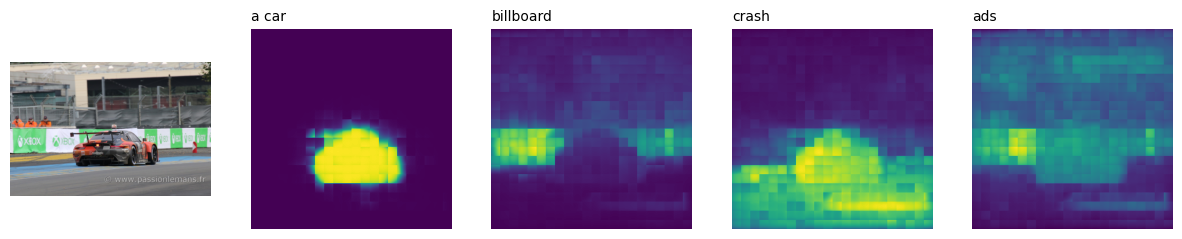

In [ ]:
img = transform(im).unsqueeze(0)

prompts = ['a car', 'billboard', 'crash','ads']

# predict
with torch.no_grad():
    preds = model(img.repeat(4,1,1,1), prompts)[0]

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(im)
[ax[i+1].imshow(torch.sigmoid(preds[i][0])) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors
from diffusers import StableDiffusionInpaintPipeline
# à ajouter au serveur
pipe = StableDiffusionInpaintPipeline.from_pretrained("stabilityai/stable-diffusion-2-inpainting",torch_dtype=torch.float16).to("cuda") 
# fin à ajouter au serveur



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached diffusers-0.14.0-py3-none-any.whl (737 kB)
  Using cached transformers-4.27.4-py3-none-any.whl (6.8 MB)
  Using cached accelerate-0.18.0-py3-none-any.whl (215 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 34.6 MB/s eta 0:00:00
  Using cached safetensors-0.3.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.7 MB/s eta 0:00:00
  Using cached huggingface_hub-0.13.3-py3-none-any.whl (199 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.0/769.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.8/661.8 kB 43.2 MB/s eta 0:00:00
  Using cached tokenizers-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.7/42.7 kB

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 4>:4                                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'torch' is not defined

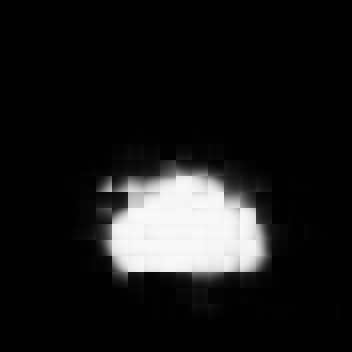

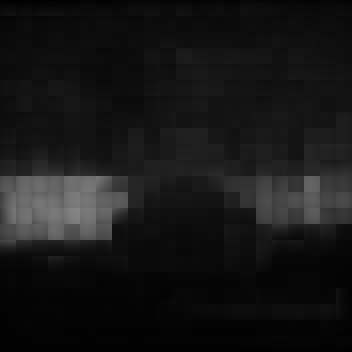

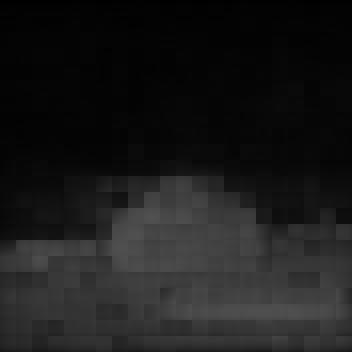

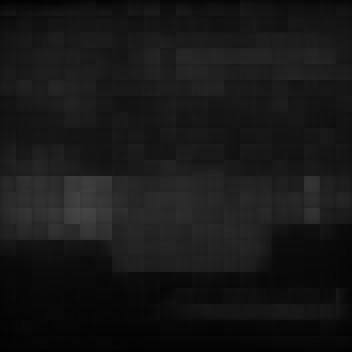

In [ ]:

for i in range(4):
    # Convertir la sortie en image PIL
    output = torch.sigmoid(preds[i][0]) * 255
    output_np = output.cpu().numpy().astype('uint8')
    mask_image = Image.fromarray(output_np)
    mask_image.show()

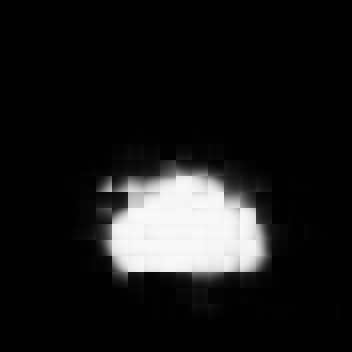

In [ ]:
output = torch.sigmoid(preds[0][0]) * 255
output_np = output.cpu().numpy().astype('uint8')
mask_image = Image.fromarray(output_np)
mask_image.show()

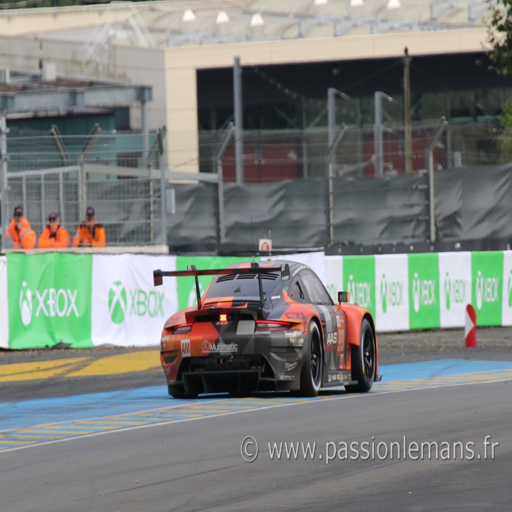

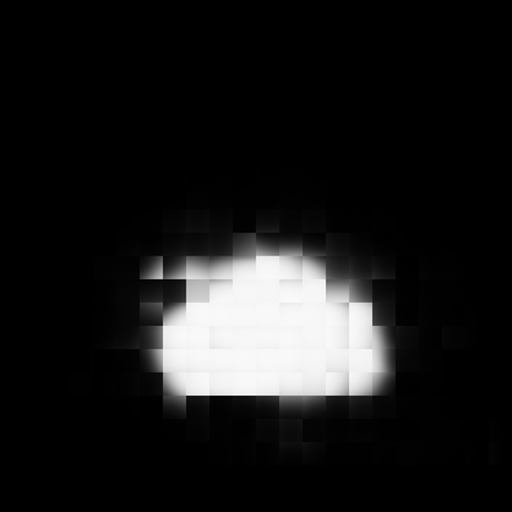

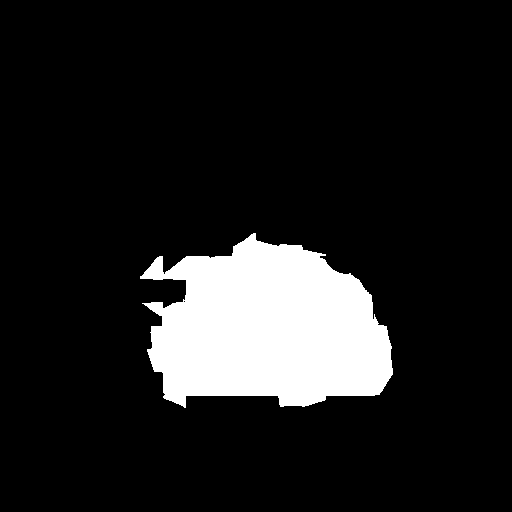

In [ ]:
new_size = mask_image.size

# Redimensionner l'image im1 à la taille de im2
im_resized = im.resize((512,512))
mask_image_resized = mask_image.resize((512,512))

# Afficher les images redimensionnées
im_resized.show()
mask_image_resized.show()

threshold = 50
pil_image_bw = mask_image_resized.convert('L').point(lambda x: 0 if x < threshold else 255, mode='1')
pil_image_bw.show()

In [ ]:

prompt = "“Mario kart, cartoon, Nintendo, videogame"
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image = pipe(prompt=prompt, image=im_resized, mask_image=pil_image_bw, num_inference_steps=50).images[0]
image.show()


NameError: ignored